In [1]:
# import the required packages

# tabular data
import pandas as pd
import numpy as np 
from tabulate import tabulate

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# train test split
from sklearn.model_selection import train_test_split

# metrics 
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
from sklearn.metrics import accuracy_score


# model opitmization
from sklearn.model_selection import GridSearchCV

# model evaluation
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve

# time - test
import time

# math 
from math import sqrt

# statistical models 
import statsmodels.api as sm

# classification models 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import StackingClassifier

# scaling 
from sklearn.preprocessing import StandardScaler

# stacking 



In [2]:
notebook_start_time = time.time()

## 1. HR Analytics

### 1.1 Load and Sample the data

In [3]:
df_hr = pd.read_csv('./hr_csv_transformed.csv')

In [4]:
df_hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9092 entries, 0 to 9091
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   region                        9092 non-null   int64  
 1   education                     9092 non-null   int64  
 2   no_of_trainings               9092 non-null   float64
 3   age                           9092 non-null   float64
 4   previous_year_rating          9092 non-null   float64
 5   length_of_service             9092 non-null   float64
 6   KPIs_met >80%                 9092 non-null   int64  
 7   awards_won?                   9092 non-null   int64  
 8   avg_training_score            9092 non-null   float64
 9   is_promoted                   9092 non-null   int64  
 10  department_Sales & Marketing  9092 non-null   int64  
 11  department_Operations         9092 non-null   int64  
 12  department_Technology         9092 non-null   int64  
 13  dep

In [5]:
df_hr.head()

region  education  no_of_trainings       age  previous_year_rating  \
0    6108          1              2.0 -0.103865                   0.0   
1     785          1              1.0 -0.677333                  -2.0   
2    1234          2              0.0 -0.321705                   1.0   
3    6108          1              0.0 -0.436134                   1.0   
4    1701          2              0.0  0.732668                  -2.0   

   length_of_service  KPIs_met >80%  awards_won?  avg_training_score  \
0          -0.503161              0            0               -0.12   
1          -0.225465              0            0                1.04   
2          -0.864038              1            0               -0.44   
3          -0.864038              0            0               -0.08   
4           0.740418              0            0               -0.20   

   is_promoted  ...  department_R&D  department_Procurement  \
0            0  ...               0                       0   
1            0  ...               0                       0   
2            0  ...               0                       0   
3            0  ...               0                       0   
4            0  ...               0                       0   

   department_Finance  department_HR  department_Legal  gender_f  gender_m  \
0                   0              0                 0         0         1   
1                   0              0                 0         0         1   
2                   0              0                 0         0         1   
3                   1              0                 0         0         1   
4                   0              0                 0         1         0   

   recruitment_channel_sourcing  recruitment_channel_other  \
0                             0                          1   
1                             0                          1   
2                             0                          1   
3                             1                          0   
4                             1                          0   

   recruitment_channel_referred  
0                             0  
1                             0  
2                             0  
3                             0  
4                             0  

[5 rows x 24 columns]

In [6]:
df_hr.describe()

region    education  no_of_trainings          age  \
count   9092.000000  9092.000000      9092.000000  9092.000000   
mean    4584.995381     1.290805         0.231522     0.107887   
std     4079.802512     0.483942         0.559087     0.671022   
min       31.000000     0.000000         0.000000    -1.690290   
25%     1234.000000     1.000000         0.000000    -0.436134   
50%     2617.000000     1.000000         0.000000     0.000000   
75%     6108.000000     2.000000         0.000000     0.476189   
max    11497.000000     2.000000         7.000000     2.017907   

       previous_year_rating  length_of_service  KPIs_met >80%  awards_won?  \
count           9092.000000        9092.000000    9092.000000  9092.000000   
mean               0.583150          -0.043580       0.512868     0.064452   
std                1.182599           0.699312       0.499862     0.245570   
min               -2.000000          -1.378193       0.000000     0.000000   
25%                0.000000          -0.503161       0.000000     0.000000   
50%                0.000000           0.000000       1.000000     0.000000   
75%                2.000000           0.496839       1.000000     0.000000   
max                2.000000           2.115994       1.000000     1.000000   

       avg_training_score  is_promoted  ...  department_R&D  \
count         9092.000000  9092.000000  ...     9092.000000   
mean             0.283836     0.500000  ...        0.015178   
std              0.579979     0.500027  ...        0.122268   
min             -0.760000     0.000000  ...        0.000000   
25%             -0.240000     0.000000  ...        0.000000   
50%              0.160000     0.500000  ...        0.000000   
75%              0.810000     1.000000  ...        0.000000   
max              1.560000     1.000000  ...        1.000000   

       department_Procurement  department_Finance  department_HR  \
count             9092.000000         9092.000000    9092.000000   
mean                 0.140013            0.044435       0.036846   
std                  0.347020            0.206070       0.188393   
min                  0.000000            0.000000       0.000000   
25%                  0.000000            0.000000       0.000000   
50%                  0.000000            0.000000       0.000000   
75%                  0.000000            0.000000       0.000000   
max                  1.000000            1.000000       1.000000   

       department_Legal     gender_f     gender_m  \
count       9092.000000  9092.000000  9092.000000   
mean           0.017268     0.315662     0.684338   
std            0.130275     0.464805     0.464805   
min            0.000000     0.000000     0.000000   
25%            0.000000     0.000000     0.000000   
50%            0.000000     0.000000     1.000000   
75%            0.000000     1.000000     1.000000   
max            1.000000     1.000000     1.000000   

       recruitment_channel_sourcing  recruitment_channel_other  \
count                   9092.000000                9092.000000   
mean                       0.429059                   0.545535   
std                        0.494969                   0.497950   
min                        0.000000                   0.000000   
25%                        0.000000                   0.000000   
50%                        0.000000                   1.000000   
75%                        1.000000                   1.000000   
max                        1.000000                   1.000000   

       recruitment_channel_referred  
count                   9092.000000  
mean                       0.025407  
std                        0.157366  
min                        0.000000  
25%                        0.000000  
50%                        0.000000  
75%                        0.000000  
max                        1.000000  

[8 rows x 24 columns]

In [7]:
df_hr.isnull().sum()

region                          0
education                       0
no_of_trainings                 0
age                             0
previous_year_rating            0
length_of_service               0
KPIs_met >80%                   0
awards_won?                     0
avg_training_score              0
is_promoted                     0
department_Sales & Marketing    0
department_Operations           0
department_Technology           0
department_Analytics            0
department_R&D                  0
department_Procurement          0
department_Finance              0
department_HR                   0
department_Legal                0
gender_f                        0
gender_m                        0
recruitment_channel_sourcing    0
recruitment_channel_other       0
recruitment_channel_referred    0
dtype: int64

In [8]:
# inspect the target class distribution 
df_hr['is_promoted'].value_counts()

0    4546
1    4546
Name: is_promoted, dtype: int64

### 1.1.1 Train and Test splits 

In [9]:
X = df_hr.drop(['is_promoted'], axis =1)
y = df_hr['is_promoted']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### 1.1.2 Stats Models 

In [10]:
# using logit - for classification 
lgsm = sm.Logit(y_train, X_train).fit()

Optimization terminated successfully.
         Current function value: 0.429350
         Iterations 7


In [11]:
lgsm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            is_promoted   No. Observations:                 6364
Model:                          Logit   Df Residuals:                     6343
Method:                           MLE   Df Model:                           20
Date:                Thu, 08 Feb 2024   Pseudo R-squ.:                  0.3806
Time:                        07:07:11   Log-Likelihood:                -2732.4
converged:                       True   LL-Null:                       -4411.0
Covariance Type:            nonrobust   LLR p-value:                     0.000
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
region                        6.851e-06   8.88e-06      0.772      0.440   -1.06e-05    2.43e-05
education                        0.1445      0.079      1.818      0.069      -0.011       0.300
no_of_trainings                 -0.0403      0.062     -0.655      0.513      -0.161       0.080
age                             -0.3805      0.073     -5.199      0.000      -0.524      -0.237
previous_year_rating             0.2490      0.031      8.137      0.000       0.189       0.309
length_of_service                0.1946      0.063      3.086      0.002       0.071       0.318
KPIs_met >80%                    2.6255      0.084     31.276      0.000       2.461       2.790
awards_won?                      1.9333      0.210      9.198      0.000       1.521       2.345
avg_training_score               7.2899      0.233     31.287      0.000       6.833       7.747
department_Sales & Marketing     4.2095        nan        nan        nan         nan         nan
department_Operations            1.3355        nan        nan        nan         nan         nan
department_Technology           -3.8352        nan        nan        nan         nan         nan
department_Analytics            -5.3134        nan        nan        nan         nan         nan
department_R&D                  -5.6380        nan        nan        nan         nan         nan
department_Procurement          -1.3390        nan        nan        nan         nan         nan
department_Finance               1.3003        nan        nan        nan         nan         nan
department_HR                    3.7919        nan        nan        nan         nan         nan
department_Legal                 1.0080        nan        nan        nan         nan         nan
gender_f                        -2.2522    1.2e+06  -1.87e-06      1.000   -2.36e+06    2.36e+06
gender_m                        -2.2282    1.2e+06  -1.85e-06      1.000   -2.36e+06    2.36e+06
recruitment_channel_sourcing    -1.5920        nan        nan        nan         nan         nan
recruitment_channel_other       -1.4742        nan        nan        nan         nan         nan
recruitment_channel_referred    -1.4141        nan        nan        nan         nan         nan
================================================================================================
"""

### 1.1.3 Scaling

In [12]:
def print_variable_scale(dataframe, variable_name):
    if variable_name not in dataframe.columns:
        print(f"Variable '{variable_name}' not found in the DataFrame.")
        return

    variable_data = dataframe[variable_name]

    variable_range = variable_data.max() - variable_data.min()

    print(f"{variable_name} : {variable_range}")

In [13]:
for n in X_train.columns : 
    print_variable_scale(X_train,n)
    
# does this mean i need to scale everything? 

region : 11466
education : 2
no_of_trainings : 7.0
age : 3.7081979384931767
previous_year_rating : 4.0
length_of_service : 3.49418744314342
KPIs_met >80% : 1
awards_won? : 1
avg_training_score : 2.3200000000000003
department_Sales & Marketing : 1
department_Operations : 1
department_Technology : 1
department_Analytics : 1
department_R&D : 1
department_Procurement : 1
department_Finance : 1
department_HR : 1
department_Legal : 1
gender_f : 1
gender_m : 1
recruitment_channel_sourcing : 1
recruitment_channel_other : 1
recruitment_channel_referred : 1


### 1.2 Build the Model(s)

In [14]:
models = []

model_names = []

In [15]:
# no hyperparams except random state for consistency in results 
lg = LogisticRegression(random_state=42).fit(X_train, y_train)

models.append(lg)
model_names.append("Logistic Regression")

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [16]:
# decision tree classifier 
dtree = DecisionTreeClassifier(random_state=42).fit(X_train,y_train)

models.append(dtree)
model_names.append("Decision Tree")

In [17]:
# random forest classifier 
rf = RandomForestClassifier(random_state=42).fit(X_train,y_train)

models.append(rf)
model_names.append("Random Forest")

In [18]:
# support vector machine 
svc = SVC(random_state = 42).fit(X_train,y_train)

models.append(svc)
model_names.append("SVC")

In [19]:
# multi layer perceptron
mlp = MLPClassifier(random_state = 42).fit(X_train, y_train)

models.append(mlp)
model_names.append("Multi Layer Perceptron")

In [20]:
# adaptive boosting
ada = AdaBoostClassifier(random_state = 42).fit(X_train,y_train)

models.append(ada)
model_names.append("ADA")

In [21]:
# extreme gradient boosting 
xgb = XGBClassifier(random_state = 42).fit(X_train, y_train)

models.append(xgb)
model_names.append("XGB")

### 1.2.1 Consolidated View of Model Scores

In [22]:
scores_table = []
for model, name in zip(models, model_names):
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    scores_table.append([name, train_score, test_score])

df_scores = pd.DataFrame(scores_table, columns=["Model", "Train Score", "Test Score"])

df_scores

Model  Train Score  Test Score
0     Logistic Regression     0.728787    0.720674
1           Decision Tree     1.000000    0.749267
2           Random Forest     1.000000    0.793622
3                     SVC     0.533941    0.537023
4  Multi Layer Perceptron     0.663891    0.668622
5                     ADA     0.782055    0.769428
6                     XGB     0.933532    0.799487

### 1.3 Evaluate and Improve the Model(s)
These models will be chosen for further evaluation and tuning  : <mark>Random Forest Classifier</mark>, <mark>Multi Layer Perceptron (Artificial Neural Network)</mark>,<mark>ADA Boost (Ensemble Model)</mark>.

In [23]:
def model_scores_classification(model):
    print(f"Model: {model}")
    
    train_pred = model.predict(X_train)
    print(f'\nTraining score: {model.score(X_train, y_train)}')

    test_pred = model.predict(X_test)
    print(f'Testing score: {model.score(X_test, y_test)}')
    
    # Training scores and report
    train_pred = model.predict(X_train)
    print('\nTraining report:')
    print(classification_report(y_train, train_pred))

    # Testing scores and report
    test_pred = model.predict(X_test)
    print('\nTesting report:')
    print(classification_report(y_test, test_pred))

    # Confusion matrix for training
    print('\nConfusion Matrix:')
    train_cm = confusion_matrix(y_train, train_pred)
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    sns.heatmap(train_cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=model.classes_, yticklabels=model.classes_)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix - Training')

    # Confusion matrix for testing
    plt.subplot(1, 2, 2)
    test_cm = confusion_matrix(y_test, test_pred)
    sns.heatmap(test_cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=model.classes_, yticklabels=model.classes_)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix - Testing')

    plt.tight_layout()
    plt.show()

### 1.3.1 Model 1 (random forest classifier) 

Model: RandomForestClassifier(random_state=42)

Training score: 1.0
Testing score: 0.7936217008797654

Training report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3157
           1       1.00      1.00      1.00      3207

    accuracy                           1.00      6364
   macro avg       1.00      1.00      1.00      6364
weighted avg       1.00      1.00      1.00      6364


Testing report:
              precision    recall  f1-score   support

           0       0.85      0.72      0.78      1389
           1       0.75      0.87      0.80      1339

    accuracy                           0.79      2728
   macro avg       0.80      0.79      0.79      2728
weighted avg       0.80      0.79      0.79      2728


Confusion Matrix:


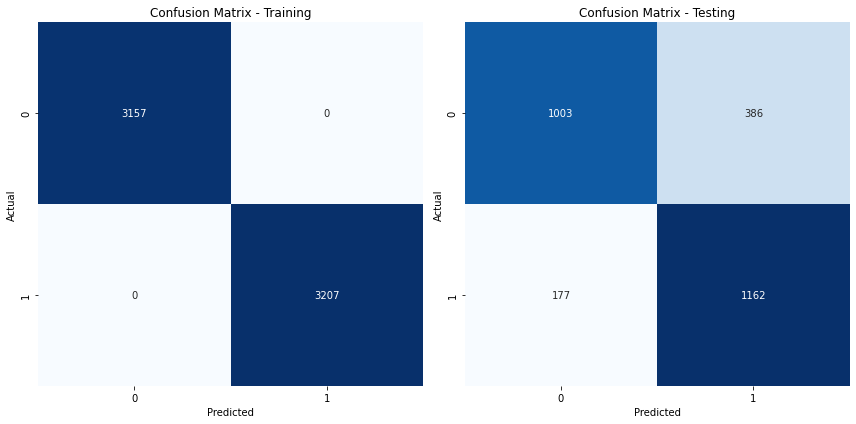

In [24]:
model_scores_classification(rf)

##### comments 
- the model scores are very overfitted which need to be tuned
- high variance and low bias, the model is performing well on training set but not as good on training set, meaning it is putting in close attention to the train set
- it is this way due to the 'nature' of random forest

### 1.3.1.1 Hyperparameter Inspection
##### hyperparams to be tweaked or that can be tweaked 
- <mark>n_estimators</mark> : number of trees
- <mark>criterion</mark> : quality of split
- <mark>max_depth</mark> : depth of tree, if there are too many details it might lead to overfitting? affected by:min_samples_split samples
- <mark>min_samples_split</mark> : number of samples required to split an internal node 
- <mark>min_samples_leaf</mark> : number of samples required to become a leaf? makes model more generalised (add later on?) 
- <mark>max_features</mark> : number of features to consider for a best split 

### 1.3.1.1 (a)  n_estimators

##### n_estimators vs. train and test scores  (range : 100-1000)

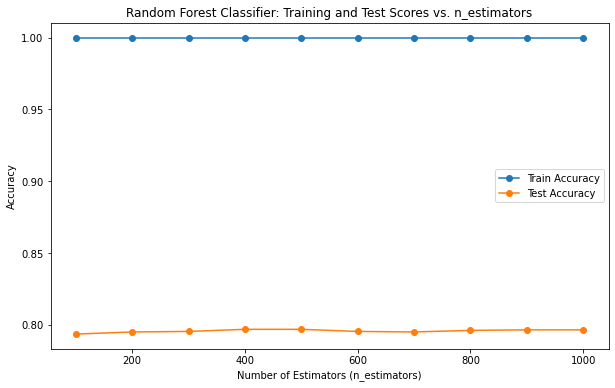

In [25]:
n_estimators_values = np.arange(100,1100,100)

# Initialize lists to store training and test scores
train_scores = []
test_scores = []

# Iterate over different n_estimators values
for n_estimators in n_estimators_values:
    # Create and fit the Random Forest Classifier
    clf = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
    clf.fit(X_train, y_train)

    # Make predictions on training and testing sets
    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)

    # Calculate accuracy scores and store them
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    train_scores.append(train_accuracy)
    test_scores.append(test_accuracy)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_values, train_scores, label='Train Accuracy', marker='o')
plt.plot(n_estimators_values, test_scores, label='Test Accuracy', marker='o')
plt.title('Random Forest Classifier: Training and Test Scores vs. n_estimators')
plt.xlabel('Number of Estimators (n_estimators)')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

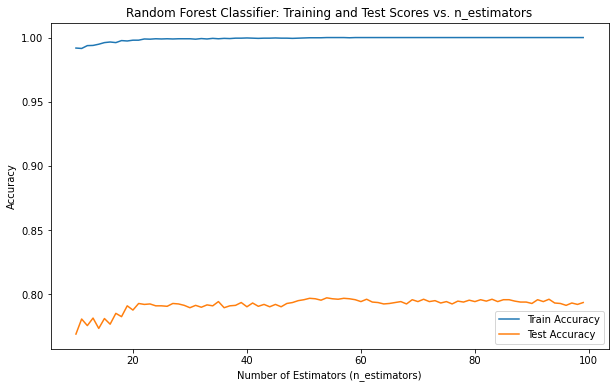

In [26]:

n_estimators_values = np.arange(10,100,1)

# Initialize lists to store training and test scores
train_scores = []
test_scores = []

# Iterate over different n_estimators values
for n_estimators in n_estimators_values:
    # Create and fit the Random Forest Classifier
    clf = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
    clf.fit(X_train, y_train)

    # Make predictions on training and testing sets
    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)

    # Calculate accuracy scores and store them
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    train_scores.append(train_accuracy)
    test_scores.append(test_accuracy)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_values, train_scores, label='Train Accuracy')
plt.plot(n_estimators_values, test_scores, label='Test Accuracy')
plt.title('Random Forest Classifier: Training and Test Scores vs. n_estimators')
plt.xlabel('Number of Estimators (n_estimators)')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### 1.3.1.1 (b) max_depth 

##### max depth vs accuracy 

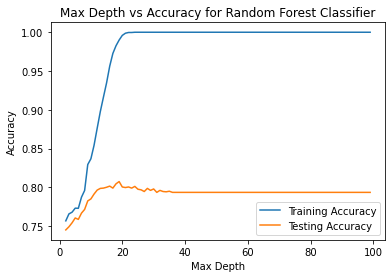

In [27]:
max_depths = np.arange(2, 100,1)

# Initialize lists to store training and testing accuracies
train_accuracies = []
test_accuracies = []

# Loop through different max_depth values
for max_depth in max_depths:
    # Create and train the Random Forest classifier
    rf_classifier = RandomForestClassifier(max_depth=max_depth, random_state=42)
    rf_classifier.fit(X_train, y_train)
    
    # Predict on the training and testing sets
    y_train_pred = rf_classifier.predict(X_train)
    y_test_pred = rf_classifier.predict(X_test)
    
    # Calculate accuracies
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    
    # Append accuracies to the lists
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

# Plot the results
plt.plot(max_depths, train_accuracies, label='Training Accuracy')
plt.plot(max_depths, test_accuracies, label='Testing Accuracy')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Max Depth vs Accuracy for Random Forest Classifier')
plt.legend()
plt.show()

### 1.3.1.1 (c) min_samples_split

##### min samples vs accuracy (range: 2-100), start from default 

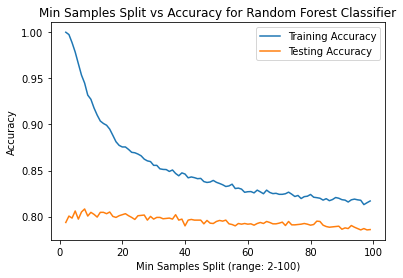

In [28]:
min_samples_splits = np.arange(2, 100, 1)

# Initialize lists to store training and testing accuracies
train_accuracies = []
test_accuracies = []

# Loop through different min_samples_split values
for min_samples_split in min_samples_splits:
    # Create and train the Random Forest classifier
    rf_classifier = RandomForestClassifier(min_samples_split=min_samples_split, random_state=42)
    rf_classifier.fit(X_train, y_train)
    
    # Predict on the training and testing sets
    y_train_pred = rf_classifier.predict(X_train)
    y_test_pred = rf_classifier.predict(X_test)
    
    # Calculate accuracies
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    
    # Append accuracies to the lists
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

# Plot the results
plt.plot(min_samples_splits, train_accuracies, label='Training Accuracy')
plt.plot(min_samples_splits, test_accuracies, label='Testing Accuracy')
plt.xlabel('Min Samples Split (range: 2-100)')
plt.ylabel('Accuracy')
plt.title('Min Samples Split vs Accuracy for Random Forest Classifier')
plt.legend()
plt.show()

# overfitting gets reduced, but test scores typically dont increase
# reduced overfitting but it compromises train scores

##### min samples vs accuracy (range: 100-1000), see higher to see effect

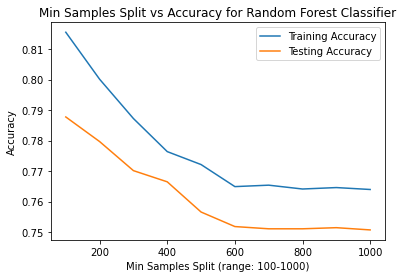

In [29]:
min_samples_splits = np.arange(100, 1100, 100)

# Initialize lists to store training and testing accuracies
train_accuracies = []
test_accuracies = []

# Loop through different min_samples_split values
for min_samples_split in min_samples_splits:
    # Create and train the Random Forest classifier
    rf_classifier = RandomForestClassifier(min_samples_split=min_samples_split, random_state=42)
    rf_classifier.fit(X_train, y_train)
    
    # Predict on the training and testing sets
    y_train_pred = rf_classifier.predict(X_train)
    y_test_pred = rf_classifier.predict(X_test)
    
    # Calculate accuracies
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    
    # Append accuracies to the lists
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

# Plot the results
plt.plot(min_samples_splits, train_accuracies, label='Training Accuracy')
plt.plot(min_samples_splits, test_accuracies, label='Testing Accuracy')
plt.xlabel('Min Samples Split (range: 100-1000)')
plt.ylabel('Accuracy')
plt.title('Min Samples Split vs Accuracy for Random Forest Classifier')
plt.legend()
plt.show()

# too many samples makes the model become worse

### 1.3.1.1 (d) min_samples_leaf 

##### min samples leaf vs accuracy (range: 2-20), start from default

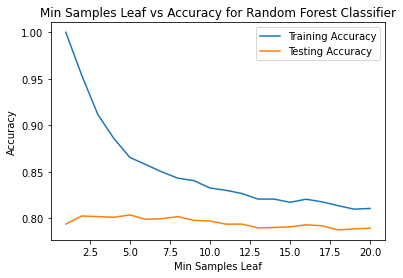

In [30]:
min_samples_leafs = np.arange(1, 21, 1)

# Initialize lists to store training and testing accuracies
train_accuracies = []
test_accuracies = []

# Loop through different min_samples_leaf values
for min_samples_leaf in min_samples_leafs:
    # Create and train the Random Forest classifier
    rf_classifier = RandomForestClassifier(min_samples_leaf=min_samples_leaf, random_state=42)
    rf_classifier.fit(X_train, y_train)
    
    # Predict on the training and testing sets
    y_train_pred = rf_classifier.predict(X_train)
    y_test_pred = rf_classifier.predict(X_test)
    
    # Calculate accuracies
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    
    # Append accuracies to the lists
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

# Plot the results
plt.plot(min_samples_leafs, train_accuracies, label='Training Accuracy')
plt.plot(min_samples_leafs, test_accuracies, label='Testing Accuracy')
plt.xlabel('Min Samples Leaf')
plt.ylabel('Accuracy')
plt.title('Min Samples Leaf vs Accuracy for Random Forest Classifier')
plt.legend()
plt.show()

# doing so reduces overfitting

### 1.3.1.2 Optimizing Hyperparameters

In [31]:
rf_models = [rf]

rf_names = ['base']

### 1.3.1.2 (a) GridSearchCV 

##### 1st Iteration  

In [32]:
param_grid = {'n_estimators' : [40,50,60,70], # this is where the model tends to be at its best, and at lower number of trees 
              'criterion' : ['gini','entropy'],
              'max_depth' : [10,20,30],
              'min_samples_split':[60,80,100],
              'min_samples_leaf':[10,15,20]}

In [33]:
start_time = time.time()

grid = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='accuracy',verbose = 3,refit=True).fit(X_train,y_train)

end_time = time.time()

elapsed_time = end_time - start_time

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
[CV 1/5] END criterion=gini, max_depth=10, min_samples_leaf=10, min_samples_split=60, n_estimators=40;, score=0.778 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=10, min_samples_leaf=10, min_samples_split=60, n_estimators=40;, score=0.798 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=10, min_samples_leaf=10, min_samples_split=60, n_estimators=40;, score=0.790 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=10, min_samples_leaf=10, min_samples_split=60, n_estimators=40;, score=0.788 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=10, min_samples_leaf=10, min_samples_split=60, n_estimators=40;, score=0.789 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=10, min_samples_leaf=10, min_samples_split=60, n_estimators=50;, score=0.784 total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=10, min_samples_leaf=10, min_samples_split=60, n_estimators=50;, score=0.798 total time

[CV 3/5] END criterion=gini, max_depth=10, min_samples_leaf=15, min_samples_split=60, n_estimators=40;, score=0.783 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=10, min_samples_leaf=15, min_samples_split=60, n_estimators=40;, score=0.781 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=10, min_samples_leaf=15, min_samples_split=60, n_estimators=40;, score=0.785 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=10, min_samples_leaf=15, min_samples_split=60, n_estimators=50;, score=0.772 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=10, min_samples_leaf=15, min_samples_split=60, n_estimators=50;, score=0.793 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=10, min_samples_leaf=15, min_samples_split=60, n_estimators=50;, score=0.789 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=10, min_samples_leaf=15, min_samples_split=60, n_estimators=50;, score=0.777 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=10, min_samples_

[CV 4/5] END criterion=gini, max_depth=10, min_samples_leaf=20, min_samples_split=60, n_estimators=40;, score=0.782 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=10, min_samples_leaf=20, min_samples_split=60, n_estimators=40;, score=0.782 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=10, min_samples_leaf=20, min_samples_split=60, n_estimators=50;, score=0.773 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=10, min_samples_leaf=20, min_samples_split=60, n_estimators=50;, score=0.786 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=10, min_samples_leaf=20, min_samples_split=60, n_estimators=50;, score=0.789 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=10, min_samples_leaf=20, min_samples_split=60, n_estimators=50;, score=0.783 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=10, min_samples_leaf=20, min_samples_split=60, n_estimators=50;, score=0.784 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=10, min_samples_

[CV 5/5] END criterion=gini, max_depth=20, min_samples_leaf=10, min_samples_split=60, n_estimators=40;, score=0.796 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=20, min_samples_leaf=10, min_samples_split=60, n_estimators=50;, score=0.790 total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=20, min_samples_leaf=10, min_samples_split=60, n_estimators=50;, score=0.793 total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=20, min_samples_leaf=10, min_samples_split=60, n_estimators=50;, score=0.799 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=20, min_samples_leaf=10, min_samples_split=60, n_estimators=50;, score=0.795 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=20, min_samples_leaf=10, min_samples_split=60, n_estimators=50;, score=0.796 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=20, min_samples_leaf=10, min_samples_split=60, n_estimators=60;, score=0.791 total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=20, min_samples_

[CV 1/5] END criterion=gini, max_depth=20, min_samples_leaf=15, min_samples_split=60, n_estimators=50;, score=0.782 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=20, min_samples_leaf=15, min_samples_split=60, n_estimators=50;, score=0.793 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=20, min_samples_leaf=15, min_samples_split=60, n_estimators=50;, score=0.787 total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=20, min_samples_leaf=15, min_samples_split=60, n_estimators=50;, score=0.795 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=20, min_samples_leaf=15, min_samples_split=60, n_estimators=50;, score=0.791 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=20, min_samples_leaf=15, min_samples_split=60, n_estimators=60;, score=0.787 total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=20, min_samples_leaf=15, min_samples_split=60, n_estimators=60;, score=0.789 total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=20, min_samples_

[CV 3/5] END criterion=gini, max_depth=20, min_samples_leaf=20, min_samples_split=60, n_estimators=50;, score=0.787 total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=20, min_samples_leaf=20, min_samples_split=60, n_estimators=50;, score=0.794 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=20, min_samples_leaf=20, min_samples_split=60, n_estimators=50;, score=0.788 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=20, min_samples_leaf=20, min_samples_split=60, n_estimators=60;, score=0.776 total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=20, min_samples_leaf=20, min_samples_split=60, n_estimators=60;, score=0.796 total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=20, min_samples_leaf=20, min_samples_split=60, n_estimators=60;, score=0.789 total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=20, min_samples_leaf=20, min_samples_split=60, n_estimators=60;, score=0.794 total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=20, min_samples_

[CV 5/5] END criterion=gini, max_depth=30, min_samples_leaf=10, min_samples_split=60, n_estimators=50;, score=0.796 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=30, min_samples_leaf=10, min_samples_split=60, n_estimators=60;, score=0.791 total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=30, min_samples_leaf=10, min_samples_split=60, n_estimators=60;, score=0.792 total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=30, min_samples_leaf=10, min_samples_split=60, n_estimators=60;, score=0.798 total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=30, min_samples_leaf=10, min_samples_split=60, n_estimators=60;, score=0.794 total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=30, min_samples_leaf=10, min_samples_split=60, n_estimators=60;, score=0.797 total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=30, min_samples_leaf=10, min_samples_split=60, n_estimators=70;, score=0.793 total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=30, min_samples_

[CV 1/5] END criterion=gini, max_depth=30, min_samples_leaf=15, min_samples_split=60, n_estimators=60;, score=0.787 total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=30, min_samples_leaf=15, min_samples_split=60, n_estimators=60;, score=0.789 total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=30, min_samples_leaf=15, min_samples_split=60, n_estimators=60;, score=0.791 total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=30, min_samples_leaf=15, min_samples_split=60, n_estimators=60;, score=0.795 total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=30, min_samples_leaf=15, min_samples_split=60, n_estimators=60;, score=0.790 total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=30, min_samples_leaf=15, min_samples_split=60, n_estimators=70;, score=0.785 total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=30, min_samples_leaf=15, min_samples_split=60, n_estimators=70;, score=0.789 total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=30, min_samples_

[CV 2/5] END criterion=gini, max_depth=30, min_samples_leaf=20, min_samples_split=60, n_estimators=60;, score=0.796 total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=30, min_samples_leaf=20, min_samples_split=60, n_estimators=60;, score=0.789 total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=30, min_samples_leaf=20, min_samples_split=60, n_estimators=60;, score=0.794 total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=30, min_samples_leaf=20, min_samples_split=60, n_estimators=60;, score=0.789 total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=30, min_samples_leaf=20, min_samples_split=60, n_estimators=70;, score=0.778 total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=30, min_samples_leaf=20, min_samples_split=60, n_estimators=70;, score=0.794 total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=30, min_samples_leaf=20, min_samples_split=60, n_estimators=70;, score=0.789 total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=30, min_samples_

[CV 4/5] END criterion=entropy, max_depth=10, min_samples_leaf=10, min_samples_split=60, n_estimators=60;, score=0.789 total time=   0.1s
[CV 5/5] END criterion=entropy, max_depth=10, min_samples_leaf=10, min_samples_split=60, n_estimators=60;, score=0.796 total time=   0.1s
[CV 1/5] END criterion=entropy, max_depth=10, min_samples_leaf=10, min_samples_split=60, n_estimators=70;, score=0.775 total time=   0.1s
[CV 2/5] END criterion=entropy, max_depth=10, min_samples_leaf=10, min_samples_split=60, n_estimators=70;, score=0.796 total time=   0.1s
[CV 3/5] END criterion=entropy, max_depth=10, min_samples_leaf=10, min_samples_split=60, n_estimators=70;, score=0.783 total time=   0.1s
[CV 4/5] END criterion=entropy, max_depth=10, min_samples_leaf=10, min_samples_split=60, n_estimators=70;, score=0.787 total time=   0.1s
[CV 5/5] END criterion=entropy, max_depth=10, min_samples_leaf=10, min_samples_split=60, n_estimators=70;, score=0.797 total time=   0.1s
[CV 1/5] END criterion=entropy, ma

[CV 5/5] END criterion=entropy, max_depth=10, min_samples_leaf=15, min_samples_split=60, n_estimators=60;, score=0.798 total time=   0.1s
[CV 1/5] END criterion=entropy, max_depth=10, min_samples_leaf=15, min_samples_split=60, n_estimators=70;, score=0.772 total time=   0.1s
[CV 2/5] END criterion=entropy, max_depth=10, min_samples_leaf=15, min_samples_split=60, n_estimators=70;, score=0.797 total time=   0.1s
[CV 3/5] END criterion=entropy, max_depth=10, min_samples_leaf=15, min_samples_split=60, n_estimators=70;, score=0.782 total time=   0.1s
[CV 4/5] END criterion=entropy, max_depth=10, min_samples_leaf=15, min_samples_split=60, n_estimators=70;, score=0.791 total time=   0.1s
[CV 5/5] END criterion=entropy, max_depth=10, min_samples_leaf=15, min_samples_split=60, n_estimators=70;, score=0.802 total time=   0.1s
[CV 1/5] END criterion=entropy, max_depth=10, min_samples_leaf=15, min_samples_split=80, n_estimators=40;, score=0.773 total time=   0.0s
[CV 2/5] END criterion=entropy, ma

[CV 5/5] END criterion=entropy, max_depth=10, min_samples_leaf=20, min_samples_split=60, n_estimators=60;, score=0.792 total time=   0.1s
[CV 1/5] END criterion=entropy, max_depth=10, min_samples_leaf=20, min_samples_split=60, n_estimators=70;, score=0.769 total time=   0.1s
[CV 2/5] END criterion=entropy, max_depth=10, min_samples_leaf=20, min_samples_split=60, n_estimators=70;, score=0.793 total time=   0.1s
[CV 3/5] END criterion=entropy, max_depth=10, min_samples_leaf=20, min_samples_split=60, n_estimators=70;, score=0.781 total time=   0.1s
[CV 4/5] END criterion=entropy, max_depth=10, min_samples_leaf=20, min_samples_split=60, n_estimators=70;, score=0.781 total time=   0.1s
[CV 5/5] END criterion=entropy, max_depth=10, min_samples_leaf=20, min_samples_split=60, n_estimators=70;, score=0.796 total time=   0.1s
[CV 1/5] END criterion=entropy, max_depth=10, min_samples_leaf=20, min_samples_split=80, n_estimators=40;, score=0.767 total time=   0.0s
[CV 2/5] END criterion=entropy, ma

[CV 5/5] END criterion=entropy, max_depth=20, min_samples_leaf=10, min_samples_split=60, n_estimators=60;, score=0.797 total time=   0.1s
[CV 1/5] END criterion=entropy, max_depth=20, min_samples_leaf=10, min_samples_split=60, n_estimators=70;, score=0.793 total time=   0.2s
[CV 2/5] END criterion=entropy, max_depth=20, min_samples_leaf=10, min_samples_split=60, n_estimators=70;, score=0.793 total time=   0.1s
[CV 3/5] END criterion=entropy, max_depth=20, min_samples_leaf=10, min_samples_split=60, n_estimators=70;, score=0.798 total time=   0.2s
[CV 4/5] END criterion=entropy, max_depth=20, min_samples_leaf=10, min_samples_split=60, n_estimators=70;, score=0.797 total time=   0.1s
[CV 5/5] END criterion=entropy, max_depth=20, min_samples_leaf=10, min_samples_split=60, n_estimators=70;, score=0.801 total time=   0.1s
[CV 1/5] END criterion=entropy, max_depth=20, min_samples_leaf=10, min_samples_split=80, n_estimators=40;, score=0.777 total time=   0.0s
[CV 2/5] END criterion=entropy, ma

[CV 1/5] END criterion=entropy, max_depth=20, min_samples_leaf=15, min_samples_split=60, n_estimators=70;, score=0.782 total time=   0.2s
[CV 2/5] END criterion=entropy, max_depth=20, min_samples_leaf=15, min_samples_split=60, n_estimators=70;, score=0.795 total time=   0.2s
[CV 3/5] END criterion=entropy, max_depth=20, min_samples_leaf=15, min_samples_split=60, n_estimators=70;, score=0.793 total time=   0.2s
[CV 4/5] END criterion=entropy, max_depth=20, min_samples_leaf=15, min_samples_split=60, n_estimators=70;, score=0.789 total time=   0.1s
[CV 5/5] END criterion=entropy, max_depth=20, min_samples_leaf=15, min_samples_split=60, n_estimators=70;, score=0.803 total time=   0.1s
[CV 1/5] END criterion=entropy, max_depth=20, min_samples_leaf=15, min_samples_split=80, n_estimators=40;, score=0.784 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=20, min_samples_leaf=15, min_samples_split=80, n_estimators=40;, score=0.794 total time=   0.1s
[CV 3/5] END criterion=entropy, ma

[CV 1/5] END criterion=entropy, max_depth=20, min_samples_leaf=20, min_samples_split=60, n_estimators=70;, score=0.781 total time=   0.1s
[CV 2/5] END criterion=entropy, max_depth=20, min_samples_leaf=20, min_samples_split=60, n_estimators=70;, score=0.799 total time=   0.1s
[CV 3/5] END criterion=entropy, max_depth=20, min_samples_leaf=20, min_samples_split=60, n_estimators=70;, score=0.782 total time=   0.1s
[CV 4/5] END criterion=entropy, max_depth=20, min_samples_leaf=20, min_samples_split=60, n_estimators=70;, score=0.792 total time=   0.1s
[CV 5/5] END criterion=entropy, max_depth=20, min_samples_leaf=20, min_samples_split=60, n_estimators=70;, score=0.799 total time=   0.1s
[CV 1/5] END criterion=entropy, max_depth=20, min_samples_leaf=20, min_samples_split=80, n_estimators=40;, score=0.778 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=20, min_samples_leaf=20, min_samples_split=80, n_estimators=40;, score=0.799 total time=   0.1s
[CV 3/5] END criterion=entropy, ma

[CV 1/5] END criterion=entropy, max_depth=30, min_samples_leaf=10, min_samples_split=60, n_estimators=70;, score=0.793 total time=   0.1s
[CV 2/5] END criterion=entropy, max_depth=30, min_samples_leaf=10, min_samples_split=60, n_estimators=70;, score=0.795 total time=   0.1s
[CV 3/5] END criterion=entropy, max_depth=30, min_samples_leaf=10, min_samples_split=60, n_estimators=70;, score=0.798 total time=   0.2s
[CV 4/5] END criterion=entropy, max_depth=30, min_samples_leaf=10, min_samples_split=60, n_estimators=70;, score=0.797 total time=   0.1s
[CV 5/5] END criterion=entropy, max_depth=30, min_samples_leaf=10, min_samples_split=60, n_estimators=70;, score=0.801 total time=   0.1s
[CV 1/5] END criterion=entropy, max_depth=30, min_samples_leaf=10, min_samples_split=80, n_estimators=40;, score=0.777 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=30, min_samples_leaf=10, min_samples_split=80, n_estimators=40;, score=0.797 total time=   0.0s
[CV 3/5] END criterion=entropy, ma

[CV 1/5] END criterion=entropy, max_depth=30, min_samples_leaf=15, min_samples_split=60, n_estimators=70;, score=0.782 total time=   0.1s
[CV 2/5] END criterion=entropy, max_depth=30, min_samples_leaf=15, min_samples_split=60, n_estimators=70;, score=0.795 total time=   0.1s
[CV 3/5] END criterion=entropy, max_depth=30, min_samples_leaf=15, min_samples_split=60, n_estimators=70;, score=0.793 total time=   0.1s
[CV 4/5] END criterion=entropy, max_depth=30, min_samples_leaf=15, min_samples_split=60, n_estimators=70;, score=0.789 total time=   0.1s
[CV 5/5] END criterion=entropy, max_depth=30, min_samples_leaf=15, min_samples_split=60, n_estimators=70;, score=0.803 total time=   0.1s
[CV 1/5] END criterion=entropy, max_depth=30, min_samples_leaf=15, min_samples_split=80, n_estimators=40;, score=0.784 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=30, min_samples_leaf=15, min_samples_split=80, n_estimators=40;, score=0.794 total time=   0.0s
[CV 3/5] END criterion=entropy, ma

[CV 1/5] END criterion=entropy, max_depth=30, min_samples_leaf=20, min_samples_split=60, n_estimators=70;, score=0.781 total time=   0.1s
[CV 2/5] END criterion=entropy, max_depth=30, min_samples_leaf=20, min_samples_split=60, n_estimators=70;, score=0.799 total time=   0.1s
[CV 3/5] END criterion=entropy, max_depth=30, min_samples_leaf=20, min_samples_split=60, n_estimators=70;, score=0.782 total time=   0.1s
[CV 4/5] END criterion=entropy, max_depth=30, min_samples_leaf=20, min_samples_split=60, n_estimators=70;, score=0.792 total time=   0.1s
[CV 5/5] END criterion=entropy, max_depth=30, min_samples_leaf=20, min_samples_split=60, n_estimators=70;, score=0.799 total time=   0.1s
[CV 1/5] END criterion=entropy, max_depth=30, min_samples_leaf=20, min_samples_split=80, n_estimators=40;, score=0.778 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=30, min_samples_leaf=20, min_samples_split=80, n_estimators=40;, score=0.799 total time=   0.0s
[CV 3/5] END criterion=entropy, ma

In [34]:
print(grid.best_score_)
print(grid.best_params_)

minutes, seconds = divmod(elapsed_time, 60)
formatted_time = "{:02}:{:02}".format(int(minutes), int(seconds))
print("Elapsed Time: {}".format(formatted_time))

0.7969836764538776
{'criterion': 'entropy', 'max_depth': 30, 'min_samples_leaf': 10, 'min_samples_split': 60, 'n_estimators': 70}
Elapsed Time: 03:03


Model: RandomForestClassifier(criterion='entropy', max_depth=30, min_samples_leaf=10,
                       min_samples_split=60, n_estimators=70, random_state=42)

Training score: 0.8174104336895035
Testing score: 0.7881231671554252

Training report:
              precision    recall  f1-score   support

           0       0.93      0.69      0.79      3157
           1       0.75      0.95      0.84      3207

    accuracy                           0.82      6364
   macro avg       0.84      0.82      0.81      6364
weighted avg       0.84      0.82      0.81      6364


Testing report:
              precision    recall  f1-score   support

           0       0.90      0.65      0.76      1389
           1       0.72      0.93      0.81      1339

    accuracy                           0.79      2728
   macro avg       0.81      0.79      0.78      2728
weighted avg       0.81      0.79      0.78      2728


Confusion Matrix:


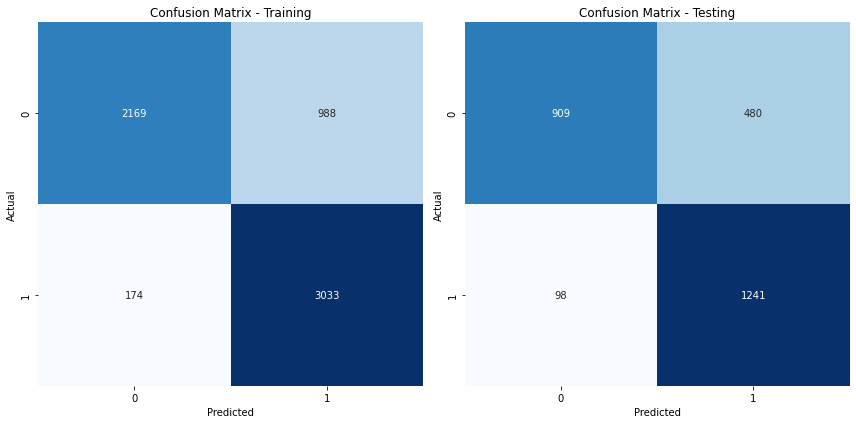

In [35]:
rf2 = RandomForestClassifier(criterion='entropy',max_depth=30,min_samples_leaf=10
                             ,min_samples_split=60,n_estimators=70,random_state=42).fit(X_train,y_train)

model_scores_classification(rf2)
rf_models.append(rf2)
rf_names.append('rf2')

# reduced overfitting, but the test scores went lower 

##### 2nd iteration - set it at a higher range for all params to try to increase accuracy 

In [36]:
param_grid = {'n_estimators' : [100,200,300], 
              'criterion' : ['gini','entropy'],
              'max_depth' : [30,50,70],
              'min_samples_split':[100,200,300],
              'min_samples_leaf':[30,50,70]}

In [37]:
start_time = time.time()

grid = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='accuracy',verbose = 3,refit=True).fit(X_train,y_train)

end_time = time.time()

elapsed_time = end_time - start_time

Fitting 5 folds for each of 162 candidates, totalling 810 fits
[CV 1/5] END criterion=gini, max_depth=30, min_samples_leaf=30, min_samples_split=100, n_estimators=100;, score=0.773 total time=   0.4s
[CV 2/5] END criterion=gini, max_depth=30, min_samples_leaf=30, min_samples_split=100, n_estimators=100;, score=0.794 total time=   0.2s
[CV 3/5] END criterion=gini, max_depth=30, min_samples_leaf=30, min_samples_split=100, n_estimators=100;, score=0.786 total time=   0.2s
[CV 4/5] END criterion=gini, max_depth=30, min_samples_leaf=30, min_samples_split=100, n_estimators=100;, score=0.778 total time=   0.3s
[CV 5/5] END criterion=gini, max_depth=30, min_samples_leaf=30, min_samples_split=100, n_estimators=100;, score=0.778 total time=   0.2s
[CV 1/5] END criterion=gini, max_depth=30, min_samples_leaf=30, min_samples_split=100, n_estimators=200;, score=0.776 total time=   0.7s
[CV 2/5] END criterion=gini, max_depth=30, min_samples_leaf=30, min_samples_split=100, n_estimators=200;, score=0.7

[CV 1/5] END criterion=gini, max_depth=30, min_samples_leaf=50, min_samples_split=200, n_estimators=100;, score=0.757 total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=30, min_samples_leaf=50, min_samples_split=200, n_estimators=100;, score=0.776 total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=30, min_samples_leaf=50, min_samples_split=200, n_estimators=100;, score=0.771 total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=30, min_samples_leaf=50, min_samples_split=200, n_estimators=100;, score=0.768 total time=   0.2s
[CV 5/5] END criterion=gini, max_depth=30, min_samples_leaf=50, min_samples_split=200, n_estimators=100;, score=0.774 total time=   0.2s
[CV 1/5] END criterion=gini, max_depth=30, min_samples_leaf=50, min_samples_split=200, n_estimators=200;, score=0.760 total time=   0.4s
[CV 2/5] END criterion=gini, max_depth=30, min_samples_leaf=50, min_samples_split=200, n_estimators=200;, score=0.777 total time=   0.4s
[CV 3/5] END criterion=gini, max_depth=30

[CV 1/5] END criterion=gini, max_depth=30, min_samples_leaf=70, min_samples_split=300, n_estimators=100;, score=0.751 total time=   0.2s
[CV 2/5] END criterion=gini, max_depth=30, min_samples_leaf=70, min_samples_split=300, n_estimators=100;, score=0.774 total time=   0.2s
[CV 3/5] END criterion=gini, max_depth=30, min_samples_leaf=70, min_samples_split=300, n_estimators=100;, score=0.768 total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=30, min_samples_leaf=70, min_samples_split=300, n_estimators=100;, score=0.761 total time=   0.2s
[CV 5/5] END criterion=gini, max_depth=30, min_samples_leaf=70, min_samples_split=300, n_estimators=100;, score=0.767 total time=   0.2s
[CV 1/5] END criterion=gini, max_depth=30, min_samples_leaf=70, min_samples_split=300, n_estimators=200;, score=0.752 total time=   0.4s
[CV 2/5] END criterion=gini, max_depth=30, min_samples_leaf=70, min_samples_split=300, n_estimators=200;, score=0.775 total time=   0.4s
[CV 3/5] END criterion=gini, max_depth=30

[CV 1/5] END criterion=gini, max_depth=50, min_samples_leaf=50, min_samples_split=100, n_estimators=100;, score=0.765 total time=   0.2s
[CV 2/5] END criterion=gini, max_depth=50, min_samples_leaf=50, min_samples_split=100, n_estimators=100;, score=0.786 total time=   0.2s
[CV 3/5] END criterion=gini, max_depth=50, min_samples_leaf=50, min_samples_split=100, n_estimators=100;, score=0.768 total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=50, min_samples_leaf=50, min_samples_split=100, n_estimators=100;, score=0.773 total time=   0.2s
[CV 5/5] END criterion=gini, max_depth=50, min_samples_leaf=50, min_samples_split=100, n_estimators=100;, score=0.770 total time=   0.2s
[CV 1/5] END criterion=gini, max_depth=50, min_samples_leaf=50, min_samples_split=100, n_estimators=200;, score=0.767 total time=   0.4s
[CV 2/5] END criterion=gini, max_depth=50, min_samples_leaf=50, min_samples_split=100, n_estimators=200;, score=0.783 total time=   0.5s
[CV 3/5] END criterion=gini, max_depth=50

[CV 1/5] END criterion=gini, max_depth=50, min_samples_leaf=70, min_samples_split=200, n_estimators=100;, score=0.754 total time=   0.2s
[CV 2/5] END criterion=gini, max_depth=50, min_samples_leaf=70, min_samples_split=200, n_estimators=100;, score=0.770 total time=   0.2s
[CV 3/5] END criterion=gini, max_depth=50, min_samples_leaf=70, min_samples_split=200, n_estimators=100;, score=0.766 total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=50, min_samples_leaf=70, min_samples_split=200, n_estimators=100;, score=0.754 total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=50, min_samples_leaf=70, min_samples_split=200, n_estimators=100;, score=0.767 total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=50, min_samples_leaf=70, min_samples_split=200, n_estimators=200;, score=0.756 total time=   0.3s
[CV 2/5] END criterion=gini, max_depth=50, min_samples_leaf=70, min_samples_split=200, n_estimators=200;, score=0.776 total time=   0.4s
[CV 3/5] END criterion=gini, max_depth=50

[CV 1/5] END criterion=gini, max_depth=70, min_samples_leaf=30, min_samples_split=300, n_estimators=100;, score=0.754 total time=   0.2s
[CV 2/5] END criterion=gini, max_depth=70, min_samples_leaf=30, min_samples_split=300, n_estimators=100;, score=0.789 total time=   0.2s
[CV 3/5] END criterion=gini, max_depth=70, min_samples_leaf=30, min_samples_split=300, n_estimators=100;, score=0.771 total time=   0.2s
[CV 4/5] END criterion=gini, max_depth=70, min_samples_leaf=30, min_samples_split=300, n_estimators=100;, score=0.767 total time=   0.2s
[CV 5/5] END criterion=gini, max_depth=70, min_samples_leaf=30, min_samples_split=300, n_estimators=100;, score=0.773 total time=   0.2s
[CV 1/5] END criterion=gini, max_depth=70, min_samples_leaf=30, min_samples_split=300, n_estimators=200;, score=0.759 total time=   0.4s
[CV 2/5] END criterion=gini, max_depth=70, min_samples_leaf=30, min_samples_split=300, n_estimators=200;, score=0.785 total time=   0.4s
[CV 3/5] END criterion=gini, max_depth=70

[CV 1/5] END criterion=gini, max_depth=70, min_samples_leaf=70, min_samples_split=100, n_estimators=100;, score=0.753 total time=   0.2s
[CV 2/5] END criterion=gini, max_depth=70, min_samples_leaf=70, min_samples_split=100, n_estimators=100;, score=0.769 total time=   0.2s
[CV 3/5] END criterion=gini, max_depth=70, min_samples_leaf=70, min_samples_split=100, n_estimators=100;, score=0.764 total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=70, min_samples_leaf=70, min_samples_split=100, n_estimators=100;, score=0.764 total time=   0.2s
[CV 5/5] END criterion=gini, max_depth=70, min_samples_leaf=70, min_samples_split=100, n_estimators=100;, score=0.770 total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=70, min_samples_leaf=70, min_samples_split=100, n_estimators=200;, score=0.757 total time=   0.4s
[CV 2/5] END criterion=gini, max_depth=70, min_samples_leaf=70, min_samples_split=100, n_estimators=200;, score=0.771 total time=   0.4s
[CV 3/5] END criterion=gini, max_depth=70

[CV 1/5] END criterion=entropy, max_depth=30, min_samples_leaf=30, min_samples_split=200, n_estimators=100;, score=0.764 total time=   0.2s
[CV 2/5] END criterion=entropy, max_depth=30, min_samples_leaf=30, min_samples_split=200, n_estimators=100;, score=0.785 total time=   0.2s
[CV 3/5] END criterion=entropy, max_depth=30, min_samples_leaf=30, min_samples_split=200, n_estimators=100;, score=0.768 total time=   0.2s
[CV 4/5] END criterion=entropy, max_depth=30, min_samples_leaf=30, min_samples_split=200, n_estimators=100;, score=0.772 total time=   0.2s
[CV 5/5] END criterion=entropy, max_depth=30, min_samples_leaf=30, min_samples_split=200, n_estimators=100;, score=0.774 total time=   0.2s
[CV 1/5] END criterion=entropy, max_depth=30, min_samples_leaf=30, min_samples_split=200, n_estimators=200;, score=0.764 total time=   0.6s
[CV 2/5] END criterion=entropy, max_depth=30, min_samples_leaf=30, min_samples_split=200, n_estimators=200;, score=0.786 total time=   0.4s
[CV 3/5] END criteri

[CV 5/5] END criterion=entropy, max_depth=30, min_samples_leaf=50, min_samples_split=200, n_estimators=300;, score=0.776 total time=   0.7s
[CV 1/5] END criterion=entropy, max_depth=30, min_samples_leaf=50, min_samples_split=300, n_estimators=100;, score=0.755 total time=   0.2s
[CV 2/5] END criterion=entropy, max_depth=30, min_samples_leaf=50, min_samples_split=300, n_estimators=100;, score=0.780 total time=   0.2s
[CV 3/5] END criterion=entropy, max_depth=30, min_samples_leaf=50, min_samples_split=300, n_estimators=100;, score=0.761 total time=   0.2s
[CV 4/5] END criterion=entropy, max_depth=30, min_samples_leaf=50, min_samples_split=300, n_estimators=100;, score=0.767 total time=   0.2s
[CV 5/5] END criterion=entropy, max_depth=30, min_samples_leaf=50, min_samples_split=300, n_estimators=100;, score=0.772 total time=   0.2s
[CV 1/5] END criterion=entropy, max_depth=30, min_samples_leaf=50, min_samples_split=300, n_estimators=200;, score=0.756 total time=   0.4s
[CV 2/5] END criteri

[CV 4/5] END criterion=entropy, max_depth=30, min_samples_leaf=70, min_samples_split=300, n_estimators=300;, score=0.763 total time=   0.7s
[CV 5/5] END criterion=entropy, max_depth=30, min_samples_leaf=70, min_samples_split=300, n_estimators=300;, score=0.771 total time=   0.8s
[CV 1/5] END criterion=entropy, max_depth=50, min_samples_leaf=30, min_samples_split=100, n_estimators=100;, score=0.776 total time=   0.2s
[CV 2/5] END criterion=entropy, max_depth=50, min_samples_leaf=30, min_samples_split=100, n_estimators=100;, score=0.798 total time=   0.2s
[CV 3/5] END criterion=entropy, max_depth=50, min_samples_leaf=30, min_samples_split=100, n_estimators=100;, score=0.781 total time=   0.2s
[CV 4/5] END criterion=entropy, max_depth=50, min_samples_leaf=30, min_samples_split=100, n_estimators=100;, score=0.779 total time=   0.2s
[CV 5/5] END criterion=entropy, max_depth=50, min_samples_leaf=30, min_samples_split=100, n_estimators=100;, score=0.785 total time=   0.2s
[CV 1/5] END criteri

[CV 3/5] END criterion=entropy, max_depth=50, min_samples_leaf=50, min_samples_split=100, n_estimators=300;, score=0.769 total time=   0.7s
[CV 4/5] END criterion=entropy, max_depth=50, min_samples_leaf=50, min_samples_split=100, n_estimators=300;, score=0.767 total time=   0.6s
[CV 5/5] END criterion=entropy, max_depth=50, min_samples_leaf=50, min_samples_split=100, n_estimators=300;, score=0.777 total time=   0.6s
[CV 1/5] END criterion=entropy, max_depth=50, min_samples_leaf=50, min_samples_split=200, n_estimators=100;, score=0.760 total time=   0.1s
[CV 2/5] END criterion=entropy, max_depth=50, min_samples_leaf=50, min_samples_split=200, n_estimators=100;, score=0.777 total time=   0.1s
[CV 3/5] END criterion=entropy, max_depth=50, min_samples_leaf=50, min_samples_split=200, n_estimators=100;, score=0.765 total time=   0.1s
[CV 4/5] END criterion=entropy, max_depth=50, min_samples_leaf=50, min_samples_split=200, n_estimators=100;, score=0.765 total time=   0.1s
[CV 5/5] END criteri

[CV 2/5] END criterion=entropy, max_depth=50, min_samples_leaf=70, min_samples_split=200, n_estimators=300;, score=0.771 total time=   0.6s
[CV 3/5] END criterion=entropy, max_depth=50, min_samples_leaf=70, min_samples_split=200, n_estimators=300;, score=0.764 total time=   0.6s
[CV 4/5] END criterion=entropy, max_depth=50, min_samples_leaf=70, min_samples_split=200, n_estimators=300;, score=0.760 total time=   0.6s
[CV 5/5] END criterion=entropy, max_depth=50, min_samples_leaf=70, min_samples_split=200, n_estimators=300;, score=0.771 total time=   0.6s
[CV 1/5] END criterion=entropy, max_depth=50, min_samples_leaf=70, min_samples_split=300, n_estimators=100;, score=0.751 total time=   0.1s
[CV 2/5] END criterion=entropy, max_depth=50, min_samples_leaf=70, min_samples_split=300, n_estimators=100;, score=0.773 total time=   0.1s
[CV 3/5] END criterion=entropy, max_depth=50, min_samples_leaf=70, min_samples_split=300, n_estimators=100;, score=0.761 total time=   0.1s
[CV 4/5] END criteri

[CV 1/5] END criterion=entropy, max_depth=70, min_samples_leaf=30, min_samples_split=300, n_estimators=300;, score=0.760 total time=   0.6s
[CV 2/5] END criterion=entropy, max_depth=70, min_samples_leaf=30, min_samples_split=300, n_estimators=300;, score=0.781 total time=   0.6s
[CV 3/5] END criterion=entropy, max_depth=70, min_samples_leaf=30, min_samples_split=300, n_estimators=300;, score=0.762 total time=   0.7s
[CV 4/5] END criterion=entropy, max_depth=70, min_samples_leaf=30, min_samples_split=300, n_estimators=300;, score=0.764 total time=   0.6s
[CV 5/5] END criterion=entropy, max_depth=70, min_samples_leaf=30, min_samples_split=300, n_estimators=300;, score=0.774 total time=   0.6s
[CV 1/5] END criterion=entropy, max_depth=70, min_samples_leaf=50, min_samples_split=100, n_estimators=100;, score=0.767 total time=   0.2s
[CV 2/5] END criterion=entropy, max_depth=70, min_samples_leaf=50, min_samples_split=100, n_estimators=100;, score=0.778 total time=   0.1s
[CV 3/5] END criteri

[CV 5/5] END criterion=entropy, max_depth=70, min_samples_leaf=70, min_samples_split=100, n_estimators=200;, score=0.774 total time=   0.4s
[CV 1/5] END criterion=entropy, max_depth=70, min_samples_leaf=70, min_samples_split=100, n_estimators=300;, score=0.755 total time=   0.6s
[CV 2/5] END criterion=entropy, max_depth=70, min_samples_leaf=70, min_samples_split=100, n_estimators=300;, score=0.775 total time=   0.6s
[CV 3/5] END criterion=entropy, max_depth=70, min_samples_leaf=70, min_samples_split=100, n_estimators=300;, score=0.764 total time=   0.6s
[CV 4/5] END criterion=entropy, max_depth=70, min_samples_leaf=70, min_samples_split=100, n_estimators=300;, score=0.760 total time=   0.6s
[CV 5/5] END criterion=entropy, max_depth=70, min_samples_leaf=70, min_samples_split=100, n_estimators=300;, score=0.775 total time=   0.6s
[CV 1/5] END criterion=entropy, max_depth=70, min_samples_leaf=70, min_samples_split=200, n_estimators=100;, score=0.755 total time=   0.1s
[CV 2/5] END criteri

In [38]:
print(grid.best_score_)
print(grid.best_params_)

minutes, seconds = divmod(elapsed_time, 60)
formatted_time = "{:02}:{:02}".format(int(minutes), int(seconds))
print("Elapsed Time: {}".format(formatted_time))

0.7837839106355018
{'criterion': 'entropy', 'max_depth': 30, 'min_samples_leaf': 30, 'min_samples_split': 100, 'n_estimators': 100}
Elapsed Time: 07:01


Model: RandomForestClassifier(criterion='entropy', max_depth=30, min_samples_leaf=30,
                       min_samples_split=100, random_state=42)

Training score: 0.7987115021998743
Testing score: 0.782624633431085

Training report:
              precision    recall  f1-score   support

           0       0.90      0.67      0.77      3157
           1       0.74      0.92      0.82      3207

    accuracy                           0.80      6364
   macro avg       0.82      0.80      0.80      6364
weighted avg       0.82      0.80      0.80      6364


Testing report:
              precision    recall  f1-score   support

           0       0.89      0.65      0.75      1389
           1       0.72      0.92      0.81      1339

    accuracy                           0.78      2728
   macro avg       0.80      0.79      0.78      2728
weighted avg       0.81      0.78      0.78      2728


Confusion Matrix:


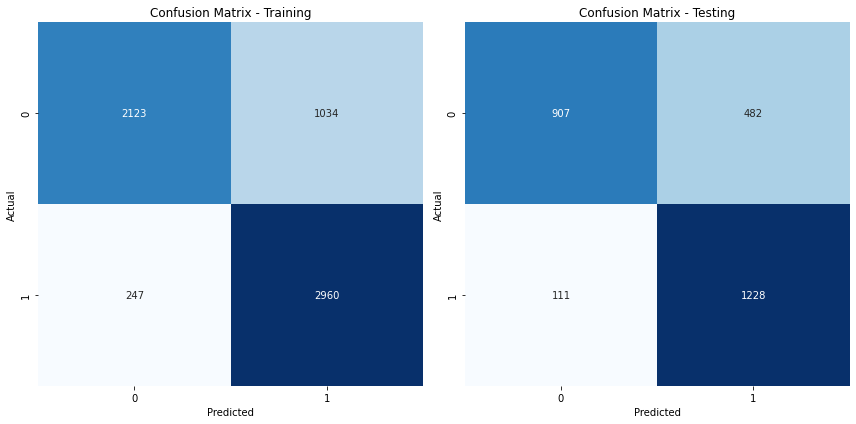

In [39]:
rf3 = RandomForestClassifier(criterion='entropy',max_depth=30,min_samples_leaf=30
                             ,min_samples_split=100,n_estimators=100,random_state=42).fit(X_train,y_train)

model_scores_classification(rf3)
rf_models.append(rf3)
rf_names.append('rf3 - higher range of params')

# overfitting is reduced but accuracies slightly decrease
# lower params are better accuracies

### 1.3.1.3 Optimized Models

In [40]:
scores_table = []
for model, name in zip(rf_models, rf_names):
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    scores_table.append([name, train_score, test_score])

df_scores_rf = pd.DataFrame(scores_table, columns=["Model", "Train Score", "Test Score"])

df_scores_rf

Model  Train Score  Test Score
0                          base     1.000000    0.793622
1                           rf2     0.817410    0.788123
2  rf3 - higher range of params     0.798712    0.782625

### 1.3.2 Model 2 (MLP) 

Model: MLPClassifier(random_state=42)

Training score: 0.6638906348208674
Testing score: 0.6686217008797654

Training report:
              precision    recall  f1-score   support

           0       0.62      0.85      0.71      3157
           1       0.76      0.48      0.59      3207

    accuracy                           0.66      6364
   macro avg       0.69      0.67      0.65      6364
weighted avg       0.69      0.66      0.65      6364


Testing report:
              precision    recall  f1-score   support

           0       0.63      0.84      0.72      1389
           1       0.75      0.49      0.59      1339

    accuracy                           0.67      2728
   macro avg       0.69      0.67      0.66      2728
weighted avg       0.69      0.67      0.66      2728


Confusion Matrix:


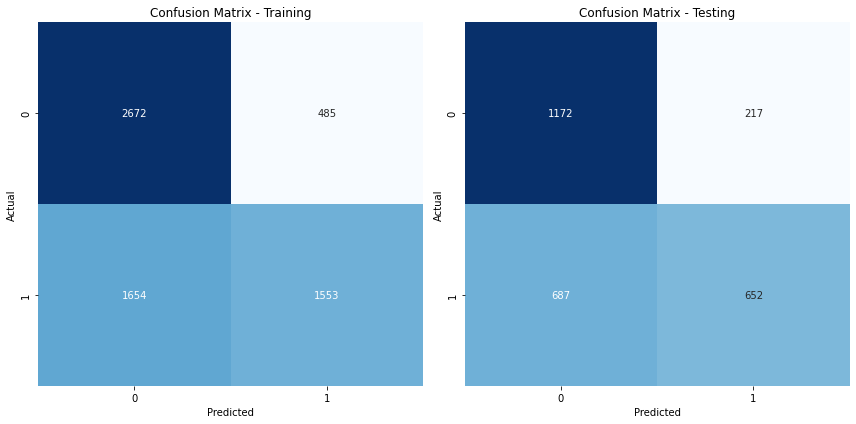

In [41]:
model_scores_classification(mlp)

### 1.3.2.1 Hyperparameter Inspection 
##### hyperparams to be tweaked or that can be tweaked 
- <mark>hidden_layer_sizes</mark> : number of neurons in the hidden layer 
- <mark>activation</mark> : activation or squashing function for the hidden layer 
- <mark>solver</mark> : solver for weight optimization 
- <mark>max_iter</mark> : maximum number of iterations 
- <mark>alpha</mark> : regularisation term 

### 1.3.2.1 (a) hidden_layer_sizes

##### hidden layer sizes against train and test

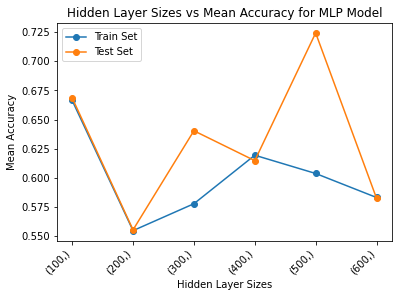

In [42]:
hidden_layer_sizes = [(i,) for i in range(100, 610, 100)]

train_mean_accuracies = []
test_accuracies = []

for size in hidden_layer_sizes:
    model = MLPClassifier(hidden_layer_sizes=size, random_state=42)
    
    # Perform 5-fold cross-validation on the training set
    train_accuracies = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    
    # Record the mean accuracy across folds on the training set
    train_mean_accuracies.append(np.mean(train_accuracies))
    
    # Fit the model on the full training set and evaluate on the test set
    model.fit(X_train, y_train)
    test_accuracy = model.score(X_test, y_test)
    test_accuracies.append(test_accuracy)

# Plotting the graph
plt.plot([str(size) for size in hidden_layer_sizes], train_mean_accuracies, marker='o', label='Train Set')
plt.plot([str(size) for size in hidden_layer_sizes], test_accuracies, marker='o', label='Test Set')
plt.xlabel('Hidden Layer Sizes')
plt.ylabel('Mean Accuracy')
plt.title('Hidden Layer Sizes vs Mean Accuracy for MLP Model')
plt.legend()
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

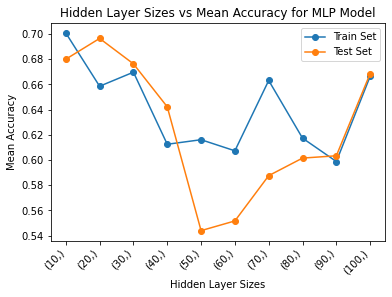

In [43]:
hidden_layer_sizes = [(i,) for i in range(10, 110, 10)]

train_mean_accuracies = []
test_accuracies = []

for size in hidden_layer_sizes:
    model = MLPClassifier(hidden_layer_sizes=size, random_state=42)
    
    # Perform 5-fold cross-validation on the training set
    train_accuracies = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    
    # Record the mean accuracy across folds on the training set
    train_mean_accuracies.append(np.mean(train_accuracies))
    
    # Fit the model on the full training set and evaluate on the test set
    model.fit(X_train, y_train)
    test_accuracy = model.score(X_test, y_test)
    test_accuracies.append(test_accuracy)

# Plotting the graph
plt.plot([str(size) for size in hidden_layer_sizes], train_mean_accuracies, marker='o', label='Train Set')
plt.plot([str(size) for size in hidden_layer_sizes], test_accuracies, marker='o', label='Test Set')
plt.xlabel('Hidden Layer Sizes')
plt.ylabel('Mean Accuracy')
plt.title('Hidden Layer Sizes vs Mean Accuracy for MLP Model')
plt.legend()
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

### 1.3.2.1 (b) max_iter 

##### max_iter against accuracies (range : 100-1000)

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


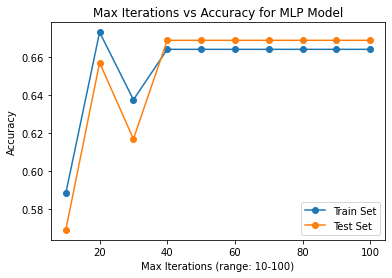

In [44]:
max_iters = [i for i in range(10, 110, 10)]

train_accuracies = []
test_accuracies = []

# Train MLP models with different max_iter values
for max_iter in max_iters:
    model = MLPClassifier(max_iter=max_iter, random_state=42)
    
    # Train the model on the training set
    model.fit(X_train, y_train)
    
    # Evaluate accuracy on the training set
    train_accuracy = model.score(X_train, y_train)
    train_accuracies.append(train_accuracy)
    
    # Evaluate accuracy on the test set
    test_accuracy = model.score(X_test, y_test)
    test_accuracies.append(test_accuracy)

# Plotting the graph
plt.plot(max_iters, train_accuracies, marker='o', label='Train Set')
plt.plot(max_iters, test_accuracies, marker='o', label='Test Set')
plt.xlabel('Max Iterations (range: 10-100)')
plt.ylabel('Accuracy')
plt.title('Max Iterations vs Accuracy for MLP Model')
plt.legend()
plt.show()

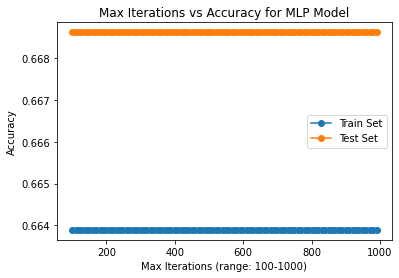

In [45]:
max_iters = [i for i in range(100, 1000, 10)]

train_accuracies = []
test_accuracies = []

# Train MLP models with different max_iter values
for max_iter in max_iters:
    model = MLPClassifier(max_iter=max_iter, random_state=42)
    
    # Train the model on the training set
    model.fit(X_train, y_train)
    
    # Evaluate accuracy on the training set
    train_accuracy = model.score(X_train, y_train)
    train_accuracies.append(train_accuracy)
    
    # Evaluate accuracy on the test set
    test_accuracy = model.score(X_test, y_test)
    test_accuracies.append(test_accuracy)

# Plotting the graph
plt.plot(max_iters, train_accuracies, marker='o', label='Train Set')
plt.plot(max_iters, test_accuracies, marker='o', label='Test Set')
plt.xlabel('Max Iterations (range: 100-1000)')
plt.ylabel('Accuracy')
plt.title('Max Iterations vs Accuracy for MLP Model')
plt.legend()
plt.show()

# scores tend to plateau at a high number of iterations

##### max_iter and solvers vs train score 

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERAT

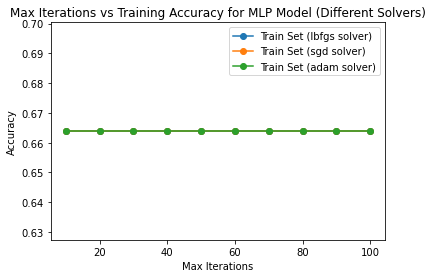

In [46]:
max_iters = [i for i in range(10, 110, 10)]
solvers = ['lbfgs', 'sgd', 'adam']

# Create a dictionary to store training scores for each solver
train_scores = {solver: [] for solver in solvers}

# Train MLP models with different max_iter values and solvers
for solver in solvers:
    for max_iter in max_iters:
        model = MLPClassifier(max_iter=max_iter, solver=solver, random_state=42)
        
        # Train the model on the training set
        model.fit(X_train, y_train)
        
        # Evaluate accuracy on the training set
        train_accurbacy = model.score(X_train, y_train)
        train_scores[solver].append(train_accuracy)

# Plotting the graph for different solvers
for solver in solvers:
    plt.plot(max_iters, train_scores[solver], marker='o', label=f'Train Set ({solver} solver)')

plt.xlabel('Max Iterations')
plt.ylabel('Accuracy')
plt.title('Max Iterations vs Training Accuracy for MLP Model (Different Solvers)')
plt.legend()
plt.show()

# according to documentation, 'lbfgs' solver is better for smaller and lesser complex datasets
# warnings show here that the model is not converging, it might need alot more iterations for it to converge as
# compared to other solvers

### 1.3.2.2 Optimizing Hyperparameters 

### 1.3.2.2 (a) GridSearchCV

In [47]:
mlp_models = [mlp]
mlp_names = ['base']

##### 1st iteration - low set of max_iter

In [48]:
param_grid = {'hidden_layer_sizes' : [(10,),(20,),(30,)],
              'activation' : ['identity','logistic','tanh','relu'],
              'solver' : ['adam','sgd'], # we dont use lbfgs as it is a large dataset 
              'max_iter' : [40,50,60]} # start with a lower set of iterations 

In [49]:
start_time = time.time()

grid = GridSearchCV(estimator=mlp, param_grid=param_grid, scoring='accuracy',verbose = 3,refit=True).fit(X_train,y_train)

end_time = time.time()

elapsed_time = end_time - start_time

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV 1/5] END activation=identity, hidden_layer_sizes=(10,), max_iter=40, solver=adam;, score=0.668 total time=   0.1s
[CV 2/5] END activation=identity, hidden_layer_sizes=(10,), max_iter=40, solver=adam;, score=0.641 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=identity, hidden_layer_sizes=(10,), max_iter=40, solver=adam;, score=0.678 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=identity, hidden_layer_sizes=(10,), max_iter=40, solver=adam;, score=0.611 total time=   0.3s
[CV 5/5] END activation=identity, hidden_layer_sizes=(10,), max_iter=40, solver=adam;, score=0.697 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 1/5] END activation=identity, hidden_layer_sizes=(10,), max_iter=40, solver=sgd;, score=0.496 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 2/5] END activation=identity, hidden_layer_sizes=(10,), max_iter=40, solver=sgd;, score=0.496 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 3/5] END activation=identity, hidden_layer_sizes=(10,), max_iter=40, solver=sgd;, score=0.496 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 4/5] END activation=identity, hidden_layer_sizes=(10,), max_iter=40, solver=sgd;, score=0.496 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=identity, hidden_layer_sizes=(10,), max_iter=40, solver=sgd;, score=0.496 total time=   0.3s
[CV 1/5] END activation=identity, hidden_layer_sizes=(10,), max_iter=50, solver=adam;, score=0.668 total time=   0.1s
[CV 2/5] END activation=identity, hidden_layer_sizes=(10,), max_iter=50, solver=adam;, score=0.641 total time=   0.2s
[CV 3/5] END activation=identity, hidden_layer_sizes=(10,), max_iter=50, solver=adam;, score=0.579 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=identity, hidden_layer_sizes=(10,), max_iter=50, solver=adam;, score=0.654 total time=   0.4s
[CV 5/5] END activation=identity, hidden_layer_sizes=(10,), max_iter=50, solver=adam;, score=0.697 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 1/5] END activation=identity, hidden_layer_sizes=(10,), max_iter=50, solver=sgd;, score=0.496 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 2/5] END activation=identity, hidden_layer_sizes=(10,), max_iter=50, solver=sgd;, score=0.496 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 3/5] END activation=identity, hidden_layer_sizes=(10,), max_iter=50, solver=sgd;, score=0.496 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 4/5] END activation=identity, hidden_layer_sizes=(10,), max_iter=50, solver=sgd;, score=0.496 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=identity, hidden_layer_sizes=(10,), max_iter=50, solver=sgd;, score=0.496 total time=   0.3s
[CV 1/5] END activation=identity, hidden_layer_sizes=(10,), max_iter=60, solver=adam;, score=0.668 total time=   0.1s
[CV 2/5] END activation=identity, hidden_layer_sizes=(10,), max_iter=60, solver=adam;, score=0.641 total time=   0.2s
[CV 3/5] END activation=identity, hidden_layer_sizes=(10,), max_iter=60, solver=adam;, score=0.579 total time=   0.3s
[CV 4/5] END activation=identity, hidden_layer_sizes=(10,), max_iter=60, solver=adam;, score=0.727 total time=   0.5s
[CV 5/5] END activation=identity, hidden_layer_sizes=(10,), max_iter=60, solver=adam;, score=0.697 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (60) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 1/5] END activation=identity, hidden_layer_sizes=(10,), max_iter=60, solver=sgd;, score=0.496 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (60) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 2/5] END activation=identity, hidden_layer_sizes=(10,), max_iter=60, solver=sgd;, score=0.496 total time=   0.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (60) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 3/5] END activation=identity, hidden_layer_sizes=(10,), max_iter=60, solver=sgd;, score=0.496 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (60) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 4/5] END activation=identity, hidden_layer_sizes=(10,), max_iter=60, solver=sgd;, score=0.496 total time=   0.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (60) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=identity, hidden_layer_sizes=(10,), max_iter=60, solver=sgd;, score=0.496 total time=   0.4s
[CV 1/5] END activation=identity, hidden_layer_sizes=(20,), max_iter=40, solver=adam;, score=0.580 total time=   0.4s
[CV 2/5] END activation=identity, hidden_layer_sizes=(20,), max_iter=40, solver=adam;, score=0.595 total time=   0.4s
[CV 3/5] END activation=identity, hidden_layer_sizes=(20,), max_iter=40, solver=adam;, score=0.625 total time=   0.1s
[CV 4/5] END activation=identity, hidden_layer_sizes=(20,), max_iter=40, solver=adam;, score=0.598 total time=   0.1s
[CV 5/5] END activation=identity, hidden_layer_sizes=(20,), max_iter=40, solver=adam;, score=0.667 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 1/5] END activation=identity, hidden_layer_sizes=(20,), max_iter=40, solver=sgd;, score=0.496 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 2/5] END activation=identity, hidden_layer_sizes=(20,), max_iter=40, solver=sgd;, score=0.496 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 3/5] END activation=identity, hidden_layer_sizes=(20,), max_iter=40, solver=sgd;, score=0.496 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 4/5] END activation=identity, hidden_layer_sizes=(20,), max_iter=40, solver=sgd;, score=0.496 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=identity, hidden_layer_sizes=(20,), max_iter=40, solver=sgd;, score=0.496 total time=   0.3s
[CV 1/5] END activation=identity, hidden_layer_sizes=(20,), max_iter=50, solver=adam;, score=0.580 total time=   0.4s
[CV 2/5] END activation=identity, hidden_layer_sizes=(20,), max_iter=50, solver=adam;, score=0.595 total time=   0.3s
[CV 3/5] END activation=identity, hidden_layer_sizes=(20,), max_iter=50, solver=adam;, score=0.625 total time=   0.2s
[CV 4/5] END activation=identity, hidden_layer_sizes=(20,), max_iter=50, solver=adam;, score=0.598 total time=   0.1s
[CV 5/5] END activation=identity, hidden_layer_sizes=(20,), max_iter=50, solver=adam;, score=0.667 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 1/5] END activation=identity, hidden_layer_sizes=(20,), max_iter=50, solver=sgd;, score=0.496 total time=   0.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 2/5] END activation=identity, hidden_layer_sizes=(20,), max_iter=50, solver=sgd;, score=0.496 total time=   0.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 3/5] END activation=identity, hidden_layer_sizes=(20,), max_iter=50, solver=sgd;, score=0.496 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 4/5] END activation=identity, hidden_layer_sizes=(20,), max_iter=50, solver=sgd;, score=0.496 total time=   0.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=identity, hidden_layer_sizes=(20,), max_iter=50, solver=sgd;, score=0.496 total time=   0.4s
[CV 1/5] END activation=identity, hidden_layer_sizes=(20,), max_iter=60, solver=adam;, score=0.580 total time=   0.4s
[CV 2/5] END activation=identity, hidden_layer_sizes=(20,), max_iter=60, solver=adam;, score=0.595 total time=   0.3s
[CV 3/5] END activation=identity, hidden_layer_sizes=(20,), max_iter=60, solver=adam;, score=0.625 total time=   0.1s
[CV 4/5] END activation=identity, hidden_layer_sizes=(20,), max_iter=60, solver=adam;, score=0.598 total time=   0.1s
[CV 5/5] END activation=identity, hidden_layer_sizes=(20,), max_iter=60, solver=adam;, score=0.667 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (60) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 1/5] END activation=identity, hidden_layer_sizes=(20,), max_iter=60, solver=sgd;, score=0.496 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (60) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 2/5] END activation=identity, hidden_layer_sizes=(20,), max_iter=60, solver=sgd;, score=0.496 total time=   0.7s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (60) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 3/5] END activation=identity, hidden_layer_sizes=(20,), max_iter=60, solver=sgd;, score=0.496 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (60) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 4/5] END activation=identity, hidden_layer_sizes=(20,), max_iter=60, solver=sgd;, score=0.496 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (60) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=identity, hidden_layer_sizes=(20,), max_iter=60, solver=sgd;, score=0.496 total time=   0.8s
[CV 1/5] END activation=identity, hidden_layer_sizes=(30,), max_iter=40, solver=adam;, score=0.537 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=identity, hidden_layer_sizes=(30,), max_iter=40, solver=adam;, score=0.603 total time=   0.4s
[CV 3/5] END activation=identity, hidden_layer_sizes=(30,), max_iter=40, solver=adam;, score=0.583 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=identity, hidden_layer_sizes=(30,), max_iter=40, solver=adam;, score=0.574 total time=   0.4s
[CV 5/5] END activation=identity, hidden_layer_sizes=(30,), max_iter=40, solver=adam;, score=0.659 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 1/5] END activation=identity, hidden_layer_sizes=(30,), max_iter=40, solver=sgd;, score=0.496 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 2/5] END activation=identity, hidden_layer_sizes=(30,), max_iter=40, solver=sgd;, score=0.496 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 3/5] END activation=identity, hidden_layer_sizes=(30,), max_iter=40, solver=sgd;, score=0.496 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 4/5] END activation=identity, hidden_layer_sizes=(30,), max_iter=40, solver=sgd;, score=0.496 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=identity, hidden_layer_sizes=(30,), max_iter=40, solver=sgd;, score=0.496 total time=   0.4s
[CV 1/5] END activation=identity, hidden_layer_sizes=(30,), max_iter=50, solver=adam;, score=0.537 total time=   0.2s
[CV 2/5] END activation=identity, hidden_layer_sizes=(30,), max_iter=50, solver=adam;, score=0.655 total time=   0.5s
[CV 3/5] END activation=identity, hidden_layer_sizes=(30,), max_iter=50, solver=adam;, score=0.583 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=identity, hidden_layer_sizes=(30,), max_iter=50, solver=adam;, score=0.588 total time=   0.5s
[CV 5/5] END activation=identity, hidden_layer_sizes=(30,), max_iter=50, solver=adam;, score=0.659 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 1/5] END activation=identity, hidden_layer_sizes=(30,), max_iter=50, solver=sgd;, score=0.496 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 2/5] END activation=identity, hidden_layer_sizes=(30,), max_iter=50, solver=sgd;, score=0.496 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 3/5] END activation=identity, hidden_layer_sizes=(30,), max_iter=50, solver=sgd;, score=0.496 total time=   0.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 4/5] END activation=identity, hidden_layer_sizes=(30,), max_iter=50, solver=sgd;, score=0.496 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=identity, hidden_layer_sizes=(30,), max_iter=50, solver=sgd;, score=0.496 total time=   0.4s
[CV 1/5] END activation=identity, hidden_layer_sizes=(30,), max_iter=60, solver=adam;, score=0.537 total time=   0.2s
[CV 2/5] END activation=identity, hidden_layer_sizes=(30,), max_iter=60, solver=adam;, score=0.655 total time=   0.6s
[CV 3/5] END activation=identity, hidden_layer_sizes=(30,), max_iter=60, solver=adam;, score=0.583 total time=   0.2s
[CV 4/5] END activation=identity, hidden_layer_sizes=(30,), max_iter=60, solver=adam;, score=0.594 total time=   0.5s
[CV 5/5] END activation=identity, hidden_layer_sizes=(30,), max_iter=60, solver=adam;, score=0.659 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (60) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 1/5] END activation=identity, hidden_layer_sizes=(30,), max_iter=60, solver=sgd;, score=0.496 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (60) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 2/5] END activation=identity, hidden_layer_sizes=(30,), max_iter=60, solver=sgd;, score=0.496 total time=   0.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (60) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 3/5] END activation=identity, hidden_layer_sizes=(30,), max_iter=60, solver=sgd;, score=0.496 total time=   0.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (60) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 4/5] END activation=identity, hidden_layer_sizes=(30,), max_iter=60, solver=sgd;, score=0.496 total time=   0.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (60) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=identity, hidden_layer_sizes=(30,), max_iter=60, solver=sgd;, score=0.496 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, hidden_layer_sizes=(10,), max_iter=40, solver=adam;, score=0.590 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, hidden_layer_sizes=(10,), max_iter=40, solver=adam;, score=0.496 total time=   0.3s
[CV 3/5] END activation=logistic, hidden_layer_sizes=(10,), max_iter=40, solver=adam;, score=0.529 total time=   0.3s
[CV 4/5] END activation=logistic, hidden_layer_sizes=(10,), max_iter=40, solver=adam;, score=0.496 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, hidden_layer_sizes=(10,), max_iter=40, solver=adam;, score=0.497 total time=   0.4s
[CV 1/5] END activation=logistic, hidden_layer_sizes=(10,), max_iter=40, solver=sgd;, score=0.504 total time=   0.2s
[CV 2/5] END activation=logistic, hidden_layer_sizes=(10,), max_iter=40, solver=sgd;, score=0.504 total time=   0.1s
[CV 3/5] END activation=logistic, hidden_layer_sizes=(10,), max_iter=40, solver=sgd;, score=0.504 total time=   0.1s
[CV 4/5] END activation=logistic, hidden_layer_sizes=(10,), max_iter=40, solver=sgd;, score=0.504 total time=   0.1s
[CV 5/5] END activation=logistic, hidden_layer_sizes=(10,), max_iter=40, solver=sgd;, score=0.504 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, hidden_layer_sizes=(10,), max_iter=50, solver=adam;, score=0.595 total time=   0.5s
[CV 2/5] END activation=logistic, hidden_layer_sizes=(10,), max_iter=50, solver=adam;, score=0.496 total time=   0.5s
[CV 3/5] END activation=logistic, hidden_layer_sizes=(10,), max_iter=50, solver=adam;, score=0.529 total time=   0.4s
[CV 4/5] END activation=logistic, hidden_layer_sizes=(10,), max_iter=50, solver=adam;, score=0.496 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, hidden_layer_sizes=(10,), max_iter=50, solver=adam;, score=0.605 total time=   0.5s
[CV 1/5] END activation=logistic, hidden_layer_sizes=(10,), max_iter=50, solver=sgd;, score=0.504 total time=   0.1s
[CV 2/5] END activation=logistic, hidden_layer_sizes=(10,), max_iter=50, solver=sgd;, score=0.504 total time=   0.1s
[CV 3/5] END activation=logistic, hidden_layer_sizes=(10,), max_iter=50, solver=sgd;, score=0.504 total time=   0.2s
[CV 4/5] END activation=logistic, hidden_layer_sizes=(10,), max_iter=50, solver=sgd;, score=0.504 total time=   0.2s
[CV 5/5] END activation=logistic, hidden_layer_sizes=(10,), max_iter=50, solver=sgd;, score=0.504 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (60) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, hidden_layer_sizes=(10,), max_iter=60, solver=adam;, score=0.682 total time=   0.6s
[CV 2/5] END activation=logistic, hidden_layer_sizes=(10,), max_iter=60, solver=adam;, score=0.496 total time=   0.4s
[CV 3/5] END activation=logistic, hidden_layer_sizes=(10,), max_iter=60, solver=adam;, score=0.529 total time=   0.3s
[CV 4/5] END activation=logistic, hidden_layer_sizes=(10,), max_iter=60, solver=adam;, score=0.496 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (60) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, hidden_layer_sizes=(10,), max_iter=60, solver=adam;, score=0.636 total time=   0.6s
[CV 1/5] END activation=logistic, hidden_layer_sizes=(10,), max_iter=60, solver=sgd;, score=0.504 total time=   0.1s
[CV 2/5] END activation=logistic, hidden_layer_sizes=(10,), max_iter=60, solver=sgd;, score=0.504 total time=   0.1s
[CV 3/5] END activation=logistic, hidden_layer_sizes=(10,), max_iter=60, solver=sgd;, score=0.504 total time=   0.1s
[CV 4/5] END activation=logistic, hidden_layer_sizes=(10,), max_iter=60, solver=sgd;, score=0.504 total time=   0.1s
[CV 5/5] END activation=logistic, hidden_layer_sizes=(10,), max_iter=60, solver=sgd;, score=0.504 total time=   0.2s
[CV 1/5] END activation=logistic, hidden_layer_sizes=(20,), max_iter=40, solver=adam;, score=0.540 total time=   0.4s
[CV 2/5] END activation=logistic, hidden_layer_sizes=(20,), max_iter=40, solver=adam;, score=0.497 total time=   0.3s
[CV 3/5] END activation=logistic, hidden_layer_sizes=(20,), m

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, hidden_layer_sizes=(20,), max_iter=40, solver=adam;, score=0.566 total time=   0.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, hidden_layer_sizes=(20,), max_iter=40, solver=adam;, score=0.569 total time=   0.5s
[CV 1/5] END activation=logistic, hidden_layer_sizes=(20,), max_iter=40, solver=sgd;, score=0.504 total time=   0.1s
[CV 2/5] END activation=logistic, hidden_layer_sizes=(20,), max_iter=40, solver=sgd;, score=0.504 total time=   0.1s
[CV 3/5] END activation=logistic, hidden_layer_sizes=(20,), max_iter=40, solver=sgd;, score=0.504 total time=   0.1s
[CV 4/5] END activation=logistic, hidden_layer_sizes=(20,), max_iter=40, solver=sgd;, score=0.504 total time=   0.1s
[CV 5/5] END activation=logistic, hidden_layer_sizes=(20,), max_iter=40, solver=sgd;, score=0.504 total time=   0.1s
[CV 1/5] END activation=logistic, hidden_layer_sizes=(20,), max_iter=50, solver=adam;, score=0.540 total time=   0.4s
[CV 2/5] END activation=logistic, hidden_layer_sizes=(20,), max_iter=50, solver=adam;, score=0.497 total time=   0.3s
[CV 3/5] END activation=logistic, hidden_layer_sizes=(20,), m

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, hidden_layer_sizes=(20,), max_iter=50, solver=adam;, score=0.612 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, hidden_layer_sizes=(20,), max_iter=50, solver=adam;, score=0.601 total time=   0.6s
[CV 1/5] END activation=logistic, hidden_layer_sizes=(20,), max_iter=50, solver=sgd;, score=0.504 total time=   0.1s
[CV 2/5] END activation=logistic, hidden_layer_sizes=(20,), max_iter=50, solver=sgd;, score=0.504 total time=   0.1s
[CV 3/5] END activation=logistic, hidden_layer_sizes=(20,), max_iter=50, solver=sgd;, score=0.504 total time=   0.1s
[CV 4/5] END activation=logistic, hidden_layer_sizes=(20,), max_iter=50, solver=sgd;, score=0.504 total time=   0.1s
[CV 5/5] END activation=logistic, hidden_layer_sizes=(20,), max_iter=50, solver=sgd;, score=0.504 total time=   0.1s
[CV 1/5] END activation=logistic, hidden_layer_sizes=(20,), max_iter=60, solver=adam;, score=0.540 total time=   0.3s
[CV 2/5] END activation=logistic, hidden_layer_sizes=(20,), max_iter=60, solver=adam;, score=0.497 total time=   0.3s
[CV 3/5] END activation=logistic, hidden_layer_sizes=(20,), m

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (60) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, hidden_layer_sizes=(20,), max_iter=60, solver=adam;, score=0.621 total time=   0.7s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (60) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, hidden_layer_sizes=(20,), max_iter=60, solver=adam;, score=0.667 total time=   0.8s
[CV 1/5] END activation=logistic, hidden_layer_sizes=(20,), max_iter=60, solver=sgd;, score=0.504 total time=   0.1s
[CV 2/5] END activation=logistic, hidden_layer_sizes=(20,), max_iter=60, solver=sgd;, score=0.504 total time=   0.1s
[CV 3/5] END activation=logistic, hidden_layer_sizes=(20,), max_iter=60, solver=sgd;, score=0.504 total time=   0.1s
[CV 4/5] END activation=logistic, hidden_layer_sizes=(20,), max_iter=60, solver=sgd;, score=0.504 total time=   0.1s
[CV 5/5] END activation=logistic, hidden_layer_sizes=(20,), max_iter=60, solver=sgd;, score=0.504 total time=   0.1s
[CV 1/5] END activation=logistic, hidden_layer_sizes=(30,), max_iter=40, solver=adam;, score=0.496 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, hidden_layer_sizes=(30,), max_iter=40, solver=adam;, score=0.650 total time=   0.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, hidden_layer_sizes=(30,), max_iter=40, solver=adam;, score=0.683 total time=   0.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, hidden_layer_sizes=(30,), max_iter=40, solver=adam;, score=0.561 total time=   0.5s
[CV 5/5] END activation=logistic, hidden_layer_sizes=(30,), max_iter=40, solver=adam;, score=0.496 total time=   0.2s
[CV 1/5] END activation=logistic, hidden_layer_sizes=(30,), max_iter=40, solver=sgd;, score=0.504 total time=   0.1s
[CV 2/5] END activation=logistic, hidden_layer_sizes=(30,), max_iter=40, solver=sgd;, score=0.504 total time=   0.2s
[CV 3/5] END activation=logistic, hidden_layer_sizes=(30,), max_iter=40, solver=sgd;, score=0.519 total time=   0.1s
[CV 4/5] END activation=logistic, hidden_layer_sizes=(30,), max_iter=40, solver=sgd;, score=0.504 total time=   0.1s
[CV 5/5] END activation=logistic, hidden_layer_sizes=(30,), max_iter=40, solver=sgd;, score=0.494 total time=   0.2s
[CV 1/5] END activation=logistic, hidden_layer_sizes=(30,), max_iter=50, solver=adam;, score=0.496 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, hidden_layer_sizes=(30,), max_iter=50, solver=adam;, score=0.640 total time=   0.7s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, hidden_layer_sizes=(30,), max_iter=50, solver=adam;, score=0.703 total time=   0.7s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, hidden_layer_sizes=(30,), max_iter=50, solver=adam;, score=0.546 total time=   0.7s
[CV 5/5] END activation=logistic, hidden_layer_sizes=(30,), max_iter=50, solver=adam;, score=0.496 total time=   0.2s
[CV 1/5] END activation=logistic, hidden_layer_sizes=(30,), max_iter=50, solver=sgd;, score=0.504 total time=   0.1s
[CV 2/5] END activation=logistic, hidden_layer_sizes=(30,), max_iter=50, solver=sgd;, score=0.504 total time=   0.1s
[CV 3/5] END activation=logistic, hidden_layer_sizes=(30,), max_iter=50, solver=sgd;, score=0.519 total time=   0.1s
[CV 4/5] END activation=logistic, hidden_layer_sizes=(30,), max_iter=50, solver=sgd;, score=0.504 total time=   0.1s
[CV 5/5] END activation=logistic, hidden_layer_sizes=(30,), max_iter=50, solver=sgd;, score=0.494 total time=   0.2s
[CV 1/5] END activation=logistic, hidden_layer_sizes=(30,), max_iter=60, solver=adam;, score=0.496 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (60) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, hidden_layer_sizes=(30,), max_iter=60, solver=adam;, score=0.646 total time=   0.8s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (60) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, hidden_layer_sizes=(30,), max_iter=60, solver=adam;, score=0.712 total time=   0.8s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (60) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, hidden_layer_sizes=(30,), max_iter=60, solver=adam;, score=0.612 total time=   0.9s
[CV 5/5] END activation=logistic, hidden_layer_sizes=(30,), max_iter=60, solver=adam;, score=0.496 total time=   0.2s
[CV 1/5] END activation=logistic, hidden_layer_sizes=(30,), max_iter=60, solver=sgd;, score=0.504 total time=   0.1s
[CV 2/5] END activation=logistic, hidden_layer_sizes=(30,), max_iter=60, solver=sgd;, score=0.504 total time=   0.1s
[CV 3/5] END activation=logistic, hidden_layer_sizes=(30,), max_iter=60, solver=sgd;, score=0.519 total time=   0.1s
[CV 4/5] END activation=logistic, hidden_layer_sizes=(30,), max_iter=60, solver=sgd;, score=0.504 total time=   0.1s
[CV 5/5] END activation=logistic, hidden_layer_sizes=(30,), max_iter=60, solver=sgd;, score=0.494 total time=   0.1s
[CV 1/5] END activation=tanh, hidden_layer_sizes=(10,), max_iter=40, solver=adam;, score=0.504 total time=   0.2s
[CV 2/5] END activation=tanh, hidden_layer_sizes=(10,), max_iter=

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, hidden_layer_sizes=(10,), max_iter=40, solver=adam;, score=0.510 total time=   0.4s
[CV 4/5] END activation=tanh, hidden_layer_sizes=(10,), max_iter=40, solver=adam;, score=0.505 total time=   0.2s
[CV 5/5] END activation=tanh, hidden_layer_sizes=(10,), max_iter=40, solver=adam;, score=0.506 total time=   0.3s
[CV 1/5] END activation=tanh, hidden_layer_sizes=(10,), max_iter=40, solver=sgd;, score=0.504 total time=   0.1s
[CV 2/5] END activation=tanh, hidden_layer_sizes=(10,), max_iter=40, solver=sgd;, score=0.504 total time=   0.1s
[CV 3/5] END activation=tanh, hidden_layer_sizes=(10,), max_iter=40, solver=sgd;, score=0.504 total time=   0.1s
[CV 4/5] END activation=tanh, hidden_layer_sizes=(10,), max_iter=40, solver=sgd;, score=0.504 total time=   0.1s
[CV 5/5] END activation=tanh, hidden_layer_sizes=(10,), max_iter=40, solver=sgd;, score=0.506 total time=   0.1s
[CV 1/5] END activation=tanh, hidden_layer_sizes=(10,), max_iter=50, solver=adam;, score=0.50

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, hidden_layer_sizes=(20,), max_iter=40, solver=adam;, score=0.506 total time=   0.4s
[CV 5/5] END activation=tanh, hidden_layer_sizes=(20,), max_iter=40, solver=adam;, score=0.506 total time=   0.1s
[CV 1/5] END activation=tanh, hidden_layer_sizes=(20,), max_iter=40, solver=sgd;, score=0.504 total time=   0.1s
[CV 2/5] END activation=tanh, hidden_layer_sizes=(20,), max_iter=40, solver=sgd;, score=0.504 total time=   0.1s
[CV 3/5] END activation=tanh, hidden_layer_sizes=(20,), max_iter=40, solver=sgd;, score=0.504 total time=   0.1s
[CV 4/5] END activation=tanh, hidden_layer_sizes=(20,), max_iter=40, solver=sgd;, score=0.495 total time=   0.1s
[CV 5/5] END activation=tanh, hidden_layer_sizes=(20,), max_iter=40, solver=sgd;, score=0.504 total time=   0.0s
[CV 1/5] END activation=tanh, hidden_layer_sizes=(20,), max_iter=50, solver=adam;, score=0.504 total time=   0.4s
[CV 2/5] END activation=tanh, hidden_layer_sizes=(20,), max_iter=50, solver=adam;, score=0.50

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, hidden_layer_sizes=(20,), max_iter=50, solver=adam;, score=0.505 total time=   0.5s
[CV 5/5] END activation=tanh, hidden_layer_sizes=(20,), max_iter=50, solver=adam;, score=0.506 total time=   0.1s
[CV 1/5] END activation=tanh, hidden_layer_sizes=(20,), max_iter=50, solver=sgd;, score=0.504 total time=   0.1s
[CV 2/5] END activation=tanh, hidden_layer_sizes=(20,), max_iter=50, solver=sgd;, score=0.504 total time=   0.1s
[CV 3/5] END activation=tanh, hidden_layer_sizes=(20,), max_iter=50, solver=sgd;, score=0.504 total time=   0.0s
[CV 4/5] END activation=tanh, hidden_layer_sizes=(20,), max_iter=50, solver=sgd;, score=0.495 total time=   0.0s
[CV 5/5] END activation=tanh, hidden_layer_sizes=(20,), max_iter=50, solver=sgd;, score=0.504 total time=   0.0s
[CV 1/5] END activation=tanh, hidden_layer_sizes=(20,), max_iter=60, solver=adam;, score=0.504 total time=   0.3s
[CV 2/5] END activation=tanh, hidden_layer_sizes=(20,), max_iter=60, solver=adam;, score=0.50

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, hidden_layer_sizes=(10,), max_iter=40, solver=adam;, score=0.681 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, hidden_layer_sizes=(10,), max_iter=40, solver=adam;, score=0.669 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, hidden_layer_sizes=(10,), max_iter=40, solver=adam;, score=0.722 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, hidden_layer_sizes=(10,), max_iter=40, solver=adam;, score=0.695 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, hidden_layer_sizes=(10,), max_iter=40, solver=adam;, score=0.695 total time=   0.3s
[CV 1/5] END activation=relu, hidden_layer_sizes=(10,), max_iter=40, solver=sgd;, score=0.496 total time=   0.2s
[CV 2/5] END activation=relu, hidden_layer_sizes=(10,), max_iter=40, solver=sgd;, score=0.496 total time=   0.2s
[CV 3/5] END activation=relu, hidden_layer_sizes=(10,), max_iter=40, solver=sgd;, score=0.496 total time=   0.2s
[CV 4/5] END activation=relu, hidden_layer_sizes=(10,), max_iter=40, solver=sgd;, score=0.496 total time=   0.3s
[CV 5/5] END activation=relu, hidden_layer_sizes=(10,), max_iter=40, solver=sgd;, score=0.496 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, hidden_layer_sizes=(10,), max_iter=50, solver=adam;, score=0.720 total time=   0.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, hidden_layer_sizes=(10,), max_iter=50, solver=adam;, score=0.699 total time=   0.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, hidden_layer_sizes=(10,), max_iter=50, solver=adam;, score=0.728 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, hidden_layer_sizes=(10,), max_iter=50, solver=adam;, score=0.706 total time=   0.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, hidden_layer_sizes=(10,), max_iter=50, solver=adam;, score=0.730 total time=   0.4s
[CV 1/5] END activation=relu, hidden_layer_sizes=(10,), max_iter=50, solver=sgd;, score=0.496 total time=   0.2s
[CV 2/5] END activation=relu, hidden_layer_sizes=(10,), max_iter=50, solver=sgd;, score=0.496 total time=   0.2s
[CV 3/5] END activation=relu, hidden_layer_sizes=(10,), max_iter=50, solver=sgd;, score=0.496 total time=   0.2s
[CV 4/5] END activation=relu, hidden_layer_sizes=(10,), max_iter=50, solver=sgd;, score=0.496 total time=   0.2s
[CV 5/5] END activation=relu, hidden_layer_sizes=(10,), max_iter=50, solver=sgd;, score=0.496 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (60) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, hidden_layer_sizes=(10,), max_iter=60, solver=adam;, score=0.714 total time=   0.5s
[CV 2/5] END activation=relu, hidden_layer_sizes=(10,), max_iter=60, solver=adam;, score=0.658 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (60) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, hidden_layer_sizes=(10,), max_iter=60, solver=adam;, score=0.713 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (60) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, hidden_layer_sizes=(10,), max_iter=60, solver=adam;, score=0.689 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (60) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, hidden_layer_sizes=(10,), max_iter=60, solver=adam;, score=0.733 total time=   0.6s
[CV 1/5] END activation=relu, hidden_layer_sizes=(10,), max_iter=60, solver=sgd;, score=0.496 total time=   0.2s
[CV 2/5] END activation=relu, hidden_layer_sizes=(10,), max_iter=60, solver=sgd;, score=0.496 total time=   0.2s
[CV 3/5] END activation=relu, hidden_layer_sizes=(10,), max_iter=60, solver=sgd;, score=0.496 total time=   0.2s
[CV 4/5] END activation=relu, hidden_layer_sizes=(10,), max_iter=60, solver=sgd;, score=0.496 total time=   0.2s
[CV 5/5] END activation=relu, hidden_layer_sizes=(10,), max_iter=60, solver=sgd;, score=0.496 total time=   0.3s
[CV 1/5] END activation=relu, hidden_layer_sizes=(20,), max_iter=40, solver=adam;, score=0.610 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, hidden_layer_sizes=(20,), max_iter=40, solver=adam;, score=0.632 total time=   0.4s
[CV 3/5] END activation=relu, hidden_layer_sizes=(20,), max_iter=40, solver=adam;, score=0.618 total time=   0.4s
[CV 4/5] END activation=relu, hidden_layer_sizes=(20,), max_iter=40, solver=adam;, score=0.685 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, hidden_layer_sizes=(20,), max_iter=40, solver=adam;, score=0.726 total time=   0.4s
[CV 1/5] END activation=relu, hidden_layer_sizes=(20,), max_iter=40, solver=sgd;, score=0.504 total time=   0.2s
[CV 2/5] END activation=relu, hidden_layer_sizes=(20,), max_iter=40, solver=sgd;, score=0.504 total time=   0.2s
[CV 3/5] END activation=relu, hidden_layer_sizes=(20,), max_iter=40, solver=sgd;, score=0.504 total time=   0.2s
[CV 4/5] END activation=relu, hidden_layer_sizes=(20,), max_iter=40, solver=sgd;, score=0.504 total time=   0.2s
[CV 5/5] END activation=relu, hidden_layer_sizes=(20,), max_iter=40, solver=sgd;, score=0.504 total time=   0.2s
[CV 1/5] END activation=relu, hidden_layer_sizes=(20,), max_iter=50, solver=adam;, score=0.610 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, hidden_layer_sizes=(20,), max_iter=50, solver=adam;, score=0.692 total time=   0.5s
[CV 3/5] END activation=relu, hidden_layer_sizes=(20,), max_iter=50, solver=adam;, score=0.618 total time=   0.4s
[CV 4/5] END activation=relu, hidden_layer_sizes=(20,), max_iter=50, solver=adam;, score=0.685 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, hidden_layer_sizes=(20,), max_iter=50, solver=adam;, score=0.725 total time=   0.6s
[CV 1/5] END activation=relu, hidden_layer_sizes=(20,), max_iter=50, solver=sgd;, score=0.504 total time=   0.2s
[CV 2/5] END activation=relu, hidden_layer_sizes=(20,), max_iter=50, solver=sgd;, score=0.504 total time=   0.2s
[CV 3/5] END activation=relu, hidden_layer_sizes=(20,), max_iter=50, solver=sgd;, score=0.504 total time=   0.2s
[CV 4/5] END activation=relu, hidden_layer_sizes=(20,), max_iter=50, solver=sgd;, score=0.504 total time=   0.2s
[CV 5/5] END activation=relu, hidden_layer_sizes=(20,), max_iter=50, solver=sgd;, score=0.504 total time=   0.2s
[CV 1/5] END activation=relu, hidden_layer_sizes=(20,), max_iter=60, solver=adam;, score=0.610 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (60) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, hidden_layer_sizes=(20,), max_iter=60, solver=adam;, score=0.705 total time=   0.7s
[CV 3/5] END activation=relu, hidden_layer_sizes=(20,), max_iter=60, solver=adam;, score=0.618 total time=   0.5s
[CV 4/5] END activation=relu, hidden_layer_sizes=(20,), max_iter=60, solver=adam;, score=0.685 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (60) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, hidden_layer_sizes=(20,), max_iter=60, solver=adam;, score=0.617 total time=   0.6s
[CV 1/5] END activation=relu, hidden_layer_sizes=(20,), max_iter=60, solver=sgd;, score=0.504 total time=   0.2s
[CV 2/5] END activation=relu, hidden_layer_sizes=(20,), max_iter=60, solver=sgd;, score=0.504 total time=   0.2s
[CV 3/5] END activation=relu, hidden_layer_sizes=(20,), max_iter=60, solver=sgd;, score=0.504 total time=   0.2s
[CV 4/5] END activation=relu, hidden_layer_sizes=(20,), max_iter=60, solver=sgd;, score=0.504 total time=   0.2s
[CV 5/5] END activation=relu, hidden_layer_sizes=(20,), max_iter=60, solver=sgd;, score=0.504 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, hidden_layer_sizes=(30,), max_iter=40, solver=adam;, score=0.602 total time=   0.4s
[CV 2/5] END activation=relu, hidden_layer_sizes=(30,), max_iter=40, solver=adam;, score=0.668 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, hidden_layer_sizes=(30,), max_iter=40, solver=adam;, score=0.674 total time=   0.4s
[CV 4/5] END activation=relu, hidden_layer_sizes=(30,), max_iter=40, solver=adam;, score=0.672 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, hidden_layer_sizes=(30,), max_iter=40, solver=adam;, score=0.633 total time=   0.4s
[CV 1/5] END activation=relu, hidden_layer_sizes=(30,), max_iter=40, solver=sgd;, score=0.496 total time=   0.3s
[CV 2/5] END activation=relu, hidden_layer_sizes=(30,), max_iter=40, solver=sgd;, score=0.496 total time=   0.3s
[CV 3/5] END activation=relu, hidden_layer_sizes=(30,), max_iter=40, solver=sgd;, score=0.496 total time=   0.3s
[CV 4/5] END activation=relu, hidden_layer_sizes=(30,), max_iter=40, solver=sgd;, score=0.496 total time=   0.3s
[CV 5/5] END activation=relu, hidden_layer_sizes=(30,), max_iter=40, solver=sgd;, score=0.496 total time=   0.3s
[CV 1/5] END activation=relu, hidden_layer_sizes=(30,), max_iter=50, solver=adam;, score=0.639 total time=   0.5s
[CV 2/5] END activation=relu, hidden_layer_sizes=(30,), max_iter=50, solver=adam;, score=0.668 total time=   0.3s
[CV 3/5] END activation=relu, hidden_layer_sizes=(30,), max_iter=50, solver=adam;, score=0.73

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, hidden_layer_sizes=(30,), max_iter=50, solver=adam;, score=0.532 total time=   0.6s
[CV 1/5] END activation=relu, hidden_layer_sizes=(30,), max_iter=50, solver=sgd;, score=0.496 total time=   0.3s
[CV 2/5] END activation=relu, hidden_layer_sizes=(30,), max_iter=50, solver=sgd;, score=0.496 total time=   0.3s
[CV 3/5] END activation=relu, hidden_layer_sizes=(30,), max_iter=50, solver=sgd;, score=0.496 total time=   0.3s
[CV 4/5] END activation=relu, hidden_layer_sizes=(30,), max_iter=50, solver=sgd;, score=0.496 total time=   0.3s
[CV 5/5] END activation=relu, hidden_layer_sizes=(30,), max_iter=50, solver=sgd;, score=0.496 total time=   0.3s
[CV 1/5] END activation=relu, hidden_layer_sizes=(30,), max_iter=60, solver=adam;, score=0.639 total time=   0.5s
[CV 2/5] END activation=relu, hidden_layer_sizes=(30,), max_iter=60, solver=adam;, score=0.668 total time=   0.3s
[CV 3/5] END activation=relu, hidden_layer_sizes=(30,), max_iter=60, solver=adam;, score=0.73

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (60) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, hidden_layer_sizes=(30,), max_iter=60, solver=adam;, score=0.649 total time=   0.7s
[CV 1/5] END activation=relu, hidden_layer_sizes=(30,), max_iter=60, solver=sgd;, score=0.496 total time=   0.3s
[CV 2/5] END activation=relu, hidden_layer_sizes=(30,), max_iter=60, solver=sgd;, score=0.496 total time=   0.3s
[CV 3/5] END activation=relu, hidden_layer_sizes=(30,), max_iter=60, solver=sgd;, score=0.496 total time=   0.3s
[CV 4/5] END activation=relu, hidden_layer_sizes=(30,), max_iter=60, solver=sgd;, score=0.496 total time=   0.3s
[CV 5/5] END activation=relu, hidden_layer_sizes=(30,), max_iter=60, solver=sgd;, score=0.496 total time=   0.3s


In [50]:
print(grid.best_score_)
print(grid.best_params_)

minutes, seconds = divmod(elapsed_time, 60)
formatted_time = "{:02}:{:02}".format(int(minutes), int(seconds))
print("Elapsed Time: {}".format(formatted_time))

0.7166896401804286
{'activation': 'relu', 'hidden_layer_sizes': (10,), 'max_iter': 50, 'solver': 'adam'}
Elapsed Time: 02:18


Model: MLPClassifier(hidden_layer_sizes=(10,), max_iter=50, random_state=42)

Training score: 0.6965744814582024
Testing score: 0.6799853372434017

Training report:
              precision    recall  f1-score   support

           0       0.83      0.49      0.62      3157
           1       0.64      0.90      0.75      3207

    accuracy                           0.70      6364
   macro avg       0.73      0.69      0.68      6364
weighted avg       0.73      0.70      0.68      6364


Testing report:
              precision    recall  f1-score   support

           0       0.83      0.47      0.60      1389
           1       0.62      0.90      0.73      1339

    accuracy                           0.68      2728
   macro avg       0.72      0.68      0.67      2728
weighted avg       0.73      0.68      0.66      2728


Confusion Matrix:


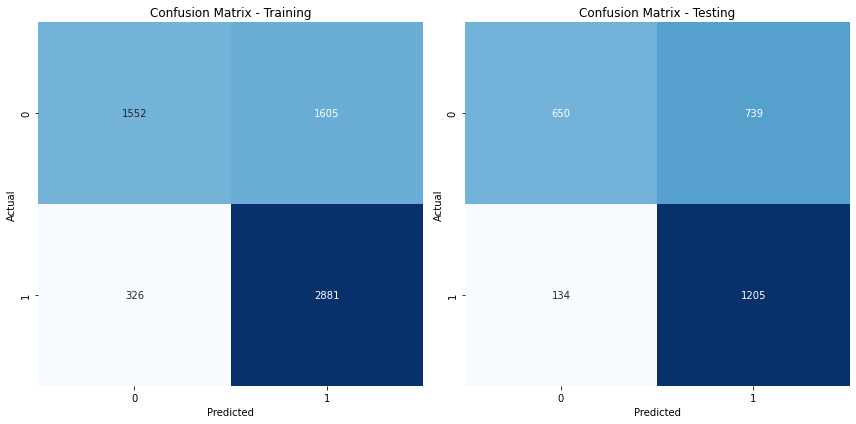

In [51]:
mlp2 = MLPClassifier(activation='relu',hidden_layer_sizes=(10,),max_iter = 50,solver='adam',random_state=42).fit(X_train,y_train)

model_scores_classification(mlp2)
mlp_models.append(mlp2)
mlp_names.append('mlp2 - low iterations')


# no change in scores, we need to try to increase it 

##### 2nd iteration - higher iterations 

In [52]:
param_grid = {'hidden_layer_sizes' : [(50,),(100,),(200,)],
              'activation' : ['identity','logistic','tanh','relu'],
              'solver' : ['adam','sgd'], # we dont use lbfgs as it is a large dataset 
              'max_iter' : [100,200,300]} # more iterations for the model to learn? 

In [53]:
start_time = time.time()

grid = GridSearchCV(estimator=mlp, param_grid=param_grid, scoring='accuracy',verbose = 3,refit=True).fit(X_train,y_train)

end_time = time.time()

elapsed_time = end_time - start_time

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV 1/5] END activation=identity, hidden_layer_sizes=(50,), max_iter=100, solver=adam;, score=0.588 total time=   0.2s
[CV 2/5] END activation=identity, hidden_layer_sizes=(50,), max_iter=100, solver=adam;, score=0.697 total time=   0.3s
[CV 3/5] END activation=identity, hidden_layer_sizes=(50,), max_iter=100, solver=adam;, score=0.667 total time=   0.2s
[CV 4/5] END activation=identity, hidden_layer_sizes=(50,), max_iter=100, solver=adam;, score=0.541 total time=   0.2s
[CV 5/5] END activation=identity, hidden_layer_sizes=(50,), max_iter=100, solver=adam;, score=0.638 total time=   0.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 1/5] END activation=identity, hidden_layer_sizes=(50,), max_iter=100, solver=sgd;, score=0.496 total time=   1.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 2/5] END activation=identity, hidden_layer_sizes=(50,), max_iter=100, solver=sgd;, score=0.496 total time=   1.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 3/5] END activation=identity, hidden_layer_sizes=(50,), max_iter=100, solver=sgd;, score=0.496 total time=   1.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 4/5] END activation=identity, hidden_layer_sizes=(50,), max_iter=100, solver=sgd;, score=0.496 total time=   1.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=identity, hidden_layer_sizes=(50,), max_iter=100, solver=sgd;, score=0.496 total time=   1.2s
[CV 1/5] END activation=identity, hidden_layer_sizes=(50,), max_iter=200, solver=adam;, score=0.588 total time=   0.2s
[CV 2/5] END activation=identity, hidden_layer_sizes=(50,), max_iter=200, solver=adam;, score=0.697 total time=   0.3s
[CV 3/5] END activation=identity, hidden_layer_sizes=(50,), max_iter=200, solver=adam;, score=0.667 total time=   0.2s
[CV 4/5] END activation=identity, hidden_layer_sizes=(50,), max_iter=200, solver=adam;, score=0.541 total time=   0.2s
[CV 5/5] END activation=identity, hidden_layer_sizes=(50,), max_iter=200, solver=adam;, score=0.638 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 1/5] END activation=identity, hidden_layer_sizes=(50,), max_iter=200, solver=sgd;, score=0.496 total time=   2.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 2/5] END activation=identity, hidden_layer_sizes=(50,), max_iter=200, solver=sgd;, score=0.496 total time=   2.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 3/5] END activation=identity, hidden_layer_sizes=(50,), max_iter=200, solver=sgd;, score=0.496 total time=   2.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 4/5] END activation=identity, hidden_layer_sizes=(50,), max_iter=200, solver=sgd;, score=0.496 total time=   2.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=identity, hidden_layer_sizes=(50,), max_iter=200, solver=sgd;, score=0.496 total time=   2.1s
[CV 1/5] END activation=identity, hidden_layer_sizes=(50,), max_iter=300, solver=adam;, score=0.588 total time=   0.2s
[CV 2/5] END activation=identity, hidden_layer_sizes=(50,), max_iter=300, solver=adam;, score=0.697 total time=   0.3s
[CV 3/5] END activation=identity, hidden_layer_sizes=(50,), max_iter=300, solver=adam;, score=0.667 total time=   0.2s
[CV 4/5] END activation=identity, hidden_layer_sizes=(50,), max_iter=300, solver=adam;, score=0.541 total time=   0.2s
[CV 5/5] END activation=identity, hidden_layer_sizes=(50,), max_iter=300, solver=adam;, score=0.638 total time=   0.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 1/5] END activation=identity, hidden_layer_sizes=(50,), max_iter=300, solver=sgd;, score=0.496 total time=   3.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 2/5] END activation=identity, hidden_layer_sizes=(50,), max_iter=300, solver=sgd;, score=0.496 total time=   3.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 3/5] END activation=identity, hidden_layer_sizes=(50,), max_iter=300, solver=sgd;, score=0.496 total time=   3.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 4/5] END activation=identity, hidden_layer_sizes=(50,), max_iter=300, solver=sgd;, score=0.496 total time=   3.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=identity, hidden_layer_sizes=(50,), max_iter=300, solver=sgd;, score=0.496 total time=   3.3s
[CV 1/5] END activation=identity, hidden_layer_sizes=(100,), max_iter=100, solver=adam;, score=0.587 total time=   0.3s
[CV 2/5] END activation=identity, hidden_layer_sizes=(100,), max_iter=100, solver=adam;, score=0.623 total time=   0.2s
[CV 3/5] END activation=identity, hidden_layer_sizes=(100,), max_iter=100, solver=adam;, score=0.716 total time=   0.5s
[CV 4/5] END activation=identity, hidden_layer_sizes=(100,), max_iter=100, solver=adam;, score=0.566 total time=   0.1s
[CV 5/5] END activation=identity, hidden_layer_sizes=(100,), max_iter=100, solver=adam;, score=0.705 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 1/5] END activation=identity, hidden_layer_sizes=(100,), max_iter=100, solver=sgd;, score=0.496 total time=   1.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 2/5] END activation=identity, hidden_layer_sizes=(100,), max_iter=100, solver=sgd;, score=0.496 total time=   1.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 3/5] END activation=identity, hidden_layer_sizes=(100,), max_iter=100, solver=sgd;, score=0.496 total time=   1.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 4/5] END activation=identity, hidden_layer_sizes=(100,), max_iter=100, solver=sgd;, score=0.496 total time=   1.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=identity, hidden_layer_sizes=(100,), max_iter=100, solver=sgd;, score=0.496 total time=   1.2s
[CV 1/5] END activation=identity, hidden_layer_sizes=(100,), max_iter=200, solver=adam;, score=0.587 total time=   0.3s
[CV 2/5] END activation=identity, hidden_layer_sizes=(100,), max_iter=200, solver=adam;, score=0.623 total time=   0.2s
[CV 3/5] END activation=identity, hidden_layer_sizes=(100,), max_iter=200, solver=adam;, score=0.716 total time=   0.5s
[CV 4/5] END activation=identity, hidden_layer_sizes=(100,), max_iter=200, solver=adam;, score=0.566 total time=   0.1s
[CV 5/5] END activation=identity, hidden_layer_sizes=(100,), max_iter=200, solver=adam;, score=0.705 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 1/5] END activation=identity, hidden_layer_sizes=(100,), max_iter=200, solver=sgd;, score=0.496 total time=   2.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 2/5] END activation=identity, hidden_layer_sizes=(100,), max_iter=200, solver=sgd;, score=0.496 total time=   2.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 3/5] END activation=identity, hidden_layer_sizes=(100,), max_iter=200, solver=sgd;, score=0.496 total time=   2.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 4/5] END activation=identity, hidden_layer_sizes=(100,), max_iter=200, solver=sgd;, score=0.496 total time=   2.7s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=identity, hidden_layer_sizes=(100,), max_iter=200, solver=sgd;, score=0.496 total time=   2.7s
[CV 1/5] END activation=identity, hidden_layer_sizes=(100,), max_iter=300, solver=adam;, score=0.587 total time=   0.3s
[CV 2/5] END activation=identity, hidden_layer_sizes=(100,), max_iter=300, solver=adam;, score=0.623 total time=   0.2s
[CV 3/5] END activation=identity, hidden_layer_sizes=(100,), max_iter=300, solver=adam;, score=0.716 total time=   0.5s
[CV 4/5] END activation=identity, hidden_layer_sizes=(100,), max_iter=300, solver=adam;, score=0.566 total time=   0.1s
[CV 5/5] END activation=identity, hidden_layer_sizes=(100,), max_iter=300, solver=adam;, score=0.705 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 1/5] END activation=identity, hidden_layer_sizes=(100,), max_iter=300, solver=sgd;, score=0.496 total time=   4.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 2/5] END activation=identity, hidden_layer_sizes=(100,), max_iter=300, solver=sgd;, score=0.496 total time=   3.7s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 3/5] END activation=identity, hidden_layer_sizes=(100,), max_iter=300, solver=sgd;, score=0.496 total time=   3.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 4/5] END activation=identity, hidden_layer_sizes=(100,), max_iter=300, solver=sgd;, score=0.496 total time=   3.7s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=identity, hidden_layer_sizes=(100,), max_iter=300, solver=sgd;, score=0.496 total time=   3.5s
[CV 1/5] END activation=identity, hidden_layer_sizes=(200,), max_iter=100, solver=adam;, score=0.683 total time=   0.3s
[CV 2/5] END activation=identity, hidden_layer_sizes=(200,), max_iter=100, solver=adam;, score=0.640 total time=   0.4s
[CV 3/5] END activation=identity, hidden_layer_sizes=(200,), max_iter=100, solver=adam;, score=0.518 total time=   0.4s
[CV 4/5] END activation=identity, hidden_layer_sizes=(200,), max_iter=100, solver=adam;, score=0.600 total time=   0.5s
[CV 5/5] END activation=identity, hidden_layer_sizes=(200,), max_iter=100, solver=adam;, score=0.531 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 1/5] END activation=identity, hidden_layer_sizes=(200,), max_iter=100, solver=sgd;, score=0.496 total time=   1.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 2/5] END activation=identity, hidden_layer_sizes=(200,), max_iter=100, solver=sgd;, score=0.496 total time=   1.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 3/5] END activation=identity, hidden_layer_sizes=(200,), max_iter=100, solver=sgd;, score=0.496 total time=   1.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 4/5] END activation=identity, hidden_layer_sizes=(200,), max_iter=100, solver=sgd;, score=0.496 total time=   1.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=identity, hidden_layer_sizes=(200,), max_iter=100, solver=sgd;, score=0.496 total time=   1.4s
[CV 1/5] END activation=identity, hidden_layer_sizes=(200,), max_iter=200, solver=adam;, score=0.683 total time=   0.4s
[CV 2/5] END activation=identity, hidden_layer_sizes=(200,), max_iter=200, solver=adam;, score=0.640 total time=   0.4s
[CV 3/5] END activation=identity, hidden_layer_sizes=(200,), max_iter=200, solver=adam;, score=0.518 total time=   0.5s
[CV 4/5] END activation=identity, hidden_layer_sizes=(200,), max_iter=200, solver=adam;, score=0.600 total time=   0.6s
[CV 5/5] END activation=identity, hidden_layer_sizes=(200,), max_iter=200, solver=adam;, score=0.531 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 1/5] END activation=identity, hidden_layer_sizes=(200,), max_iter=200, solver=sgd;, score=0.496 total time=   3.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 2/5] END activation=identity, hidden_layer_sizes=(200,), max_iter=200, solver=sgd;, score=0.496 total time=   2.9s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 3/5] END activation=identity, hidden_layer_sizes=(200,), max_iter=200, solver=sgd;, score=0.496 total time=   3.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b


[CV 4/5] END activation=identity, hidden_layer_sizes=(200,), max_iter=200, solver=sgd;, score=0.496 total time=   3.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=identity, hidden_layer_sizes=(200,), max_iter=200, solver=sgd;, score=0.496 total time=   3.1s
[CV 1/5] END activation=identity, hidden_layer_sizes=(200,), max_iter=300, solver=adam;, score=0.683 total time=   0.3s
[CV 2/5] END activation=identity, hidden_layer_sizes=(200,), max_iter=300, solver=adam;, score=0.640 total time=   0.4s
[CV 3/5] END activation=identity, hidden_layer_sizes=(200,), max_iter=300, solver=adam;, score=0.518 total time=   0.5s
[CV 4/5] END activation=identity, hidden_layer_sizes=(200,), max_iter=300, solver=adam;, score=0.600 total time=   0.6s
[CV 5/5] END activation=identity, hidden_layer_sizes=(200,), max_iter=300, solver=adam;, score=0.531 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 1/5] END activation=identity, hidden_layer_sizes=(200,), max_iter=300, solver=sgd;, score=0.496 total time=   4.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=identity, hidden_layer_sizes=(200,), max_iter=300, solver=sgd;, score=0.496 total time=   5.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 3/5] END activation=identity, hidden_layer_sizes=(200,), max_iter=300, solver=sgd;, score=0.496 total time=   5.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 4/5] END activation=identity, hidden_layer_sizes=(200,), max_iter=300, solver=sgd;, score=0.496 total time=   4.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=identity, hidden_layer_sizes=(200,), max_iter=300, solver=sgd;, score=0.496 total time=   4.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, hidden_layer_sizes=(50,), max_iter=100, solver=adam;, score=0.744 total time=   1.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, hidden_layer_sizes=(50,), max_iter=100, solver=adam;, score=0.652 total time=   1.5s
[CV 3/5] END activation=logistic, hidden_layer_sizes=(50,), max_iter=100, solver=adam;, score=0.558 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, hidden_layer_sizes=(50,), max_iter=100, solver=adam;, score=0.755 total time=   1.4s
[CV 5/5] END activation=logistic, hidden_layer_sizes=(50,), max_iter=100, solver=adam;, score=0.619 total time=   1.1s
[CV 1/5] END activation=logistic, hidden_layer_sizes=(50,), max_iter=100, solver=sgd;, score=0.504 total time=   0.1s
[CV 2/5] END activation=logistic, hidden_layer_sizes=(50,), max_iter=100, solver=sgd;, score=0.504 total time=   0.1s
[CV 3/5] END activation=logistic, hidden_layer_sizes=(50,), max_iter=100, solver=sgd;, score=0.504 total time=   0.1s
[CV 4/5] END activation=logistic, hidden_layer_sizes=(50,), max_iter=100, solver=sgd;, score=0.495 total time=   0.2s
[CV 5/5] END activation=logistic, hidden_layer_sizes=(50,), max_iter=100, solver=sgd;, score=0.504 total time=   0.1s
[CV 1/5] END activation=logistic, hidden_layer_sizes=(50,), max_iter=200, solver=adam;, score=0.719 total time=   1.8s
[CV 2/5] END activation=logistic, hidden_layer_sizes=

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, hidden_layer_sizes=(100,), max_iter=100, solver=adam;, score=0.692 total time=   2.2s
[CV 2/5] END activation=logistic, hidden_layer_sizes=(100,), max_iter=100, solver=adam;, score=0.572 total time=   0.8s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, hidden_layer_sizes=(100,), max_iter=100, solver=adam;, score=0.736 total time=   2.2s
[CV 4/5] END activation=logistic, hidden_layer_sizes=(100,), max_iter=100, solver=adam;, score=0.525 total time=   0.6s
[CV 5/5] END activation=logistic, hidden_layer_sizes=(100,), max_iter=100, solver=adam;, score=0.731 total time=   2.1s
[CV 1/5] END activation=logistic, hidden_layer_sizes=(100,), max_iter=100, solver=sgd;, score=0.496 total time=   0.3s
[CV 2/5] END activation=logistic, hidden_layer_sizes=(100,), max_iter=100, solver=sgd;, score=0.504 total time=   0.4s
[CV 3/5] END activation=logistic, hidden_layer_sizes=(100,), max_iter=100, solver=sgd;, score=0.504 total time=   0.5s
[CV 4/5] END activation=logistic, hidden_layer_sizes=(100,), max_iter=100, solver=sgd;, score=0.504 total time=   0.4s
[CV 5/5] END activation=logistic, hidden_layer_sizes=(100,), max_iter=100, solver=sgd;, score=0.504 total time=   0.5s
[CV 1/5] END activation=logistic, hidden_laye

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, hidden_layer_sizes=(200,), max_iter=100, solver=adam;, score=0.681 total time=   3.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, hidden_layer_sizes=(200,), max_iter=100, solver=adam;, score=0.694 total time=   3.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, hidden_layer_sizes=(200,), max_iter=100, solver=adam;, score=0.744 total time=   3.4s
[CV 4/5] END activation=logistic, hidden_layer_sizes=(200,), max_iter=100, solver=adam;, score=0.570 total time=   1.2s
[CV 5/5] END activation=logistic, hidden_layer_sizes=(200,), max_iter=100, solver=adam;, score=0.711 total time=   2.4s
[CV 1/5] END activation=logistic, hidden_layer_sizes=(200,), max_iter=100, solver=sgd;, score=0.496 total time=   0.4s
[CV 2/5] END activation=logistic, hidden_layer_sizes=(200,), max_iter=100, solver=sgd;, score=0.496 total time=   0.5s
[CV 3/5] END activation=logistic, hidden_layer_sizes=(200,), max_iter=100, solver=sgd;, score=0.495 total time=   0.5s
[CV 4/5] END activation=logistic, hidden_layer_sizes=(200,), max_iter=100, solver=sgd;, score=0.504 total time=   0.4s
[CV 5/5] END activation=logistic, hidden_layer_sizes=(200,), max_iter=100, solver=sgd;, score=0.504 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, hidden_layer_sizes=(200,), max_iter=200, solver=adam;, score=0.753 total time=   6.2s
[CV 2/5] END activation=logistic, hidden_layer_sizes=(200,), max_iter=200, solver=adam;, score=0.716 total time=   6.0s
[CV 3/5] END activation=logistic, hidden_layer_sizes=(200,), max_iter=200, solver=adam;, score=0.747 total time=   4.0s
[CV 4/5] END activation=logistic, hidden_layer_sizes=(200,), max_iter=200, solver=adam;, score=0.570 total time=   1.2s
[CV 5/5] END activation=logistic, hidden_layer_sizes=(200,), max_iter=200, solver=adam;, score=0.711 total time=   2.5s
[CV 1/5] END activation=logistic, hidden_layer_sizes=(200,), max_iter=200, solver=sgd;, score=0.496 total time=   0.4s
[CV 2/5] END activation=logistic, hidden_layer_sizes=(200,), max_iter=200, solver=sgd;, score=0.496 total time=   0.5s
[CV 3/5] END activation=logistic, hidden_layer_sizes=(200,), max_iter=200, solver=sgd;, score=0.495 total time=   0.4s
[CV 4/5] END activation=logistic, hidden_la

[CV 2/5] END activation=tanh, hidden_layer_sizes=(100,), max_iter=300, solver=adam;, score=0.513 total time=   0.4s
[CV 3/5] END activation=tanh, hidden_layer_sizes=(100,), max_iter=300, solver=adam;, score=0.531 total time=   0.3s
[CV 4/5] END activation=tanh, hidden_layer_sizes=(100,), max_iter=300, solver=adam;, score=0.522 total time=   0.2s
[CV 5/5] END activation=tanh, hidden_layer_sizes=(100,), max_iter=300, solver=adam;, score=0.564 total time=   0.4s
[CV 1/5] END activation=tanh, hidden_layer_sizes=(100,), max_iter=300, solver=sgd;, score=0.504 total time=   0.1s
[CV 2/5] END activation=tanh, hidden_layer_sizes=(100,), max_iter=300, solver=sgd;, score=0.504 total time=   0.4s
[CV 3/5] END activation=tanh, hidden_layer_sizes=(100,), max_iter=300, solver=sgd;, score=0.506 total time=   0.3s
[CV 4/5] END activation=tanh, hidden_layer_sizes=(100,), max_iter=300, solver=sgd;, score=0.505 total time=   0.3s
[CV 5/5] END activation=tanh, hidden_layer_sizes=(100,), max_iter=300, solve

[CV 4/5] END activation=relu, hidden_layer_sizes=(100,), max_iter=100, solver=adam;, score=0.675 total time=   0.8s
[CV 5/5] END activation=relu, hidden_layer_sizes=(100,), max_iter=100, solver=adam;, score=0.641 total time=   0.5s
[CV 1/5] END activation=relu, hidden_layer_sizes=(100,), max_iter=100, solver=sgd;, score=0.504 total time=   0.2s
[CV 2/5] END activation=relu, hidden_layer_sizes=(100,), max_iter=100, solver=sgd;, score=0.504 total time=   0.2s
[CV 3/5] END activation=relu, hidden_layer_sizes=(100,), max_iter=100, solver=sgd;, score=0.504 total time=   0.3s
[CV 4/5] END activation=relu, hidden_layer_sizes=(100,), max_iter=100, solver=sgd;, score=0.504 total time=   0.3s
[CV 5/5] END activation=relu, hidden_layer_sizes=(100,), max_iter=100, solver=sgd;, score=0.504 total time=   0.3s
[CV 1/5] END activation=relu, hidden_layer_sizes=(100,), max_iter=200, solver=adam;, score=0.622 total time=   0.6s
[CV 2/5] END activation=relu, hidden_layer_sizes=(100,), max_iter=200, solver

In [54]:
print(grid.best_score_)
print(grid.best_params_)

minutes, seconds = divmod(elapsed_time, 60)
formatted_time = "{:02}:{:02}".format(int(minutes), int(seconds))
print("Elapsed Time: {}".format(formatted_time))

0.6992475556675413
{'activation': 'logistic', 'hidden_layer_sizes': (200,), 'max_iter': 200, 'solver': 'adam'}
Elapsed Time: 05:53


Model: MLPClassifier(activation='logistic', hidden_layer_sizes=(200,), random_state=42)

Training score: 0.7553425518541798
Testing score: 0.7459677419354839

Training report:
              precision    recall  f1-score   support

           0       0.79      0.70      0.74      3157
           1       0.73      0.81      0.77      3207

    accuracy                           0.76      6364
   macro avg       0.76      0.75      0.75      6364
weighted avg       0.76      0.76      0.75      6364


Testing report:
              precision    recall  f1-score   support

           0       0.79      0.68      0.73      1389
           1       0.71      0.81      0.76      1339

    accuracy                           0.75      2728
   macro avg       0.75      0.75      0.75      2728
weighted avg       0.75      0.75      0.75      2728


Confusion Matrix:


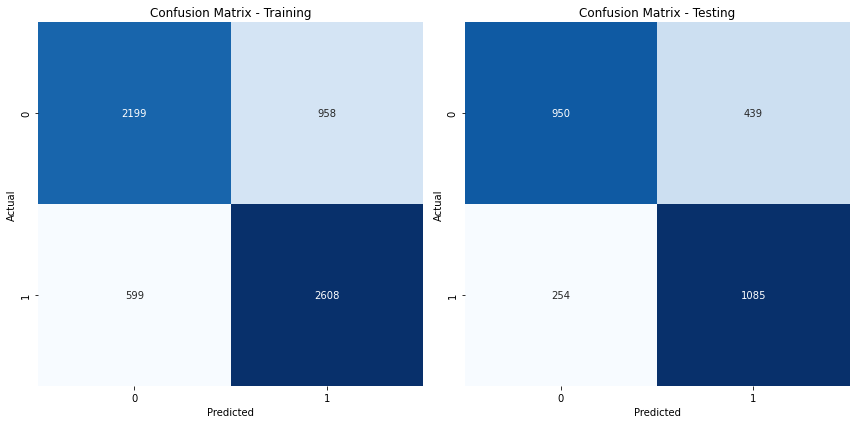

In [55]:
mlp3 = MLPClassifier(activation='logistic',hidden_layer_sizes=(200,),max_iter = 200
                     ,solver='adam',random_state=42).fit(X_train,y_train)

model_scores_classification(mlp3)
mlp_models.append(mlp3)
mlp_names.append('mlp3 - higher iterations')

# scores increase with close f1 scores

##### 3rd iteration - trying higher layers and higher iterations 
- for the model to learn better 

In [56]:
param_grid = {'hidden_layer_sizes' : [(100,),(200,),(300,),(400,)],
              'activation' : ['identity','logistic','tanh','relu'],
              'solver' : ['adam','sgd'], # we dont use lbfgs as it is a large dataset 
              'max_iter' : [500,700,1000]}

In [57]:
start_time = time.time()

grid = GridSearchCV(estimator=mlp, param_grid=param_grid, scoring='accuracy',verbose = 3,refit=True).fit(X_train,y_train)

end_time = time.time()

elapsed_time = end_time - start_time

Fitting 5 folds for each of 96 candidates, totalling 480 fits
[CV 1/5] END activation=identity, hidden_layer_sizes=(100,), max_iter=500, solver=adam;, score=0.587 total time=   0.4s
[CV 2/5] END activation=identity, hidden_layer_sizes=(100,), max_iter=500, solver=adam;, score=0.623 total time=   0.2s
[CV 3/5] END activation=identity, hidden_layer_sizes=(100,), max_iter=500, solver=adam;, score=0.716 total time=   0.5s
[CV 4/5] END activation=identity, hidden_layer_sizes=(100,), max_iter=500, solver=adam;, score=0.566 total time=   0.1s
[CV 5/5] END activation=identity, hidden_layer_sizes=(100,), max_iter=500, solver=adam;, score=0.705 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b


[CV 1/5] END activation=identity, hidden_layer_sizes=(100,), max_iter=500, solver=sgd;, score=0.496 total time=   6.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 2/5] END activation=identity, hidden_layer_sizes=(100,), max_iter=500, solver=sgd;, score=0.496 total time=   6.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 3/5] END activation=identity, hidden_layer_sizes=(100,), max_iter=500, solver=sgd;, score=0.496 total time=   5.9s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 4/5] END activation=identity, hidden_layer_sizes=(100,), max_iter=500, solver=sgd;, score=0.496 total time=   5.9s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=identity, hidden_layer_sizes=(100,), max_iter=500, solver=sgd;, score=0.496 total time=   5.9s
[CV 1/5] END activation=identity, hidden_layer_sizes=(100,), max_iter=700, solver=adam;, score=0.587 total time=   0.2s
[CV 2/5] END activation=identity, hidden_layer_sizes=(100,), max_iter=700, solver=adam;, score=0.623 total time=   0.2s
[CV 3/5] END activation=identity, hidden_layer_sizes=(100,), max_iter=700, solver=adam;, score=0.716 total time=   0.4s
[CV 4/5] END activation=identity, hidden_layer_sizes=(100,), max_iter=700, solver=adam;, score=0.566 total time=   0.1s
[CV 5/5] END activation=identity, hidden_layer_sizes=(100,), max_iter=700, solver=adam;, score=0.705 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (700) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 1/5] END activation=identity, hidden_layer_sizes=(100,), max_iter=700, solver=sgd;, score=0.496 total time=   8.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (700) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 2/5] END activation=identity, hidden_layer_sizes=(100,), max_iter=700, solver=sgd;, score=0.496 total time=   8.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (700) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 3/5] END activation=identity, hidden_layer_sizes=(100,), max_iter=700, solver=sgd;, score=0.496 total time=   8.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (700) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 4/5] END activation=identity, hidden_layer_sizes=(100,), max_iter=700, solver=sgd;, score=0.496 total time=   8.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (700) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=identity, hidden_layer_sizes=(100,), max_iter=700, solver=sgd;, score=0.496 total time=   8.5s
[CV 1/5] END activation=identity, hidden_layer_sizes=(100,), max_iter=1000, solver=adam;, score=0.587 total time=   0.3s
[CV 2/5] END activation=identity, hidden_layer_sizes=(100,), max_iter=1000, solver=adam;, score=0.623 total time=   0.2s
[CV 3/5] END activation=identity, hidden_layer_sizes=(100,), max_iter=1000, solver=adam;, score=0.716 total time=   0.4s
[CV 4/5] END activation=identity, hidden_layer_sizes=(100,), max_iter=1000, solver=adam;, score=0.566 total time=   0.1s
[CV 5/5] END activation=identity, hidden_layer_sizes=(100,), max_iter=1000, solver=adam;, score=0.705 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 1/5] END activation=identity, hidden_layer_sizes=(100,), max_iter=1000, solver=sgd;, score=0.496 total time=  11.8s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 2/5] END activation=identity, hidden_layer_sizes=(100,), max_iter=1000, solver=sgd;, score=0.496 total time=  12.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 3/5] END activation=identity, hidden_layer_sizes=(100,), max_iter=1000, solver=sgd;, score=0.496 total time=  12.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 4/5] END activation=identity, hidden_layer_sizes=(100,), max_iter=1000, solver=sgd;, score=0.496 total time=  12.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=identity, hidden_layer_sizes=(100,), max_iter=1000, solver=sgd;, score=0.496 total time=  12.5s
[CV 1/5] END activation=identity, hidden_layer_sizes=(200,), max_iter=500, solver=adam;, score=0.683 total time=   0.3s
[CV 2/5] END activation=identity, hidden_layer_sizes=(200,), max_iter=500, solver=adam;, score=0.640 total time=   0.4s
[CV 3/5] END activation=identity, hidden_layer_sizes=(200,), max_iter=500, solver=adam;, score=0.518 total time=   0.4s
[CV 4/5] END activation=identity, hidden_layer_sizes=(200,), max_iter=500, solver=adam;, score=0.600 total time=   0.6s
[CV 5/5] END activation=identity, hidden_layer_sizes=(200,), max_iter=500, solver=adam;, score=0.531 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 1/5] END activation=identity, hidden_layer_sizes=(200,), max_iter=500, solver=sgd;, score=0.496 total time=   7.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 2/5] END activation=identity, hidden_layer_sizes=(200,), max_iter=500, solver=sgd;, score=0.496 total time=   7.8s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 3/5] END activation=identity, hidden_layer_sizes=(200,), max_iter=500, solver=sgd;, score=0.496 total time=   7.7s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 4/5] END activation=identity, hidden_layer_sizes=(200,), max_iter=500, solver=sgd;, score=0.496 total time=   7.9s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=identity, hidden_layer_sizes=(200,), max_iter=500, solver=sgd;, score=0.496 total time=   7.8s
[CV 1/5] END activation=identity, hidden_layer_sizes=(200,), max_iter=700, solver=adam;, score=0.683 total time=   0.4s
[CV 2/5] END activation=identity, hidden_layer_sizes=(200,), max_iter=700, solver=adam;, score=0.640 total time=   0.4s
[CV 3/5] END activation=identity, hidden_layer_sizes=(200,), max_iter=700, solver=adam;, score=0.518 total time=   0.4s
[CV 4/5] END activation=identity, hidden_layer_sizes=(200,), max_iter=700, solver=adam;, score=0.600 total time=   0.6s
[CV 5/5] END activation=identity, hidden_layer_sizes=(200,), max_iter=700, solver=adam;, score=0.531 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (700) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 1/5] END activation=identity, hidden_layer_sizes=(200,), max_iter=700, solver=sgd;, score=0.496 total time=  10.9s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (700) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 2/5] END activation=identity, hidden_layer_sizes=(200,), max_iter=700, solver=sgd;, score=0.496 total time=  10.9s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (700) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b


[CV 3/5] END activation=identity, hidden_layer_sizes=(200,), max_iter=700, solver=sgd;, score=0.496 total time=  10.8s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (700) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 4/5] END activation=identity, hidden_layer_sizes=(200,), max_iter=700, solver=sgd;, score=0.496 total time=  10.8s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (700) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=identity, hidden_layer_sizes=(200,), max_iter=700, solver=sgd;, score=0.496 total time=  11.0s
[CV 1/5] END activation=identity, hidden_layer_sizes=(200,), max_iter=1000, solver=adam;, score=0.683 total time=   0.4s
[CV 2/5] END activation=identity, hidden_layer_sizes=(200,), max_iter=1000, solver=adam;, score=0.640 total time=   0.4s
[CV 3/5] END activation=identity, hidden_layer_sizes=(200,), max_iter=1000, solver=adam;, score=0.518 total time=   0.5s
[CV 4/5] END activation=identity, hidden_layer_sizes=(200,), max_iter=1000, solver=adam;, score=0.600 total time=   0.6s
[CV 5/5] END activation=identity, hidden_layer_sizes=(200,), max_iter=1000, solver=adam;, score=0.531 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 1/5] END activation=identity, hidden_layer_sizes=(200,), max_iter=1000, solver=sgd;, score=0.496 total time=  15.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b


[CV 2/5] END activation=identity, hidden_layer_sizes=(200,), max_iter=1000, solver=sgd;, score=0.496 total time=  15.9s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 3/5] END activation=identity, hidden_layer_sizes=(200,), max_iter=1000, solver=sgd;, score=0.496 total time=  16.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 4/5] END activation=identity, hidden_layer_sizes=(200,), max_iter=1000, solver=sgd;, score=0.496 total time=  15.8s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=identity, hidden_layer_sizes=(200,), max_iter=1000, solver=sgd;, score=0.496 total time=  15.7s
[CV 1/5] END activation=identity, hidden_layer_sizes=(300,), max_iter=500, solver=adam;, score=0.709 total time=   0.6s
[CV 2/5] END activation=identity, hidden_layer_sizes=(300,), max_iter=500, solver=adam;, score=0.632 total time=   0.2s
[CV 3/5] END activation=identity, hidden_layer_sizes=(300,), max_iter=500, solver=adam;, score=0.522 total time=   0.6s
[CV 4/5] END activation=identity, hidden_layer_sizes=(300,), max_iter=500, solver=adam;, score=0.570 total time=   0.3s
[CV 5/5] END activation=identity, hidden_layer_sizes=(300,), max_iter=500, solver=adam;, score=0.535 total time=   0.7s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b


[CV 1/5] END activation=identity, hidden_layer_sizes=(300,), max_iter=500, solver=sgd;, score=0.496 total time=   9.8s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b


[CV 2/5] END activation=identity, hidden_layer_sizes=(300,), max_iter=500, solver=sgd;, score=0.496 total time=   9.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=identity, hidden_layer_sizes=(300,), max_iter=500, solver=sgd;, score=0.496 total time=   9.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b


[CV 4/5] END activation=identity, hidden_layer_sizes=(300,), max_iter=500, solver=sgd;, score=0.496 total time=   9.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=identity, hidden_layer_sizes=(300,), max_iter=500, solver=sgd;, score=0.496 total time=  10.1s
[CV 1/5] END activation=identity, hidden_layer_sizes=(300,), max_iter=700, solver=adam;, score=0.709 total time=   0.6s
[CV 2/5] END activation=identity, hidden_layer_sizes=(300,), max_iter=700, solver=adam;, score=0.632 total time=   0.2s
[CV 3/5] END activation=identity, hidden_layer_sizes=(300,), max_iter=700, solver=adam;, score=0.522 total time=   0.7s
[CV 4/5] END activation=identity, hidden_layer_sizes=(300,), max_iter=700, solver=adam;, score=0.570 total time=   0.3s
[CV 5/5] END activation=identity, hidden_layer_sizes=(300,), max_iter=700, solver=adam;, score=0.535 total time=   0.8s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (700) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b


[CV 1/5] END activation=identity, hidden_layer_sizes=(300,), max_iter=700, solver=sgd;, score=0.496 total time=  13.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (700) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=identity, hidden_layer_sizes=(300,), max_iter=700, solver=sgd;, score=0.496 total time=  12.9s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (700) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b


[CV 3/5] END activation=identity, hidden_layer_sizes=(300,), max_iter=700, solver=sgd;, score=0.496 total time=  13.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (700) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b


[CV 4/5] END activation=identity, hidden_layer_sizes=(300,), max_iter=700, solver=sgd;, score=0.496 total time=  13.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (700) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=identity, hidden_layer_sizes=(300,), max_iter=700, solver=sgd;, score=0.496 total time=  13.4s
[CV 1/5] END activation=identity, hidden_layer_sizes=(300,), max_iter=1000, solver=adam;, score=0.709 total time=   0.6s
[CV 2/5] END activation=identity, hidden_layer_sizes=(300,), max_iter=1000, solver=adam;, score=0.632 total time=   0.2s
[CV 3/5] END activation=identity, hidden_layer_sizes=(300,), max_iter=1000, solver=adam;, score=0.522 total time=   0.6s
[CV 4/5] END activation=identity, hidden_layer_sizes=(300,), max_iter=1000, solver=adam;, score=0.570 total time=   0.3s
[CV 5/5] END activation=identity, hidden_layer_sizes=(300,), max_iter=1000, solver=adam;, score=0.535 total time=   0.7s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b


[CV 1/5] END activation=identity, hidden_layer_sizes=(300,), max_iter=1000, solver=sgd;, score=0.496 total time=  19.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=identity, hidden_layer_sizes=(300,), max_iter=1000, solver=sgd;, score=0.496 total time=  19.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b


[CV 3/5] END activation=identity, hidden_layer_sizes=(300,), max_iter=1000, solver=sgd;, score=0.496 total time=  19.8s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=identity, hidden_layer_sizes=(300,), max_iter=1000, solver=sgd;, score=0.496 total time=  19.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=identity, hidden_layer_sizes=(300,), max_iter=1000, solver=sgd;, score=0.496 total time=  19.0s
[CV 1/5] END activation=identity, hidden_layer_sizes=(400,), max_iter=500, solver=adam;, score=0.543 total time=   0.6s
[CV 2/5] END activation=identity, hidden_layer_sizes=(400,), max_iter=500, solver=adam;, score=0.668 total time=   0.6s
[CV 3/5] END activation=identity, hidden_layer_sizes=(400,), max_iter=500, solver=adam;, score=0.586 total time=   0.5s
[CV 4/5] END activation=identity, hidden_layer_sizes=(400,), max_iter=500, solver=adam;, score=0.668 total time=   0.5s
[CV 5/5] END activation=identity, hidden_layer_sizes=(400,), max_iter=500, solver=adam;, score=0.561 total time=   0.8s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b


[CV 1/5] END activation=identity, hidden_layer_sizes=(400,), max_iter=500, solver=sgd;, score=0.496 total time=  11.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b


[CV 2/5] END activation=identity, hidden_layer_sizes=(400,), max_iter=500, solver=sgd;, score=0.496 total time=  10.9s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b


[CV 3/5] END activation=identity, hidden_layer_sizes=(400,), max_iter=500, solver=sgd;, score=0.496 total time=  11.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b


[CV 4/5] END activation=identity, hidden_layer_sizes=(400,), max_iter=500, solver=sgd;, score=0.496 total time=  11.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=identity, hidden_layer_sizes=(400,), max_iter=500, solver=sgd;, score=0.496 total time=  10.9s
[CV 1/5] END activation=identity, hidden_layer_sizes=(400,), max_iter=700, solver=adam;, score=0.543 total time=   0.5s
[CV 2/5] END activation=identity, hidden_layer_sizes=(400,), max_iter=700, solver=adam;, score=0.668 total time=   0.6s
[CV 3/5] END activation=identity, hidden_layer_sizes=(400,), max_iter=700, solver=adam;, score=0.586 total time=   0.6s
[CV 4/5] END activation=identity, hidden_layer_sizes=(400,), max_iter=700, solver=adam;, score=0.668 total time=   0.5s
[CV 5/5] END activation=identity, hidden_layer_sizes=(400,), max_iter=700, solver=adam;, score=0.561 total time=   1.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (700) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=identity, hidden_layer_sizes=(400,), max_iter=700, solver=sgd;, score=0.496 total time=  16.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (700) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b


[CV 2/5] END activation=identity, hidden_layer_sizes=(400,), max_iter=700, solver=sgd;, score=0.496 total time=  15.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (700) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b


[CV 3/5] END activation=identity, hidden_layer_sizes=(400,), max_iter=700, solver=sgd;, score=0.496 total time=  15.8s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (700) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=identity, hidden_layer_sizes=(400,), max_iter=700, solver=sgd;, score=0.496 total time=  15.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (700) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=identity, hidden_layer_sizes=(400,), max_iter=700, solver=sgd;, score=0.496 total time=  16.1s
[CV 1/5] END activation=identity, hidden_layer_sizes=(400,), max_iter=1000, solver=adam;, score=0.543 total time=   0.6s
[CV 2/5] END activation=identity, hidden_layer_sizes=(400,), max_iter=1000, solver=adam;, score=0.668 total time=   0.6s
[CV 3/5] END activation=identity, hidden_layer_sizes=(400,), max_iter=1000, solver=adam;, score=0.586 total time=   0.5s
[CV 4/5] END activation=identity, hidden_layer_sizes=(400,), max_iter=1000, solver=adam;, score=0.668 total time=   0.6s
[CV 5/5] END activation=identity, hidden_layer_sizes=(400,), max_iter=1000, solver=adam;, score=0.561 total time=   0.9s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=identity, hidden_layer_sizes=(400,), max_iter=1000, solver=sgd;, score=0.496 total time=  22.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=identity, hidden_layer_sizes=(400,), max_iter=1000, solver=sgd;, score=0.496 total time=  23.8s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=identity, hidden_layer_sizes=(400,), max_iter=1000, solver=sgd;, score=0.496 total time=  23.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=identity, hidden_layer_sizes=(400,), max_iter=1000, solver=sgd;, score=0.496 total time=  23.7s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=identity, hidden_layer_sizes=(400,), max_iter=1000, solver=sgd;, score=0.496 total time=  23.1s
[CV 1/5] END activation=logistic, hidden_layer_sizes=(100,), max_iter=500, solver=adam;, score=0.756 total time=   3.8s
[CV 2/5] END activation=logistic, hidden_layer_sizes=(100,), max_iter=500, solver=adam;, score=0.572 total time=   0.9s
[CV 3/5] END activation=logistic, hidden_layer_sizes=(100,), max_iter=500, solver=adam;, score=0.751 total time=   3.9s
[CV 4/5] END activation=logistic, hidden_layer_sizes=(100,), max_iter=500, solver=adam;, score=0.525 total time=   0.6s
[CV 5/5] END activation=logistic, hidden_layer_sizes=(100,), max_iter=500, solver=adam;, score=0.731 total time=   2.0s
[CV 1/5] END activation=logistic, hidden_layer_sizes=(100,), max_iter=500, solver=sgd;, score=0.496 total time=   0.3s
[CV 2/5] END activation=logistic, hidden_layer_sizes=(100,), max_iter=500, solver=sgd;, score=0.504 total time=   0.4s
[CV 3/5] END activation=logistic, hidden_l

[CV 4/5] END activation=logistic, hidden_layer_sizes=(300,), max_iter=500, solver=sgd;, score=0.504 total time=   0.9s
[CV 5/5] END activation=logistic, hidden_layer_sizes=(300,), max_iter=500, solver=sgd;, score=0.494 total time=   0.7s
[CV 1/5] END activation=logistic, hidden_layer_sizes=(300,), max_iter=700, solver=adam;, score=0.753 total time=   6.6s
[CV 2/5] END activation=logistic, hidden_layer_sizes=(300,), max_iter=700, solver=adam;, score=0.654 total time=   5.7s
[CV 3/5] END activation=logistic, hidden_layer_sizes=(300,), max_iter=700, solver=adam;, score=0.751 total time=   4.8s
[CV 4/5] END activation=logistic, hidden_layer_sizes=(300,), max_iter=700, solver=adam;, score=0.764 total time=   7.5s
[CV 5/5] END activation=logistic, hidden_layer_sizes=(300,), max_iter=700, solver=adam;, score=0.782 total time=   8.5s
[CV 1/5] END activation=logistic, hidden_layer_sizes=(300,), max_iter=700, solver=sgd;, score=0.529 total time=   0.6s
[CV 2/5] END activation=logistic, hidden_la

[CV 3/5] END activation=tanh, hidden_layer_sizes=(100,), max_iter=700, solver=sgd;, score=0.506 total time=   0.3s
[CV 4/5] END activation=tanh, hidden_layer_sizes=(100,), max_iter=700, solver=sgd;, score=0.505 total time=   0.3s
[CV 5/5] END activation=tanh, hidden_layer_sizes=(100,), max_iter=700, solver=sgd;, score=0.505 total time=   0.4s
[CV 1/5] END activation=tanh, hidden_layer_sizes=(100,), max_iter=1000, solver=adam;, score=0.496 total time=   0.2s
[CV 2/5] END activation=tanh, hidden_layer_sizes=(100,), max_iter=1000, solver=adam;, score=0.513 total time=   0.3s
[CV 3/5] END activation=tanh, hidden_layer_sizes=(100,), max_iter=1000, solver=adam;, score=0.531 total time=   0.2s
[CV 4/5] END activation=tanh, hidden_layer_sizes=(100,), max_iter=1000, solver=adam;, score=0.522 total time=   0.2s
[CV 5/5] END activation=tanh, hidden_layer_sizes=(100,), max_iter=1000, solver=adam;, score=0.564 total time=   0.4s
[CV 1/5] END activation=tanh, hidden_layer_sizes=(100,), max_iter=1000

[CV 4/5] END activation=tanh, hidden_layer_sizes=(300,), max_iter=1000, solver=sgd;, score=0.504 total time=   0.8s
[CV 5/5] END activation=tanh, hidden_layer_sizes=(300,), max_iter=1000, solver=sgd;, score=0.494 total time=   0.6s
[CV 1/5] END activation=tanh, hidden_layer_sizes=(400,), max_iter=500, solver=adam;, score=0.496 total time=   1.3s
[CV 2/5] END activation=tanh, hidden_layer_sizes=(400,), max_iter=500, solver=adam;, score=0.518 total time=   0.9s
[CV 3/5] END activation=tanh, hidden_layer_sizes=(400,), max_iter=500, solver=adam;, score=0.518 total time=   1.1s
[CV 4/5] END activation=tanh, hidden_layer_sizes=(400,), max_iter=500, solver=adam;, score=0.545 total time=   0.8s
[CV 5/5] END activation=tanh, hidden_layer_sizes=(400,), max_iter=500, solver=adam;, score=0.556 total time=   0.7s
[CV 1/5] END activation=tanh, hidden_layer_sizes=(400,), max_iter=500, solver=sgd;, score=0.518 total time=   0.6s
[CV 2/5] END activation=tanh, hidden_layer_sizes=(400,), max_iter=500, so

[CV 5/5] END activation=relu, hidden_layer_sizes=(200,), max_iter=500, solver=sgd;, score=0.495 total time=   0.2s
[CV 1/5] END activation=relu, hidden_layer_sizes=(200,), max_iter=700, solver=adam;, score=0.671 total time=   0.3s
[CV 2/5] END activation=relu, hidden_layer_sizes=(200,), max_iter=700, solver=adam;, score=0.560 total time=   0.5s
[CV 3/5] END activation=relu, hidden_layer_sizes=(200,), max_iter=700, solver=adam;, score=0.516 total time=   0.3s
[CV 4/5] END activation=relu, hidden_layer_sizes=(200,), max_iter=700, solver=adam;, score=0.511 total time=   0.8s
[CV 5/5] END activation=relu, hidden_layer_sizes=(200,), max_iter=700, solver=adam;, score=0.515 total time=   0.5s
[CV 1/5] END activation=relu, hidden_layer_sizes=(200,), max_iter=700, solver=sgd;, score=0.496 total time=   0.2s
[CV 2/5] END activation=relu, hidden_layer_sizes=(200,), max_iter=700, solver=sgd;, score=0.496 total time=   0.3s
[CV 3/5] END activation=relu, hidden_layer_sizes=(200,), max_iter=700, solv

[CV 1/5] END activation=relu, hidden_layer_sizes=(400,), max_iter=1000, solver=adam;, score=0.654 total time=   0.5s
[CV 2/5] END activation=relu, hidden_layer_sizes=(400,), max_iter=1000, solver=adam;, score=0.609 total time=   1.2s
[CV 3/5] END activation=relu, hidden_layer_sizes=(400,), max_iter=1000, solver=adam;, score=0.584 total time=   1.3s
[CV 4/5] END activation=relu, hidden_layer_sizes=(400,), max_iter=1000, solver=adam;, score=0.719 total time=   1.8s
[CV 5/5] END activation=relu, hidden_layer_sizes=(400,), max_iter=1000, solver=adam;, score=0.531 total time=   1.2s
[CV 1/5] END activation=relu, hidden_layer_sizes=(400,), max_iter=1000, solver=sgd;, score=0.496 total time=   0.4s
[CV 2/5] END activation=relu, hidden_layer_sizes=(400,), max_iter=1000, solver=sgd;, score=0.496 total time=   0.4s
[CV 3/5] END activation=relu, hidden_layer_sizes=(400,), max_iter=1000, solver=sgd;, score=0.495 total time=   0.4s
[CV 4/5] END activation=relu, hidden_layer_sizes=(400,), max_iter=1

In [58]:
print(grid.best_score_)
print(grid.best_params_)

minutes, seconds = divmod(elapsed_time, 60)
formatted_time = "{:02}:{:02}".format(int(minutes), int(seconds))
print("Elapsed Time: {}".format(formatted_time))

0.7407356217917365
{'activation': 'logistic', 'hidden_layer_sizes': (300,), 'max_iter': 500, 'solver': 'adam'}
Elapsed Time: 21:59


Model: MLPClassifier(activation='logistic', hidden_layer_sizes=(300,), max_iter=500,
              random_state=42)

Training score: 0.7515713387806411
Testing score: 0.7393695014662757

Training report:
              precision    recall  f1-score   support

           0       0.77      0.71      0.74      3157
           1       0.74      0.79      0.76      3207

    accuracy                           0.75      6364
   macro avg       0.75      0.75      0.75      6364
weighted avg       0.75      0.75      0.75      6364


Testing report:
              precision    recall  f1-score   support

           0       0.77      0.70      0.73      1389
           1       0.71      0.78      0.75      1339

    accuracy                           0.74      2728
   macro avg       0.74      0.74      0.74      2728
weighted avg       0.74      0.74      0.74      2728


Confusion Matrix:


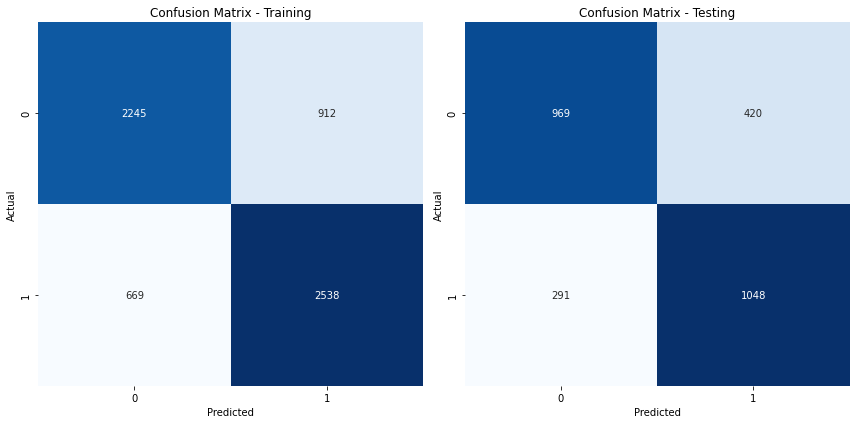

In [59]:
mlp4 = MLPClassifier(activation='logistic',hidden_layer_sizes=(300,),max_iter = 500
                     ,solver='adam',random_state=42).fit(X_train,y_train)

model_scores_classification(mlp4)
mlp_models.append(mlp4)
mlp_names.append('mlp4 - higher iterations,layers')

# train score remained the same 
# test score decreased
# how to improve test score?  

### 1.3.2.3 Optimized Models

In [60]:
scores_table = []
for model, name in zip(mlp_models, mlp_names):
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    scores_table.append([name, train_score, test_score])

df_scores_mlp = pd.DataFrame(scores_table, columns=["Model", "Train Score", "Test Score"])

df_scores_mlp

Model  Train Score  Test Score
0                             base     0.663891    0.668622
1            mlp2 - low iterations     0.696574    0.679985
2         mlp3 - higher iterations     0.755343    0.745968
3  mlp4 - higher iterations,layers     0.751571    0.739370

### 1.3.3 Model 3 (ADA)

### 1.3.3.1 Hyperparameter Inspection 
##### hyperparams to be tweaked or that can be tweaked 
- <mark>estimator</mark> : we can use the previous models
- <mark>n_estimators</mark> : number of estimators 
- <mark>learning_rate</mark> : learning rate, weight applied at each iteration 
- <mark>algorithm</mark> : algorithm 

Model: AdaBoostClassifier(random_state=42)

Training score: 0.7820553111250785
Testing score: 0.7694281524926686

Training report:
              precision    recall  f1-score   support

           0       0.79      0.77      0.78      3157
           1       0.78      0.80      0.79      3207

    accuracy                           0.78      6364
   macro avg       0.78      0.78      0.78      6364
weighted avg       0.78      0.78      0.78      6364


Testing report:
              precision    recall  f1-score   support

           0       0.79      0.75      0.77      1389
           1       0.75      0.79      0.77      1339

    accuracy                           0.77      2728
   macro avg       0.77      0.77      0.77      2728
weighted avg       0.77      0.77      0.77      2728


Confusion Matrix:


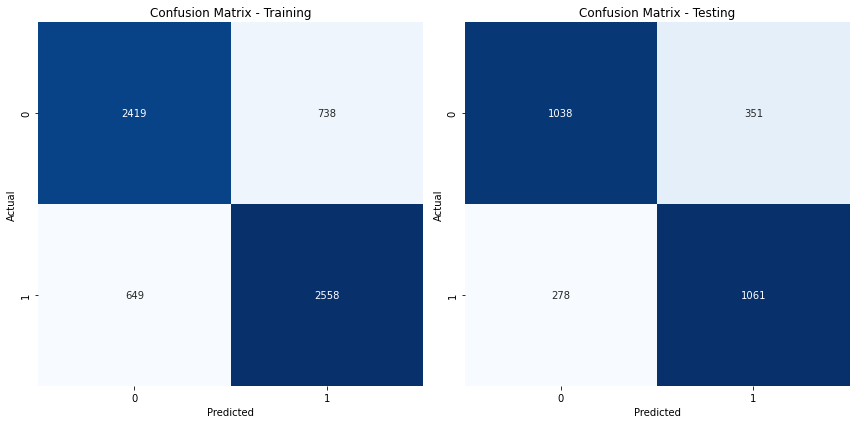

In [61]:
model_scores_classification(ada)

### 1.3.3.1 (a) n_estimators 

##### n_estimators against model accuracies 

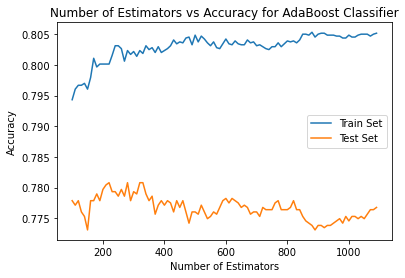

In [62]:
estimators = [i for i in range(100, 1100, 10)]

train_accuracies = []
test_accuracies = []

# Train AdaBoost models with different n_estimators values
for n_estimators in estimators:
    model = AdaBoostClassifier(n_estimators=n_estimators, random_state=42)
    
    # Train the model on the training set
    model.fit(X_train, y_train)
    
    # Evaluate accuracy on the training set
    train_accuracy = model.score(X_train, y_train)
    train_accuracies.append(train_accuracy)
    
    # Evaluate accuracy on the test set
    test_accuracy = model.score(X_test, y_test)
    test_accuracies.append(test_accuracy)

# Plotting the graph
plt.plot(estimators, train_accuracies,label='Train Set')
plt.plot(estimators, test_accuracies,label='Test Set')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.title('Number of Estimators vs Accuracy for AdaBoost Classifier')
plt.legend()
plt.show()

# scores tend to see increases for the train set, but for the test set it is inconsistent 
# we can try to strike a balance for it 

### 1.3.3.1 (b) learning_rate

###### learning rate against model accuracies 

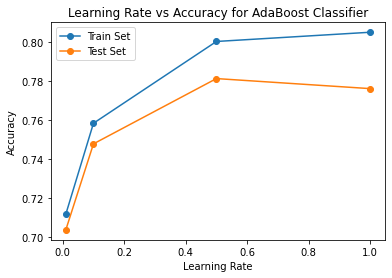

In [63]:
learning_rates = [0.01, 0.1, 0.5, 1.0]

train_accuracies = []
test_accuracies = []

# Train AdaBoost models with different learning rates
for learning_rate in learning_rates:
    model = AdaBoostClassifier(learning_rate=learning_rate, n_estimators=500, random_state=42)
    
    # Train the model on the training set
    model.fit(X_train, y_train)
    
    # Evaluate accuracy on the training set
    train_accuracy = model.score(X_train, y_train)
    train_accuracies.append(train_accuracy)
    
    # Evaluate accuracy on the test set
    test_accuracy = model.score(X_test, y_test)
    test_accuracies.append(test_accuracy)

# Plotting the graph
plt.plot(learning_rates, train_accuracies, marker='o', label='Train Set')
plt.plot(learning_rates, test_accuracies, marker='o', label='Test Set')
plt.xlabel('Learning Rate')
plt.ylabel('Accuracy')
plt.title('Learning Rate vs Accuracy for AdaBoost Classifier')
plt.legend()
plt.show()

### 1.3.3.2 Optimizing Hyperparameters 

In [64]:
ada_models = [ada]

ada_names = ['base']

### 1.3.3.2 (a) GridSearchCV 

##### 1st iteration - lower estimators

In [65]:
param_grid = {'n_estimators' : [200,300,400],
              'learning_rate' : [0.6,0.8,1],
              'algorithm' : ['SAMME.R','SAMME']}

In [66]:
start_time = time.time()

grid = GridSearchCV(estimator=ada, param_grid=param_grid, scoring='accuracy',verbose = 3,refit=True).fit(X_train,y_train)

end_time = time.time()

elapsed_time = end_time - start_time

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV 1/5] END algorithm=SAMME.R, learning_rate=0.6, n_estimators=200;, score=0.793 total time=   0.5s
[CV 2/5] END algorithm=SAMME.R, learning_rate=0.6, n_estimators=200;, score=0.778 total time=   0.5s
[CV 3/5] END algorithm=SAMME.R, learning_rate=0.6, n_estimators=200;, score=0.797 total time=   0.5s
[CV 4/5] END algorithm=SAMME.R, learning_rate=0.6, n_estimators=200;, score=0.778 total time=   0.5s
[CV 5/5] END algorithm=SAMME.R, learning_rate=0.6, n_estimators=200;, score=0.794 total time=   0.5s
[CV 1/5] END algorithm=SAMME.R, learning_rate=0.6, n_estimators=300;, score=0.790 total time=   0.8s
[CV 2/5] END algorithm=SAMME.R, learning_rate=0.6, n_estimators=300;, score=0.776 total time=   0.8s
[CV 3/5] END algorithm=SAMME.R, learning_rate=0.6, n_estimators=300;, score=0.797 total time=   0.8s
[CV 4/5] END algorithm=SAMME.R, learning_rate=0.6, n_estimators=300;, score=0.786 total time=   0.8s
[CV 5/5] END algorithm=SAMME.R

[CV 3/5] END algorithm=SAMME, learning_rate=1, n_estimators=300;, score=0.793 total time=   0.8s
[CV 4/5] END algorithm=SAMME, learning_rate=1, n_estimators=300;, score=0.770 total time=   0.7s
[CV 5/5] END algorithm=SAMME, learning_rate=1, n_estimators=300;, score=0.774 total time=   0.7s
[CV 1/5] END algorithm=SAMME, learning_rate=1, n_estimators=400;, score=0.767 total time=   0.9s
[CV 2/5] END algorithm=SAMME, learning_rate=1, n_estimators=400;, score=0.771 total time=   0.9s
[CV 3/5] END algorithm=SAMME, learning_rate=1, n_estimators=400;, score=0.786 total time=   0.9s
[CV 4/5] END algorithm=SAMME, learning_rate=1, n_estimators=400;, score=0.773 total time=   0.9s
[CV 5/5] END algorithm=SAMME, learning_rate=1, n_estimators=400;, score=0.780 total time=   0.9s


In [67]:
print(grid.best_score_)
print(grid.best_params_)

minutes, seconds = divmod(elapsed_time, 60)
formatted_time = "{:02}:{:02}".format(int(minutes), int(seconds))
print("Elapsed Time: {}".format(formatted_time))

0.7916419639636969
{'algorithm': 'SAMME.R', 'learning_rate': 1, 'n_estimators': 300}
Elapsed Time: 01:17


Model: AdaBoostClassifier(learning_rate=1, n_estimators=300, random_state=42)

Training score: 0.8021684475172848
Testing score: 0.7793255131964809

Training report:
              precision    recall  f1-score   support

           0       0.82      0.77      0.79      3157
           1       0.79      0.83      0.81      3207

    accuracy                           0.80      6364
   macro avg       0.80      0.80      0.80      6364
weighted avg       0.80      0.80      0.80      6364


Testing report:
              precision    recall  f1-score   support

           0       0.80      0.75      0.78      1389
           1       0.76      0.81      0.78      1339

    accuracy                           0.78      2728
   macro avg       0.78      0.78      0.78      2728
weighted avg       0.78      0.78      0.78      2728


Confusion Matrix:


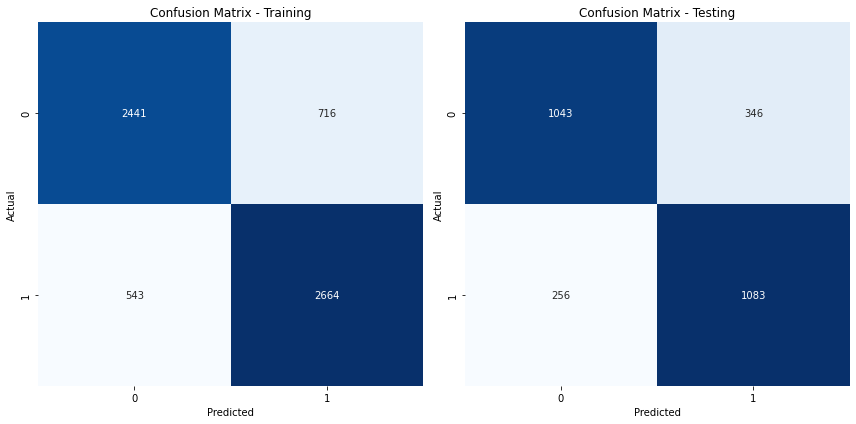

In [68]:
ada2 = AdaBoostClassifier(algorithm='SAMME.R',learning_rate=1,n_estimators=300,random_state=42).fit(X_train,y_train)

model_scores_classification(ada2)
ada_models.append(ada2)
ada_names.append('ada2 - lower estimators')

# train and test scores increase but is slightly overfit

##### 2nd iteration - lower learning rate 
- high learning rates tend to lead to overfitting 

In [69]:
param_grid = {'n_estimators' : [200,300,400],
              'learning_rate' : [0.2,0.4,0.6],
              'algorithm' : ['SAMME.R','SAMME']}

In [70]:
start_time = time.time()

grid = GridSearchCV(estimator=ada, param_grid=param_grid, scoring='accuracy',verbose = 3,refit=True).fit(X_train,y_train)

end_time = time.time()

elapsed_time = end_time - start_time

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV 1/5] END algorithm=SAMME.R, learning_rate=0.2, n_estimators=200;, score=0.738 total time=   0.8s
[CV 2/5] END algorithm=SAMME.R, learning_rate=0.2, n_estimators=200;, score=0.739 total time=   0.6s
[CV 3/5] END algorithm=SAMME.R, learning_rate=0.2, n_estimators=200;, score=0.745 total time=   0.5s
[CV 4/5] END algorithm=SAMME.R, learning_rate=0.2, n_estimators=200;, score=0.742 total time=   0.5s
[CV 5/5] END algorithm=SAMME.R, learning_rate=0.2, n_estimators=200;, score=0.756 total time=   0.6s
[CV 1/5] END algorithm=SAMME.R, learning_rate=0.2, n_estimators=300;, score=0.755 total time=   0.8s
[CV 2/5] END algorithm=SAMME.R, learning_rate=0.2, n_estimators=300;, score=0.758 total time=   0.8s
[CV 3/5] END algorithm=SAMME.R, learning_rate=0.2, n_estimators=300;, score=0.776 total time=   0.8s
[CV 4/5] END algorithm=SAMME.R, learning_rate=0.2, n_estimators=300;, score=0.760 total time=   0.8s
[CV 5/5] END algorithm=SAMME.R

[CV 3/5] END algorithm=SAMME, learning_rate=0.6, n_estimators=300;, score=0.747 total time=   0.7s
[CV 4/5] END algorithm=SAMME, learning_rate=0.6, n_estimators=300;, score=0.723 total time=   0.7s
[CV 5/5] END algorithm=SAMME, learning_rate=0.6, n_estimators=300;, score=0.753 total time=   0.7s
[CV 1/5] END algorithm=SAMME, learning_rate=0.6, n_estimators=400;, score=0.724 total time=   0.9s
[CV 2/5] END algorithm=SAMME, learning_rate=0.6, n_estimators=400;, score=0.729 total time=   1.2s
[CV 3/5] END algorithm=SAMME, learning_rate=0.6, n_estimators=400;, score=0.751 total time=   1.1s
[CV 4/5] END algorithm=SAMME, learning_rate=0.6, n_estimators=400;, score=0.730 total time=   0.9s
[CV 5/5] END algorithm=SAMME, learning_rate=0.6, n_estimators=400;, score=0.753 total time=   0.9s


In [71]:
print(grid.best_score_)
print(grid.best_params_)

minutes, seconds = divmod(elapsed_time, 60)
formatted_time = "{:02}:{:02}".format(int(minutes), int(seconds))
print("Elapsed Time: {}".format(formatted_time))

0.7913276220684067
{'algorithm': 'SAMME.R', 'learning_rate': 0.6, 'n_estimators': 400}
Elapsed Time: 01:17


Model: AdaBoostClassifier(learning_rate=0.6, n_estimators=400, random_state=42)

Training score: 0.7988686360779385
Testing score: 0.781891495601173

Training report:
              precision    recall  f1-score   support

           0       0.82      0.76      0.79      3157
           1       0.78      0.84      0.81      3207

    accuracy                           0.80      6364
   macro avg       0.80      0.80      0.80      6364
weighted avg       0.80      0.80      0.80      6364


Testing report:
              precision    recall  f1-score   support

           0       0.81      0.74      0.78      1389
           1       0.75      0.82      0.79      1339

    accuracy                           0.78      2728
   macro avg       0.78      0.78      0.78      2728
weighted avg       0.78      0.78      0.78      2728


Confusion Matrix:


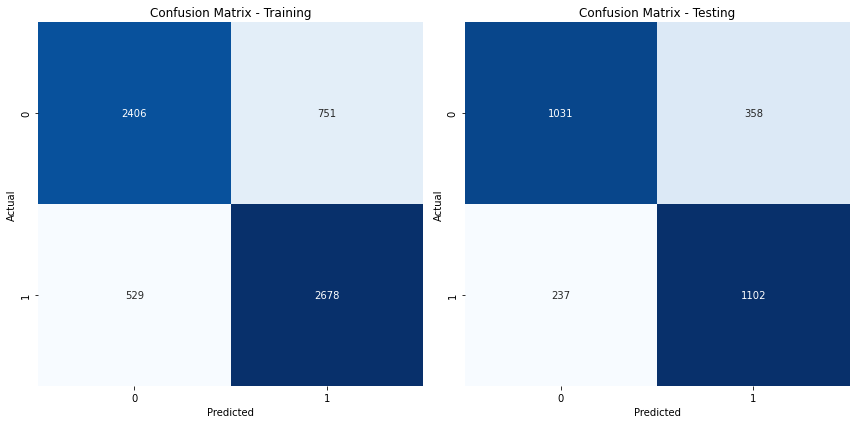

In [72]:
ada3  = AdaBoostClassifier(algorithm='SAMME.R',learning_rate=0.6,n_estimators=400,random_state=42).fit(X_train,y_train)

model_scores_classification(ada3)
ada_models.append(ada3)
ada_names.append('ada3 - lower learning rate')

# overfitting is reduced 

##### 3rd iteration - use lower number of estimators 
- higher estimators leads to overfitting due to complexity? (confirm this)

In [73]:
param_grid = {'n_estimators' : [50,100,200],
              'learning_rate' : [0.2,0.4,0.6],
              'algorithm' : ['SAMME.R','SAMME']}

In [74]:
start_time = time.time()

grid = GridSearchCV(estimator=ada, param_grid=param_grid, scoring='accuracy',verbose = 3,refit=True).fit(X_train,y_train)

end_time = time.time()

elapsed_time = end_time - start_time

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV 1/5] END algorithm=SAMME.R, learning_rate=0.2, n_estimators=50;, score=0.685 total time=   0.1s
[CV 2/5] END algorithm=SAMME.R, learning_rate=0.2, n_estimators=50;, score=0.705 total time=   0.1s
[CV 3/5] END algorithm=SAMME.R, learning_rate=0.2, n_estimators=50;, score=0.720 total time=   0.1s
[CV 4/5] END algorithm=SAMME.R, learning_rate=0.2, n_estimators=50;, score=0.704 total time=   0.1s
[CV 5/5] END algorithm=SAMME.R, learning_rate=0.2, n_estimators=50;, score=0.735 total time=   0.1s
[CV 1/5] END algorithm=SAMME.R, learning_rate=0.2, n_estimators=100;, score=0.699 total time=   0.2s
[CV 2/5] END algorithm=SAMME.R, learning_rate=0.2, n_estimators=100;, score=0.725 total time=   0.2s
[CV 3/5] END algorithm=SAMME.R, learning_rate=0.2, n_estimators=100;, score=0.727 total time=   0.2s
[CV 4/5] END algorithm=SAMME.R, learning_rate=0.2, n_estimators=100;, score=0.712 total time=   0.2s
[CV 5/5] END algorithm=SAMME.R, lea

[CV 3/5] END algorithm=SAMME, learning_rate=0.6, n_estimators=100;, score=0.713 total time=   0.2s
[CV 4/5] END algorithm=SAMME, learning_rate=0.6, n_estimators=100;, score=0.705 total time=   0.2s
[CV 5/5] END algorithm=SAMME, learning_rate=0.6, n_estimators=100;, score=0.734 total time=   0.2s
[CV 1/5] END algorithm=SAMME, learning_rate=0.6, n_estimators=200;, score=0.694 total time=   0.4s
[CV 2/5] END algorithm=SAMME, learning_rate=0.6, n_estimators=200;, score=0.716 total time=   0.4s
[CV 3/5] END algorithm=SAMME, learning_rate=0.6, n_estimators=200;, score=0.727 total time=   0.4s
[CV 4/5] END algorithm=SAMME, learning_rate=0.6, n_estimators=200;, score=0.719 total time=   0.4s
[CV 5/5] END algorithm=SAMME, learning_rate=0.6, n_estimators=200;, score=0.742 total time=   0.4s


In [75]:
print(grid.best_score_)
print(grid.best_params_)

minutes, seconds = divmod(elapsed_time, 60)
formatted_time = "{:02}:{:02}".format(int(minutes), int(seconds))
print("Elapsed Time: {}".format(formatted_time))

0.7881844501425345
{'algorithm': 'SAMME.R', 'learning_rate': 0.6, 'n_estimators': 200}
Elapsed Time: 00:30


Model: AdaBoostClassifier(learning_rate=0.6, n_estimators=200, random_state=42)

Training score: 0.7961973601508485
Testing score: 0.7756598240469208

Training report:
              precision    recall  f1-score   support

           0       0.82      0.76      0.79      3157
           1       0.78      0.83      0.80      3207

    accuracy                           0.80      6364
   macro avg       0.80      0.80      0.80      6364
weighted avg       0.80      0.80      0.80      6364


Testing report:
              precision    recall  f1-score   support

           0       0.81      0.74      0.77      1389
           1       0.75      0.82      0.78      1339

    accuracy                           0.78      2728
   macro avg       0.78      0.78      0.78      2728
weighted avg       0.78      0.78      0.78      2728


Confusion Matrix:


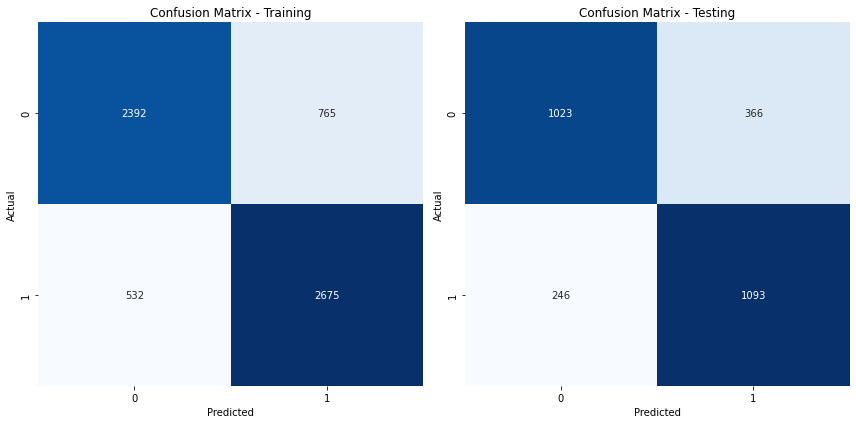

In [76]:
ada4  = AdaBoostClassifier(algorithm='SAMME.R',learning_rate=0.6,n_estimators=200,random_state=42).fit(X_train,y_train)

model_scores_classification(ada4)
ada_models.append(ada4)
ada_names.append('ada4 - lower number of estimators')

# lower iterations leads test score to be lower? 

### 1.3.3.3 Optimized Models

In [77]:
scores_table = []
for model, name in zip(ada_models, ada_names):
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    scores_table.append([name, train_score, test_score])

df_scores_ada = pd.DataFrame(scores_table, columns=["Model", "Train Score", "Test Score"])

df_scores_ada

Model  Train Score  Test Score
0                               base     0.782055    0.769428
1            ada2 - lower estimators     0.802168    0.779326
2         ada3 - lower learning rate     0.798869    0.781891
3  ada4 - lower number of estimators     0.796197    0.775660

### 1.4 Evaluating Best Models 

### 1.4.1 Accuracy 

In [78]:
# list with best models from each 
best_models_cl = [rf3,mlp3,ada3]
best_models_cl_names = ['Random Forest Regressor','Multilayer Perceptron','ADA Boost']

scores_table = []
for model, name in zip(best_models_cl, best_models_cl_names):
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    scores_table.append([name, train_score, test_score])

df_bestcl = pd.DataFrame(scores_table, columns=["Model", "Train Score", "Test Score"])

df_bestcl

Model  Train Score  Test Score
0  Random Forest Regressor     0.798712    0.782625
1    Multilayer Perceptron     0.755343    0.745968
2                ADA Boost     0.798869    0.781891

### 1.4.2 Cross Validation 

In [79]:
best_models_cl = [rf3,mlp3,ada3]
best_models_cl_names = ['Random Forest Regressor','Multilayer Perceptron','ADA Boost']

for model, name in zip(best_models_cl, best_models_cl_names):
    print(f'Model : {name}')
    results  = cross_validate(model, X, y, scoring='accuracy', cv=5, return_train_score = True)
    print('train_score: ', results['train_score'])
    print('test_score: ', results['test_score'])

    print('cross val training accuracy is:', sum(results['train_score'])/len(results['train_score']))
    print('cross val testing accuracy is:', sum(results['test_score'])/len(results['test_score']))
    print()

Model : Random Forest Regressor
train_score:  [0.7947202  0.79362024 0.78911191 0.79392356 0.79612318]
test_score:  [0.79439252 0.78614623 0.77722772 0.78327833 0.79537954]
cross val training accuracy is: 0.7934998168940675
cross val testing accuracy is: 0.7872848692235908

Model : Multilayer Perceptron
train_score:  [0.76625877 0.77230854 0.69590322 0.76532857 0.52777014]
test_score:  [0.76580539 0.77075316 0.68426843 0.74917492 0.52750275]
cross val training accuracy is: 0.7055138456778589
cross val testing accuracy is: 0.6995009286525135

Model : ADA Boost
train_score:  [0.79362024 0.79389523 0.79529832 0.79502337 0.79626065]
test_score:  [0.78559648 0.79164376 0.78162816 0.77942794 0.79207921]
cross val training accuracy is: 0.7948195632518055
cross val testing accuracy is: 0.7860751110845005



## 2. Airbnb

In [80]:
# import the required packages

# tabular data
import pandas as pd
import numpy as np 
from tabulate import tabulate

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# train test split
from sklearn.model_selection import train_test_split

# metrics 
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
from sklearn.metrics import accuracy_score


# model opitmization
from sklearn.model_selection import GridSearchCV

# model evaluation
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve

# time - test
import time

# math 
from math import sqrt

# statistical models 
import statsmodels.api as sm

# regression models 
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neural_network import MLPRegressor

# scaling 
from sklearn.preprocessing import StandardScaler

# stacking
from sklearn.ensemble import StackingRegressor

### 2.1 Load and Sample the data

In [81]:
df_bnb = pd.read_csv('./bnb_transformed.csv')

In [82]:
df_bnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6307 entries, 0 to 6306
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_id                         6307 non-null   int64  
 1   neighbourhood                   6307 non-null   int64  
 2   latitude                        6307 non-null   float64
 3   longitude                       6307 non-null   float64
 4   room_type                       6307 non-null   int64  
 5   price                           6307 non-null   float64
 6   minimum_nights                  6307 non-null   float64
 7   number_of_reviews               6307 non-null   float64
 8   reviews_per_month               6307 non-null   float64
 9   calculated_host_listings_count  6307 non-null   float64
 10  availability_365                6307 non-null   float64
 11  last_review_year                6307 non-null   float64
 12  last_review_month               63

In [83]:
df_bnb.head()

host_id  neighbourhood  latitude  longitude  room_type  price  \
0   227796            131  1.746376  -2.626110          1   81.0   
1  1439258            469 -0.904317  -1.710715          1   44.0   
2  1439258            469 -0.927419  -1.596939          1   40.0   
3  1521514            134  0.463587  -0.512277          1   65.0   
4  1439258            469 -0.842913  -1.677979          1   44.0   

   minimum_nights  number_of_reviews  reviews_per_month  \
0        1.729361           1.157713           0.217513   
1        1.084695           1.157713           0.137405   
2        1.406505           0.879358          -0.124190   
3       -0.547453           1.647549           1.060556   
4        1.406505           1.008257          -0.021196   

   calculated_host_listings_count  ...  cosy  cozy      mins      mrt  near  \
0                       -0.684275  ...   0.0   0.0  0.000000  0.00000   0.0   
1                       -0.226308  ...   0.0   0.0  0.000000  0.00000   0.0   
2                       -0.226308  ...   0.0   0.0  0.720567  0.48444   0.0   
3                       -0.610410  ...   0.0   0.0  1.000000  0.00000   0.0   
4                       -0.226308  ...   0.0   0.0  1.000000  0.00000   0.0   

   orchard  private      room  spacious  studio  
0      0.0      0.0  1.000000       0.0     0.0  
1      0.0      0.0  0.641676       0.0     0.0  
2      0.0      0.0  0.496085       0.0     0.0  
3      0.0      0.0  0.000000       0.0     0.0  
4      0.0      0.0  0.000000       0.0     0.0  

[5 rows x 32 columns]

In [84]:
df_bnb.isnull().sum()

host_id                           0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
last_review_year                  0
last_review_month                 0
last_review_day                   0
apartment                         0
apt                               0
bed                               0
bedroom                           0
br                                0
central                           0
city                              0
condo                             0
cosy                              0
cozy                              0
mins                              0
mrt                               0
near                              0
orchard                     

In [85]:
df_bnb.describe()

host_id  neighbourhood      latitude     longitude    room_type  \
count  6.307000e+03    6307.000000  6.307000e+03  6.307000e+03  6307.000000   
mean   9.268678e+07     581.983986  1.344935e-14  4.870975e-13     1.537498   
std    8.377692e+07     327.440241  1.000079e+00  1.000079e+00     0.599170   
min    2.366600e+04     101.000000 -3.632829e+00 -3.501983e+00     0.000000   
25%    2.114972e+07     362.000000 -7.690466e-01 -4.677651e-01     1.000000   
50%    6.344891e+07     477.000000  1.444091e-01 -6.675572e-02     2.000000   
75%    1.598048e+08     994.000000  6.596528e-01  4.478298e-01     2.000000   
max    2.885676e+08    1043.000000  3.781817e+00  2.683822e+00     2.000000   

             price  minimum_nights  number_of_reviews  reviews_per_month  \
count  6307.000000    6.307000e+03       6.307000e+03       6.307000e+03   
mean    156.268432   -2.632603e-15       2.269354e-14      -2.547581e-15   
std      98.686740    1.000079e+00       1.000079e+00       1.000079e+00   
min      35.000000   -1.236524e+00      -1.132311e+00      -1.180403e+00   
25%      81.000000   -5.474529e-01      -1.132311e+00      -1.180403e+00   
50%     135.000000   -1.463868e-01      -1.756958e-02       6.399646e-02   
75%     208.000000    8.409538e-01       9.270265e-01       8.235087e-01   
max     394.000000    1.729361e+00       1.647549e+00       1.733648e+00   

       calculated_host_listings_count  ...         cosy         cozy  \
count                    6.307000e+03  ...  6307.000000  6307.000000   
mean                     1.496750e-15  ...     0.038088     0.038503   
std                      1.000079e+00  ...     0.161810     0.159995   
min                     -6.842753e-01  ...     0.000000     0.000000   
25%                     -6.547290e-01  ...     0.000000     0.000000   
50%                     -4.922244e-01  ...     0.000000     0.000000   
75%                      2.907525e-01  ...     0.000000     0.000000   
max                      3.348795e+00  ...     1.000000     1.000000   

              mins          mrt         near      orchard      private  \
count  6307.000000  6307.000000  6307.000000  6307.000000  6307.000000   
mean      0.034565     0.105723     0.085033     0.044024     0.045422   
std       0.150851     0.232204     0.214786     0.170141     0.178046   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.000000     0.000000     0.000000     0.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

              room     spacious       studio  
count  6307.000000  6307.000000  6307.000000  
mean      0.119620     0.051807     0.067715  
std       0.275969     0.181525     0.215714  
min       0.000000     0.000000     0.000000  
25%       0.000000     0.000000     0.000000  
50%       0.000000     0.000000     0.000000  
75%       0.000000     0.000000     0.000000  
max       1.000000     1.000000     1.000000  

[8 rows x 32 columns]

### 2.1.1 Train and Test Splits 

In [86]:
X = df_bnb.drop(['price'], axis =1)
y = df_bnb['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [190]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4414 entries, 0 to 4413
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_id                         4414 non-null   float64
 1   neighbourhood                   4414 non-null   float64
 2   room_type                       4414 non-null   float64
 3   minimum_nights                  4414 non-null   float64
 4   number_of_reviews               4414 non-null   float64
 5   reviews_per_month               4414 non-null   float64
 6   calculated_host_listings_count  4414 non-null   float64
 7   availability_365                4414 non-null   float64
 8   last_review_year                4414 non-null   float64
 9   last_review_month               4414 non-null   float64
 10  last_review_day                 4414 non-null   float64
 11  mrt                             4414 non-null   float64
 12  private                         44

### 2.1.2 Statistical Models

In [87]:
# using OLS model to see the p-values and coefficients 
ols = sm.OLS(y_train, X_train).fit()
# Summary statistics from the model
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.849
Model:                            OLS   Adj. R-squared (uncentered):              0.848
Method:                 Least Squares   F-statistic:                              795.9
Date:                Thu, 08 Feb 2024   Prob (F-statistic):                        0.00
Time:                        08:02:53   Log-Likelihood:                         -25086.
No. Observations:                4414   AIC:                                  5.023e+04
Df Residuals:                    4383   BIC:                                  5.043e+04
Df Model:                          31                                                  
Covariance Type:            nonrobust                                                  
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
host_id                         4.388e-08   1.45e-08      3.036      0.002    1.55e-08    7.22e-08
neighbourhood                     -0.0139      0.004     -3.523      0.000      -0.022      -0.006
latitude                          -8.0632      1.172     -6.879      0.000     -10.361      -5.765
longitude                         -1.2555      1.364     -0.920      0.357      -3.930       1.419
room_type                        100.8261      2.061     48.912      0.000      96.785     104.867
minimum_nights                   -20.2104      1.241    -16.283      0.000     -22.644     -17.777
number_of_reviews                 -8.3875      2.778     -3.019      0.003     -13.834      -2.941
reviews_per_month                  0.6697      2.879      0.233      0.816      -4.975       6.314
calculated_host_listings_count    -9.7985      1.431     -6.846      0.000     -12.604      -6.993
availability_365                  15.6010      1.175     13.283      0.000      13.298      17.904
last_review_year                  -0.0007      0.003     -0.258      0.796      -0.006       0.005
last_review_month                 -0.4210      0.552     -0.763      0.446      -1.503       0.661
last_review_day                    0.3367      0.151      2.231      0.026       0.041       0.633
apartment                         15.2260      5.080      2.997      0.003       5.267      25.185
apt                              -14.5068      6.197     -2.341      0.019     -26.655      -2.358
bed                               10.1944      5.989      1.702      0.089      -1.547      21.936
bedroom                           25.0961      5.161      4.863      0.000      14.978      35.214
br                                62.4632      5.223     11.958      0.000      52.223      72.704
central                            5.7609      6.552      0.879      0.379      -7.085      18.607
city                             -13.9327      5.350     -2.604      0.009     -24.421      -3.445
condo                             -8.6539      6.647     -1.302      0.193     -21.685       4.377
cosy                             -36.1932      6.551     -5.525      0.000     -49.036     -23.351
cozy                             -41.1451      6.839     -6.016      0.000     -54.553     -27.738
mins                             -22.3313      7.248     -3.081      0.002     -36.541      -8.121
mrt                                7.9117      5.047      1.567      0.117      -1.984      17.807
near                              -4.2160      5.122     -0.823      0.410     -14.257       5.825
orchard                           38.3296      6.484      5.911      0.000      25.617      51.042
private       

In [88]:
# choose which features to drop in train and test 

columns_to_drop = ['apartment', 'apt', 'bed', 'bedroom', 'br', 'central', 'city', 'condo', 'cosy', 'cozy', 
                   'mins', 'near', 'orchard', 'room', 'studio','longitude','latitude']

X_train = X_train.drop(columns=columns_to_drop)

X_test = X_test.drop(columns=columns_to_drop)

In [89]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4414 entries, 6206 to 860
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_id                         4414 non-null   int64  
 1   neighbourhood                   4414 non-null   int64  
 2   room_type                       4414 non-null   int64  
 3   minimum_nights                  4414 non-null   float64
 4   number_of_reviews               4414 non-null   float64
 5   reviews_per_month               4414 non-null   float64
 6   calculated_host_listings_count  4414 non-null   float64
 7   availability_365                4414 non-null   float64
 8   last_review_year                4414 non-null   float64
 9   last_review_month               4414 non-null   float64
 10  last_review_day                 4414 non-null   float64
 11  mrt                             4414 non-null   float64
 12  private                         

### 2.1.3 Scaling

In [90]:
def print_variable_scale(dataframe, variable_name):
    if variable_name not in dataframe.columns:
        print(f"Variable '{variable_name}' not found in the DataFrame.")
        return

    variable_data = dataframe[variable_name]

    variable_range = variable_data.max() - variable_data.min()

    print(f"{variable_name} : {variable_range}")

In [91]:
for n in X_train.columns : 
    print_variable_scale(X_train,n)

host_id : 288086801
neighbourhood : 942
room_type : 2
minimum_nights : 2.9658858729915702
number_of_reviews : 2.779859862399585
reviews_per_month : 2.9140510403612194
calculated_host_listings_count : 4.033069930431905
availability_365 : 2.5425998554659244
last_review_year : 2019.0
last_review_month : 12.0
last_review_day : 31.0
mrt : 1.0
private : 1.0
spacious : 1.0


In [92]:
# experiment scaling all cols 
X_train_copy = X_train.copy()
X_test_copy = X_test.copy()

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the scaler on x_train and x_test copies
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train_copy), columns=X_train_copy.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test_copy), columns=X_test_copy.columns)

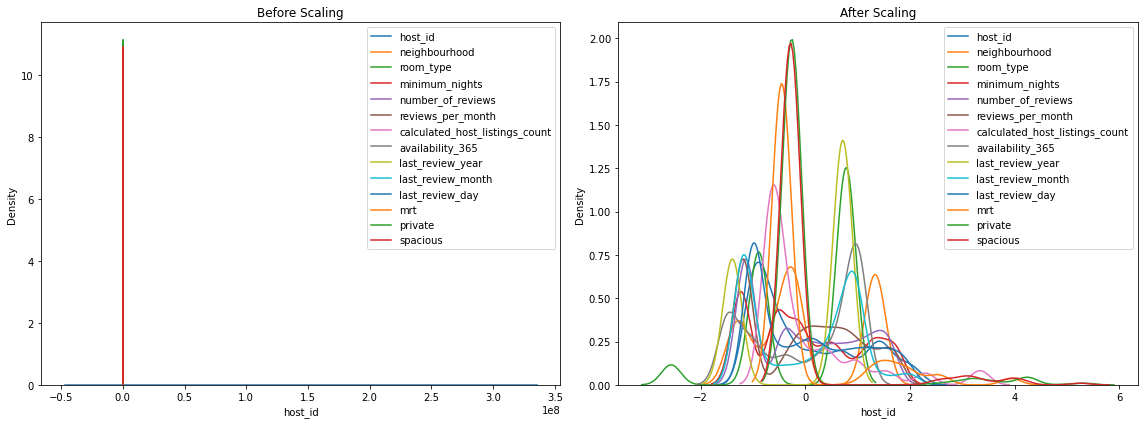

In [93]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['host_id'], ax=ax1, label='host_id')
sns.kdeplot(X_train['neighbourhood'], ax=ax1, label='neighbourhood')
sns.kdeplot(X_train['room_type'], ax=ax1, label='room_type')
sns.kdeplot(X_train['minimum_nights'], ax=ax1, label='minimum_nights')
sns.kdeplot(X_train['number_of_reviews'], ax=ax1, label='number_of_reviews')
sns.kdeplot(X_train['reviews_per_month'], ax=ax1, label='reviews_per_month')
sns.kdeplot(X_train['calculated_host_listings_count'], ax=ax1, label='calculated_host_listings_count')
sns.kdeplot(X_train['availability_365'], ax=ax1, label='availability_365')
sns.kdeplot(X_train['last_review_year'], ax=ax1, label='last_review_year')
sns.kdeplot(X_train['last_review_month'], ax=ax1, label='last_review_month')
sns.kdeplot(X_train['last_review_day'], ax=ax1, label='last_review_day')
sns.kdeplot(X_train['mrt'], ax=ax1, label='mrt')
sns.kdeplot(X_train['private'], ax=ax1, label='private')
sns.kdeplot(X_train['spacious'], ax=ax1, label='spacious')

ax1.legend()

# Plot after scaling
ax2.set_title('After Scaling')
sns.kdeplot(X_train_scaled['host_id'], ax=ax2, label='host_id')
sns.kdeplot(X_train_scaled['neighbourhood'], ax=ax2, label='neighbourhood')
sns.kdeplot(X_train_scaled['room_type'], ax=ax2, label='room_type')
sns.kdeplot(X_train_scaled['minimum_nights'], ax=ax2, label='minimum_nights')
sns.kdeplot(X_train_scaled['number_of_reviews'], ax=ax2, label='number_of_reviews')
sns.kdeplot(X_train_scaled['reviews_per_month'], ax=ax2, label='reviews_per_month')
sns.kdeplot(X_train_scaled['calculated_host_listings_count'], ax=ax2, label='calculated_host_listings_count')
sns.kdeplot(X_train_scaled['availability_365'], ax=ax2, label='availability_365')
sns.kdeplot(X_train_scaled['last_review_year'], ax=ax2, label='last_review_year')
sns.kdeplot(X_train_scaled['last_review_month'], ax=ax2, label='last_review_month')
sns.kdeplot(X_train_scaled['last_review_day'], ax=ax2, label='last_review_day')
sns.kdeplot(X_train_scaled['mrt'], ax=ax2, label='mrt')
sns.kdeplot(X_train_scaled['private'], ax=ax2, label='private')
sns.kdeplot(X_train_scaled['spacious'], ax=ax2, label='spacious')

ax2.legend()

plt.tight_layout()
plt.show()

In [94]:
# experiment if x_train is scaled 
X_train = X_train_scaled
X_test = X_test_scaled

### 2.2 Build the Model(s)

In [95]:
models = []

model_names = []

In [96]:
# linear regression
lr = LinearRegression().fit(X_train,y_train)

models.append(lr)
model_names.append('LinearRegression')

In [97]:
# decision tree regressor
dtr = DecisionTreeRegressor(random_state=42).fit(X_train,y_train)

models.append(dtr)
model_names.append('DTree Regressor')

In [98]:
# random forest regressor 
rfr = RandomForestRegressor(random_state=42).fit(X_train, y_train)

models.append(rfr)
model_names.append('Random Forest Regressor')

In [99]:
# SVR
svr = SVR().fit(X_train, y_train)

models.append(svr)
model_names.append('SVR')

In [100]:
# adaptive boosting 
ada_r = AdaBoostRegressor(random_state=42).fit(X_train, y_train)

models.append(ada_r)
model_names.append('ADA Boost')

In [101]:
# XGB
xgb_r = XGBRegressor(random_state=42).fit(X_train, y_train)

models.append(xgb_r)
model_names.append('XG Boost')

In [102]:
# multilayer perceptron
mlp_r = MLPRegressor(random_state=42).fit(X_train,y_train)

models.append(mlp_r)
model_names.append('Multilayer Perceptron')

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


### 2.2.1 Consolidated View of Model Accuracies 

In [103]:
results = []

for model, model_name in zip(models, model_names):
    # Fit the model on the training set
    model.fit(X_train, y_train)

    # Calculate metrics
    train_r2 = model.score(X_train, y_train)
    test_r2 = model.score(X_test, y_test)

    train_rmse = sqrt(mean_squared_error(y_train, model.predict(X_train)))
    test_rmse = sqrt(mean_squared_error(y_test, model.predict(X_test)))

    # Append results to the list
    results.append({
        'Model': model_name,
        'Train_RMSE': train_rmse,
        'Test_RMSE': test_rmse,
        'Train_R2': train_r2,
        'Test_R2': test_r2
    })

# Create a DataFrame from the results
results_df = pd.DataFrame(results)

# Display the DataFrame
results_df

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Model  Train_RMSE  Test_RMSE  Train_R2   Test_R2
0         LinearRegression   76.251880  80.042311  0.389106  0.374134
1          DTree Regressor    7.881719  87.205262  0.993473  0.257105
2  Random Forest Regressor   23.771912  63.477780  0.940626  0.606373
3                      SVR   85.116864  90.002473  0.238805  0.208682
4                ADA Boost   76.823480  80.526183  0.379913  0.366544
5                 XG Boost   27.245337  63.948764  0.922008  0.600510
6    Multilayer Perceptron   73.215662  77.714483  0.436787  0.410008

### 2.3 Evaluate and Improve the Model(s)
These models will be chosen for further evaluation and tuning  : <mark>Random Forest Regressor</mark>, <mark>SVR</mark>,<mark>XG Boost</mark>.

In [104]:
def model_scores_regression(model):
    print(f"Model : {model}:\n")
    # Predictions on the training set
    y_train_pred = model.predict(X_train)
    
    # Predictions on the testing set
    y_test_pred = model.predict(X_test)
    
    # Calculated the RMSE and R^2 for training set
    print('R-Square:')
    print(model.score(X_train, y_train), '(Train R^2 Value)')  # R squared value (ranges from 0 to 1): the higher the better
    print(model.score(X_test, y_test), '(Test R^2 Value)')  # R squared value (ranges from 0 to 1): the higher the better
    
    # Create subplot for training set
    plt.figure(figsize=(12, 5))  # Adjust the figure size
    plt.subplot(1, 2, 1)
    plt.scatter(y_train, y_train_pred, label='Actual vs. Predicted (Training)')
    plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], '--', color='red', label='Ideal Fit')
    plt.xlabel("Actual (Fitted) Values")
    plt.ylabel("Predicted Values")
    plt.title("Training Set: Fitted against Predicted Plot")
    plt.legend()
    
    print()
    
    print('RMSE:')
    # Calculated the RMSE and R^2 for testing set
    print(sqrt(mean_squared_error(y_train_pred, y_train)), '(Train RMSE)')  # RMSE: the lower the better
    print(sqrt(mean_squared_error(y_test_pred, y_test)), '(Test RMSE)')  # RMSE: the lower the better
    
    # Create subplot for testing set
    plt.subplot(1, 2, 2)
    plt.scatter(y_test, y_test_pred, label='Actual vs. Predicted (Testing)')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red', label='Ideal Fit')
    plt.xlabel("Actual (Fitted) Values")
    plt.ylabel("Predicted Values")
    plt.title("Testing Set: Fitted against Predicted Plot")
    plt.legend()

    # Adjust layout to prevent overlapping
    plt.tight_layout()
    plt.show()

### 2.3.1 Model 1 (Random Forest Regressor) 

Model : RandomForestRegressor(random_state=42):

R-Square:
0.940626478685091 (Train R^2 Value)
0.6063725410023851 (Test R^2 Value)

RMSE:
23.77191217282329 (Train RMSE)
63.47777999996723 (Test RMSE)


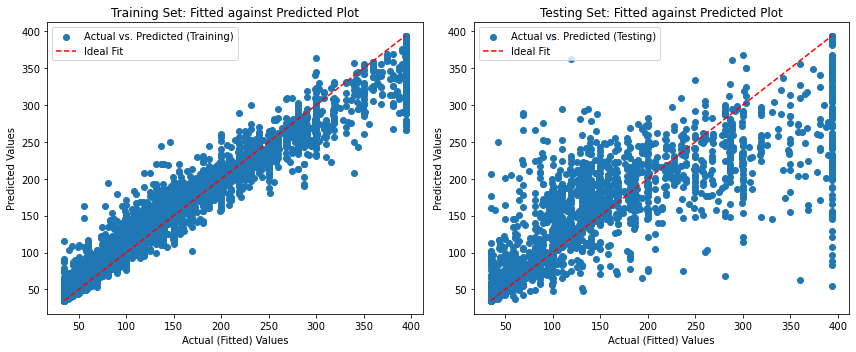

In [105]:
model_scores_regression(rfr)
# the model is very overfitted 

### 2.3.1.1 Hyperparameter Inspection 
- <mark>n_estimators</mark> : number of trees
- <mark>criterion</mark> : quality of split
- <mark>max_depth</mark> : depth of tree, if there are too many details it might lead to overfitting? affected by:min_samples_split samples
- <mark>min_samples_split</mark> : number of samples required to split an internal node 
- <mark>min_samples_leaf</mark> : number of samples required to become a leaf? makes model more generalised (add later on?) 

### 2.3.1.1 (a) n_estimators

##### n_estimators vs. rsq (range: 10-100)

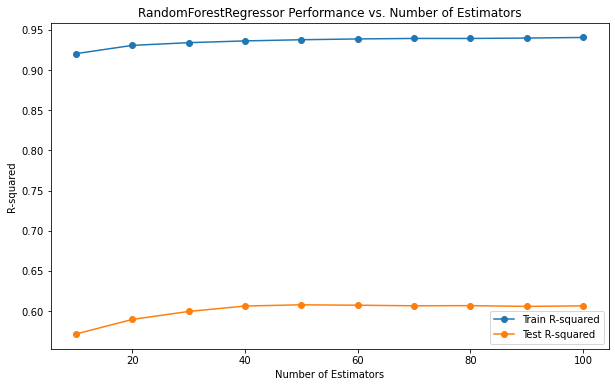

In [106]:
n_estimators_values = np.arange(10, 110, 10)

# Lists to store train and test scores
train_scores = []
test_scores = []

# Loop through different n_estimators values
for n_estimators in n_estimators_values:
    # Create and fit the RandomForestRegressor
    rf_regressor = RandomForestRegressor(n_estimators=n_estimators, random_state=42)
    rf_regressor.fit(X_train, y_train)
    
    # Calculate and store train and test scores (using R-squared)
    train_scores.append(rf_regressor.score(X_train, y_train))
    test_scores.append(rf_regressor.score(X_test, y_test))

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_values, train_scores, label='Train R-squared', marker='o')
plt.plot(n_estimators_values, test_scores, label='Test R-squared', marker='o')
plt.title('RandomForestRegressor Performance vs. Number of Estimators')
plt.xlabel('Number of Estimators')
plt.ylabel('R-squared')
plt.legend()
plt.show()

# train score is so high - why? 

##### n_estimators vs rsq (range: 100-1000)
- more estimators might make the model more complex

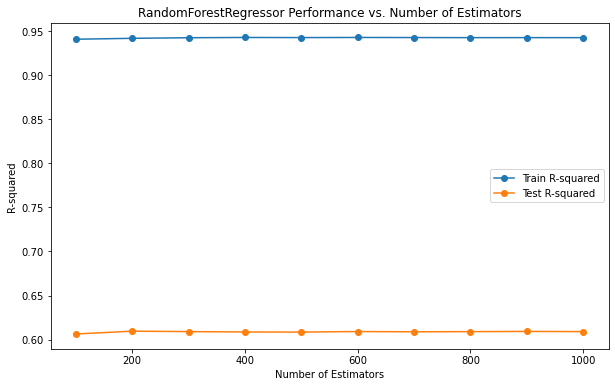

In [107]:
n_estimators_values = np.arange(100, 1100, 100)

# Lists to store train and test scores
train_scores = []
test_scores = []

# Loop through different n_estimators values
for n_estimators in n_estimators_values:
    # Create and fit the RandomForestRegressor
    rf_regressor = RandomForestRegressor(n_estimators=n_estimators, random_state=42)
    rf_regressor.fit(X_train, y_train)
    
    # Calculate and store train and test scores (using R-squared)
    train_scores.append(rf_regressor.score(X_train, y_train))
    test_scores.append(rf_regressor.score(X_test, y_test))

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_values, train_scores, label='Train R-squared', marker='o')
plt.plot(n_estimators_values, test_scores, label='Test R-squared', marker='o')
plt.title('RandomForestRegressor Performance vs. Number of Estimators')
plt.xlabel('Number of Estimators')
plt.ylabel('R-squared')
plt.legend()
plt.show()

# the values tend to plateau as we go higher
# need to either reduce the train score or increase the test score

### 2.3.1.1 (b) max_depth

##### max_depth - cross val accuracy

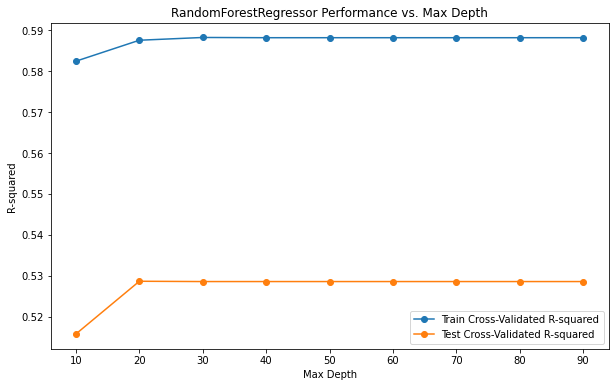

In [108]:
max_depth_values = np.arange(10, 100,10)

# Lists to store cross-validated R-squared values for both training and testing
train_cross_val_rsq_values = []
test_cross_val_rsq_values = []

# Loop through different max_depth values
for max_depth in max_depth_values:
    # Create the RandomForestRegressor
    rf_regressor = RandomForestRegressor(max_depth=max_depth, random_state=42)
    
    # Calculate cross-validated R-squared values for training set
    train_cross_val_rsq = cross_val_score(rf_regressor, X_train, y_train, cv=5, scoring='r2')
    
    # Calculate cross-validated R-squared values for testing set
    test_cross_val_rsq = cross_val_score(rf_regressor, X_test, y_test, cv=5, scoring='r2')
    
    # Store the mean of cross-validated R-squared values for both training and testing sets
    train_cross_val_rsq_values.append(np.mean(train_cross_val_rsq))
    test_cross_val_rsq_values.append(np.mean(test_cross_val_rsq))

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(max_depth_values, train_cross_val_rsq_values, label='Train Cross-Validated R-squared', marker='o')
plt.plot(max_depth_values, test_cross_val_rsq_values, label='Test Cross-Validated R-squared', marker='o')
plt.title('RandomForestRegressor Performance vs. Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('R-squared')
plt.legend()
plt.show()

##### max_depth vs train and test rsq

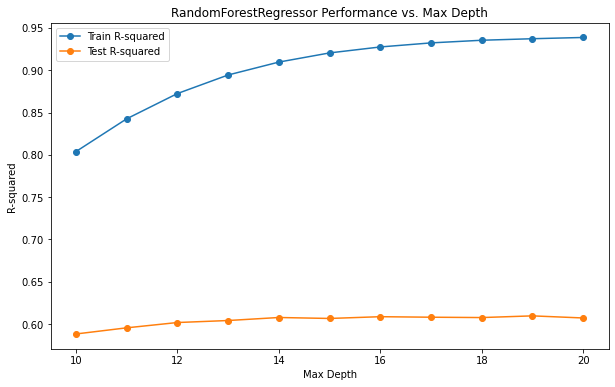

In [109]:
max_depth_values = np.arange(10, 21)

# Lists to store R-squared values for both training and testing
train_rsq_values = []
test_rsq_values = []

# Loop through different max_depth values
for max_depth in max_depth_values:
    # Create the RandomForestRegressor
    rf_regressor = RandomForestRegressor(max_depth=max_depth, random_state=42)
    
    # Fit the model on training data
    rf_regressor.fit(X_train, y_train)
    
    # Calculate R-squared values for training set
    train_rsq = r2_score(y_train, rf_regressor.predict(X_train))
    train_rsq_values.append(train_rsq)
    
    # Calculate R-squared values for testing set
    test_rsq = r2_score(y_test, rf_regressor.predict(X_test))
    test_rsq_values.append(test_rsq)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(max_depth_values, train_rsq_values, label='Train R-squared', marker='o')
plt.plot(max_depth_values, test_rsq_values, label='Test R-squared', marker='o')
plt.title('RandomForestRegressor Performance vs. Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('R-squared')
plt.legend()
plt.show()

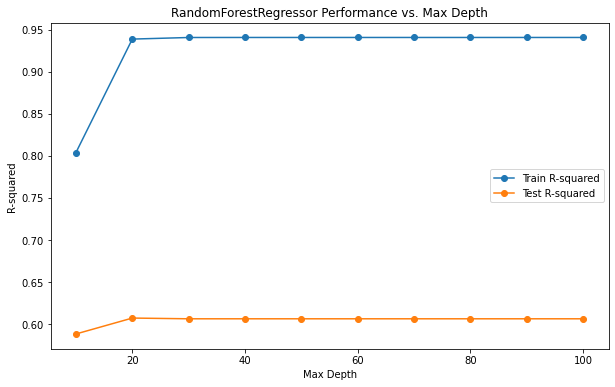

In [110]:
max_depth_values = np.arange(10, 110,10)

# Lists to store R-squared values for both training and testing
train_rsq_values = []
test_rsq_values = []

# Loop through different max_depth values
for max_depth in max_depth_values:
    # Create the RandomForestRegressor
    rf_regressor = RandomForestRegressor(max_depth=max_depth, random_state=42)
    
    # Fit the model on training data
    rf_regressor.fit(X_train, y_train)
    
    # Calculate R-squared values for training set
    train_rsq = r2_score(y_train, rf_regressor.predict(X_train))
    train_rsq_values.append(train_rsq)
    
    # Calculate R-squared values for testing set
    test_rsq = r2_score(y_test, rf_regressor.predict(X_test))
    test_rsq_values.append(test_rsq)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(max_depth_values, train_rsq_values, label='Train R-squared', marker='o')
plt.plot(max_depth_values, test_rsq_values, label='Test R-squared', marker='o')
plt.title('RandomForestRegressor Performance vs. Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('R-squared')
plt.legend()
plt.show()

# plateaus at around here

### 2.3.1.1 (c) min_samples_split
- can help to reduce overfitting 


###### min samples vs rsq (range: 2-21)

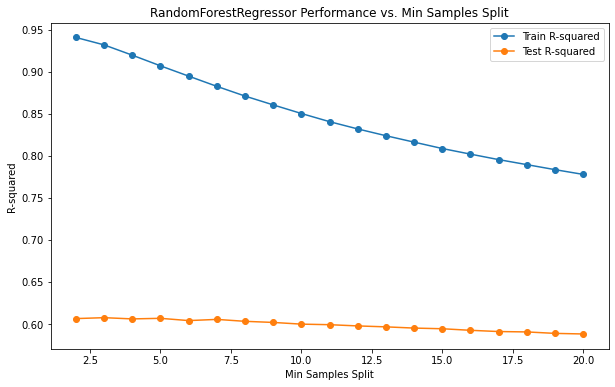

In [111]:
min_samples_split_values = np.arange(2, 21)

# Lists to store R-squared values for both training and testing
train_rsq_values = []
test_rsq_values = []

# Loop through different min_samples_split values
for min_samples_split in min_samples_split_values:
    # Create the RandomForestRegressor
    rf_regressor = RandomForestRegressor(min_samples_split=min_samples_split, random_state=42)
    
    # Fit the model on training data
    rf_regressor.fit(X_train, y_train)
    
    # Calculate R-squared values for training set
    train_rsq_values.append(rf_regressor.score(X_train, y_train))
    
    # Calculate R-squared values for testing set
    test_rsq_values.append(rf_regressor.score(X_test, y_test))

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(min_samples_split_values, train_rsq_values, label='Train R-squared', marker='o')
plt.plot(min_samples_split_values, test_rsq_values, label='Test R-squared', marker='o')
plt.title('RandomForestRegressor Performance vs. Min Samples Split')
plt.xlabel('Min Samples Split')
plt.ylabel('R-squared')
plt.legend()
plt.show()

# more splits help to reduce overfitting

##### min sample vs rsq (range: 10-100)

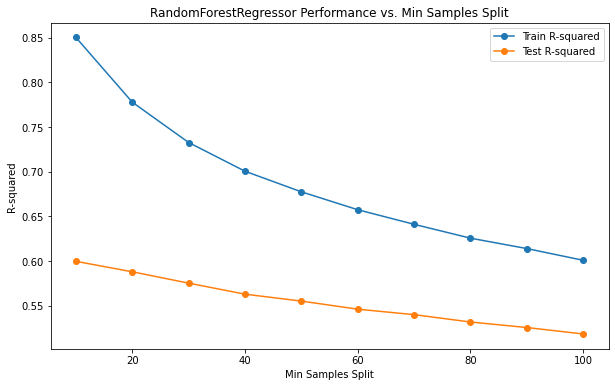

In [112]:
min_samples_split_values = np.arange(10, 110,10)

# Lists to store R-squared values for both training and testing
train_rsq_values = []
test_rsq_values = []

# Loop through different min_samples_split values
for min_samples_split in min_samples_split_values:
    # Create the RandomForestRegressor
    rf_regressor = RandomForestRegressor(min_samples_split=min_samples_split, random_state=42)
    
    # Fit the model on training data
    rf_regressor.fit(X_train, y_train)
    
    # Calculate R-squared values for training set
    train_rsq_values.append(rf_regressor.score(X_train, y_train))
    
    # Calculate R-squared values for testing set
    test_rsq_values.append(rf_regressor.score(X_test, y_test))

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(min_samples_split_values, train_rsq_values, label='Train R-squared', marker='o')
plt.plot(min_samples_split_values, test_rsq_values, label='Test R-squared', marker='o')
plt.title('RandomForestRegressor Performance vs. Min Samples Split')
plt.xlabel('Min Samples Split')
plt.ylabel('R-squared')
plt.legend()
plt.show()

# more splits help to reduce overfitting

### 2.3.1.1 (d) min_samples_leaf

##### min_samples_leaf vs. train and test

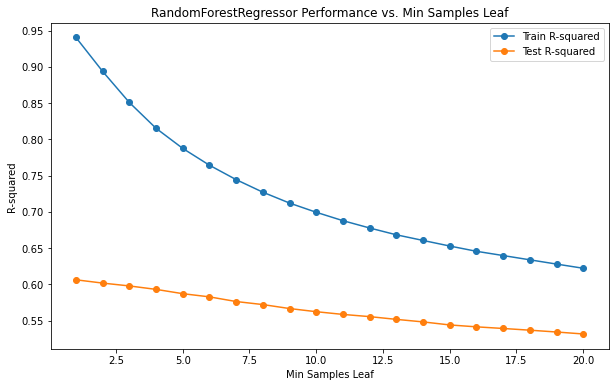

In [113]:
min_samples_leaf_values = np.arange(1, 21)

# Lists to store R-squared values for both training and testing
train_rsq_values = []
test_rsq_values = []

# Loop through different min_samples_leaf values
for min_samples_leaf in min_samples_leaf_values:
    # Create the RandomForestRegressor
    rf_regressor = RandomForestRegressor(min_samples_leaf=min_samples_leaf, random_state=42)
    
    # Fit the model on training data
    rf_regressor.fit(X_train, y_train)
    
    # Calculate R-squared values for training set
    train_rsq_values.append(rf_regressor.score(X_train, y_train))
    
    # Calculate R-squared values for testing set
    test_rsq_values.append(rf_regressor.score(X_test, y_test))

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(min_samples_leaf_values, train_rsq_values, label='Train R-squared', marker='o')
plt.plot(min_samples_leaf_values, test_rsq_values, label='Test R-squared', marker='o')
plt.title('RandomForestRegressor Performance vs. Min Samples Leaf')
plt.xlabel('Min Samples Leaf')
plt.ylabel('R-squared')
plt.legend()
plt.show()

# leaf samples help to reduce overfitting but might reduce the scores

### 2.3.1.2 Hyperparameter Optimization 

In [114]:
rfr_models = [rfr]


rfr_names = ['base']

### 2.3.1.2 (a) GridSearchCV

##### 1st iteration

In [115]:
param_grid = {'n_estimators' : [20,30,40], # this is where the model tends to be at its best, and at lower number of trees 
              'criterion' : ['friedman_mse','absoulte_error','squared_error','poisson'],
              'max_depth' : [30,40,50],
              'min_samples_split':[70,80,90], # where the model is least overfit
              'min_samples_leaf':[10,15,20]}# where the model is least overfit

In [116]:
start_time = time.time()

grid = GridSearchCV(estimator=rfr, param_grid=param_grid, scoring='r2',verbose = 3,refit=True).fit(X_train,y_train)

end_time = time.time()

elapsed_time = end_time - start_time

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
[CV 1/5] END criterion=friedman_mse, max_depth=30, min_samples_leaf=10, min_samples_split=70, n_estimators=20;, score=0.501 total time=   0.0s
[CV 2/5] END criterion=friedman_mse, max_depth=30, min_samples_leaf=10, min_samples_split=70, n_estimators=20;, score=0.534 total time=   0.0s
[CV 3/5] END criterion=friedman_mse, max_depth=30, min_samples_leaf=10, min_samples_split=70, n_estimators=20;, score=0.536 total time=   0.0s
[CV 4/5] END criterion=friedman_mse, max_depth=30, min_samples_leaf=10, min_samples_split=70, n_estimators=20;, score=0.520 total time=   0.0s
[CV 5/5] END criterion=friedman_mse, max_depth=30, min_samples_leaf=10, min_samples_split=70, n_estimators=20;, score=0.542 total time=   0.0s
[CV 1/5] END criterion=friedman_mse, max_depth=30, min_samples_leaf=10, min_samples_split=70, n_estimators=30;, score=0.497 total time=   0.1s
[CV 2/5] END criterion=friedman_mse, max_depth=30, min_samples_leaf=10, min_sa

[CV 3/5] END criterion=friedman_mse, max_depth=30, min_samples_leaf=15, min_samples_split=70, n_estimators=40;, score=0.538 total time=   0.1s
[CV 4/5] END criterion=friedman_mse, max_depth=30, min_samples_leaf=15, min_samples_split=70, n_estimators=40;, score=0.515 total time=   0.1s
[CV 5/5] END criterion=friedman_mse, max_depth=30, min_samples_leaf=15, min_samples_split=70, n_estimators=40;, score=0.543 total time=   0.1s
[CV 1/5] END criterion=friedman_mse, max_depth=30, min_samples_leaf=15, min_samples_split=80, n_estimators=20;, score=0.493 total time=   0.0s
[CV 2/5] END criterion=friedman_mse, max_depth=30, min_samples_leaf=15, min_samples_split=80, n_estimators=20;, score=0.525 total time=   0.0s
[CV 3/5] END criterion=friedman_mse, max_depth=30, min_samples_leaf=15, min_samples_split=80, n_estimators=20;, score=0.527 total time=   0.0s
[CV 4/5] END criterion=friedman_mse, max_depth=30, min_samples_leaf=15, min_samples_split=80, n_estimators=20;, score=0.509 total time=   0.0s

[CV 1/5] END criterion=friedman_mse, max_depth=30, min_samples_leaf=20, min_samples_split=80, n_estimators=40;, score=0.484 total time=   0.1s
[CV 2/5] END criterion=friedman_mse, max_depth=30, min_samples_leaf=20, min_samples_split=80, n_estimators=40;, score=0.526 total time=   0.1s
[CV 3/5] END criterion=friedman_mse, max_depth=30, min_samples_leaf=20, min_samples_split=80, n_estimators=40;, score=0.530 total time=   0.1s
[CV 4/5] END criterion=friedman_mse, max_depth=30, min_samples_leaf=20, min_samples_split=80, n_estimators=40;, score=0.503 total time=   0.1s
[CV 5/5] END criterion=friedman_mse, max_depth=30, min_samples_leaf=20, min_samples_split=80, n_estimators=40;, score=0.536 total time=   0.1s
[CV 1/5] END criterion=friedman_mse, max_depth=30, min_samples_leaf=20, min_samples_split=90, n_estimators=20;, score=0.484 total time=   0.0s
[CV 2/5] END criterion=friedman_mse, max_depth=30, min_samples_leaf=20, min_samples_split=90, n_estimators=20;, score=0.519 total time=   0.0s

[CV 5/5] END criterion=friedman_mse, max_depth=40, min_samples_leaf=10, min_samples_split=90, n_estimators=30;, score=0.536 total time=   0.1s
[CV 1/5] END criterion=friedman_mse, max_depth=40, min_samples_leaf=10, min_samples_split=90, n_estimators=40;, score=0.488 total time=   0.1s
[CV 2/5] END criterion=friedman_mse, max_depth=40, min_samples_leaf=10, min_samples_split=90, n_estimators=40;, score=0.527 total time=   0.1s
[CV 3/5] END criterion=friedman_mse, max_depth=40, min_samples_leaf=10, min_samples_split=90, n_estimators=40;, score=0.530 total time=   0.1s
[CV 4/5] END criterion=friedman_mse, max_depth=40, min_samples_leaf=10, min_samples_split=90, n_estimators=40;, score=0.508 total time=   0.1s
[CV 5/5] END criterion=friedman_mse, max_depth=40, min_samples_leaf=10, min_samples_split=90, n_estimators=40;, score=0.535 total time=   0.1s
[CV 1/5] END criterion=friedman_mse, max_depth=40, min_samples_leaf=15, min_samples_split=70, n_estimators=20;, score=0.496 total time=   0.0s

[CV 4/5] END criterion=friedman_mse, max_depth=40, min_samples_leaf=20, min_samples_split=70, n_estimators=30;, score=0.510 total time=   0.1s
[CV 5/5] END criterion=friedman_mse, max_depth=40, min_samples_leaf=20, min_samples_split=70, n_estimators=30;, score=0.542 total time=   0.1s
[CV 1/5] END criterion=friedman_mse, max_depth=40, min_samples_leaf=20, min_samples_split=70, n_estimators=40;, score=0.488 total time=   0.1s
[CV 2/5] END criterion=friedman_mse, max_depth=40, min_samples_leaf=20, min_samples_split=70, n_estimators=40;, score=0.529 total time=   0.1s
[CV 3/5] END criterion=friedman_mse, max_depth=40, min_samples_leaf=20, min_samples_split=70, n_estimators=40;, score=0.534 total time=   0.1s
[CV 4/5] END criterion=friedman_mse, max_depth=40, min_samples_leaf=20, min_samples_split=70, n_estimators=40;, score=0.507 total time=   0.1s
[CV 5/5] END criterion=friedman_mse, max_depth=40, min_samples_leaf=20, min_samples_split=70, n_estimators=40;, score=0.541 total time=   0.1s

[CV 3/5] END criterion=friedman_mse, max_depth=50, min_samples_leaf=10, min_samples_split=80, n_estimators=30;, score=0.533 total time=   0.1s
[CV 4/5] END criterion=friedman_mse, max_depth=50, min_samples_leaf=10, min_samples_split=80, n_estimators=30;, score=0.513 total time=   0.1s
[CV 5/5] END criterion=friedman_mse, max_depth=50, min_samples_leaf=10, min_samples_split=80, n_estimators=30;, score=0.542 total time=   0.1s
[CV 1/5] END criterion=friedman_mse, max_depth=50, min_samples_leaf=10, min_samples_split=80, n_estimators=40;, score=0.494 total time=   0.1s
[CV 2/5] END criterion=friedman_mse, max_depth=50, min_samples_leaf=10, min_samples_split=80, n_estimators=40;, score=0.532 total time=   0.1s
[CV 3/5] END criterion=friedman_mse, max_depth=50, min_samples_leaf=10, min_samples_split=80, n_estimators=40;, score=0.535 total time=   0.1s
[CV 4/5] END criterion=friedman_mse, max_depth=50, min_samples_leaf=10, min_samples_split=80, n_estimators=40;, score=0.512 total time=   0.1s

[CV 2/5] END criterion=friedman_mse, max_depth=50, min_samples_leaf=15, min_samples_split=90, n_estimators=30;, score=0.526 total time=   0.1s
[CV 3/5] END criterion=friedman_mse, max_depth=50, min_samples_leaf=15, min_samples_split=90, n_estimators=30;, score=0.525 total time=   0.1s
[CV 4/5] END criterion=friedman_mse, max_depth=50, min_samples_leaf=15, min_samples_split=90, n_estimators=30;, score=0.508 total time=   0.1s
[CV 5/5] END criterion=friedman_mse, max_depth=50, min_samples_leaf=15, min_samples_split=90, n_estimators=30;, score=0.534 total time=   0.1s
[CV 1/5] END criterion=friedman_mse, max_depth=50, min_samples_leaf=15, min_samples_split=90, n_estimators=40;, score=0.485 total time=   0.1s
[CV 2/5] END criterion=friedman_mse, max_depth=50, min_samples_leaf=15, min_samples_split=90, n_estimators=40;, score=0.525 total time=   0.1s
[CV 3/5] END criterion=friedman_mse, max_depth=50, min_samples_leaf=15, min_samples_split=90, n_estimators=40;, score=0.526 total time=   0.1s

[CV 5/5] END criterion=absoulte_error, max_depth=30, min_samples_leaf=10, min_samples_split=80, n_estimators=30;, score=nan total time=   0.0s
[CV 1/5] END criterion=absoulte_error, max_depth=30, min_samples_leaf=10, min_samples_split=80, n_estimators=40;, score=nan total time=   0.0s
[CV 2/5] END criterion=absoulte_error, max_depth=30, min_samples_leaf=10, min_samples_split=80, n_estimators=40;, score=nan total time=   0.0s
[CV 3/5] END criterion=absoulte_error, max_depth=30, min_samples_leaf=10, min_samples_split=80, n_estimators=40;, score=nan total time=   0.0s
[CV 4/5] END criterion=absoulte_error, max_depth=30, min_samples_leaf=10, min_samples_split=80, n_estimators=40;, score=nan total time=   0.0s
[CV 5/5] END criterion=absoulte_error, max_depth=30, min_samples_leaf=10, min_samples_split=80, n_estimators=40;, score=nan total time=   0.0s
[CV 1/5] END criterion=absoulte_error, max_depth=30, min_samples_leaf=10, min_samples_split=90, n_estimators=20;, score=nan total time=   0.0s

[CV 5/5] END criterion=absoulte_error, max_depth=30, min_samples_leaf=15, min_samples_split=90, n_estimators=40;, score=nan total time=   0.0s
[CV 1/5] END criterion=absoulte_error, max_depth=30, min_samples_leaf=20, min_samples_split=70, n_estimators=20;, score=nan total time=   0.0s
[CV 2/5] END criterion=absoulte_error, max_depth=30, min_samples_leaf=20, min_samples_split=70, n_estimators=20;, score=nan total time=   0.0s
[CV 3/5] END criterion=absoulte_error, max_depth=30, min_samples_leaf=20, min_samples_split=70, n_estimators=20;, score=nan total time=   0.0s
[CV 4/5] END criterion=absoulte_error, max_depth=30, min_samples_leaf=20, min_samples_split=70, n_estimators=20;, score=nan total time=   0.0s
[CV 5/5] END criterion=absoulte_error, max_depth=30, min_samples_leaf=20, min_samples_split=70, n_estimators=20;, score=nan total time=   0.0s
[CV 1/5] END criterion=absoulte_error, max_depth=30, min_samples_leaf=20, min_samples_split=70, n_estimators=30;, score=nan total time=   0.0s

[CV 2/5] END criterion=absoulte_error, max_depth=40, min_samples_leaf=10, min_samples_split=80, n_estimators=30;, score=nan total time=   0.0s
[CV 3/5] END criterion=absoulte_error, max_depth=40, min_samples_leaf=10, min_samples_split=80, n_estimators=30;, score=nan total time=   0.0s
[CV 4/5] END criterion=absoulte_error, max_depth=40, min_samples_leaf=10, min_samples_split=80, n_estimators=30;, score=nan total time=   0.0s
[CV 5/5] END criterion=absoulte_error, max_depth=40, min_samples_leaf=10, min_samples_split=80, n_estimators=30;, score=nan total time=   0.0s
[CV 1/5] END criterion=absoulte_error, max_depth=40, min_samples_leaf=10, min_samples_split=80, n_estimators=40;, score=nan total time=   0.0s
[CV 2/5] END criterion=absoulte_error, max_depth=40, min_samples_leaf=10, min_samples_split=80, n_estimators=40;, score=nan total time=   0.0s
[CV 3/5] END criterion=absoulte_error, max_depth=40, min_samples_leaf=10, min_samples_split=80, n_estimators=40;, score=nan total time=   0.0s

[CV 4/5] END criterion=absoulte_error, max_depth=40, min_samples_leaf=15, min_samples_split=90, n_estimators=40;, score=nan total time=   0.0s
[CV 5/5] END criterion=absoulte_error, max_depth=40, min_samples_leaf=15, min_samples_split=90, n_estimators=40;, score=nan total time=   0.0s
[CV 1/5] END criterion=absoulte_error, max_depth=40, min_samples_leaf=20, min_samples_split=70, n_estimators=20;, score=nan total time=   0.0s
[CV 2/5] END criterion=absoulte_error, max_depth=40, min_samples_leaf=20, min_samples_split=70, n_estimators=20;, score=nan total time=   0.0s
[CV 3/5] END criterion=absoulte_error, max_depth=40, min_samples_leaf=20, min_samples_split=70, n_estimators=20;, score=nan total time=   0.0s
[CV 4/5] END criterion=absoulte_error, max_depth=40, min_samples_leaf=20, min_samples_split=70, n_estimators=20;, score=nan total time=   0.0s
[CV 5/5] END criterion=absoulte_error, max_depth=40, min_samples_leaf=20, min_samples_split=70, n_estimators=20;, score=nan total time=   0.0s

[CV 3/5] END criterion=absoulte_error, max_depth=50, min_samples_leaf=10, min_samples_split=80, n_estimators=30;, score=nan total time=   0.0s
[CV 4/5] END criterion=absoulte_error, max_depth=50, min_samples_leaf=10, min_samples_split=80, n_estimators=30;, score=nan total time=   0.0s
[CV 5/5] END criterion=absoulte_error, max_depth=50, min_samples_leaf=10, min_samples_split=80, n_estimators=30;, score=nan total time=   0.0s
[CV 1/5] END criterion=absoulte_error, max_depth=50, min_samples_leaf=10, min_samples_split=80, n_estimators=40;, score=nan total time=   0.0s
[CV 2/5] END criterion=absoulte_error, max_depth=50, min_samples_leaf=10, min_samples_split=80, n_estimators=40;, score=nan total time=   0.0s
[CV 3/5] END criterion=absoulte_error, max_depth=50, min_samples_leaf=10, min_samples_split=80, n_estimators=40;, score=nan total time=   0.0s
[CV 4/5] END criterion=absoulte_error, max_depth=50, min_samples_leaf=10, min_samples_split=80, n_estimators=40;, score=nan total time=   0.0s

[CV 3/5] END criterion=absoulte_error, max_depth=50, min_samples_leaf=15, min_samples_split=90, n_estimators=40;, score=nan total time=   0.0s
[CV 4/5] END criterion=absoulte_error, max_depth=50, min_samples_leaf=15, min_samples_split=90, n_estimators=40;, score=nan total time=   0.0s
[CV 5/5] END criterion=absoulte_error, max_depth=50, min_samples_leaf=15, min_samples_split=90, n_estimators=40;, score=nan total time=   0.0s
[CV 1/5] END criterion=absoulte_error, max_depth=50, min_samples_leaf=20, min_samples_split=70, n_estimators=20;, score=nan total time=   0.0s
[CV 2/5] END criterion=absoulte_error, max_depth=50, min_samples_leaf=20, min_samples_split=70, n_estimators=20;, score=nan total time=   0.0s
[CV 3/5] END criterion=absoulte_error, max_depth=50, min_samples_leaf=20, min_samples_split=70, n_estimators=20;, score=nan total time=   0.0s
[CV 4/5] END criterion=absoulte_error, max_depth=50, min_samples_leaf=20, min_samples_split=70, n_estimators=20;, score=nan total time=   0.0s

[CV 1/5] END criterion=squared_error, max_depth=30, min_samples_leaf=10, min_samples_split=70, n_estimators=40;, score=0.498 total time=   0.1s
[CV 2/5] END criterion=squared_error, max_depth=30, min_samples_leaf=10, min_samples_split=70, n_estimators=40;, score=0.539 total time=   0.1s
[CV 3/5] END criterion=squared_error, max_depth=30, min_samples_leaf=10, min_samples_split=70, n_estimators=40;, score=0.543 total time=   0.1s
[CV 4/5] END criterion=squared_error, max_depth=30, min_samples_leaf=10, min_samples_split=70, n_estimators=40;, score=0.519 total time=   0.1s
[CV 5/5] END criterion=squared_error, max_depth=30, min_samples_leaf=10, min_samples_split=70, n_estimators=40;, score=0.547 total time=   0.1s
[CV 1/5] END criterion=squared_error, max_depth=30, min_samples_leaf=10, min_samples_split=80, n_estimators=20;, score=0.497 total time=   0.0s
[CV 2/5] END criterion=squared_error, max_depth=30, min_samples_leaf=10, min_samples_split=80, n_estimators=20;, score=0.528 total time=

[CV 3/5] END criterion=squared_error, max_depth=30, min_samples_leaf=15, min_samples_split=80, n_estimators=30;, score=0.529 total time=   0.2s
[CV 4/5] END criterion=squared_error, max_depth=30, min_samples_leaf=15, min_samples_split=80, n_estimators=30;, score=0.512 total time=   0.1s
[CV 5/5] END criterion=squared_error, max_depth=30, min_samples_leaf=15, min_samples_split=80, n_estimators=30;, score=0.539 total time=   0.1s
[CV 1/5] END criterion=squared_error, max_depth=30, min_samples_leaf=15, min_samples_split=80, n_estimators=40;, score=0.489 total time=   0.1s
[CV 2/5] END criterion=squared_error, max_depth=30, min_samples_leaf=15, min_samples_split=80, n_estimators=40;, score=0.530 total time=   0.1s
[CV 3/5] END criterion=squared_error, max_depth=30, min_samples_leaf=15, min_samples_split=80, n_estimators=40;, score=0.532 total time=   0.1s
[CV 4/5] END criterion=squared_error, max_depth=30, min_samples_leaf=15, min_samples_split=80, n_estimators=40;, score=0.509 total time=

[CV 5/5] END criterion=squared_error, max_depth=30, min_samples_leaf=20, min_samples_split=90, n_estimators=20;, score=0.526 total time=   0.0s
[CV 1/5] END criterion=squared_error, max_depth=30, min_samples_leaf=20, min_samples_split=90, n_estimators=30;, score=0.480 total time=   0.1s
[CV 2/5] END criterion=squared_error, max_depth=30, min_samples_leaf=20, min_samples_split=90, n_estimators=30;, score=0.523 total time=   0.1s
[CV 3/5] END criterion=squared_error, max_depth=30, min_samples_leaf=20, min_samples_split=90, n_estimators=30;, score=0.526 total time=   0.1s
[CV 4/5] END criterion=squared_error, max_depth=30, min_samples_leaf=20, min_samples_split=90, n_estimators=30;, score=0.503 total time=   0.1s
[CV 5/5] END criterion=squared_error, max_depth=30, min_samples_leaf=20, min_samples_split=90, n_estimators=30;, score=0.532 total time=   0.1s
[CV 1/5] END criterion=squared_error, max_depth=30, min_samples_leaf=20, min_samples_split=90, n_estimators=40;, score=0.480 total time=

[CV 2/5] END criterion=squared_error, max_depth=40, min_samples_leaf=15, min_samples_split=70, n_estimators=20;, score=0.528 total time=   0.0s
[CV 3/5] END criterion=squared_error, max_depth=40, min_samples_leaf=15, min_samples_split=70, n_estimators=20;, score=0.535 total time=   0.0s
[CV 4/5] END criterion=squared_error, max_depth=40, min_samples_leaf=15, min_samples_split=70, n_estimators=20;, score=0.516 total time=   0.0s
[CV 5/5] END criterion=squared_error, max_depth=40, min_samples_leaf=15, min_samples_split=70, n_estimators=20;, score=0.537 total time=   0.0s
[CV 1/5] END criterion=squared_error, max_depth=40, min_samples_leaf=15, min_samples_split=70, n_estimators=30;, score=0.491 total time=   0.1s
[CV 2/5] END criterion=squared_error, max_depth=40, min_samples_leaf=15, min_samples_split=70, n_estimators=30;, score=0.534 total time=   0.1s
[CV 3/5] END criterion=squared_error, max_depth=40, min_samples_leaf=15, min_samples_split=70, n_estimators=30;, score=0.536 total time=

[CV 5/5] END criterion=squared_error, max_depth=40, min_samples_leaf=20, min_samples_split=70, n_estimators=40;, score=0.541 total time=   0.1s
[CV 1/5] END criterion=squared_error, max_depth=40, min_samples_leaf=20, min_samples_split=80, n_estimators=20;, score=0.488 total time=   0.0s
[CV 2/5] END criterion=squared_error, max_depth=40, min_samples_leaf=20, min_samples_split=80, n_estimators=20;, score=0.524 total time=   0.0s
[CV 3/5] END criterion=squared_error, max_depth=40, min_samples_leaf=20, min_samples_split=80, n_estimators=20;, score=0.527 total time=   0.0s
[CV 4/5] END criterion=squared_error, max_depth=40, min_samples_leaf=20, min_samples_split=80, n_estimators=20;, score=0.504 total time=   0.0s
[CV 5/5] END criterion=squared_error, max_depth=40, min_samples_leaf=20, min_samples_split=80, n_estimators=20;, score=0.531 total time=   0.0s
[CV 1/5] END criterion=squared_error, max_depth=40, min_samples_leaf=20, min_samples_split=80, n_estimators=30;, score=0.483 total time=

[CV 3/5] END criterion=squared_error, max_depth=50, min_samples_leaf=10, min_samples_split=80, n_estimators=40;, score=0.535 total time=   0.1s
[CV 4/5] END criterion=squared_error, max_depth=50, min_samples_leaf=10, min_samples_split=80, n_estimators=40;, score=0.512 total time=   0.1s
[CV 5/5] END criterion=squared_error, max_depth=50, min_samples_leaf=10, min_samples_split=80, n_estimators=40;, score=0.541 total time=   0.1s
[CV 1/5] END criterion=squared_error, max_depth=50, min_samples_leaf=10, min_samples_split=90, n_estimators=20;, score=0.492 total time=   0.0s
[CV 2/5] END criterion=squared_error, max_depth=50, min_samples_leaf=10, min_samples_split=90, n_estimators=20;, score=0.523 total time=   0.0s
[CV 3/5] END criterion=squared_error, max_depth=50, min_samples_leaf=10, min_samples_split=90, n_estimators=20;, score=0.525 total time=   0.0s
[CV 4/5] END criterion=squared_error, max_depth=50, min_samples_leaf=10, min_samples_split=90, n_estimators=20;, score=0.508 total time=

[CV 5/5] END criterion=squared_error, max_depth=50, min_samples_leaf=15, min_samples_split=90, n_estimators=30;, score=0.534 total time=   0.1s
[CV 1/5] END criterion=squared_error, max_depth=50, min_samples_leaf=15, min_samples_split=90, n_estimators=40;, score=0.485 total time=   0.1s
[CV 2/5] END criterion=squared_error, max_depth=50, min_samples_leaf=15, min_samples_split=90, n_estimators=40;, score=0.525 total time=   0.1s
[CV 3/5] END criterion=squared_error, max_depth=50, min_samples_leaf=15, min_samples_split=90, n_estimators=40;, score=0.526 total time=   0.2s
[CV 4/5] END criterion=squared_error, max_depth=50, min_samples_leaf=15, min_samples_split=90, n_estimators=40;, score=0.504 total time=   0.2s
[CV 5/5] END criterion=squared_error, max_depth=50, min_samples_leaf=15, min_samples_split=90, n_estimators=40;, score=0.532 total time=   0.2s
[CV 1/5] END criterion=squared_error, max_depth=50, min_samples_leaf=20, min_samples_split=70, n_estimators=20;, score=0.490 total time=

[CV 3/5] END criterion=poisson, max_depth=30, min_samples_leaf=10, min_samples_split=70, n_estimators=30;, score=0.320 total time=   0.3s
[CV 4/5] END criterion=poisson, max_depth=30, min_samples_leaf=10, min_samples_split=70, n_estimators=30;, score=0.328 total time=   0.3s
[CV 5/5] END criterion=poisson, max_depth=30, min_samples_leaf=10, min_samples_split=70, n_estimators=30;, score=0.315 total time=   0.3s
[CV 1/5] END criterion=poisson, max_depth=30, min_samples_leaf=10, min_samples_split=70, n_estimators=40;, score=0.301 total time=   0.4s
[CV 2/5] END criterion=poisson, max_depth=30, min_samples_leaf=10, min_samples_split=70, n_estimators=40;, score=0.329 total time=   0.5s
[CV 3/5] END criterion=poisson, max_depth=30, min_samples_leaf=10, min_samples_split=70, n_estimators=40;, score=0.319 total time=   0.4s
[CV 4/5] END criterion=poisson, max_depth=30, min_samples_leaf=10, min_samples_split=70, n_estimators=40;, score=0.327 total time=   0.5s
[CV 5/5] END criterion=poisson, ma

[CV 3/5] END criterion=poisson, max_depth=30, min_samples_leaf=15, min_samples_split=80, n_estimators=30;, score=0.319 total time=   0.2s
[CV 4/5] END criterion=poisson, max_depth=30, min_samples_leaf=15, min_samples_split=80, n_estimators=30;, score=0.329 total time=   0.3s
[CV 5/5] END criterion=poisson, max_depth=30, min_samples_leaf=15, min_samples_split=80, n_estimators=30;, score=0.312 total time=   0.3s
[CV 1/5] END criterion=poisson, max_depth=30, min_samples_leaf=15, min_samples_split=80, n_estimators=40;, score=0.304 total time=   0.4s
[CV 2/5] END criterion=poisson, max_depth=30, min_samples_leaf=15, min_samples_split=80, n_estimators=40;, score=0.333 total time=   0.4s
[CV 3/5] END criterion=poisson, max_depth=30, min_samples_leaf=15, min_samples_split=80, n_estimators=40;, score=0.322 total time=   0.4s
[CV 4/5] END criterion=poisson, max_depth=30, min_samples_leaf=15, min_samples_split=80, n_estimators=40;, score=0.327 total time=   0.4s
[CV 5/5] END criterion=poisson, ma

[CV 3/5] END criterion=poisson, max_depth=30, min_samples_leaf=20, min_samples_split=90, n_estimators=30;, score=0.316 total time=   0.2s
[CV 4/5] END criterion=poisson, max_depth=30, min_samples_leaf=20, min_samples_split=90, n_estimators=30;, score=0.330 total time=   0.3s
[CV 5/5] END criterion=poisson, max_depth=30, min_samples_leaf=20, min_samples_split=90, n_estimators=30;, score=0.305 total time=   0.2s
[CV 1/5] END criterion=poisson, max_depth=30, min_samples_leaf=20, min_samples_split=90, n_estimators=40;, score=0.294 total time=   0.3s
[CV 2/5] END criterion=poisson, max_depth=30, min_samples_leaf=20, min_samples_split=90, n_estimators=40;, score=0.329 total time=   0.3s
[CV 3/5] END criterion=poisson, max_depth=30, min_samples_leaf=20, min_samples_split=90, n_estimators=40;, score=0.317 total time=   0.3s
[CV 4/5] END criterion=poisson, max_depth=30, min_samples_leaf=20, min_samples_split=90, n_estimators=40;, score=0.328 total time=   0.4s
[CV 5/5] END criterion=poisson, ma

[CV 3/5] END criterion=poisson, max_depth=40, min_samples_leaf=15, min_samples_split=70, n_estimators=30;, score=0.326 total time=   0.3s
[CV 4/5] END criterion=poisson, max_depth=40, min_samples_leaf=15, min_samples_split=70, n_estimators=30;, score=0.336 total time=   0.3s
[CV 5/5] END criterion=poisson, max_depth=40, min_samples_leaf=15, min_samples_split=70, n_estimators=30;, score=0.320 total time=   0.3s
[CV 1/5] END criterion=poisson, max_depth=40, min_samples_leaf=15, min_samples_split=70, n_estimators=40;, score=0.310 total time=   0.4s
[CV 2/5] END criterion=poisson, max_depth=40, min_samples_leaf=15, min_samples_split=70, n_estimators=40;, score=0.340 total time=   0.4s
[CV 3/5] END criterion=poisson, max_depth=40, min_samples_leaf=15, min_samples_split=70, n_estimators=40;, score=0.328 total time=   0.4s
[CV 4/5] END criterion=poisson, max_depth=40, min_samples_leaf=15, min_samples_split=70, n_estimators=40;, score=0.333 total time=   0.4s
[CV 5/5] END criterion=poisson, ma

[CV 3/5] END criterion=poisson, max_depth=40, min_samples_leaf=20, min_samples_split=80, n_estimators=30;, score=0.323 total time=   0.2s
[CV 4/5] END criterion=poisson, max_depth=40, min_samples_leaf=20, min_samples_split=80, n_estimators=30;, score=0.335 total time=   0.3s
[CV 5/5] END criterion=poisson, max_depth=40, min_samples_leaf=20, min_samples_split=80, n_estimators=30;, score=0.313 total time=   0.2s
[CV 1/5] END criterion=poisson, max_depth=40, min_samples_leaf=20, min_samples_split=80, n_estimators=40;, score=0.301 total time=   0.3s
[CV 2/5] END criterion=poisson, max_depth=40, min_samples_leaf=20, min_samples_split=80, n_estimators=40;, score=0.337 total time=   0.3s
[CV 3/5] END criterion=poisson, max_depth=40, min_samples_leaf=20, min_samples_split=80, n_estimators=40;, score=0.325 total time=   0.3s
[CV 4/5] END criterion=poisson, max_depth=40, min_samples_leaf=20, min_samples_split=80, n_estimators=40;, score=0.333 total time=   0.4s
[CV 5/5] END criterion=poisson, ma

[CV 3/5] END criterion=poisson, max_depth=50, min_samples_leaf=10, min_samples_split=90, n_estimators=30;, score=0.305 total time=   0.3s
[CV 4/5] END criterion=poisson, max_depth=50, min_samples_leaf=10, min_samples_split=90, n_estimators=30;, score=0.322 total time=   0.3s
[CV 5/5] END criterion=poisson, max_depth=50, min_samples_leaf=10, min_samples_split=90, n_estimators=30;, score=0.300 total time=   0.3s
[CV 1/5] END criterion=poisson, max_depth=50, min_samples_leaf=10, min_samples_split=90, n_estimators=40;, score=0.289 total time=   0.4s
[CV 2/5] END criterion=poisson, max_depth=50, min_samples_leaf=10, min_samples_split=90, n_estimators=40;, score=0.312 total time=   0.4s
[CV 3/5] END criterion=poisson, max_depth=50, min_samples_leaf=10, min_samples_split=90, n_estimators=40;, score=0.305 total time=   0.4s
[CV 4/5] END criterion=poisson, max_depth=50, min_samples_leaf=10, min_samples_split=90, n_estimators=40;, score=0.320 total time=   0.5s
[CV 5/5] END criterion=poisson, ma

[CV 3/5] END criterion=poisson, max_depth=50, min_samples_leaf=20, min_samples_split=70, n_estimators=30;, score=0.333 total time=   0.2s
[CV 4/5] END criterion=poisson, max_depth=50, min_samples_leaf=20, min_samples_split=70, n_estimators=30;, score=0.342 total time=   0.3s
[CV 5/5] END criterion=poisson, max_depth=50, min_samples_leaf=20, min_samples_split=70, n_estimators=30;, score=0.319 total time=   0.2s
[CV 1/5] END criterion=poisson, max_depth=50, min_samples_leaf=20, min_samples_split=70, n_estimators=40;, score=0.309 total time=   0.3s
[CV 2/5] END criterion=poisson, max_depth=50, min_samples_leaf=20, min_samples_split=70, n_estimators=40;, score=0.343 total time=   0.3s
[CV 3/5] END criterion=poisson, max_depth=50, min_samples_leaf=20, min_samples_split=70, n_estimators=40;, score=0.333 total time=   0.3s
[CV 4/5] END criterion=poisson, max_depth=50, min_samples_leaf=20, min_samples_split=70, n_estimators=40;, score=0.340 total time=   0.4s
[CV 5/5] END criterion=poisson, ma

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
405 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
405 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Parallel(
  File "C:\Users\ASUS\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\ASUS\anaconda3\lib\site-packages\job

In [117]:
print(grid.best_score_)
print(grid.best_params_)

minutes, seconds = divmod(elapsed_time, 60)
formatted_time = "{:02}:{:02}".format(int(minutes), int(seconds))
print("Elapsed Time: {}".format(formatted_time)) 

0.5290978103636085
{'criterion': 'friedman_mse', 'max_depth': 30, 'min_samples_leaf': 10, 'min_samples_split': 70, 'n_estimators': 40}
Elapsed Time: 04:45


Model : RandomForestRegressor(criterion='friedman_mse', max_depth=30,
                      min_samples_leaf=10, min_samples_split=70,
                      n_estimators=40):

R-Square:
0.6091596406730094 (Train R^2 Value)
0.5294146031160302 (Test R^2 Value)

RMSE:
60.99123334683422 (Train RMSE)
69.4061987477211 (Test RMSE)


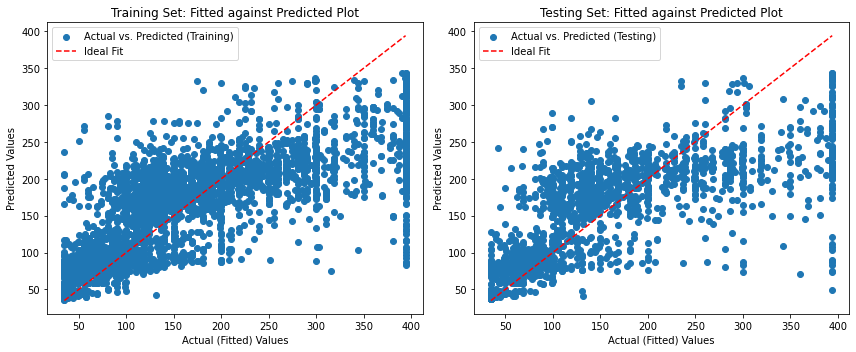

In [118]:
rfr2 = RandomForestRegressor(criterion='friedman_mse',
                             max_depth=30,
                             min_samples_leaf=10,
                             min_samples_split=70,
                             n_estimators=40).fit(X_train,y_train)

model_scores_regression(rfr2)
rfr_models.append(rfr2)
rfr_names.append('rfr2')

# overfitting is reduced by alot

##### 2nd iteration 
- increase scores, we use lower samples split

In [119]:
param_grid = {'n_estimators' : [20,30,40], # this is where the model tends to be at its best, and at lower number of trees 
              'criterion' : ['friedman_mse','absoulte_error','squared_error','poisson'],
              'max_depth' : [30,40,50],
              'min_samples_split':[50,60,70], # where the model is least overfit
              'min_samples_leaf':[10,15,20]}# where the model is least overfit

In [120]:
start_time = time.time()

grid = GridSearchCV(estimator=rfr, param_grid=param_grid, scoring='r2',verbose = 3,refit=True).fit(X_train,y_train)

end_time = time.time()

elapsed_time = end_time - start_time

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
[CV 1/5] END criterion=friedman_mse, max_depth=30, min_samples_leaf=10, min_samples_split=50, n_estimators=20;, score=0.510 total time=   0.0s
[CV 2/5] END criterion=friedman_mse, max_depth=30, min_samples_leaf=10, min_samples_split=50, n_estimators=20;, score=0.541 total time=   0.0s
[CV 3/5] END criterion=friedman_mse, max_depth=30, min_samples_leaf=10, min_samples_split=50, n_estimators=20;, score=0.546 total time=   0.0s
[CV 4/5] END criterion=friedman_mse, max_depth=30, min_samples_leaf=10, min_samples_split=50, n_estimators=20;, score=0.527 total time=   0.0s
[CV 5/5] END criterion=friedman_mse, max_depth=30, min_samples_leaf=10, min_samples_split=50, n_estimators=20;, score=0.546 total time=   0.0s
[CV 1/5] END criterion=friedman_mse, max_depth=30, min_samples_leaf=10, min_samples_split=50, n_estimators=30;, score=0.508 total time=   0.1s
[CV 2/5] END criterion=friedman_mse, max_depth=30, min_samples_leaf=10, min_sa

[CV 3/5] END criterion=friedman_mse, max_depth=30, min_samples_leaf=15, min_samples_split=50, n_estimators=40;, score=0.545 total time=   0.1s
[CV 4/5] END criterion=friedman_mse, max_depth=30, min_samples_leaf=15, min_samples_split=50, n_estimators=40;, score=0.522 total time=   0.1s
[CV 5/5] END criterion=friedman_mse, max_depth=30, min_samples_leaf=15, min_samples_split=50, n_estimators=40;, score=0.548 total time=   0.1s
[CV 1/5] END criterion=friedman_mse, max_depth=30, min_samples_leaf=15, min_samples_split=60, n_estimators=20;, score=0.499 total time=   0.0s
[CV 2/5] END criterion=friedman_mse, max_depth=30, min_samples_leaf=15, min_samples_split=60, n_estimators=20;, score=0.532 total time=   0.0s
[CV 3/5] END criterion=friedman_mse, max_depth=30, min_samples_leaf=15, min_samples_split=60, n_estimators=20;, score=0.539 total time=   0.0s
[CV 4/5] END criterion=friedman_mse, max_depth=30, min_samples_leaf=15, min_samples_split=60, n_estimators=20;, score=0.519 total time=   0.0s

[CV 1/5] END criterion=friedman_mse, max_depth=30, min_samples_leaf=20, min_samples_split=60, n_estimators=40;, score=0.491 total time=   0.1s
[CV 2/5] END criterion=friedman_mse, max_depth=30, min_samples_leaf=20, min_samples_split=60, n_estimators=40;, score=0.534 total time=   0.1s
[CV 3/5] END criterion=friedman_mse, max_depth=30, min_samples_leaf=20, min_samples_split=60, n_estimators=40;, score=0.537 total time=   0.1s
[CV 4/5] END criterion=friedman_mse, max_depth=30, min_samples_leaf=20, min_samples_split=60, n_estimators=40;, score=0.510 total time=   0.1s
[CV 5/5] END criterion=friedman_mse, max_depth=30, min_samples_leaf=20, min_samples_split=60, n_estimators=40;, score=0.544 total time=   0.1s
[CV 1/5] END criterion=friedman_mse, max_depth=30, min_samples_leaf=20, min_samples_split=70, n_estimators=20;, score=0.490 total time=   0.0s
[CV 2/5] END criterion=friedman_mse, max_depth=30, min_samples_leaf=20, min_samples_split=70, n_estimators=20;, score=0.527 total time=   0.0s

[CV 5/5] END criterion=friedman_mse, max_depth=40, min_samples_leaf=10, min_samples_split=70, n_estimators=30;, score=0.548 total time=   0.1s
[CV 1/5] END criterion=friedman_mse, max_depth=40, min_samples_leaf=10, min_samples_split=70, n_estimators=40;, score=0.498 total time=   0.1s
[CV 2/5] END criterion=friedman_mse, max_depth=40, min_samples_leaf=10, min_samples_split=70, n_estimators=40;, score=0.539 total time=   0.1s
[CV 3/5] END criterion=friedman_mse, max_depth=40, min_samples_leaf=10, min_samples_split=70, n_estimators=40;, score=0.543 total time=   0.1s
[CV 4/5] END criterion=friedman_mse, max_depth=40, min_samples_leaf=10, min_samples_split=70, n_estimators=40;, score=0.519 total time=   0.1s
[CV 5/5] END criterion=friedman_mse, max_depth=40, min_samples_leaf=10, min_samples_split=70, n_estimators=40;, score=0.547 total time=   0.1s
[CV 1/5] END criterion=friedman_mse, max_depth=40, min_samples_leaf=15, min_samples_split=50, n_estimators=20;, score=0.504 total time=   0.0s

[CV 3/5] END criterion=friedman_mse, max_depth=40, min_samples_leaf=20, min_samples_split=50, n_estimators=30;, score=0.536 total time=   0.1s
[CV 4/5] END criterion=friedman_mse, max_depth=40, min_samples_leaf=20, min_samples_split=50, n_estimators=30;, score=0.516 total time=   0.1s
[CV 5/5] END criterion=friedman_mse, max_depth=40, min_samples_leaf=20, min_samples_split=50, n_estimators=30;, score=0.547 total time=   0.1s
[CV 1/5] END criterion=friedman_mse, max_depth=40, min_samples_leaf=20, min_samples_split=50, n_estimators=40;, score=0.496 total time=   0.1s
[CV 2/5] END criterion=friedman_mse, max_depth=40, min_samples_leaf=20, min_samples_split=50, n_estimators=40;, score=0.538 total time=   0.1s
[CV 3/5] END criterion=friedman_mse, max_depth=40, min_samples_leaf=20, min_samples_split=50, n_estimators=40;, score=0.539 total time=   0.1s
[CV 4/5] END criterion=friedman_mse, max_depth=40, min_samples_leaf=20, min_samples_split=50, n_estimators=40;, score=0.514 total time=   0.1s

[CV 1/5] END criterion=friedman_mse, max_depth=50, min_samples_leaf=10, min_samples_split=60, n_estimators=30;, score=0.503 total time=   0.1s
[CV 2/5] END criterion=friedman_mse, max_depth=50, min_samples_leaf=10, min_samples_split=60, n_estimators=30;, score=0.544 total time=   0.1s
[CV 3/5] END criterion=friedman_mse, max_depth=50, min_samples_leaf=10, min_samples_split=60, n_estimators=30;, score=0.546 total time=   0.1s
[CV 4/5] END criterion=friedman_mse, max_depth=50, min_samples_leaf=10, min_samples_split=60, n_estimators=30;, score=0.524 total time=   0.1s
[CV 5/5] END criterion=friedman_mse, max_depth=50, min_samples_leaf=10, min_samples_split=60, n_estimators=30;, score=0.550 total time=   0.1s
[CV 1/5] END criterion=friedman_mse, max_depth=50, min_samples_leaf=10, min_samples_split=60, n_estimators=40;, score=0.503 total time=   0.1s
[CV 2/5] END criterion=friedman_mse, max_depth=50, min_samples_leaf=10, min_samples_split=60, n_estimators=40;, score=0.544 total time=   0.1s

[CV 4/5] END criterion=friedman_mse, max_depth=50, min_samples_leaf=15, min_samples_split=70, n_estimators=20;, score=0.516 total time=   0.0s
[CV 5/5] END criterion=friedman_mse, max_depth=50, min_samples_leaf=15, min_samples_split=70, n_estimators=20;, score=0.537 total time=   0.0s
[CV 1/5] END criterion=friedman_mse, max_depth=50, min_samples_leaf=15, min_samples_split=70, n_estimators=30;, score=0.491 total time=   0.1s
[CV 2/5] END criterion=friedman_mse, max_depth=50, min_samples_leaf=15, min_samples_split=70, n_estimators=30;, score=0.534 total time=   0.1s
[CV 3/5] END criterion=friedman_mse, max_depth=50, min_samples_leaf=15, min_samples_split=70, n_estimators=30;, score=0.536 total time=   0.1s
[CV 4/5] END criterion=friedman_mse, max_depth=50, min_samples_leaf=15, min_samples_split=70, n_estimators=30;, score=0.518 total time=   0.1s
[CV 5/5] END criterion=friedman_mse, max_depth=50, min_samples_leaf=15, min_samples_split=70, n_estimators=30;, score=0.544 total time=   0.1s

[CV 4/5] END criterion=absoulte_error, max_depth=30, min_samples_leaf=10, min_samples_split=60, n_estimators=30;, score=nan total time=   0.0s
[CV 5/5] END criterion=absoulte_error, max_depth=30, min_samples_leaf=10, min_samples_split=60, n_estimators=30;, score=nan total time=   0.0s
[CV 1/5] END criterion=absoulte_error, max_depth=30, min_samples_leaf=10, min_samples_split=60, n_estimators=40;, score=nan total time=   0.0s
[CV 2/5] END criterion=absoulte_error, max_depth=30, min_samples_leaf=10, min_samples_split=60, n_estimators=40;, score=nan total time=   0.0s
[CV 3/5] END criterion=absoulte_error, max_depth=30, min_samples_leaf=10, min_samples_split=60, n_estimators=40;, score=nan total time=   0.0s
[CV 4/5] END criterion=absoulte_error, max_depth=30, min_samples_leaf=10, min_samples_split=60, n_estimators=40;, score=nan total time=   0.0s
[CV 5/5] END criterion=absoulte_error, max_depth=30, min_samples_leaf=10, min_samples_split=60, n_estimators=40;, score=nan total time=   0.0s

[CV 5/5] END criterion=absoulte_error, max_depth=30, min_samples_leaf=15, min_samples_split=70, n_estimators=40;, score=nan total time=   0.0s
[CV 1/5] END criterion=absoulte_error, max_depth=30, min_samples_leaf=20, min_samples_split=50, n_estimators=20;, score=nan total time=   0.0s
[CV 2/5] END criterion=absoulte_error, max_depth=30, min_samples_leaf=20, min_samples_split=50, n_estimators=20;, score=nan total time=   0.0s
[CV 3/5] END criterion=absoulte_error, max_depth=30, min_samples_leaf=20, min_samples_split=50, n_estimators=20;, score=nan total time=   0.0s
[CV 4/5] END criterion=absoulte_error, max_depth=30, min_samples_leaf=20, min_samples_split=50, n_estimators=20;, score=nan total time=   0.0s
[CV 5/5] END criterion=absoulte_error, max_depth=30, min_samples_leaf=20, min_samples_split=50, n_estimators=20;, score=nan total time=   0.0s
[CV 1/5] END criterion=absoulte_error, max_depth=30, min_samples_leaf=20, min_samples_split=50, n_estimators=30;, score=nan total time=   0.0s

[CV 4/5] END criterion=absoulte_error, max_depth=40, min_samples_leaf=10, min_samples_split=60, n_estimators=30;, score=nan total time=   0.0s
[CV 5/5] END criterion=absoulte_error, max_depth=40, min_samples_leaf=10, min_samples_split=60, n_estimators=30;, score=nan total time=   0.0s
[CV 1/5] END criterion=absoulte_error, max_depth=40, min_samples_leaf=10, min_samples_split=60, n_estimators=40;, score=nan total time=   0.0s
[CV 2/5] END criterion=absoulte_error, max_depth=40, min_samples_leaf=10, min_samples_split=60, n_estimators=40;, score=nan total time=   0.0s
[CV 3/5] END criterion=absoulte_error, max_depth=40, min_samples_leaf=10, min_samples_split=60, n_estimators=40;, score=nan total time=   0.0s
[CV 4/5] END criterion=absoulte_error, max_depth=40, min_samples_leaf=10, min_samples_split=60, n_estimators=40;, score=nan total time=   0.0s
[CV 5/5] END criterion=absoulte_error, max_depth=40, min_samples_leaf=10, min_samples_split=60, n_estimators=40;, score=nan total time=   0.0s

[CV 1/5] END criterion=absoulte_error, max_depth=40, min_samples_leaf=20, min_samples_split=50, n_estimators=20;, score=nan total time=   0.0s
[CV 2/5] END criterion=absoulte_error, max_depth=40, min_samples_leaf=20, min_samples_split=50, n_estimators=20;, score=nan total time=   0.0s
[CV 3/5] END criterion=absoulte_error, max_depth=40, min_samples_leaf=20, min_samples_split=50, n_estimators=20;, score=nan total time=   0.0s
[CV 4/5] END criterion=absoulte_error, max_depth=40, min_samples_leaf=20, min_samples_split=50, n_estimators=20;, score=nan total time=   0.0s
[CV 5/5] END criterion=absoulte_error, max_depth=40, min_samples_leaf=20, min_samples_split=50, n_estimators=20;, score=nan total time=   0.0s
[CV 1/5] END criterion=absoulte_error, max_depth=40, min_samples_leaf=20, min_samples_split=50, n_estimators=30;, score=nan total time=   0.0s
[CV 2/5] END criterion=absoulte_error, max_depth=40, min_samples_leaf=20, min_samples_split=50, n_estimators=30;, score=nan total time=   0.0s

[CV 4/5] END criterion=absoulte_error, max_depth=50, min_samples_leaf=10, min_samples_split=60, n_estimators=30;, score=nan total time=   0.0s
[CV 5/5] END criterion=absoulte_error, max_depth=50, min_samples_leaf=10, min_samples_split=60, n_estimators=30;, score=nan total time=   0.0s
[CV 1/5] END criterion=absoulte_error, max_depth=50, min_samples_leaf=10, min_samples_split=60, n_estimators=40;, score=nan total time=   0.0s
[CV 2/5] END criterion=absoulte_error, max_depth=50, min_samples_leaf=10, min_samples_split=60, n_estimators=40;, score=nan total time=   0.0s
[CV 3/5] END criterion=absoulte_error, max_depth=50, min_samples_leaf=10, min_samples_split=60, n_estimators=40;, score=nan total time=   0.0s
[CV 4/5] END criterion=absoulte_error, max_depth=50, min_samples_leaf=10, min_samples_split=60, n_estimators=40;, score=nan total time=   0.0s
[CV 5/5] END criterion=absoulte_error, max_depth=50, min_samples_leaf=10, min_samples_split=60, n_estimators=40;, score=nan total time=   0.0s

[CV 1/5] END criterion=absoulte_error, max_depth=50, min_samples_leaf=20, min_samples_split=50, n_estimators=20;, score=nan total time=   0.0s
[CV 2/5] END criterion=absoulte_error, max_depth=50, min_samples_leaf=20, min_samples_split=50, n_estimators=20;, score=nan total time=   0.0s
[CV 3/5] END criterion=absoulte_error, max_depth=50, min_samples_leaf=20, min_samples_split=50, n_estimators=20;, score=nan total time=   0.0s
[CV 4/5] END criterion=absoulte_error, max_depth=50, min_samples_leaf=20, min_samples_split=50, n_estimators=20;, score=nan total time=   0.0s
[CV 5/5] END criterion=absoulte_error, max_depth=50, min_samples_leaf=20, min_samples_split=50, n_estimators=20;, score=nan total time=   0.0s
[CV 1/5] END criterion=absoulte_error, max_depth=50, min_samples_leaf=20, min_samples_split=50, n_estimators=30;, score=nan total time=   0.0s
[CV 2/5] END criterion=absoulte_error, max_depth=50, min_samples_leaf=20, min_samples_split=50, n_estimators=30;, score=nan total time=   0.0s

[CV 4/5] END criterion=squared_error, max_depth=30, min_samples_leaf=10, min_samples_split=50, n_estimators=40;, score=0.526 total time=   0.1s
[CV 5/5] END criterion=squared_error, max_depth=30, min_samples_leaf=10, min_samples_split=50, n_estimators=40;, score=0.554 total time=   0.1s
[CV 1/5] END criterion=squared_error, max_depth=30, min_samples_leaf=10, min_samples_split=60, n_estimators=20;, score=0.506 total time=   0.0s
[CV 2/5] END criterion=squared_error, max_depth=30, min_samples_leaf=10, min_samples_split=60, n_estimators=20;, score=0.539 total time=   0.0s
[CV 3/5] END criterion=squared_error, max_depth=30, min_samples_leaf=10, min_samples_split=60, n_estimators=20;, score=0.542 total time=   0.0s
[CV 4/5] END criterion=squared_error, max_depth=30, min_samples_leaf=10, min_samples_split=60, n_estimators=20;, score=0.523 total time=   0.0s
[CV 5/5] END criterion=squared_error, max_depth=30, min_samples_leaf=10, min_samples_split=60, n_estimators=20;, score=0.543 total time=

[CV 1/5] END criterion=squared_error, max_depth=30, min_samples_leaf=15, min_samples_split=60, n_estimators=40;, score=0.496 total time=   0.1s
[CV 2/5] END criterion=squared_error, max_depth=30, min_samples_leaf=15, min_samples_split=60, n_estimators=40;, score=0.539 total time=   0.1s
[CV 3/5] END criterion=squared_error, max_depth=30, min_samples_leaf=15, min_samples_split=60, n_estimators=40;, score=0.541 total time=   0.1s
[CV 4/5] END criterion=squared_error, max_depth=30, min_samples_leaf=15, min_samples_split=60, n_estimators=40;, score=0.519 total time=   0.1s
[CV 5/5] END criterion=squared_error, max_depth=30, min_samples_leaf=15, min_samples_split=60, n_estimators=40;, score=0.545 total time=   0.1s
[CV 1/5] END criterion=squared_error, max_depth=30, min_samples_leaf=15, min_samples_split=70, n_estimators=20;, score=0.496 total time=   0.0s
[CV 2/5] END criterion=squared_error, max_depth=30, min_samples_leaf=15, min_samples_split=70, n_estimators=20;, score=0.528 total time=

[CV 3/5] END criterion=squared_error, max_depth=30, min_samples_leaf=20, min_samples_split=70, n_estimators=30;, score=0.532 total time=   0.1s
[CV 4/5] END criterion=squared_error, max_depth=30, min_samples_leaf=20, min_samples_split=70, n_estimators=30;, score=0.510 total time=   0.1s
[CV 5/5] END criterion=squared_error, max_depth=30, min_samples_leaf=20, min_samples_split=70, n_estimators=30;, score=0.542 total time=   0.1s
[CV 1/5] END criterion=squared_error, max_depth=30, min_samples_leaf=20, min_samples_split=70, n_estimators=40;, score=0.488 total time=   0.1s
[CV 2/5] END criterion=squared_error, max_depth=30, min_samples_leaf=20, min_samples_split=70, n_estimators=40;, score=0.529 total time=   0.1s
[CV 3/5] END criterion=squared_error, max_depth=30, min_samples_leaf=20, min_samples_split=70, n_estimators=40;, score=0.534 total time=   0.1s
[CV 4/5] END criterion=squared_error, max_depth=30, min_samples_leaf=20, min_samples_split=70, n_estimators=40;, score=0.507 total time=

[CV 1/5] END criterion=squared_error, max_depth=40, min_samples_leaf=15, min_samples_split=50, n_estimators=30;, score=0.501 total time=   0.1s
[CV 2/5] END criterion=squared_error, max_depth=40, min_samples_leaf=15, min_samples_split=50, n_estimators=30;, score=0.543 total time=   0.1s
[CV 3/5] END criterion=squared_error, max_depth=40, min_samples_leaf=15, min_samples_split=50, n_estimators=30;, score=0.543 total time=   0.1s
[CV 4/5] END criterion=squared_error, max_depth=40, min_samples_leaf=15, min_samples_split=50, n_estimators=30;, score=0.525 total time=   0.1s
[CV 5/5] END criterion=squared_error, max_depth=40, min_samples_leaf=15, min_samples_split=50, n_estimators=30;, score=0.547 total time=   0.1s
[CV 1/5] END criterion=squared_error, max_depth=40, min_samples_leaf=15, min_samples_split=50, n_estimators=40;, score=0.500 total time=   0.1s
[CV 2/5] END criterion=squared_error, max_depth=40, min_samples_leaf=15, min_samples_split=50, n_estimators=40;, score=0.543 total time=

[CV 4/5] END criterion=squared_error, max_depth=40, min_samples_leaf=20, min_samples_split=60, n_estimators=20;, score=0.511 total time=   0.0s
[CV 5/5] END criterion=squared_error, max_depth=40, min_samples_leaf=20, min_samples_split=60, n_estimators=20;, score=0.538 total time=   0.0s
[CV 1/5] END criterion=squared_error, max_depth=40, min_samples_leaf=20, min_samples_split=60, n_estimators=30;, score=0.492 total time=   0.1s
[CV 2/5] END criterion=squared_error, max_depth=40, min_samples_leaf=20, min_samples_split=60, n_estimators=30;, score=0.534 total time=   0.1s
[CV 3/5] END criterion=squared_error, max_depth=40, min_samples_leaf=20, min_samples_split=60, n_estimators=30;, score=0.535 total time=   0.1s
[CV 4/5] END criterion=squared_error, max_depth=40, min_samples_leaf=20, min_samples_split=60, n_estimators=30;, score=0.513 total time=   0.1s
[CV 5/5] END criterion=squared_error, max_depth=40, min_samples_leaf=20, min_samples_split=60, n_estimators=30;, score=0.546 total time=

[CV 2/5] END criterion=squared_error, max_depth=50, min_samples_leaf=10, min_samples_split=70, n_estimators=20;, score=0.534 total time=   0.0s
[CV 3/5] END criterion=squared_error, max_depth=50, min_samples_leaf=10, min_samples_split=70, n_estimators=20;, score=0.536 total time=   0.0s
[CV 4/5] END criterion=squared_error, max_depth=50, min_samples_leaf=10, min_samples_split=70, n_estimators=20;, score=0.520 total time=   0.0s
[CV 5/5] END criterion=squared_error, max_depth=50, min_samples_leaf=10, min_samples_split=70, n_estimators=20;, score=0.542 total time=   0.0s
[CV 1/5] END criterion=squared_error, max_depth=50, min_samples_leaf=10, min_samples_split=70, n_estimators=30;, score=0.497 total time=   0.1s
[CV 2/5] END criterion=squared_error, max_depth=50, min_samples_leaf=10, min_samples_split=70, n_estimators=30;, score=0.539 total time=   0.1s
[CV 3/5] END criterion=squared_error, max_depth=50, min_samples_leaf=10, min_samples_split=70, n_estimators=30;, score=0.540 total time=

[CV 5/5] END criterion=squared_error, max_depth=50, min_samples_leaf=15, min_samples_split=70, n_estimators=40;, score=0.543 total time=   0.1s
[CV 1/5] END criterion=squared_error, max_depth=50, min_samples_leaf=20, min_samples_split=50, n_estimators=20;, score=0.498 total time=   0.0s
[CV 2/5] END criterion=squared_error, max_depth=50, min_samples_leaf=20, min_samples_split=50, n_estimators=20;, score=0.537 total time=   0.0s
[CV 3/5] END criterion=squared_error, max_depth=50, min_samples_leaf=20, min_samples_split=50, n_estimators=20;, score=0.535 total time=   0.0s
[CV 4/5] END criterion=squared_error, max_depth=50, min_samples_leaf=20, min_samples_split=50, n_estimators=20;, score=0.514 total time=   0.0s
[CV 5/5] END criterion=squared_error, max_depth=50, min_samples_leaf=20, min_samples_split=50, n_estimators=20;, score=0.538 total time=   0.0s
[CV 1/5] END criterion=squared_error, max_depth=50, min_samples_leaf=20, min_samples_split=50, n_estimators=30;, score=0.497 total time=

[CV 3/5] END criterion=poisson, max_depth=30, min_samples_leaf=10, min_samples_split=50, n_estimators=40;, score=0.333 total time=   0.5s
[CV 4/5] END criterion=poisson, max_depth=30, min_samples_leaf=10, min_samples_split=50, n_estimators=40;, score=0.343 total time=   0.5s
[CV 5/5] END criterion=poisson, max_depth=30, min_samples_leaf=10, min_samples_split=50, n_estimators=40;, score=0.336 total time=   0.4s
[CV 1/5] END criterion=poisson, max_depth=30, min_samples_leaf=10, min_samples_split=60, n_estimators=20;, score=0.320 total time=   0.2s
[CV 2/5] END criterion=poisson, max_depth=30, min_samples_leaf=10, min_samples_split=60, n_estimators=20;, score=0.332 total time=   0.2s
[CV 3/5] END criterion=poisson, max_depth=30, min_samples_leaf=10, min_samples_split=60, n_estimators=20;, score=0.322 total time=   0.2s
[CV 4/5] END criterion=poisson, max_depth=30, min_samples_leaf=10, min_samples_split=60, n_estimators=20;, score=0.326 total time=   0.2s
[CV 5/5] END criterion=poisson, ma

[CV 3/5] END criterion=poisson, max_depth=30, min_samples_leaf=15, min_samples_split=60, n_estimators=40;, score=0.334 total time=   0.4s
[CV 4/5] END criterion=poisson, max_depth=30, min_samples_leaf=15, min_samples_split=60, n_estimators=40;, score=0.341 total time=   0.5s
[CV 5/5] END criterion=poisson, max_depth=30, min_samples_leaf=15, min_samples_split=60, n_estimators=40;, score=0.330 total time=   0.5s
[CV 1/5] END criterion=poisson, max_depth=30, min_samples_leaf=15, min_samples_split=70, n_estimators=20;, score=0.316 total time=   0.1s
[CV 2/5] END criterion=poisson, max_depth=30, min_samples_leaf=15, min_samples_split=70, n_estimators=20;, score=0.336 total time=   0.1s
[CV 3/5] END criterion=poisson, max_depth=30, min_samples_leaf=15, min_samples_split=70, n_estimators=20;, score=0.318 total time=   0.1s
[CV 4/5] END criterion=poisson, max_depth=30, min_samples_leaf=15, min_samples_split=70, n_estimators=20;, score=0.330 total time=   0.2s
[CV 5/5] END criterion=poisson, ma

[CV 3/5] END criterion=poisson, max_depth=30, min_samples_leaf=20, min_samples_split=70, n_estimators=40;, score=0.333 total time=   0.3s
[CV 4/5] END criterion=poisson, max_depth=30, min_samples_leaf=20, min_samples_split=70, n_estimators=40;, score=0.340 total time=   0.4s
[CV 5/5] END criterion=poisson, max_depth=30, min_samples_leaf=20, min_samples_split=70, n_estimators=40;, score=0.321 total time=   0.3s
[CV 1/5] END criterion=poisson, max_depth=40, min_samples_leaf=10, min_samples_split=50, n_estimators=20;, score=0.324 total time=   0.2s
[CV 2/5] END criterion=poisson, max_depth=40, min_samples_leaf=10, min_samples_split=50, n_estimators=20;, score=0.343 total time=   0.2s
[CV 3/5] END criterion=poisson, max_depth=40, min_samples_leaf=10, min_samples_split=50, n_estimators=20;, score=0.331 total time=   0.2s
[CV 4/5] END criterion=poisson, max_depth=40, min_samples_leaf=10, min_samples_split=50, n_estimators=20;, score=0.340 total time=   0.2s
[CV 5/5] END criterion=poisson, ma

[CV 3/5] END criterion=poisson, max_depth=40, min_samples_leaf=15, min_samples_split=50, n_estimators=40;, score=0.342 total time=   0.4s
[CV 4/5] END criterion=poisson, max_depth=40, min_samples_leaf=15, min_samples_split=50, n_estimators=40;, score=0.351 total time=   0.4s
[CV 5/5] END criterion=poisson, max_depth=40, min_samples_leaf=15, min_samples_split=50, n_estimators=40;, score=0.343 total time=   0.4s
[CV 1/5] END criterion=poisson, max_depth=40, min_samples_leaf=15, min_samples_split=60, n_estimators=20;, score=0.324 total time=   0.2s
[CV 2/5] END criterion=poisson, max_depth=40, min_samples_leaf=15, min_samples_split=60, n_estimators=20;, score=0.345 total time=   0.1s
[CV 3/5] END criterion=poisson, max_depth=40, min_samples_leaf=15, min_samples_split=60, n_estimators=20;, score=0.323 total time=   0.1s
[CV 4/5] END criterion=poisson, max_depth=40, min_samples_leaf=15, min_samples_split=60, n_estimators=20;, score=0.338 total time=   0.2s
[CV 5/5] END criterion=poisson, ma

[CV 3/5] END criterion=poisson, max_depth=40, min_samples_leaf=20, min_samples_split=60, n_estimators=40;, score=0.341 total time=   0.3s
[CV 4/5] END criterion=poisson, max_depth=40, min_samples_leaf=20, min_samples_split=60, n_estimators=40;, score=0.348 total time=   0.4s
[CV 5/5] END criterion=poisson, max_depth=40, min_samples_leaf=20, min_samples_split=60, n_estimators=40;, score=0.330 total time=   0.4s
[CV 1/5] END criterion=poisson, max_depth=40, min_samples_leaf=20, min_samples_split=70, n_estimators=20;, score=0.315 total time=   0.1s
[CV 2/5] END criterion=poisson, max_depth=40, min_samples_leaf=20, min_samples_split=70, n_estimators=20;, score=0.339 total time=   0.1s
[CV 3/5] END criterion=poisson, max_depth=40, min_samples_leaf=20, min_samples_split=70, n_estimators=20;, score=0.320 total time=   0.1s
[CV 4/5] END criterion=poisson, max_depth=40, min_samples_leaf=20, min_samples_split=70, n_estimators=20;, score=0.337 total time=   0.1s
[CV 5/5] END criterion=poisson, ma

[CV 3/5] END criterion=poisson, max_depth=50, min_samples_leaf=10, min_samples_split=70, n_estimators=40;, score=0.320 total time=   0.4s
[CV 4/5] END criterion=poisson, max_depth=50, min_samples_leaf=10, min_samples_split=70, n_estimators=40;, score=0.329 total time=   0.5s
[CV 5/5] END criterion=poisson, max_depth=50, min_samples_leaf=10, min_samples_split=70, n_estimators=40;, score=0.319 total time=   0.4s
[CV 1/5] END criterion=poisson, max_depth=50, min_samples_leaf=15, min_samples_split=50, n_estimators=20;, score=0.332 total time=   0.1s
[CV 2/5] END criterion=poisson, max_depth=50, min_samples_leaf=15, min_samples_split=50, n_estimators=20;, score=0.358 total time=   0.1s
[CV 3/5] END criterion=poisson, max_depth=50, min_samples_leaf=15, min_samples_split=50, n_estimators=20;, score=0.332 total time=   0.1s
[CV 4/5] END criterion=poisson, max_depth=50, min_samples_leaf=15, min_samples_split=50, n_estimators=20;, score=0.349 total time=   0.2s
[CV 5/5] END criterion=poisson, ma

[CV 3/5] END criterion=poisson, max_depth=50, min_samples_leaf=20, min_samples_split=50, n_estimators=40;, score=0.350 total time=   0.3s
[CV 4/5] END criterion=poisson, max_depth=50, min_samples_leaf=20, min_samples_split=50, n_estimators=40;, score=0.357 total time=   0.4s
[CV 5/5] END criterion=poisson, max_depth=50, min_samples_leaf=20, min_samples_split=50, n_estimators=40;, score=0.343 total time=   0.4s
[CV 1/5] END criterion=poisson, max_depth=50, min_samples_leaf=20, min_samples_split=60, n_estimators=20;, score=0.325 total time=   0.1s
[CV 2/5] END criterion=poisson, max_depth=50, min_samples_leaf=20, min_samples_split=60, n_estimators=20;, score=0.345 total time=   0.1s
[CV 3/5] END criterion=poisson, max_depth=50, min_samples_leaf=20, min_samples_split=60, n_estimators=20;, score=0.327 total time=   0.1s
[CV 4/5] END criterion=poisson, max_depth=50, min_samples_leaf=20, min_samples_split=60, n_estimators=20;, score=0.345 total time=   0.1s
[CV 5/5] END criterion=poisson, ma

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
405 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
405 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Parallel(
  File "C:\Users\ASUS\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\ASUS\anaconda3\lib\site-packages\job

In [121]:
print(grid.best_score_)
print(grid.best_params_)

minutes, seconds = divmod(elapsed_time, 60)
formatted_time = "{:02}:{:02}".format(int(minutes), int(seconds))
print("Elapsed Time: {}".format(formatted_time)) 

0.5375649916511221
{'criterion': 'friedman_mse', 'max_depth': 30, 'min_samples_leaf': 10, 'min_samples_split': 50, 'n_estimators': 40}
Elapsed Time: 04:55


Model : RandomForestRegressor(criterion='friedman_mse', max_depth=30,
                      min_samples_leaf=10, min_samples_split=50,
                      n_estimators=40):

R-Square:
0.6373360484907733 (Train R^2 Value)
0.5420685721443024 (Test R^2 Value)

RMSE:
58.751628396792775 (Train RMSE)
68.46667881121851 (Test RMSE)


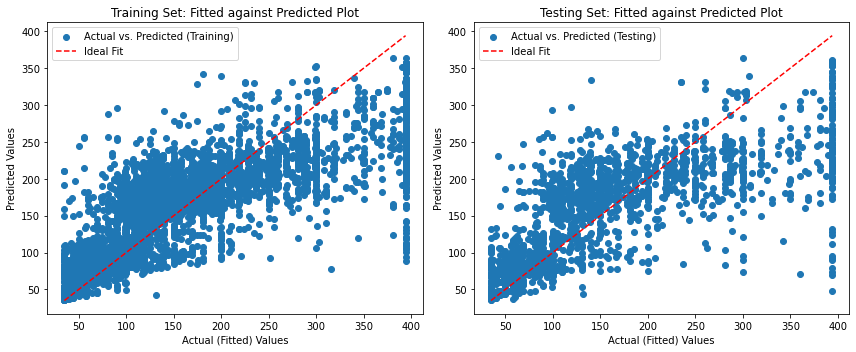

In [122]:
rfr3 = RandomForestRegressor(criterion='friedman_mse',
                             max_depth=30,
                             min_samples_leaf=10,
                             min_samples_split=50,
                             n_estimators=40).fit(X_train,y_train)

model_scores_regression(rfr3)
rfr_models.append(rfr3)
rfr_names.append('rfr3 - lower samples split')

# train score is increasing along with test

##### 3rd iteration - increase estimators
- more trees to increase complexity

In [123]:
param_grid = {'n_estimators' : [100,200,300], # this is where the model tends to be at its best, and at lower number of trees 
              'criterion' : ['friedman_mse','absoulte_error','squared_error','poisson'],
              'max_depth' : [30,40,50],
              'min_samples_split':[50,60,70], # where the model is least overfit
              'min_samples_leaf':[10,15,20]}# where the model is least overfit

In [124]:
start_time = time.time()

grid = GridSearchCV(estimator=rfr, param_grid=param_grid, scoring='r2',verbose = 3,refit=True).fit(X_train,y_train)

end_time = time.time()

elapsed_time = end_time - start_time

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
[CV 1/5] END criterion=friedman_mse, max_depth=30, min_samples_leaf=10, min_samples_split=50, n_estimators=100;, score=0.505 total time=   0.5s
[CV 2/5] END criterion=friedman_mse, max_depth=30, min_samples_leaf=10, min_samples_split=50, n_estimators=100;, score=0.547 total time=   0.5s
[CV 3/5] END criterion=friedman_mse, max_depth=30, min_samples_leaf=10, min_samples_split=50, n_estimators=100;, score=0.551 total time=   0.5s
[CV 4/5] END criterion=friedman_mse, max_depth=30, min_samples_leaf=10, min_samples_split=50, n_estimators=100;, score=0.526 total time=   0.5s
[CV 5/5] END criterion=friedman_mse, max_depth=30, min_samples_leaf=10, min_samples_split=50, n_estimators=100;, score=0.555 total time=   0.5s
[CV 1/5] END criterion=friedman_mse, max_depth=30, min_samples_leaf=10, min_samples_split=50, n_estimators=200;, score=0.505 total time=   1.1s
[CV 2/5] END criterion=friedman_mse, max_depth=30, min_samples_leaf=10, 

[CV 3/5] END criterion=friedman_mse, max_depth=30, min_samples_leaf=15, min_samples_split=50, n_estimators=300;, score=0.547 total time=   1.6s
[CV 4/5] END criterion=friedman_mse, max_depth=30, min_samples_leaf=15, min_samples_split=50, n_estimators=300;, score=0.520 total time=   1.6s
[CV 5/5] END criterion=friedman_mse, max_depth=30, min_samples_leaf=15, min_samples_split=50, n_estimators=300;, score=0.551 total time=   1.6s
[CV 1/5] END criterion=friedman_mse, max_depth=30, min_samples_leaf=15, min_samples_split=60, n_estimators=100;, score=0.493 total time=   0.5s
[CV 2/5] END criterion=friedman_mse, max_depth=30, min_samples_leaf=15, min_samples_split=60, n_estimators=100;, score=0.536 total time=   0.4s
[CV 3/5] END criterion=friedman_mse, max_depth=30, min_samples_leaf=15, min_samples_split=60, n_estimators=100;, score=0.539 total time=   0.4s
[CV 4/5] END criterion=friedman_mse, max_depth=30, min_samples_leaf=15, min_samples_split=60, n_estimators=100;, score=0.517 total time=

[CV 5/5] END criterion=friedman_mse, max_depth=30, min_samples_leaf=20, min_samples_split=60, n_estimators=200;, score=0.542 total time=   1.0s
[CV 1/5] END criterion=friedman_mse, max_depth=30, min_samples_leaf=20, min_samples_split=60, n_estimators=300;, score=0.491 total time=   1.5s
[CV 2/5] END criterion=friedman_mse, max_depth=30, min_samples_leaf=20, min_samples_split=60, n_estimators=300;, score=0.535 total time=   1.5s
[CV 3/5] END criterion=friedman_mse, max_depth=30, min_samples_leaf=20, min_samples_split=60, n_estimators=300;, score=0.540 total time=   1.5s
[CV 4/5] END criterion=friedman_mse, max_depth=30, min_samples_leaf=20, min_samples_split=60, n_estimators=300;, score=0.510 total time=   1.5s
[CV 5/5] END criterion=friedman_mse, max_depth=30, min_samples_leaf=20, min_samples_split=60, n_estimators=300;, score=0.543 total time=   1.5s
[CV 1/5] END criterion=friedman_mse, max_depth=30, min_samples_leaf=20, min_samples_split=70, n_estimators=100;, score=0.484 total time=

[CV 2/5] END criterion=friedman_mse, max_depth=40, min_samples_leaf=10, min_samples_split=70, n_estimators=200;, score=0.538 total time=   1.0s
[CV 3/5] END criterion=friedman_mse, max_depth=40, min_samples_leaf=10, min_samples_split=70, n_estimators=200;, score=0.541 total time=   1.0s
[CV 4/5] END criterion=friedman_mse, max_depth=40, min_samples_leaf=10, min_samples_split=70, n_estimators=200;, score=0.515 total time=   1.0s
[CV 5/5] END criterion=friedman_mse, max_depth=40, min_samples_leaf=10, min_samples_split=70, n_estimators=200;, score=0.546 total time=   1.0s
[CV 1/5] END criterion=friedman_mse, max_depth=40, min_samples_leaf=10, min_samples_split=70, n_estimators=300;, score=0.497 total time=   1.5s
[CV 2/5] END criterion=friedman_mse, max_depth=40, min_samples_leaf=10, min_samples_split=70, n_estimators=300;, score=0.539 total time=   1.5s
[CV 3/5] END criterion=friedman_mse, max_depth=40, min_samples_leaf=10, min_samples_split=70, n_estimators=300;, score=0.542 total time=

[CV 4/5] END criterion=friedman_mse, max_depth=40, min_samples_leaf=20, min_samples_split=50, n_estimators=100;, score=0.514 total time=   0.4s
[CV 5/5] END criterion=friedman_mse, max_depth=40, min_samples_leaf=20, min_samples_split=50, n_estimators=100;, score=0.545 total time=   0.4s
[CV 1/5] END criterion=friedman_mse, max_depth=40, min_samples_leaf=20, min_samples_split=50, n_estimators=200;, score=0.493 total time=   1.0s
[CV 2/5] END criterion=friedman_mse, max_depth=40, min_samples_leaf=20, min_samples_split=50, n_estimators=200;, score=0.538 total time=   1.0s
[CV 3/5] END criterion=friedman_mse, max_depth=40, min_samples_leaf=20, min_samples_split=50, n_estimators=200;, score=0.542 total time=   1.0s
[CV 4/5] END criterion=friedman_mse, max_depth=40, min_samples_leaf=20, min_samples_split=50, n_estimators=200;, score=0.513 total time=   1.0s
[CV 5/5] END criterion=friedman_mse, max_depth=40, min_samples_leaf=20, min_samples_split=50, n_estimators=200;, score=0.545 total time=

[CV 1/5] END criterion=friedman_mse, max_depth=50, min_samples_leaf=10, min_samples_split=60, n_estimators=100;, score=0.500 total time=   0.5s
[CV 2/5] END criterion=friedman_mse, max_depth=50, min_samples_leaf=10, min_samples_split=60, n_estimators=100;, score=0.542 total time=   0.5s
[CV 3/5] END criterion=friedman_mse, max_depth=50, min_samples_leaf=10, min_samples_split=60, n_estimators=100;, score=0.545 total time=   0.5s
[CV 4/5] END criterion=friedman_mse, max_depth=50, min_samples_leaf=10, min_samples_split=60, n_estimators=100;, score=0.522 total time=   0.5s
[CV 5/5] END criterion=friedman_mse, max_depth=50, min_samples_leaf=10, min_samples_split=60, n_estimators=100;, score=0.550 total time=   0.5s
[CV 1/5] END criterion=friedman_mse, max_depth=50, min_samples_leaf=10, min_samples_split=60, n_estimators=200;, score=0.500 total time=   1.0s
[CV 2/5] END criterion=friedman_mse, max_depth=50, min_samples_leaf=10, min_samples_split=60, n_estimators=200;, score=0.543 total time=

[CV 3/5] END criterion=friedman_mse, max_depth=50, min_samples_leaf=15, min_samples_split=60, n_estimators=300;, score=0.543 total time=   1.6s
[CV 4/5] END criterion=friedman_mse, max_depth=50, min_samples_leaf=15, min_samples_split=60, n_estimators=300;, score=0.516 total time=   1.5s
[CV 5/5] END criterion=friedman_mse, max_depth=50, min_samples_leaf=15, min_samples_split=60, n_estimators=300;, score=0.547 total time=   1.6s
[CV 1/5] END criterion=friedman_mse, max_depth=50, min_samples_leaf=15, min_samples_split=70, n_estimators=100;, score=0.489 total time=   0.4s
[CV 2/5] END criterion=friedman_mse, max_depth=50, min_samples_leaf=15, min_samples_split=70, n_estimators=100;, score=0.531 total time=   0.4s
[CV 3/5] END criterion=friedman_mse, max_depth=50, min_samples_leaf=15, min_samples_split=70, n_estimators=100;, score=0.537 total time=   0.4s
[CV 4/5] END criterion=friedman_mse, max_depth=50, min_samples_leaf=15, min_samples_split=70, n_estimators=100;, score=0.512 total time=

[CV 5/5] END criterion=friedman_mse, max_depth=50, min_samples_leaf=20, min_samples_split=70, n_estimators=200;, score=0.537 total time=   0.9s
[CV 1/5] END criterion=friedman_mse, max_depth=50, min_samples_leaf=20, min_samples_split=70, n_estimators=300;, score=0.486 total time=   1.5s
[CV 2/5] END criterion=friedman_mse, max_depth=50, min_samples_leaf=20, min_samples_split=70, n_estimators=300;, score=0.531 total time=   1.5s
[CV 3/5] END criterion=friedman_mse, max_depth=50, min_samples_leaf=20, min_samples_split=70, n_estimators=300;, score=0.537 total time=   1.5s
[CV 4/5] END criterion=friedman_mse, max_depth=50, min_samples_leaf=20, min_samples_split=70, n_estimators=300;, score=0.506 total time=   1.5s
[CV 5/5] END criterion=friedman_mse, max_depth=50, min_samples_leaf=20, min_samples_split=70, n_estimators=300;, score=0.539 total time=   1.5s
[CV 1/5] END criterion=absoulte_error, max_depth=30, min_samples_leaf=10, min_samples_split=50, n_estimators=100;, score=nan total time=

[CV 1/5] END criterion=absoulte_error, max_depth=30, min_samples_leaf=15, min_samples_split=50, n_estimators=300;, score=nan total time=   0.0s
[CV 2/5] END criterion=absoulte_error, max_depth=30, min_samples_leaf=15, min_samples_split=50, n_estimators=300;, score=nan total time=   0.0s
[CV 3/5] END criterion=absoulte_error, max_depth=30, min_samples_leaf=15, min_samples_split=50, n_estimators=300;, score=nan total time=   0.0s
[CV 4/5] END criterion=absoulte_error, max_depth=30, min_samples_leaf=15, min_samples_split=50, n_estimators=300;, score=nan total time=   0.0s
[CV 5/5] END criterion=absoulte_error, max_depth=30, min_samples_leaf=15, min_samples_split=50, n_estimators=300;, score=nan total time=   0.0s
[CV 1/5] END criterion=absoulte_error, max_depth=30, min_samples_leaf=15, min_samples_split=60, n_estimators=100;, score=nan total time=   0.0s
[CV 2/5] END criterion=absoulte_error, max_depth=30, min_samples_leaf=15, min_samples_split=60, n_estimators=100;, score=nan total time=

[CV 1/5] END criterion=absoulte_error, max_depth=30, min_samples_leaf=20, min_samples_split=60, n_estimators=300;, score=nan total time=   0.0s
[CV 2/5] END criterion=absoulte_error, max_depth=30, min_samples_leaf=20, min_samples_split=60, n_estimators=300;, score=nan total time=   0.0s
[CV 3/5] END criterion=absoulte_error, max_depth=30, min_samples_leaf=20, min_samples_split=60, n_estimators=300;, score=nan total time=   0.0s
[CV 4/5] END criterion=absoulte_error, max_depth=30, min_samples_leaf=20, min_samples_split=60, n_estimators=300;, score=nan total time=   0.0s
[CV 5/5] END criterion=absoulte_error, max_depth=30, min_samples_leaf=20, min_samples_split=60, n_estimators=300;, score=nan total time=   0.0s
[CV 1/5] END criterion=absoulte_error, max_depth=30, min_samples_leaf=20, min_samples_split=70, n_estimators=100;, score=nan total time=   0.0s
[CV 2/5] END criterion=absoulte_error, max_depth=30, min_samples_leaf=20, min_samples_split=70, n_estimators=100;, score=nan total time=

[CV 1/5] END criterion=absoulte_error, max_depth=40, min_samples_leaf=10, min_samples_split=70, n_estimators=300;, score=nan total time=   0.0s
[CV 2/5] END criterion=absoulte_error, max_depth=40, min_samples_leaf=10, min_samples_split=70, n_estimators=300;, score=nan total time=   0.0s
[CV 3/5] END criterion=absoulte_error, max_depth=40, min_samples_leaf=10, min_samples_split=70, n_estimators=300;, score=nan total time=   0.0s
[CV 4/5] END criterion=absoulte_error, max_depth=40, min_samples_leaf=10, min_samples_split=70, n_estimators=300;, score=nan total time=   0.0s
[CV 5/5] END criterion=absoulte_error, max_depth=40, min_samples_leaf=10, min_samples_split=70, n_estimators=300;, score=nan total time=   0.0s
[CV 1/5] END criterion=absoulte_error, max_depth=40, min_samples_leaf=15, min_samples_split=50, n_estimators=100;, score=nan total time=   0.0s
[CV 2/5] END criterion=absoulte_error, max_depth=40, min_samples_leaf=15, min_samples_split=50, n_estimators=100;, score=nan total time=

[CV 5/5] END criterion=absoulte_error, max_depth=40, min_samples_leaf=20, min_samples_split=50, n_estimators=200;, score=nan total time=   0.0s
[CV 1/5] END criterion=absoulte_error, max_depth=40, min_samples_leaf=20, min_samples_split=50, n_estimators=300;, score=nan total time=   0.0s
[CV 2/5] END criterion=absoulte_error, max_depth=40, min_samples_leaf=20, min_samples_split=50, n_estimators=300;, score=nan total time=   0.0s
[CV 3/5] END criterion=absoulte_error, max_depth=40, min_samples_leaf=20, min_samples_split=50, n_estimators=300;, score=nan total time=   0.0s
[CV 4/5] END criterion=absoulte_error, max_depth=40, min_samples_leaf=20, min_samples_split=50, n_estimators=300;, score=nan total time=   0.0s
[CV 5/5] END criterion=absoulte_error, max_depth=40, min_samples_leaf=20, min_samples_split=50, n_estimators=300;, score=nan total time=   0.0s
[CV 1/5] END criterion=absoulte_error, max_depth=40, min_samples_leaf=20, min_samples_split=60, n_estimators=100;, score=nan total time=

[CV 2/5] END criterion=absoulte_error, max_depth=50, min_samples_leaf=10, min_samples_split=60, n_estimators=300;, score=nan total time=   0.0s
[CV 3/5] END criterion=absoulte_error, max_depth=50, min_samples_leaf=10, min_samples_split=60, n_estimators=300;, score=nan total time=   0.0s
[CV 4/5] END criterion=absoulte_error, max_depth=50, min_samples_leaf=10, min_samples_split=60, n_estimators=300;, score=nan total time=   0.0s
[CV 5/5] END criterion=absoulte_error, max_depth=50, min_samples_leaf=10, min_samples_split=60, n_estimators=300;, score=nan total time=   0.0s
[CV 1/5] END criterion=absoulte_error, max_depth=50, min_samples_leaf=10, min_samples_split=70, n_estimators=100;, score=nan total time=   0.0s
[CV 2/5] END criterion=absoulte_error, max_depth=50, min_samples_leaf=10, min_samples_split=70, n_estimators=100;, score=nan total time=   0.0s
[CV 3/5] END criterion=absoulte_error, max_depth=50, min_samples_leaf=10, min_samples_split=70, n_estimators=100;, score=nan total time=

[CV 2/5] END criterion=absoulte_error, max_depth=50, min_samples_leaf=15, min_samples_split=70, n_estimators=300;, score=nan total time=   0.0s
[CV 3/5] END criterion=absoulte_error, max_depth=50, min_samples_leaf=15, min_samples_split=70, n_estimators=300;, score=nan total time=   0.0s
[CV 4/5] END criterion=absoulte_error, max_depth=50, min_samples_leaf=15, min_samples_split=70, n_estimators=300;, score=nan total time=   0.0s
[CV 5/5] END criterion=absoulte_error, max_depth=50, min_samples_leaf=15, min_samples_split=70, n_estimators=300;, score=nan total time=   0.0s
[CV 1/5] END criterion=absoulte_error, max_depth=50, min_samples_leaf=20, min_samples_split=50, n_estimators=100;, score=nan total time=   0.0s
[CV 2/5] END criterion=absoulte_error, max_depth=50, min_samples_leaf=20, min_samples_split=50, n_estimators=100;, score=nan total time=   0.0s
[CV 3/5] END criterion=absoulte_error, max_depth=50, min_samples_leaf=20, min_samples_split=50, n_estimators=100;, score=nan total time=

[CV 4/5] END criterion=squared_error, max_depth=30, min_samples_leaf=10, min_samples_split=50, n_estimators=200;, score=0.525 total time=   1.1s
[CV 5/5] END criterion=squared_error, max_depth=30, min_samples_leaf=10, min_samples_split=50, n_estimators=200;, score=0.556 total time=   1.1s
[CV 1/5] END criterion=squared_error, max_depth=30, min_samples_leaf=10, min_samples_split=50, n_estimators=300;, score=0.508 total time=   1.7s
[CV 2/5] END criterion=squared_error, max_depth=30, min_samples_leaf=10, min_samples_split=50, n_estimators=300;, score=0.550 total time=   1.6s
[CV 3/5] END criterion=squared_error, max_depth=30, min_samples_leaf=10, min_samples_split=50, n_estimators=300;, score=0.553 total time=   1.7s
[CV 4/5] END criterion=squared_error, max_depth=30, min_samples_leaf=10, min_samples_split=50, n_estimators=300;, score=0.526 total time=   1.7s
[CV 5/5] END criterion=squared_error, max_depth=30, min_samples_leaf=10, min_samples_split=50, n_estimators=300;, score=0.557 tota

[CV 1/5] END criterion=squared_error, max_depth=30, min_samples_leaf=15, min_samples_split=60, n_estimators=200;, score=0.494 total time=   1.0s
[CV 2/5] END criterion=squared_error, max_depth=30, min_samples_leaf=15, min_samples_split=60, n_estimators=200;, score=0.538 total time=   1.0s
[CV 3/5] END criterion=squared_error, max_depth=30, min_samples_leaf=15, min_samples_split=60, n_estimators=200;, score=0.541 total time=   1.0s
[CV 4/5] END criterion=squared_error, max_depth=30, min_samples_leaf=15, min_samples_split=60, n_estimators=200;, score=0.515 total time=   1.0s
[CV 5/5] END criterion=squared_error, max_depth=30, min_samples_leaf=15, min_samples_split=60, n_estimators=200;, score=0.545 total time=   1.0s
[CV 1/5] END criterion=squared_error, max_depth=30, min_samples_leaf=15, min_samples_split=60, n_estimators=300;, score=0.497 total time=   1.5s
[CV 2/5] END criterion=squared_error, max_depth=30, min_samples_leaf=15, min_samples_split=60, n_estimators=300;, score=0.540 tota

[CV 3/5] END criterion=squared_error, max_depth=30, min_samples_leaf=20, min_samples_split=70, n_estimators=100;, score=0.535 total time=   0.4s
[CV 4/5] END criterion=squared_error, max_depth=30, min_samples_leaf=20, min_samples_split=70, n_estimators=100;, score=0.507 total time=   0.4s
[CV 5/5] END criterion=squared_error, max_depth=30, min_samples_leaf=20, min_samples_split=70, n_estimators=100;, score=0.538 total time=   0.4s
[CV 1/5] END criterion=squared_error, max_depth=30, min_samples_leaf=20, min_samples_split=70, n_estimators=200;, score=0.484 total time=   0.9s
[CV 2/5] END criterion=squared_error, max_depth=30, min_samples_leaf=20, min_samples_split=70, n_estimators=200;, score=0.530 total time=   0.9s
[CV 3/5] END criterion=squared_error, max_depth=30, min_samples_leaf=20, min_samples_split=70, n_estimators=200;, score=0.535 total time=   0.9s
[CV 4/5] END criterion=squared_error, max_depth=30, min_samples_leaf=20, min_samples_split=70, n_estimators=200;, score=0.506 tota

[CV 5/5] END criterion=squared_error, max_depth=40, min_samples_leaf=10, min_samples_split=70, n_estimators=300;, score=0.548 total time=   1.5s
[CV 1/5] END criterion=squared_error, max_depth=40, min_samples_leaf=15, min_samples_split=50, n_estimators=100;, score=0.498 total time=   0.5s
[CV 2/5] END criterion=squared_error, max_depth=40, min_samples_leaf=15, min_samples_split=50, n_estimators=100;, score=0.541 total time=   0.5s
[CV 3/5] END criterion=squared_error, max_depth=40, min_samples_leaf=15, min_samples_split=50, n_estimators=100;, score=0.544 total time=   0.5s
[CV 4/5] END criterion=squared_error, max_depth=40, min_samples_leaf=15, min_samples_split=50, n_estimators=100;, score=0.521 total time=   0.5s
[CV 5/5] END criterion=squared_error, max_depth=40, min_samples_leaf=15, min_samples_split=50, n_estimators=100;, score=0.549 total time=   0.5s
[CV 1/5] END criterion=squared_error, max_depth=40, min_samples_leaf=15, min_samples_split=50, n_estimators=200;, score=0.499 tota

[CV 2/5] END criterion=squared_error, max_depth=40, min_samples_leaf=20, min_samples_split=50, n_estimators=300;, score=0.540 total time=   1.5s
[CV 3/5] END criterion=squared_error, max_depth=40, min_samples_leaf=20, min_samples_split=50, n_estimators=300;, score=0.543 total time=   1.5s
[CV 4/5] END criterion=squared_error, max_depth=40, min_samples_leaf=20, min_samples_split=50, n_estimators=300;, score=0.514 total time=   1.5s
[CV 5/5] END criterion=squared_error, max_depth=40, min_samples_leaf=20, min_samples_split=50, n_estimators=300;, score=0.547 total time=   1.5s
[CV 1/5] END criterion=squared_error, max_depth=40, min_samples_leaf=20, min_samples_split=60, n_estimators=100;, score=0.488 total time=   0.4s
[CV 2/5] END criterion=squared_error, max_depth=40, min_samples_leaf=20, min_samples_split=60, n_estimators=100;, score=0.533 total time=   0.4s
[CV 3/5] END criterion=squared_error, max_depth=40, min_samples_leaf=20, min_samples_split=60, n_estimators=100;, score=0.537 tota

[CV 4/5] END criterion=squared_error, max_depth=50, min_samples_leaf=10, min_samples_split=60, n_estimators=200;, score=0.520 total time=   1.0s
[CV 5/5] END criterion=squared_error, max_depth=50, min_samples_leaf=10, min_samples_split=60, n_estimators=200;, score=0.551 total time=   1.0s
[CV 1/5] END criterion=squared_error, max_depth=50, min_samples_leaf=10, min_samples_split=60, n_estimators=300;, score=0.503 total time=   1.6s
[CV 2/5] END criterion=squared_error, max_depth=50, min_samples_leaf=10, min_samples_split=60, n_estimators=300;, score=0.545 total time=   1.6s
[CV 3/5] END criterion=squared_error, max_depth=50, min_samples_leaf=10, min_samples_split=60, n_estimators=300;, score=0.548 total time=   1.6s
[CV 4/5] END criterion=squared_error, max_depth=50, min_samples_leaf=10, min_samples_split=60, n_estimators=300;, score=0.521 total time=   1.6s
[CV 5/5] END criterion=squared_error, max_depth=50, min_samples_leaf=10, min_samples_split=60, n_estimators=300;, score=0.553 tota

[CV 1/5] END criterion=squared_error, max_depth=50, min_samples_leaf=15, min_samples_split=70, n_estimators=200;, score=0.490 total time=   1.0s
[CV 2/5] END criterion=squared_error, max_depth=50, min_samples_leaf=15, min_samples_split=70, n_estimators=200;, score=0.534 total time=   1.0s
[CV 3/5] END criterion=squared_error, max_depth=50, min_samples_leaf=15, min_samples_split=70, n_estimators=200;, score=0.537 total time=   1.0s
[CV 4/5] END criterion=squared_error, max_depth=50, min_samples_leaf=15, min_samples_split=70, n_estimators=200;, score=0.511 total time=   1.0s
[CV 5/5] END criterion=squared_error, max_depth=50, min_samples_leaf=15, min_samples_split=70, n_estimators=200;, score=0.541 total time=   1.0s
[CV 1/5] END criterion=squared_error, max_depth=50, min_samples_leaf=15, min_samples_split=70, n_estimators=300;, score=0.492 total time=   1.5s
[CV 2/5] END criterion=squared_error, max_depth=50, min_samples_leaf=15, min_samples_split=70, n_estimators=300;, score=0.535 tota

[CV 3/5] END criterion=poisson, max_depth=30, min_samples_leaf=10, min_samples_split=50, n_estimators=100;, score=0.343 total time=   1.3s
[CV 4/5] END criterion=poisson, max_depth=30, min_samples_leaf=10, min_samples_split=50, n_estimators=100;, score=0.344 total time=   1.3s
[CV 5/5] END criterion=poisson, max_depth=30, min_samples_leaf=10, min_samples_split=50, n_estimators=100;, score=0.334 total time=   1.3s
[CV 1/5] END criterion=poisson, max_depth=30, min_samples_leaf=10, min_samples_split=50, n_estimators=200;, score=0.315 total time=   2.6s
[CV 2/5] END criterion=poisson, max_depth=30, min_samples_leaf=10, min_samples_split=50, n_estimators=200;, score=0.344 total time=   2.6s
[CV 3/5] END criterion=poisson, max_depth=30, min_samples_leaf=10, min_samples_split=50, n_estimators=200;, score=0.341 total time=   2.6s
[CV 4/5] END criterion=poisson, max_depth=30, min_samples_leaf=10, min_samples_split=50, n_estimators=200;, score=0.344 total time=   2.7s
[CV 5/5] END criterion=pois

[CV 2/5] END criterion=poisson, max_depth=30, min_samples_leaf=15, min_samples_split=60, n_estimators=100;, score=0.346 total time=   1.1s
[CV 3/5] END criterion=poisson, max_depth=30, min_samples_leaf=15, min_samples_split=60, n_estimators=100;, score=0.341 total time=   1.1s
[CV 4/5] END criterion=poisson, max_depth=30, min_samples_leaf=15, min_samples_split=60, n_estimators=100;, score=0.341 total time=   1.2s
[CV 5/5] END criterion=poisson, max_depth=30, min_samples_leaf=15, min_samples_split=60, n_estimators=100;, score=0.330 total time=   1.1s
[CV 1/5] END criterion=poisson, max_depth=30, min_samples_leaf=15, min_samples_split=60, n_estimators=200;, score=0.313 total time=   2.3s
[CV 2/5] END criterion=poisson, max_depth=30, min_samples_leaf=15, min_samples_split=60, n_estimators=200;, score=0.344 total time=   2.2s
[CV 3/5] END criterion=poisson, max_depth=30, min_samples_leaf=15, min_samples_split=60, n_estimators=200;, score=0.338 total time=   2.3s
[CV 4/5] END criterion=pois

[CV 1/5] END criterion=poisson, max_depth=30, min_samples_leaf=20, min_samples_split=70, n_estimators=100;, score=0.304 total time=   1.0s
[CV 2/5] END criterion=poisson, max_depth=30, min_samples_leaf=20, min_samples_split=70, n_estimators=100;, score=0.342 total time=   1.0s
[CV 3/5] END criterion=poisson, max_depth=30, min_samples_leaf=20, min_samples_split=70, n_estimators=100;, score=0.337 total time=   1.0s
[CV 4/5] END criterion=poisson, max_depth=30, min_samples_leaf=20, min_samples_split=70, n_estimators=100;, score=0.343 total time=   1.1s
[CV 5/5] END criterion=poisson, max_depth=30, min_samples_leaf=20, min_samples_split=70, n_estimators=100;, score=0.323 total time=   1.0s
[CV 1/5] END criterion=poisson, max_depth=30, min_samples_leaf=20, min_samples_split=70, n_estimators=200;, score=0.305 total time=   2.1s
[CV 2/5] END criterion=poisson, max_depth=30, min_samples_leaf=20, min_samples_split=70, n_estimators=200;, score=0.340 total time=   2.1s
[CV 3/5] END criterion=pois

[CV 5/5] END criterion=poisson, max_depth=40, min_samples_leaf=10, min_samples_split=70, n_estimators=300;, score=0.318 total time=   3.8s
[CV 1/5] END criterion=poisson, max_depth=40, min_samples_leaf=15, min_samples_split=50, n_estimators=100;, score=0.325 total time=   1.1s
[CV 2/5] END criterion=poisson, max_depth=40, min_samples_leaf=15, min_samples_split=50, n_estimators=100;, score=0.360 total time=   1.1s
[CV 3/5] END criterion=poisson, max_depth=40, min_samples_leaf=15, min_samples_split=50, n_estimators=100;, score=0.350 total time=   1.1s
[CV 4/5] END criterion=poisson, max_depth=40, min_samples_leaf=15, min_samples_split=50, n_estimators=100;, score=0.352 total time=   1.2s
[CV 5/5] END criterion=poisson, max_depth=40, min_samples_leaf=15, min_samples_split=50, n_estimators=100;, score=0.341 total time=   1.2s
[CV 1/5] END criterion=poisson, max_depth=40, min_samples_leaf=15, min_samples_split=50, n_estimators=200;, score=0.324 total time=   2.3s
[CV 2/5] END criterion=pois

[CV 4/5] END criterion=poisson, max_depth=40, min_samples_leaf=20, min_samples_split=50, n_estimators=300;, score=0.359 total time=   3.5s
[CV 5/5] END criterion=poisson, max_depth=40, min_samples_leaf=20, min_samples_split=50, n_estimators=300;, score=0.344 total time=   3.3s
[CV 1/5] END criterion=poisson, max_depth=40, min_samples_leaf=20, min_samples_split=60, n_estimators=100;, score=0.314 total time=   1.0s
[CV 2/5] END criterion=poisson, max_depth=40, min_samples_leaf=20, min_samples_split=60, n_estimators=100;, score=0.349 total time=   1.0s
[CV 3/5] END criterion=poisson, max_depth=40, min_samples_leaf=20, min_samples_split=60, n_estimators=100;, score=0.345 total time=   1.0s
[CV 4/5] END criterion=poisson, max_depth=40, min_samples_leaf=20, min_samples_split=60, n_estimators=100;, score=0.350 total time=   1.1s
[CV 5/5] END criterion=poisson, max_depth=40, min_samples_leaf=20, min_samples_split=60, n_estimators=100;, score=0.331 total time=   1.0s
[CV 1/5] END criterion=pois

[CV 3/5] END criterion=poisson, max_depth=50, min_samples_leaf=10, min_samples_split=60, n_estimators=300;, score=0.332 total time=   4.2s
[CV 4/5] END criterion=poisson, max_depth=50, min_samples_leaf=10, min_samples_split=60, n_estimators=300;, score=0.336 total time=   4.7s
[CV 5/5] END criterion=poisson, max_depth=50, min_samples_leaf=10, min_samples_split=60, n_estimators=300;, score=0.326 total time=   3.9s
[CV 1/5] END criterion=poisson, max_depth=50, min_samples_leaf=10, min_samples_split=70, n_estimators=100;, score=0.305 total time=   1.2s
[CV 2/5] END criterion=poisson, max_depth=50, min_samples_leaf=10, min_samples_split=70, n_estimators=100;, score=0.329 total time=   1.2s
[CV 3/5] END criterion=poisson, max_depth=50, min_samples_leaf=10, min_samples_split=70, n_estimators=100;, score=0.329 total time=   1.2s
[CV 4/5] END criterion=poisson, max_depth=50, min_samples_leaf=10, min_samples_split=70, n_estimators=100;, score=0.329 total time=   1.3s
[CV 5/5] END criterion=pois

[CV 2/5] END criterion=poisson, max_depth=50, min_samples_leaf=15, min_samples_split=70, n_estimators=300;, score=0.334 total time=   3.5s
[CV 3/5] END criterion=poisson, max_depth=50, min_samples_leaf=15, min_samples_split=70, n_estimators=300;, score=0.330 total time=   3.4s
[CV 4/5] END criterion=poisson, max_depth=50, min_samples_leaf=15, min_samples_split=70, n_estimators=300;, score=0.335 total time=   3.7s
[CV 5/5] END criterion=poisson, max_depth=50, min_samples_leaf=15, min_samples_split=70, n_estimators=300;, score=0.324 total time=   3.4s
[CV 1/5] END criterion=poisson, max_depth=50, min_samples_leaf=20, min_samples_split=50, n_estimators=100;, score=0.325 total time=   1.0s
[CV 2/5] END criterion=poisson, max_depth=50, min_samples_leaf=20, min_samples_split=50, n_estimators=100;, score=0.362 total time=   1.0s
[CV 3/5] END criterion=poisson, max_depth=50, min_samples_leaf=20, min_samples_split=50, n_estimators=100;, score=0.354 total time=   1.1s
[CV 4/5] END criterion=pois

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
405 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
405 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Parallel(
  File "C:\Users\ASUS\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\ASUS\anaconda3\lib\site-packages\job

In [125]:
print(grid.best_score_)
print(grid.best_params_)

minutes, seconds = divmod(elapsed_time, 60)
formatted_time = "{:02}:{:02}".format(int(minutes), int(seconds))
print("Elapsed Time: {}".format(formatted_time))

0.5387079327065981
{'criterion': 'friedman_mse', 'max_depth': 30, 'min_samples_leaf': 10, 'min_samples_split': 50, 'n_estimators': 300}
Elapsed Time: 31:57


Model : RandomForestRegressor(criterion='friedman_mse', max_depth=30,
                      min_samples_leaf=10, min_samples_split=50,
                      n_estimators=300):

R-Square:
0.6392935226148554 (Train R^2 Value)
0.5434533397800468 (Test R^2 Value)

RMSE:
58.59285827874491 (Train RMSE)
68.36308008489821 (Test RMSE)


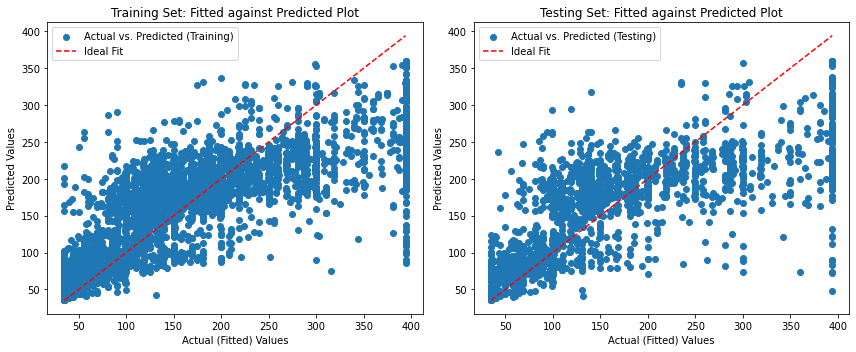

In [126]:
rfr4 = RandomForestRegressor(criterion='friedman_mse',
                             max_depth=30,
                             min_samples_leaf=10,
                             min_samples_split=50,
                             n_estimators=300).fit(X_train,y_train)

model_scores_regression(rfr4)
rfr_models.append(rfr4)
rfr_names.append('rfr4 - higher estimators')

### 2.3.1.3 Optimized Models

In [127]:
scores_table = []
for model, name in zip(rfr_models, rfr_names):
    train_rsq = model.score(X_train, y_train)
    test_rsq = model.score(X_test, y_test)
    scores_table.append([name, train_rsq, test_rsq])

df_scores_rf = pd.DataFrame(scores_table, columns=["Model", "Train R-squared", "Test R-squared"])

df_scores_rf

Model  Train R-squared  Test R-squared
0                        base         0.940626        0.606373
1                        rfr2         0.609160        0.529415
2  rfr3 - lower samples split         0.637336        0.542069
3    rfr4 - higher estimators         0.639294        0.543453

### 2.3.2 Model 2 (XG Boost)

Model : XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=42, ...):

R-Square:
0.92200820277793 (Train R^2 Value)
0.6005097029773386 (Test R^2 Value)

RMSE:
27.245336604002006 (Train RMSE)
63.94876390332374 (Test RMSE)


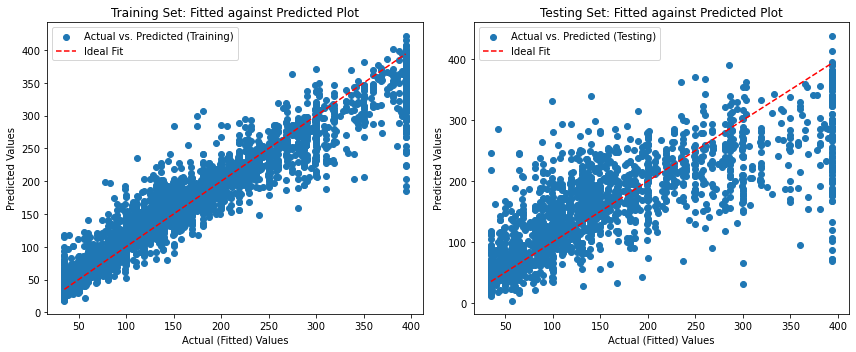

In [128]:
model_scores_regression(xgb_r)

### 2.3.2.1 Hyperparameter Inspection

- <mark>booster</mark> : type of booster, 2 types, tree booster and linear booster 
- <mark>n_estimators</mark> : number of trees 
- <mark>max_depth</mark> : depth of tree

##### Tree Booster Params :  (according to docs) 
- <mark>eta</mark> : aka learning rate, range of 0,1 
- <mark>gamma</mark> : minimum loss reduction required to make a further partition 
- <mark>subsample</mark> : subsample ratio of training instances 
- <mark>lambda</mark> : L2 regularization term on weights, range has no limit from 0
- <mark>alpha</mark> : L1 regularization term, range has no limit from 0 

reference : https://xgboost.readthedocs.io/en/stable/parameter.html

### 2.3.2.1 (a) n_estimators

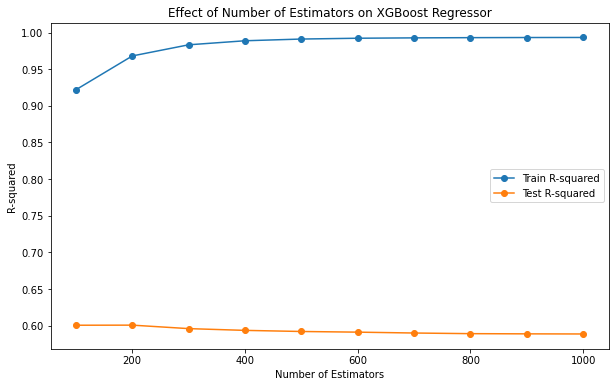

In [129]:
n_estimators_values = np.arange(100,1100,100)

train_scores = []
test_scores = []

for n_estimators in n_estimators_values:
    # Create an XGBoost Regressor with the current number of estimators
    xgb_model = XGBRegressor(n_estimators=n_estimators, random_state=42)

    # Train the model
    xgb_model.fit(X_train, y_train)

    # Predict on the training set
    y_train_pred = xgb_model.predict(X_train)
    train_r2 = r2_score(y_train, y_train_pred)
    train_scores.append(train_r2)

    # Predict on the test set
    y_test_pred = xgb_model.predict(X_test)
    test_r2 = r2_score(y_test, y_test_pred)
    test_scores.append(test_r2)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_values, train_scores, label='Train R-squared', marker='o')
plt.plot(n_estimators_values, test_scores, label='Test R-squared', marker='o')
plt.xlabel('Number of Estimators')
plt.ylabel('R-squared')
plt.title('Effect of Number of Estimators on XGBoost Regressor')
plt.legend()
plt.show()

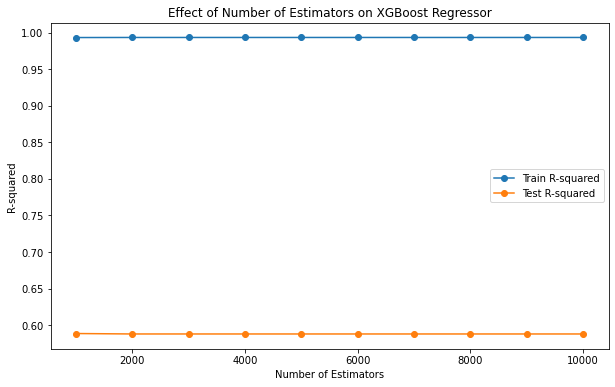

In [130]:
n_estimators_values = np.arange(1000,11000,1000)

train_scores = []
test_scores = []

for n_estimators in n_estimators_values:
    # Create an XGBoost Regressor with the current number of estimators
    xgb_model = XGBRegressor(n_estimators=n_estimators, random_state=42)

    # Train the model
    xgb_model.fit(X_train, y_train)

    # Predict on the training set
    y_train_pred = xgb_model.predict(X_train)
    train_r2 = r2_score(y_train, y_train_pred)
    train_scores.append(train_r2)

    # Predict on the test set
    y_test_pred = xgb_model.predict(X_test)
    test_r2 = r2_score(y_test, y_test_pred)
    test_scores.append(test_r2)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_values, train_scores, label='Train R-squared', marker='o')
plt.plot(n_estimators_values, test_scores, label='Test R-squared', marker='o')
plt.xlabel('Number of Estimators')
plt.ylabel('R-squared')
plt.title('Effect of Number of Estimators on XGBoost Regressor')
plt.legend()
plt.show()

# it plateaus as it goes higher, as expected. 

### 2.3.2.1 (b) eta

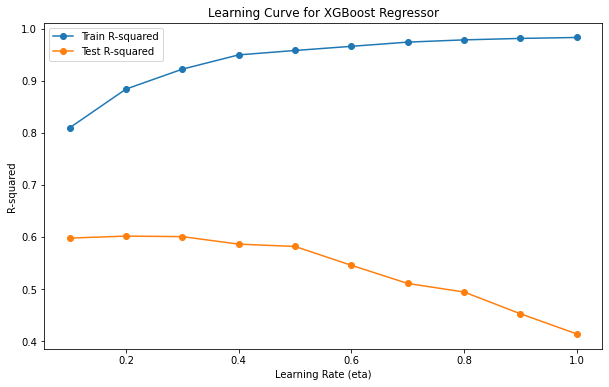

In [131]:
etas = np.arange(0.1, 1.1, 0.1)

train_scores = []
test_scores = []

for eta in etas:
    # Create an XGBoost Regressor with the current learning rate
    xgb_model = XGBRegressor(learning_rate=eta, random_state=42)

    # Train the model
    xgb_model.fit(X_train, y_train)

    # Predict on the training set
    y_train_pred = xgb_model.predict(X_train)
    train_r2 = r2_score(y_train, y_train_pred)
    train_scores.append(train_r2)

    # Predict on the test set
    y_test_pred = xgb_model.predict(X_test)
    test_r2 = r2_score(y_test, y_test_pred)
    test_scores.append(test_r2)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(etas, train_scores, label='Train R-squared', marker='o')
plt.plot(etas, test_scores, label='Test R-squared', marker='o')
plt.xlabel('Learning Rate (eta)')
plt.ylabel('R-squared')
plt.title('Learning Curve for XGBoost Regressor')
plt.legend()
plt.show()

# higher learning rates make the model complicated?/ pay more attention to the train set

### 2.3.1.1 (c) gamma

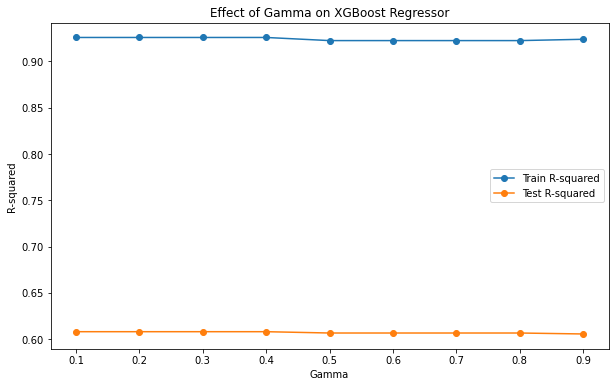

In [132]:
gamma_values = np.arange(0.1,1,0.1)

train_scores = []
test_scores = []

for gamma in gamma_values:
    # Create an XGBoost Regressor with the current gamma value
    xgb_model = XGBRegressor(gamma=gamma, random_state=42)

    # Train the model
    xgb_model.fit(X_train, y_train)

    # Predict on the training set
    y_train_pred = xgb_model.predict(X_train)
    train_r2 = r2_score(y_train, y_train_pred)
    train_scores.append(train_r2)

    # Predict on the test set
    y_test_pred = xgb_model.predict(X_test)
    test_r2 = r2_score(y_test, y_test_pred)
    test_scores.append(test_r2)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(gamma_values, train_scores, label='Train R-squared', marker='o')
plt.plot(gamma_values, test_scores, label='Test R-squared', marker='o')
plt.xlabel('Gamma')
plt.ylabel('R-squared')
plt.title('Effect of Gamma on XGBoost Regressor')
plt.legend()
plt.show()

# gamma has no effect? 

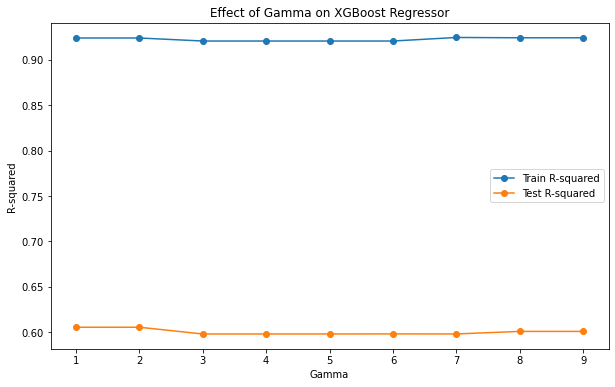

In [133]:
gamma_values = np.arange(1,10,1)

train_scores = []
test_scores = []

for gamma in gamma_values:
    # Create an XGBoost Regressor with the current gamma value
    xgb_model = XGBRegressor(gamma=gamma, random_state=42)

    # Train the model
    xgb_model.fit(X_train, y_train)

    # Predict on the training set
    y_train_pred = xgb_model.predict(X_train)
    train_r2 = r2_score(y_train, y_train_pred)
    train_scores.append(train_r2)

    # Predict on the test set
    y_test_pred = xgb_model.predict(X_test)
    test_r2 = r2_score(y_test, y_test_pred)
    test_scores.append(test_r2)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(gamma_values, train_scores, label='Train R-squared', marker='o')
plt.plot(gamma_values, test_scores, label='Test R-squared', marker='o')
plt.xlabel('Gamma')
plt.ylabel('R-squared')
plt.title('Effect of Gamma on XGBoost Regressor')
plt.legend()
plt.show()


### 2.3.2.1 (d) subsample

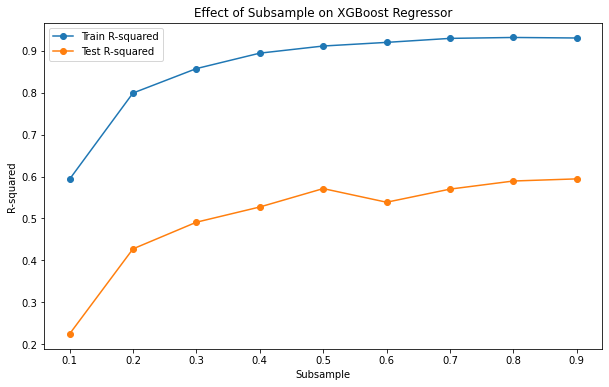

In [134]:
subsample_values = np.arange(0.1,1,0.1)

train_scores = []
test_scores = []

for subsample in subsample_values:
    # Create an XGBoost Regressor with the current subsample value
    xgb_model = XGBRegressor(subsample=subsample, random_state=42)

    # Train the model
    xgb_model.fit(X_train, y_train)

    # Predict on the training set
    y_train_pred = xgb_model.predict(X_train)
    train_r2 = r2_score(y_train, y_train_pred)
    train_scores.append(train_r2)

    # Predict on the test set
    y_test_pred = xgb_model.predict(X_test)
    test_r2 = r2_score(y_test, y_test_pred)
    test_scores.append(test_r2)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(subsample_values, train_scores, label='Train R-squared', marker='o')
plt.plot(subsample_values, test_scores, label='Test R-squared', marker='o')
plt.xlabel('Subsample')
plt.ylabel('R-squared')
plt.title('Effect of Subsample on XGBoost Regressor')
plt.legend()
plt.show()

### 2.3.1.1 (e) lambda

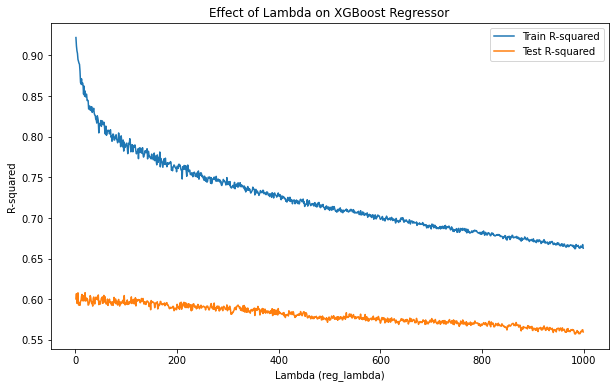

In [135]:
# Define a range of lambda (reg_lambda) values to explore
lambda_values = np.arange(1,1000,1)

train_scores = []
test_scores = []

for reg_lambda in lambda_values:
    # Create an XGBoost Regressor with the current reg_lambda value
    xgb_model = XGBRegressor(reg_lambda=reg_lambda, random_state=42)

    # Train the model
    xgb_model.fit(X_train, y_train)

    # Predict on the training set
    y_train_pred = xgb_model.predict(X_train)
    train_r2 = r2_score(y_train, y_train_pred)
    train_scores.append(train_r2)

    # Predict on the test set
    y_test_pred = xgb_model.predict(X_test)
    test_r2 = r2_score(y_test, y_test_pred)
    test_scores.append(test_r2)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(lambda_values, train_scores, label='Train R-squared')
plt.plot(lambda_values, test_scores, label='Test R-squared')
plt.xlabel('Lambda (reg_lambda)')
plt.ylabel('R-squared')
plt.title('Effect of Lambda on XGBoost Regressor')
plt.legend()
plt.show()

# regularisation helps to reduce overfitting, higher reduces it more

### 2.3.2.1 (f) alpha 

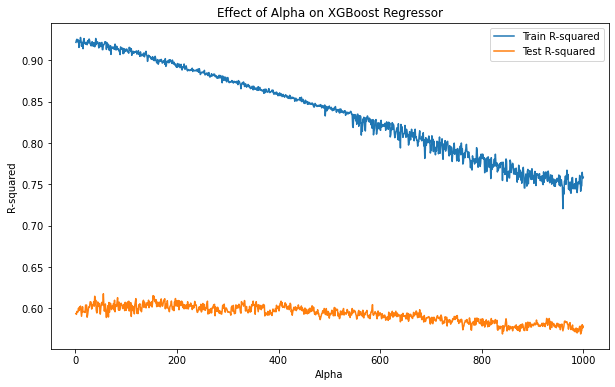

In [136]:
alpha_values = np.arange(1, 1001, 1)

train_scores = []
test_scores = []

for alpha in alpha_values:
    # Create an XGBoost Regressor with the current alpha value
    xgb_model = XGBRegressor(alpha=alpha, random_state=42)

    # Train the model
    xgb_model.fit(X_train, y_train)

    # Predict on the training set
    y_train_pred = xgb_model.predict(X_train)
    train_r2 = r2_score(y_train, y_train_pred)
    train_scores.append(train_r2)

    # Predict on the test set
    y_test_pred = xgb_model.predict(X_test)
    test_r2 = r2_score(y_test, y_test_pred)
    test_scores.append(test_r2)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(alpha_values, train_scores, label='Train R-squared')
plt.plot(alpha_values, test_scores, label='Test R-squared')
plt.xlabel('Alpha')
plt.ylabel('R-squared')
plt.title('Effect of Alpha on XGBoost Regressor')
plt.legend()
plt.show()

### 2.3.2.1 (g) max_depth

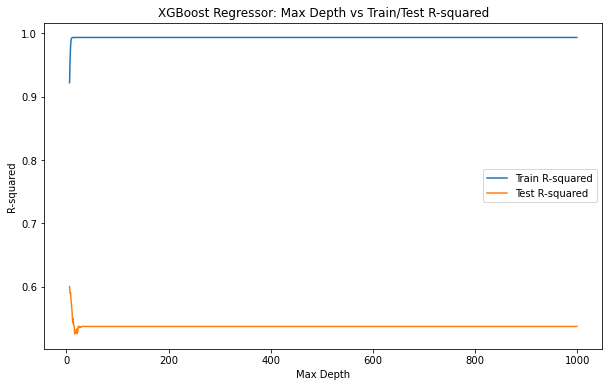

In [137]:
max_depths = np.arange(6, 1000, 1)

# Initialize empty lists to store train and test scores
train_scores = []
test_scores = []

# Iterate over different max depths
for depth in max_depths:
    # Create and fit the XGBoost Regressor
    model = XGBRegressor(max_depth=depth, random_state=42)
    model.fit(X_train, y_train)
    
    # Make predictions on training and testing sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Calculate R-squared and append to the lists
    train_scores.append(r2_score(y_train, y_train_pred))
    test_scores.append(r2_score(y_test, y_test_pred))

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(max_depths, train_scores, label='Train R-squared')
plt.plot(max_depths, test_scores, label='Test R-squared')
plt.xlabel('Max Depth')
plt.ylabel('R-squared')
plt.title('XGBoost Regressor: Max Depth vs Train/Test R-squared')
plt.legend()
plt.show()

### 2.3.2.2 Hyperparameter Optimization

In [138]:
xgb_models = [xgb_r]
xgb_names = ['base']

### 2.3.2.2 (a) GridSearchCV

##### 1st iteration
- lower estimators 
- add regularization params later on

In [139]:
param_grid = {'max_depth' : [10,20,30,50],
              'n_estimators' : [100,400,700],
              'eta' : [0.1,0.4,0.7,1], # 0-1
              'subsample' : [0.1,0.4,0.7,1]} #0-1

In [140]:
start_time = time.time()

grid = GridSearchCV(estimator=xgb_r, param_grid=param_grid, scoring='r2',verbose = 3,refit=True).fit(X_train,y_train)

end_time = time.time()

elapsed_time = end_time - start_time

Fitting 5 folds for each of 192 candidates, totalling 960 fits
[CV 1/5] END eta=0.1, max_depth=10, n_estimators=100, subsample=0.1;, score=0.462 total time=   0.1s
[CV 2/5] END eta=0.1, max_depth=10, n_estimators=100, subsample=0.1;, score=0.517 total time=   0.1s
[CV 3/5] END eta=0.1, max_depth=10, n_estimators=100, subsample=0.1;, score=0.494 total time=   0.1s
[CV 4/5] END eta=0.1, max_depth=10, n_estimators=100, subsample=0.1;, score=0.489 total time=   0.1s
[CV 5/5] END eta=0.1, max_depth=10, n_estimators=100, subsample=0.1;, score=0.554 total time=   0.1s
[CV 1/5] END eta=0.1, max_depth=10, n_estimators=100, subsample=0.4;, score=0.525 total time=   0.3s
[CV 2/5] END eta=0.1, max_depth=10, n_estimators=100, subsample=0.4;, score=0.578 total time=   0.3s
[CV 3/5] END eta=0.1, max_depth=10, n_estimators=100, subsample=0.4;, score=0.588 total time=   0.3s
[CV 4/5] END eta=0.1, max_depth=10, n_estimators=100, subsample=0.4;, score=0.554 total time=   0.3s
[CV 5/5] END eta=0.1, max_de

[CV 2/5] END eta=0.1, max_depth=20, n_estimators=400, subsample=0.1;, score=0.467 total time=   1.3s
[CV 3/5] END eta=0.1, max_depth=20, n_estimators=400, subsample=0.1;, score=0.462 total time=   1.3s
[CV 4/5] END eta=0.1, max_depth=20, n_estimators=400, subsample=0.1;, score=0.450 total time=   1.3s
[CV 5/5] END eta=0.1, max_depth=20, n_estimators=400, subsample=0.1;, score=0.442 total time=   1.4s
[CV 1/5] END eta=0.1, max_depth=20, n_estimators=400, subsample=0.4;, score=0.506 total time=   2.9s
[CV 2/5] END eta=0.1, max_depth=20, n_estimators=400, subsample=0.4;, score=0.563 total time=   3.0s
[CV 3/5] END eta=0.1, max_depth=20, n_estimators=400, subsample=0.4;, score=0.571 total time=   3.0s
[CV 4/5] END eta=0.1, max_depth=20, n_estimators=400, subsample=0.4;, score=0.520 total time=   3.0s
[CV 5/5] END eta=0.1, max_depth=20, n_estimators=400, subsample=0.4;, score=0.591 total time=   3.0s
[CV 1/5] END eta=0.1, max_depth=20, n_estimators=400, subsample=0.7;, score=0.515 total tim

[CV 4/5] END eta=0.1, max_depth=30, n_estimators=700, subsample=0.1;, score=0.431 total time=   2.3s
[CV 5/5] END eta=0.1, max_depth=30, n_estimators=700, subsample=0.1;, score=0.437 total time=   2.4s
[CV 1/5] END eta=0.1, max_depth=30, n_estimators=700, subsample=0.4;, score=0.485 total time=   6.5s
[CV 2/5] END eta=0.1, max_depth=30, n_estimators=700, subsample=0.4;, score=0.548 total time=   6.5s
[CV 3/5] END eta=0.1, max_depth=30, n_estimators=700, subsample=0.4;, score=0.573 total time=   6.6s
[CV 4/5] END eta=0.1, max_depth=30, n_estimators=700, subsample=0.4;, score=0.531 total time=   6.6s
[CV 5/5] END eta=0.1, max_depth=30, n_estimators=700, subsample=0.4;, score=0.583 total time=   6.5s
[CV 1/5] END eta=0.1, max_depth=30, n_estimators=700, subsample=0.7;, score=0.524 total time=   9.1s
[CV 2/5] END eta=0.1, max_depth=30, n_estimators=700, subsample=0.7;, score=0.586 total time=  10.1s
[CV 3/5] END eta=0.1, max_depth=30, n_estimators=700, subsample=0.7;, score=0.581 total tim

[CV 1/5] END eta=0.4, max_depth=10, n_estimators=100, subsample=0.4;, score=0.339 total time=   0.3s
[CV 2/5] END eta=0.4, max_depth=10, n_estimators=100, subsample=0.4;, score=0.367 total time=   0.3s
[CV 3/5] END eta=0.4, max_depth=10, n_estimators=100, subsample=0.4;, score=0.385 total time=   0.3s
[CV 4/5] END eta=0.4, max_depth=10, n_estimators=100, subsample=0.4;, score=0.388 total time=   0.3s
[CV 5/5] END eta=0.4, max_depth=10, n_estimators=100, subsample=0.4;, score=0.432 total time=   0.3s
[CV 1/5] END eta=0.4, max_depth=10, n_estimators=100, subsample=0.7;, score=0.437 total time=   0.3s
[CV 2/5] END eta=0.4, max_depth=10, n_estimators=100, subsample=0.7;, score=0.521 total time=   0.3s
[CV 3/5] END eta=0.4, max_depth=10, n_estimators=100, subsample=0.7;, score=0.501 total time=   0.3s
[CV 4/5] END eta=0.4, max_depth=10, n_estimators=100, subsample=0.7;, score=0.483 total time=   0.3s
[CV 5/5] END eta=0.4, max_depth=10, n_estimators=100, subsample=0.7;, score=0.525 total tim

[CV 3/5] END eta=0.4, max_depth=20, n_estimators=400, subsample=0.4;, score=0.361 total time=   3.7s
[CV 4/5] END eta=0.4, max_depth=20, n_estimators=400, subsample=0.4;, score=0.358 total time=   3.2s
[CV 5/5] END eta=0.4, max_depth=20, n_estimators=400, subsample=0.4;, score=0.357 total time=   4.0s
[CV 1/5] END eta=0.4, max_depth=20, n_estimators=400, subsample=0.7;, score=0.428 total time=   6.3s
[CV 2/5] END eta=0.4, max_depth=20, n_estimators=400, subsample=0.7;, score=0.459 total time=   5.9s
[CV 3/5] END eta=0.4, max_depth=20, n_estimators=400, subsample=0.7;, score=0.490 total time=   4.5s
[CV 4/5] END eta=0.4, max_depth=20, n_estimators=400, subsample=0.7;, score=0.455 total time=   3.9s
[CV 5/5] END eta=0.4, max_depth=20, n_estimators=400, subsample=0.7;, score=0.553 total time=   4.1s
[CV 1/5] END eta=0.4, max_depth=20, n_estimators=400, subsample=1;, score=0.461 total time=   0.8s
[CV 2/5] END eta=0.4, max_depth=20, n_estimators=400, subsample=1;, score=0.506 total time=  

[CV 4/5] END eta=0.4, max_depth=30, n_estimators=700, subsample=0.4;, score=0.319 total time=   6.8s
[CV 5/5] END eta=0.4, max_depth=30, n_estimators=700, subsample=0.4;, score=0.338 total time=   7.4s
[CV 1/5] END eta=0.4, max_depth=30, n_estimators=700, subsample=0.7;, score=0.404 total time=   8.9s
[CV 2/5] END eta=0.4, max_depth=30, n_estimators=700, subsample=0.7;, score=0.449 total time=   8.8s
[CV 3/5] END eta=0.4, max_depth=30, n_estimators=700, subsample=0.7;, score=0.482 total time=   8.8s
[CV 4/5] END eta=0.4, max_depth=30, n_estimators=700, subsample=0.7;, score=0.464 total time=   8.7s
[CV 5/5] END eta=0.4, max_depth=30, n_estimators=700, subsample=0.7;, score=0.515 total time=   8.8s
[CV 1/5] END eta=0.4, max_depth=30, n_estimators=700, subsample=1;, score=0.463 total time=   1.0s
[CV 2/5] END eta=0.4, max_depth=30, n_estimators=700, subsample=1;, score=0.507 total time=   1.0s
[CV 3/5] END eta=0.4, max_depth=30, n_estimators=700, subsample=1;, score=0.512 total time=   1

[CV 5/5] END eta=0.7, max_depth=10, n_estimators=100, subsample=0.4;, score=-0.023 total time=   0.3s
[CV 1/5] END eta=0.7, max_depth=10, n_estimators=100, subsample=0.7;, score=0.287 total time=   0.3s
[CV 2/5] END eta=0.7, max_depth=10, n_estimators=100, subsample=0.7;, score=0.395 total time=   0.3s
[CV 3/5] END eta=0.7, max_depth=10, n_estimators=100, subsample=0.7;, score=0.398 total time=   0.3s
[CV 4/5] END eta=0.7, max_depth=10, n_estimators=100, subsample=0.7;, score=0.286 total time=   0.3s
[CV 5/5] END eta=0.7, max_depth=10, n_estimators=100, subsample=0.7;, score=0.426 total time=   0.4s
[CV 1/5] END eta=0.7, max_depth=10, n_estimators=100, subsample=1;, score=0.441 total time=   0.3s
[CV 2/5] END eta=0.7, max_depth=10, n_estimators=100, subsample=1;, score=0.493 total time=   0.3s
[CV 3/5] END eta=0.7, max_depth=10, n_estimators=100, subsample=1;, score=0.465 total time=   0.4s
[CV 4/5] END eta=0.7, max_depth=10, n_estimators=100, subsample=1;, score=0.457 total time=   0.

[CV 4/5] END eta=0.7, max_depth=20, n_estimators=400, subsample=0.4;, score=-0.160 total time=   2.9s
[CV 5/5] END eta=0.7, max_depth=20, n_estimators=400, subsample=0.4;, score=-0.062 total time=   3.0s
[CV 1/5] END eta=0.7, max_depth=20, n_estimators=400, subsample=0.7;, score=0.318 total time=   3.7s
[CV 2/5] END eta=0.7, max_depth=20, n_estimators=400, subsample=0.7;, score=0.378 total time=   3.7s
[CV 3/5] END eta=0.7, max_depth=20, n_estimators=400, subsample=0.7;, score=0.315 total time=   3.7s
[CV 4/5] END eta=0.7, max_depth=20, n_estimators=400, subsample=0.7;, score=0.257 total time=   3.7s
[CV 5/5] END eta=0.7, max_depth=20, n_estimators=400, subsample=0.7;, score=0.402 total time=   3.8s
[CV 1/5] END eta=0.7, max_depth=20, n_estimators=400, subsample=1;, score=0.404 total time=   0.5s
[CV 2/5] END eta=0.7, max_depth=20, n_estimators=400, subsample=1;, score=0.454 total time=   0.5s
[CV 3/5] END eta=0.7, max_depth=20, n_estimators=400, subsample=1;, score=0.463 total time=  

[CV 2/5] END eta=0.7, max_depth=30, n_estimators=700, subsample=0.4;, score=-0.222 total time=   6.9s
[CV 3/5] END eta=0.7, max_depth=30, n_estimators=700, subsample=0.4;, score=-0.156 total time=   6.9s
[CV 4/5] END eta=0.7, max_depth=30, n_estimators=700, subsample=0.4;, score=-0.331 total time=   6.9s
[CV 5/5] END eta=0.7, max_depth=30, n_estimators=700, subsample=0.4;, score=-0.197 total time=   7.1s
[CV 1/5] END eta=0.7, max_depth=30, n_estimators=700, subsample=0.7;, score=0.259 total time=   7.7s
[CV 2/5] END eta=0.7, max_depth=30, n_estimators=700, subsample=0.7;, score=0.379 total time=   8.3s
[CV 3/5] END eta=0.7, max_depth=30, n_estimators=700, subsample=0.7;, score=0.253 total time=   8.1s
[CV 4/5] END eta=0.7, max_depth=30, n_estimators=700, subsample=0.7;, score=0.248 total time=   8.1s
[CV 5/5] END eta=0.7, max_depth=30, n_estimators=700, subsample=0.7;, score=0.326 total time=   8.3s
[CV 1/5] END eta=0.7, max_depth=30, n_estimators=700, subsample=1;, score=0.393 total t

[CV 1/5] END eta=1, max_depth=10, n_estimators=100, subsample=0.4;, score=-3.419 total time=   0.3s
[CV 2/5] END eta=1, max_depth=10, n_estimators=100, subsample=0.4;, score=-3.286 total time=   0.3s
[CV 3/5] END eta=1, max_depth=10, n_estimators=100, subsample=0.4;, score=-3.363 total time=   0.3s
[CV 4/5] END eta=1, max_depth=10, n_estimators=100, subsample=0.4;, score=-2.489 total time=   0.3s
[CV 5/5] END eta=1, max_depth=10, n_estimators=100, subsample=0.4;, score=-3.515 total time=   0.3s
[CV 1/5] END eta=1, max_depth=10, n_estimators=100, subsample=0.7;, score=0.014 total time=   0.3s
[CV 2/5] END eta=1, max_depth=10, n_estimators=100, subsample=0.7;, score=0.181 total time=   0.3s
[CV 3/5] END eta=1, max_depth=10, n_estimators=100, subsample=0.7;, score=0.074 total time=   0.3s
[CV 4/5] END eta=1, max_depth=10, n_estimators=100, subsample=0.7;, score=0.138 total time=   0.3s
[CV 5/5] END eta=1, max_depth=10, n_estimators=100, subsample=0.7;, score=0.147 total time=   0.3s
[CV 1

[CV 4/5] END eta=1, max_depth=20, n_estimators=400, subsample=0.1;, score=-2528488796783903962076959723225088.000 total time=   1.1s
[CV 5/5] END eta=1, max_depth=20, n_estimators=400, subsample=0.1;, score=-1952676666578534413960968363048960.000 total time=   1.1s
[CV 1/5] END eta=1, max_depth=20, n_estimators=400, subsample=0.4;, score=-2.014 total time=   3.0s
[CV 2/5] END eta=1, max_depth=20, n_estimators=400, subsample=0.4;, score=-2.114 total time=   3.0s
[CV 3/5] END eta=1, max_depth=20, n_estimators=400, subsample=0.4;, score=-3.525 total time=   3.0s
[CV 4/5] END eta=1, max_depth=20, n_estimators=400, subsample=0.4;, score=-2.068 total time=   3.0s
[CV 5/5] END eta=1, max_depth=20, n_estimators=400, subsample=0.4;, score=-2.187 total time=   3.1s
[CV 1/5] END eta=1, max_depth=20, n_estimators=400, subsample=0.7;, score=0.033 total time=   3.5s
[CV 2/5] END eta=1, max_depth=20, n_estimators=400, subsample=0.7;, score=0.105 total time=   3.6s
[CV 3/5] END eta=1, max_depth=20, n_

[CV 2/5] END eta=1, max_depth=30, n_estimators=700, subsample=0.1;, score=-12798094967767744101420497341775872.000 total time=   1.4s
[CV 3/5] END eta=1, max_depth=30, n_estimators=700, subsample=0.1;, score=-15773070175570282838217663755321344.000 total time=   1.4s
[CV 4/5] END eta=1, max_depth=30, n_estimators=700, subsample=0.1;, score=-11849973321117258755802925608468480.000 total time=   1.4s
[CV 5/5] END eta=1, max_depth=30, n_estimators=700, subsample=0.1;, score=-11706510588570380305873325946568704.000 total time=   1.4s
[CV 1/5] END eta=1, max_depth=30, n_estimators=700, subsample=0.4;, score=-3.026 total time=   6.6s
[CV 2/5] END eta=1, max_depth=30, n_estimators=700, subsample=0.4;, score=-2.912 total time=   6.7s
[CV 3/5] END eta=1, max_depth=30, n_estimators=700, subsample=0.4;, score=-2.567 total time=   6.8s
[CV 4/5] END eta=1, max_depth=30, n_estimators=700, subsample=0.4;, score=-2.189 total time=   6.9s
[CV 5/5] END eta=1, max_depth=30, n_estimators=700, subsample=0.

[CV 5/5] END eta=1, max_depth=50, n_estimators=700, subsample=1;, score=0.488 total time=   0.5s


In [141]:
print(grid.best_score_)
print(grid.best_params_)

minutes, seconds = divmod(elapsed_time, 60)
formatted_time = "{:02}:{:02}".format(int(minutes), int(seconds))
print("Elapsed Time: {}".format(formatted_time))

0.5822485700792879
{'eta': 0.1, 'max_depth': 10, 'n_estimators': 100, 'subsample': 0.7}
Elapsed Time: 37:41


Model : XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eta=0.1, eval_metric=None,
             feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=10,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, predictor=None, ...):

R-Square:
0.9732289204219591 (Train R^2 Value)
0.6113316368778194 (Test R^2 Value)

RMSE:
15.962490661142327 (Train RMSE)
63.07665177711839 (Test RMSE)


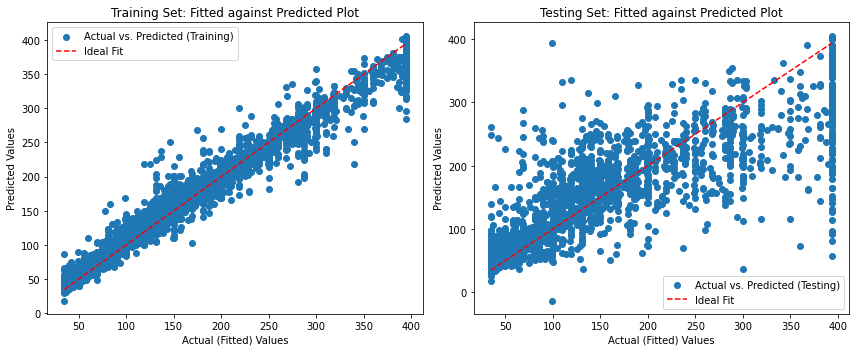

In [142]:
xgb_r2 = XGBRegressor(eta=0.1,n_estimators=100, subsample=0.7,max_depth=10,random_state=42).fit(X_train,y_train)

model_scores_regression(xgb_r2)
xgb_models.append(xgb_r2)
xgb_names.append('xgb_r2 - low number of estimators')

# more overfitted, and train scores increase

##### 2nd iteration - added regularization parameters
- to reduce overfitting, we try to add regularisation 
- l1 and l2 can be used concurrently? 

In [143]:
param_grid = {'n_estimators' : [50,100,200], # use a lower range 
              'eta' : [0.1,0.7,1], # 0-1
              'subsample' : [0.1,0.7,1],
              'lambda' : [600,800,1000],
              'alpha' : [600,800,1000]} # these are the ranges for l2 and l1 where there is less overfitting 

In [144]:
start_time = time.time()

grid = GridSearchCV(estimator=xgb_r, param_grid=param_grid, scoring='r2',verbose = 3,refit=True).fit(X_train,y_train)

end_time = time.time()

elapsed_time = end_time - start_time

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
[CV 1/5] END alpha=600, eta=0.1, lambda=600, n_estimators=50, subsample=0.1;, score=0.164 total time=   0.0s
[CV 2/5] END alpha=600, eta=0.1, lambda=600, n_estimators=50, subsample=0.1;, score=0.109 total time=   0.0s
[CV 3/5] END alpha=600, eta=0.1, lambda=600, n_estimators=50, subsample=0.1;, score=0.149 total time=   0.0s
[CV 4/5] END alpha=600, eta=0.1, lambda=600, n_estimators=50, subsample=0.1;, score=0.094 total time=   0.0s
[CV 5/5] END alpha=600, eta=0.1, lambda=600, n_estimators=50, subsample=0.1;, score=0.108 total time=   0.0s
[CV 1/5] END alpha=600, eta=0.1, lambda=600, n_estimators=50, subsample=0.7;, score=0.415 total time=   0.0s
[CV 2/5] END alpha=600, eta=0.1, lambda=600, n_estimators=50, subsample=0.7;, score=0.416 total time=   0.0s
[CV 3/5] END alpha=600, eta=0.1, lambda=600, n_estimators=50, subsample=0.7;, score=0.424 total time=   0.0s
[CV 4/5] END alpha=600, eta=0.1, lambda=600, n_estimators=50, su

[CV 1/5] END alpha=600, eta=0.1, lambda=800, n_estimators=200, subsample=0.1;, score=0.382 total time=   0.2s
[CV 2/5] END alpha=600, eta=0.1, lambda=800, n_estimators=200, subsample=0.1;, score=0.384 total time=   0.1s
[CV 3/5] END alpha=600, eta=0.1, lambda=800, n_estimators=200, subsample=0.1;, score=0.399 total time=   0.2s
[CV 4/5] END alpha=600, eta=0.1, lambda=800, n_estimators=200, subsample=0.1;, score=0.364 total time=   0.1s
[CV 5/5] END alpha=600, eta=0.1, lambda=800, n_estimators=200, subsample=0.1;, score=0.400 total time=   0.1s
[CV 1/5] END alpha=600, eta=0.1, lambda=800, n_estimators=200, subsample=0.7;, score=0.505 total time=   0.3s
[CV 2/5] END alpha=600, eta=0.1, lambda=800, n_estimators=200, subsample=0.7;, score=0.529 total time=   0.3s
[CV 3/5] END alpha=600, eta=0.1, lambda=800, n_estimators=200, subsample=0.7;, score=0.538 total time=   0.3s
[CV 4/5] END alpha=600, eta=0.1, lambda=800, n_estimators=200, subsample=0.7;, score=0.497 total time=   0.3s
[CV 5/5] E

[CV 1/5] END alpha=600, eta=0.7, lambda=600, n_estimators=100, subsample=0.1;, score=0.466 total time=   0.0s
[CV 2/5] END alpha=600, eta=0.7, lambda=600, n_estimators=100, subsample=0.1;, score=0.491 total time=   0.0s
[CV 3/5] END alpha=600, eta=0.7, lambda=600, n_estimators=100, subsample=0.1;, score=0.489 total time=   0.0s
[CV 4/5] END alpha=600, eta=0.7, lambda=600, n_estimators=100, subsample=0.1;, score=0.457 total time=   0.0s
[CV 5/5] END alpha=600, eta=0.7, lambda=600, n_estimators=100, subsample=0.1;, score=0.519 total time=   0.0s
[CV 1/5] END alpha=600, eta=0.7, lambda=600, n_estimators=100, subsample=0.7;, score=0.547 total time=   0.1s
[CV 2/5] END alpha=600, eta=0.7, lambda=600, n_estimators=100, subsample=0.7;, score=0.571 total time=   0.1s
[CV 3/5] END alpha=600, eta=0.7, lambda=600, n_estimators=100, subsample=0.7;, score=0.592 total time=   0.1s
[CV 4/5] END alpha=600, eta=0.7, lambda=600, n_estimators=100, subsample=0.7;, score=0.535 total time=   0.1s
[CV 5/5] E

[CV 3/5] END alpha=600, eta=0.7, lambda=1000, n_estimators=50, subsample=0.1;, score=0.428 total time=   0.0s
[CV 4/5] END alpha=600, eta=0.7, lambda=1000, n_estimators=50, subsample=0.1;, score=0.401 total time=   0.0s
[CV 5/5] END alpha=600, eta=0.7, lambda=1000, n_estimators=50, subsample=0.1;, score=0.439 total time=   0.0s
[CV 1/5] END alpha=600, eta=0.7, lambda=1000, n_estimators=50, subsample=0.7;, score=0.520 total time=   0.0s
[CV 2/5] END alpha=600, eta=0.7, lambda=1000, n_estimators=50, subsample=0.7;, score=0.542 total time=   0.0s
[CV 3/5] END alpha=600, eta=0.7, lambda=1000, n_estimators=50, subsample=0.7;, score=0.550 total time=   0.0s
[CV 4/5] END alpha=600, eta=0.7, lambda=1000, n_estimators=50, subsample=0.7;, score=0.511 total time=   0.0s
[CV 5/5] END alpha=600, eta=0.7, lambda=1000, n_estimators=50, subsample=0.7;, score=0.570 total time=   0.0s
[CV 1/5] END alpha=600, eta=0.7, lambda=1000, n_estimators=50, subsample=1;, score=0.532 total time=   0.0s
[CV 2/5] END

[CV 4/5] END alpha=600, eta=1, lambda=600, n_estimators=200, subsample=0.1;, score=0.482 total time=   0.2s
[CV 5/5] END alpha=600, eta=1, lambda=600, n_estimators=200, subsample=0.1;, score=0.545 total time=   0.2s
[CV 1/5] END alpha=600, eta=1, lambda=600, n_estimators=200, subsample=0.7;, score=0.532 total time=   0.4s
[CV 2/5] END alpha=600, eta=1, lambda=600, n_estimators=200, subsample=0.7;, score=0.584 total time=   0.4s
[CV 3/5] END alpha=600, eta=1, lambda=600, n_estimators=200, subsample=0.7;, score=0.610 total time=   0.3s
[CV 4/5] END alpha=600, eta=1, lambda=600, n_estimators=200, subsample=0.7;, score=0.538 total time=   0.3s
[CV 5/5] END alpha=600, eta=1, lambda=600, n_estimators=200, subsample=0.7;, score=0.596 total time=   0.3s
[CV 1/5] END alpha=600, eta=1, lambda=600, n_estimators=200, subsample=1;, score=0.529 total time=   0.2s
[CV 2/5] END alpha=600, eta=1, lambda=600, n_estimators=200, subsample=1;, score=0.601 total time=   0.2s
[CV 3/5] END alpha=600, eta=1, l

[CV 1/5] END alpha=600, eta=1, lambda=1000, n_estimators=100, subsample=0.7;, score=0.531 total time=   0.1s
[CV 2/5] END alpha=600, eta=1, lambda=1000, n_estimators=100, subsample=0.7;, score=0.580 total time=   0.1s
[CV 3/5] END alpha=600, eta=1, lambda=1000, n_estimators=100, subsample=0.7;, score=0.594 total time=   0.1s
[CV 4/5] END alpha=600, eta=1, lambda=1000, n_estimators=100, subsample=0.7;, score=0.541 total time=   0.1s
[CV 5/5] END alpha=600, eta=1, lambda=1000, n_estimators=100, subsample=0.7;, score=0.599 total time=   0.1s
[CV 1/5] END alpha=600, eta=1, lambda=1000, n_estimators=100, subsample=1;, score=0.546 total time=   0.1s
[CV 2/5] END alpha=600, eta=1, lambda=1000, n_estimators=100, subsample=1;, score=0.594 total time=   0.1s
[CV 3/5] END alpha=600, eta=1, lambda=1000, n_estimators=100, subsample=1;, score=0.602 total time=   0.1s
[CV 4/5] END alpha=600, eta=1, lambda=1000, n_estimators=100, subsample=1;, score=0.541 total time=   0.1s
[CV 5/5] END alpha=600, eta

[CV 2/5] END alpha=800, eta=0.1, lambda=800, n_estimators=50, subsample=0.7;, score=0.392 total time=   0.0s
[CV 3/5] END alpha=800, eta=0.1, lambda=800, n_estimators=50, subsample=0.7;, score=0.402 total time=   0.0s
[CV 4/5] END alpha=800, eta=0.1, lambda=800, n_estimators=50, subsample=0.7;, score=0.376 total time=   0.0s
[CV 5/5] END alpha=800, eta=0.1, lambda=800, n_estimators=50, subsample=0.7;, score=0.412 total time=   0.0s
[CV 1/5] END alpha=800, eta=0.1, lambda=800, n_estimators=50, subsample=1;, score=0.423 total time=   0.0s
[CV 2/5] END alpha=800, eta=0.1, lambda=800, n_estimators=50, subsample=1;, score=0.418 total time=   0.0s
[CV 3/5] END alpha=800, eta=0.1, lambda=800, n_estimators=50, subsample=1;, score=0.432 total time=   0.0s
[CV 4/5] END alpha=800, eta=0.1, lambda=800, n_estimators=50, subsample=1;, score=0.398 total time=   0.0s
[CV 5/5] END alpha=800, eta=0.1, lambda=800, n_estimators=50, subsample=1;, score=0.440 total time=   0.0s
[CV 1/5] END alpha=800, eta=0

[CV 2/5] END alpha=800, eta=0.1, lambda=1000, n_estimators=200, subsample=0.7;, score=0.516 total time=   0.3s
[CV 3/5] END alpha=800, eta=0.1, lambda=1000, n_estimators=200, subsample=0.7;, score=0.525 total time=   0.3s
[CV 4/5] END alpha=800, eta=0.1, lambda=1000, n_estimators=200, subsample=0.7;, score=0.485 total time=   0.3s
[CV 5/5] END alpha=800, eta=0.1, lambda=1000, n_estimators=200, subsample=0.7;, score=0.541 total time=   0.3s
[CV 1/5] END alpha=800, eta=0.1, lambda=1000, n_estimators=200, subsample=1;, score=0.508 total time=   0.3s
[CV 2/5] END alpha=800, eta=0.1, lambda=1000, n_estimators=200, subsample=1;, score=0.535 total time=   0.3s
[CV 3/5] END alpha=800, eta=0.1, lambda=1000, n_estimators=200, subsample=1;, score=0.542 total time=   0.3s
[CV 4/5] END alpha=800, eta=0.1, lambda=1000, n_estimators=200, subsample=1;, score=0.505 total time=   0.3s
[CV 5/5] END alpha=800, eta=0.1, lambda=1000, n_estimators=200, subsample=1;, score=0.552 total time=   0.3s
[CV 1/5] EN

[CV 4/5] END alpha=800, eta=0.7, lambda=800, n_estimators=100, subsample=0.7;, score=0.531 total time=   0.1s
[CV 5/5] END alpha=800, eta=0.7, lambda=800, n_estimators=100, subsample=0.7;, score=0.597 total time=   0.1s
[CV 1/5] END alpha=800, eta=0.7, lambda=800, n_estimators=100, subsample=1;, score=0.543 total time=   0.1s
[CV 2/5] END alpha=800, eta=0.7, lambda=800, n_estimators=100, subsample=1;, score=0.590 total time=   0.1s
[CV 3/5] END alpha=800, eta=0.7, lambda=800, n_estimators=100, subsample=1;, score=0.598 total time=   0.1s
[CV 4/5] END alpha=800, eta=0.7, lambda=800, n_estimators=100, subsample=1;, score=0.544 total time=   0.1s
[CV 5/5] END alpha=800, eta=0.7, lambda=800, n_estimators=100, subsample=1;, score=0.599 total time=   0.1s
[CV 1/5] END alpha=800, eta=0.7, lambda=800, n_estimators=200, subsample=0.1;, score=0.486 total time=   0.2s
[CV 2/5] END alpha=800, eta=0.7, lambda=800, n_estimators=200, subsample=0.1;, score=0.505 total time=   0.2s
[CV 3/5] END alpha=8

[CV 4/5] END alpha=800, eta=1, lambda=600, n_estimators=50, subsample=0.7;, score=0.523 total time=   0.0s
[CV 5/5] END alpha=800, eta=1, lambda=600, n_estimators=50, subsample=0.7;, score=0.577 total time=   0.0s
[CV 1/5] END alpha=800, eta=1, lambda=600, n_estimators=50, subsample=1;, score=0.529 total time=   0.0s
[CV 2/5] END alpha=800, eta=1, lambda=600, n_estimators=50, subsample=1;, score=0.591 total time=   0.0s
[CV 3/5] END alpha=800, eta=1, lambda=600, n_estimators=50, subsample=1;, score=0.589 total time=   0.0s
[CV 4/5] END alpha=800, eta=1, lambda=600, n_estimators=50, subsample=1;, score=0.524 total time=   0.0s
[CV 5/5] END alpha=800, eta=1, lambda=600, n_estimators=50, subsample=1;, score=0.588 total time=   0.0s
[CV 1/5] END alpha=800, eta=1, lambda=600, n_estimators=100, subsample=0.1;, score=0.478 total time=   0.0s
[CV 2/5] END alpha=800, eta=1, lambda=600, n_estimators=100, subsample=0.1;, score=0.489 total time=   0.0s
[CV 3/5] END alpha=800, eta=1, lambda=600, n_

[CV 1/5] END alpha=800, eta=1, lambda=800, n_estimators=200, subsample=1;, score=0.543 total time=   0.2s
[CV 2/5] END alpha=800, eta=1, lambda=800, n_estimators=200, subsample=1;, score=0.598 total time=   0.1s
[CV 3/5] END alpha=800, eta=1, lambda=800, n_estimators=200, subsample=1;, score=0.600 total time=   0.2s
[CV 4/5] END alpha=800, eta=1, lambda=800, n_estimators=200, subsample=1;, score=0.543 total time=   0.2s
[CV 5/5] END alpha=800, eta=1, lambda=800, n_estimators=200, subsample=1;, score=0.598 total time=   0.1s
[CV 1/5] END alpha=800, eta=1, lambda=1000, n_estimators=50, subsample=0.1;, score=0.424 total time=   0.0s
[CV 2/5] END alpha=800, eta=1, lambda=1000, n_estimators=50, subsample=0.1;, score=0.439 total time=   0.0s
[CV 3/5] END alpha=800, eta=1, lambda=1000, n_estimators=50, subsample=0.1;, score=0.448 total time=   0.0s
[CV 4/5] END alpha=800, eta=1, lambda=1000, n_estimators=50, subsample=0.1;, score=0.422 total time=   0.0s
[CV 5/5] END alpha=800, eta=1, lambda=

[CV 3/5] END alpha=1000, eta=0.1, lambda=600, n_estimators=100, subsample=1;, score=0.523 total time=   0.1s
[CV 4/5] END alpha=1000, eta=0.1, lambda=600, n_estimators=100, subsample=1;, score=0.487 total time=   0.1s
[CV 5/5] END alpha=1000, eta=0.1, lambda=600, n_estimators=100, subsample=1;, score=0.529 total time=   0.1s
[CV 1/5] END alpha=1000, eta=0.1, lambda=600, n_estimators=200, subsample=0.1;, score=0.390 total time=   0.1s
[CV 2/5] END alpha=1000, eta=0.1, lambda=600, n_estimators=200, subsample=0.1;, score=0.395 total time=   0.1s
[CV 3/5] END alpha=1000, eta=0.1, lambda=600, n_estimators=200, subsample=0.1;, score=0.410 total time=   0.1s
[CV 4/5] END alpha=1000, eta=0.1, lambda=600, n_estimators=200, subsample=0.1;, score=0.375 total time=   0.1s
[CV 5/5] END alpha=1000, eta=0.1, lambda=600, n_estimators=200, subsample=0.1;, score=0.413 total time=   0.1s
[CV 1/5] END alpha=1000, eta=0.1, lambda=600, n_estimators=200, subsample=0.7;, score=0.509 total time=   0.3s
[CV 2/5

[CV 3/5] END alpha=1000, eta=0.1, lambda=1000, n_estimators=50, subsample=1;, score=0.415 total time=   0.0s
[CV 4/5] END alpha=1000, eta=0.1, lambda=1000, n_estimators=50, subsample=1;, score=0.380 total time=   0.0s
[CV 5/5] END alpha=1000, eta=0.1, lambda=1000, n_estimators=50, subsample=1;, score=0.423 total time=   0.0s
[CV 1/5] END alpha=1000, eta=0.1, lambda=1000, n_estimators=100, subsample=0.1;, score=0.262 total time=   0.0s
[CV 2/5] END alpha=1000, eta=0.1, lambda=1000, n_estimators=100, subsample=0.1;, score=0.223 total time=   0.0s
[CV 3/5] END alpha=1000, eta=0.1, lambda=1000, n_estimators=100, subsample=0.1;, score=0.252 total time=   0.0s
[CV 4/5] END alpha=1000, eta=0.1, lambda=1000, n_estimators=100, subsample=0.1;, score=0.200 total time=   0.0s
[CV 5/5] END alpha=1000, eta=0.1, lambda=1000, n_estimators=100, subsample=0.1;, score=0.231 total time=   0.0s
[CV 1/5] END alpha=1000, eta=0.1, lambda=1000, n_estimators=100, subsample=0.7;, score=0.446 total time=   0.1s
[

[CV 3/5] END alpha=1000, eta=0.7, lambda=600, n_estimators=200, subsample=1;, score=0.588 total time=   0.1s
[CV 4/5] END alpha=1000, eta=0.7, lambda=600, n_estimators=200, subsample=1;, score=0.539 total time=   0.1s
[CV 5/5] END alpha=1000, eta=0.7, lambda=600, n_estimators=200, subsample=1;, score=0.597 total time=   0.1s
[CV 1/5] END alpha=1000, eta=0.7, lambda=800, n_estimators=50, subsample=0.1;, score=0.402 total time=   0.0s
[CV 2/5] END alpha=1000, eta=0.7, lambda=800, n_estimators=50, subsample=0.1;, score=0.417 total time=   0.0s
[CV 3/5] END alpha=1000, eta=0.7, lambda=800, n_estimators=50, subsample=0.1;, score=0.432 total time=   0.0s
[CV 4/5] END alpha=1000, eta=0.7, lambda=800, n_estimators=50, subsample=0.1;, score=0.405 total time=   0.0s
[CV 5/5] END alpha=1000, eta=0.7, lambda=800, n_estimators=50, subsample=0.1;, score=0.445 total time=   0.0s
[CV 1/5] END alpha=1000, eta=0.7, lambda=800, n_estimators=50, subsample=0.7;, score=0.521 total time=   0.0s
[CV 2/5] END 

[CV 4/5] END alpha=1000, eta=0.7, lambda=1000, n_estimators=100, subsample=1;, score=0.537 total time=   0.1s
[CV 5/5] END alpha=1000, eta=0.7, lambda=1000, n_estimators=100, subsample=1;, score=0.592 total time=   0.1s
[CV 1/5] END alpha=1000, eta=0.7, lambda=1000, n_estimators=200, subsample=0.1;, score=0.473 total time=   0.2s
[CV 2/5] END alpha=1000, eta=0.7, lambda=1000, n_estimators=200, subsample=0.1;, score=0.496 total time=   0.2s
[CV 3/5] END alpha=1000, eta=0.7, lambda=1000, n_estimators=200, subsample=0.1;, score=0.503 total time=   0.2s
[CV 4/5] END alpha=1000, eta=0.7, lambda=1000, n_estimators=200, subsample=0.1;, score=0.451 total time=   0.2s
[CV 5/5] END alpha=1000, eta=0.7, lambda=1000, n_estimators=200, subsample=0.1;, score=0.522 total time=   0.2s
[CV 1/5] END alpha=1000, eta=0.7, lambda=1000, n_estimators=200, subsample=0.7;, score=0.545 total time=   0.3s
[CV 2/5] END alpha=1000, eta=0.7, lambda=1000, n_estimators=200, subsample=0.7;, score=0.580 total time=   0

[CV 1/5] END alpha=1000, eta=1, lambda=800, n_estimators=100, subsample=0.1;, score=0.454 total time=   0.0s
[CV 2/5] END alpha=1000, eta=1, lambda=800, n_estimators=100, subsample=0.1;, score=0.484 total time=   0.0s
[CV 3/5] END alpha=1000, eta=1, lambda=800, n_estimators=100, subsample=0.1;, score=0.485 total time=   0.0s
[CV 4/5] END alpha=1000, eta=1, lambda=800, n_estimators=100, subsample=0.1;, score=0.447 total time=   0.0s
[CV 5/5] END alpha=1000, eta=1, lambda=800, n_estimators=100, subsample=0.1;, score=0.515 total time=   0.0s
[CV 1/5] END alpha=1000, eta=1, lambda=800, n_estimators=100, subsample=0.7;, score=0.531 total time=   0.1s
[CV 2/5] END alpha=1000, eta=1, lambda=800, n_estimators=100, subsample=0.7;, score=0.580 total time=   0.1s
[CV 3/5] END alpha=1000, eta=1, lambda=800, n_estimators=100, subsample=0.7;, score=0.580 total time=   0.1s
[CV 4/5] END alpha=1000, eta=1, lambda=800, n_estimators=100, subsample=0.7;, score=0.524 total time=   0.1s
[CV 5/5] END alpha=

In [145]:
print(grid.best_score_)
print(grid.best_params_)

minutes, seconds = divmod(elapsed_time, 60)
formatted_time = "{:02}:{:02}".format(int(minutes), int(seconds))
print("Elapsed Time: {}".format(formatted_time)) 

0.586216038307558
{'alpha': 600, 'eta': 0.7, 'lambda': 800, 'n_estimators': 200, 'subsample': 1}
Elapsed Time: 03:56


Model : XGBRegressor(alpha=600, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eta=0.7, eval_metric=None,
             feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, ...):

R-Square:
0.7875848504744812 (Train R^2 Value)
0.5943775021913709 (Test R^2 Value)

RMSE:
44.96353599790663 (Train RMSE)
64.43770347781295 (Test RMSE)


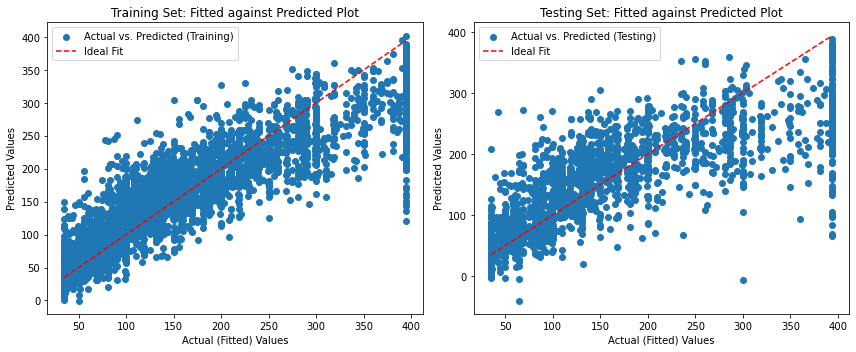

In [146]:
xgb_r3 = XGBRegressor(alpha=600,eta=0.7,reg_lambda=800,n_estimators=200,subsample=1,random_state=42).fit(X_train,y_train)

model_scores_regression(xgb_r3)
xgb_models.append(xgb_r3)
xgb_names.append('xgb_r3 - add regularization')

# test score slightly decreased

##### 3rd iteration 
- use higher values for regularisation params to reduce overfitting

In [147]:
param_grid = {'n_estimators': [50, 100, 200],
             'eta': [0.01, 0.05, 0.1, 0.7, 1],
             'subsample': [0.5, 0.7, 1],
             'lambda': [800, 1000, 1200],
             'alpha': [800, 1000, 1200]}

In [148]:
start_time = time.time()

grid = GridSearchCV(estimator=xgb_r, param_grid=param_grid, scoring='r2',verbose = 3,refit=True).fit(X_train,y_train)

end_time = time.time()

elapsed_time = end_time - start_time

Fitting 5 folds for each of 405 candidates, totalling 2025 fits
[CV 1/5] END alpha=800, eta=0.01, lambda=800, n_estimators=50, subsample=0.5;, score=-1.160 total time=   0.0s
[CV 2/5] END alpha=800, eta=0.01, lambda=800, n_estimators=50, subsample=0.5;, score=-1.302 total time=   0.0s
[CV 3/5] END alpha=800, eta=0.01, lambda=800, n_estimators=50, subsample=0.5;, score=-1.231 total time=   0.0s
[CV 4/5] END alpha=800, eta=0.01, lambda=800, n_estimators=50, subsample=0.5;, score=-1.264 total time=   0.0s
[CV 5/5] END alpha=800, eta=0.01, lambda=800, n_estimators=50, subsample=0.5;, score=-1.301 total time=   0.0s
[CV 1/5] END alpha=800, eta=0.01, lambda=800, n_estimators=50, subsample=0.7;, score=-1.065 total time=   0.0s
[CV 2/5] END alpha=800, eta=0.01, lambda=800, n_estimators=50, subsample=0.7;, score=-1.207 total time=   0.0s
[CV 3/5] END alpha=800, eta=0.01, lambda=800, n_estimators=50, subsample=0.7;, score=-1.136 total time=   0.0s
[CV 4/5] END alpha=800, eta=0.01, lambda=800, n_

[CV 5/5] END alpha=800, eta=0.01, lambda=1000, n_estimators=100, subsample=1;, score=-0.460 total time=   0.0s
[CV 1/5] END alpha=800, eta=0.01, lambda=1000, n_estimators=200, subsample=0.5;, score=0.020 total time=   0.2s
[CV 2/5] END alpha=800, eta=0.01, lambda=1000, n_estimators=200, subsample=0.5;, score=-0.060 total time=   0.1s
[CV 3/5] END alpha=800, eta=0.01, lambda=1000, n_estimators=200, subsample=0.5;, score=-0.014 total time=   0.1s
[CV 4/5] END alpha=800, eta=0.01, lambda=1000, n_estimators=200, subsample=0.5;, score=-0.079 total time=   0.1s
[CV 5/5] END alpha=800, eta=0.01, lambda=1000, n_estimators=200, subsample=0.5;, score=-0.065 total time=   0.2s
[CV 1/5] END alpha=800, eta=0.01, lambda=1000, n_estimators=200, subsample=0.7;, score=0.113 total time=   0.2s
[CV 2/5] END alpha=800, eta=0.01, lambda=1000, n_estimators=200, subsample=0.7;, score=0.042 total time=   0.2s
[CV 3/5] END alpha=800, eta=0.01, lambda=1000, n_estimators=200, subsample=0.7;, score=0.081 total ti

[CV 5/5] END alpha=800, eta=0.05, lambda=800, n_estimators=50, subsample=1;, score=0.262 total time=   0.0s
[CV 1/5] END alpha=800, eta=0.05, lambda=800, n_estimators=100, subsample=0.5;, score=0.375 total time=   0.1s
[CV 2/5] END alpha=800, eta=0.05, lambda=800, n_estimators=100, subsample=0.5;, score=0.366 total time=   0.1s
[CV 3/5] END alpha=800, eta=0.05, lambda=800, n_estimators=100, subsample=0.5;, score=0.378 total time=   0.1s
[CV 4/5] END alpha=800, eta=0.05, lambda=800, n_estimators=100, subsample=0.5;, score=0.342 total time=   0.1s
[CV 5/5] END alpha=800, eta=0.05, lambda=800, n_estimators=100, subsample=0.5;, score=0.379 total time=   0.1s
[CV 1/5] END alpha=800, eta=0.05, lambda=800, n_estimators=100, subsample=0.7;, score=0.399 total time=   0.1s
[CV 2/5] END alpha=800, eta=0.05, lambda=800, n_estimators=100, subsample=0.7;, score=0.392 total time=   0.1s
[CV 3/5] END alpha=800, eta=0.05, lambda=800, n_estimators=100, subsample=0.7;, score=0.404 total time=   0.1s
[CV 

[CV 4/5] END alpha=800, eta=0.05, lambda=1000, n_estimators=200, subsample=1;, score=0.460 total time=   0.2s
[CV 5/5] END alpha=800, eta=0.05, lambda=1000, n_estimators=200, subsample=1;, score=0.507 total time=   0.2s
[CV 1/5] END alpha=800, eta=0.05, lambda=1200, n_estimators=50, subsample=0.5;, score=0.114 total time=   0.0s
[CV 2/5] END alpha=800, eta=0.05, lambda=1200, n_estimators=50, subsample=0.5;, score=0.048 total time=   0.0s
[CV 3/5] END alpha=800, eta=0.05, lambda=1200, n_estimators=50, subsample=0.5;, score=0.087 total time=   0.0s
[CV 4/5] END alpha=800, eta=0.05, lambda=1200, n_estimators=50, subsample=0.5;, score=0.024 total time=   0.0s
[CV 5/5] END alpha=800, eta=0.05, lambda=1200, n_estimators=50, subsample=0.5;, score=0.041 total time=   0.0s
[CV 1/5] END alpha=800, eta=0.05, lambda=1200, n_estimators=50, subsample=0.7;, score=0.195 total time=   0.0s
[CV 2/5] END alpha=800, eta=0.05, lambda=1200, n_estimators=50, subsample=0.7;, score=0.138 total time=   0.0s
[CV

[CV 4/5] END alpha=800, eta=0.1, lambda=800, n_estimators=100, subsample=1;, score=0.474 total time=   0.1s
[CV 5/5] END alpha=800, eta=0.1, lambda=800, n_estimators=100, subsample=1;, score=0.518 total time=   0.1s
[CV 1/5] END alpha=800, eta=0.1, lambda=800, n_estimators=200, subsample=0.5;, score=0.485 total time=   0.3s
[CV 2/5] END alpha=800, eta=0.1, lambda=800, n_estimators=200, subsample=0.5;, score=0.506 total time=   0.3s
[CV 3/5] END alpha=800, eta=0.1, lambda=800, n_estimators=200, subsample=0.5;, score=0.514 total time=   0.3s
[CV 4/5] END alpha=800, eta=0.1, lambda=800, n_estimators=200, subsample=0.5;, score=0.482 total time=   0.3s
[CV 5/5] END alpha=800, eta=0.1, lambda=800, n_estimators=200, subsample=0.5;, score=0.531 total time=   0.3s
[CV 1/5] END alpha=800, eta=0.1, lambda=800, n_estimators=200, subsample=0.7;, score=0.504 total time=   0.3s
[CV 2/5] END alpha=800, eta=0.1, lambda=800, n_estimators=200, subsample=0.7;, score=0.525 total time=   0.3s
[CV 3/5] END a

[CV 5/5] END alpha=800, eta=0.1, lambda=1200, n_estimators=50, subsample=1;, score=0.408 total time=   0.0s
[CV 1/5] END alpha=800, eta=0.1, lambda=1200, n_estimators=100, subsample=0.5;, score=0.416 total time=   0.1s
[CV 2/5] END alpha=800, eta=0.1, lambda=1200, n_estimators=100, subsample=0.5;, score=0.425 total time=   0.1s
[CV 3/5] END alpha=800, eta=0.1, lambda=1200, n_estimators=100, subsample=0.5;, score=0.436 total time=   0.1s
[CV 4/5] END alpha=800, eta=0.1, lambda=1200, n_estimators=100, subsample=0.5;, score=0.408 total time=   0.1s
[CV 5/5] END alpha=800, eta=0.1, lambda=1200, n_estimators=100, subsample=0.5;, score=0.450 total time=   0.1s
[CV 1/5] END alpha=800, eta=0.1, lambda=1200, n_estimators=100, subsample=0.7;, score=0.437 total time=   0.1s
[CV 2/5] END alpha=800, eta=0.1, lambda=1200, n_estimators=100, subsample=0.7;, score=0.451 total time=   0.1s
[CV 3/5] END alpha=800, eta=0.1, lambda=1200, n_estimators=100, subsample=0.7;, score=0.458 total time=   0.1s
[CV 

[CV 5/5] END alpha=800, eta=0.7, lambda=800, n_estimators=200, subsample=1;, score=0.600 total time=   0.2s
[CV 1/5] END alpha=800, eta=0.7, lambda=1000, n_estimators=50, subsample=0.5;, score=0.492 total time=   0.0s
[CV 2/5] END alpha=800, eta=0.7, lambda=1000, n_estimators=50, subsample=0.5;, score=0.520 total time=   0.0s
[CV 3/5] END alpha=800, eta=0.7, lambda=1000, n_estimators=50, subsample=0.5;, score=0.526 total time=   0.0s
[CV 4/5] END alpha=800, eta=0.7, lambda=1000, n_estimators=50, subsample=0.5;, score=0.490 total time=   0.0s
[CV 5/5] END alpha=800, eta=0.7, lambda=1000, n_estimators=50, subsample=0.5;, score=0.552 total time=   0.0s
[CV 1/5] END alpha=800, eta=0.7, lambda=1000, n_estimators=50, subsample=0.7;, score=0.511 total time=   0.0s
[CV 2/5] END alpha=800, eta=0.7, lambda=1000, n_estimators=50, subsample=0.7;, score=0.536 total time=   0.0s
[CV 3/5] END alpha=800, eta=0.7, lambda=1000, n_estimators=50, subsample=0.7;, score=0.552 total time=   0.0s
[CV 4/5] END

[CV 1/5] END alpha=800, eta=0.7, lambda=1200, n_estimators=200, subsample=0.5;, score=0.536 total time=   0.3s
[CV 2/5] END alpha=800, eta=0.7, lambda=1200, n_estimators=200, subsample=0.5;, score=0.573 total time=   0.3s
[CV 3/5] END alpha=800, eta=0.7, lambda=1200, n_estimators=200, subsample=0.5;, score=0.578 total time=   0.3s
[CV 4/5] END alpha=800, eta=0.7, lambda=1200, n_estimators=200, subsample=0.5;, score=0.528 total time=   0.3s
[CV 5/5] END alpha=800, eta=0.7, lambda=1200, n_estimators=200, subsample=0.5;, score=0.598 total time=   0.3s
[CV 1/5] END alpha=800, eta=0.7, lambda=1200, n_estimators=200, subsample=0.7;, score=0.546 total time=   0.3s
[CV 2/5] END alpha=800, eta=0.7, lambda=1200, n_estimators=200, subsample=0.7;, score=0.583 total time=   0.3s
[CV 3/5] END alpha=800, eta=0.7, lambda=1200, n_estimators=200, subsample=0.7;, score=0.594 total time=   0.3s
[CV 4/5] END alpha=800, eta=0.7, lambda=1200, n_estimators=200, subsample=0.7;, score=0.542 total time=   0.3s
[

[CV 3/5] END alpha=800, eta=1, lambda=1000, n_estimators=100, subsample=0.5;, score=0.575 total time=   0.1s
[CV 4/5] END alpha=800, eta=1, lambda=1000, n_estimators=100, subsample=0.5;, score=0.524 total time=   0.1s
[CV 5/5] END alpha=800, eta=1, lambda=1000, n_estimators=100, subsample=0.5;, score=0.588 total time=   0.1s
[CV 1/5] END alpha=800, eta=1, lambda=1000, n_estimators=100, subsample=0.7;, score=0.529 total time=   0.1s
[CV 2/5] END alpha=800, eta=1, lambda=1000, n_estimators=100, subsample=0.7;, score=0.575 total time=   0.1s
[CV 3/5] END alpha=800, eta=1, lambda=1000, n_estimators=100, subsample=0.7;, score=0.582 total time=   0.1s
[CV 4/5] END alpha=800, eta=1, lambda=1000, n_estimators=100, subsample=0.7;, score=0.536 total time=   0.1s
[CV 5/5] END alpha=800, eta=1, lambda=1000, n_estimators=100, subsample=0.7;, score=0.591 total time=   0.1s
[CV 1/5] END alpha=800, eta=1, lambda=1000, n_estimators=100, subsample=1;, score=0.535 total time=   0.1s
[CV 2/5] END alpha=80

[CV 4/5] END alpha=1000, eta=0.01, lambda=800, n_estimators=50, subsample=0.5;, score=-1.265 total time=   0.0s
[CV 5/5] END alpha=1000, eta=0.01, lambda=800, n_estimators=50, subsample=0.5;, score=-1.302 total time=   0.0s
[CV 1/5] END alpha=1000, eta=0.01, lambda=800, n_estimators=50, subsample=0.7;, score=-1.066 total time=   0.0s
[CV 2/5] END alpha=1000, eta=0.01, lambda=800, n_estimators=50, subsample=0.7;, score=-1.208 total time=   0.0s
[CV 3/5] END alpha=1000, eta=0.01, lambda=800, n_estimators=50, subsample=0.7;, score=-1.137 total time=   0.0s
[CV 4/5] END alpha=1000, eta=0.01, lambda=800, n_estimators=50, subsample=0.7;, score=-1.176 total time=   0.0s
[CV 5/5] END alpha=1000, eta=0.01, lambda=800, n_estimators=50, subsample=0.7;, score=-1.209 total time=   0.0s
[CV 1/5] END alpha=1000, eta=0.01, lambda=800, n_estimators=50, subsample=1;, score=-0.965 total time=   0.0s
[CV 2/5] END alpha=1000, eta=0.01, lambda=800, n_estimators=50, subsample=1;, score=-1.113 total time=   0

[CV 3/5] END alpha=1000, eta=0.01, lambda=1000, n_estimators=200, subsample=0.5;, score=-0.015 total time=   0.1s
[CV 4/5] END alpha=1000, eta=0.01, lambda=1000, n_estimators=200, subsample=0.5;, score=-0.081 total time=   0.1s
[CV 5/5] END alpha=1000, eta=0.01, lambda=1000, n_estimators=200, subsample=0.5;, score=-0.067 total time=   0.2s
[CV 1/5] END alpha=1000, eta=0.01, lambda=1000, n_estimators=200, subsample=0.7;, score=0.113 total time=   0.2s
[CV 2/5] END alpha=1000, eta=0.01, lambda=1000, n_estimators=200, subsample=0.7;, score=0.041 total time=   0.2s
[CV 3/5] END alpha=1000, eta=0.01, lambda=1000, n_estimators=200, subsample=0.7;, score=0.081 total time=   0.1s
[CV 4/5] END alpha=1000, eta=0.01, lambda=1000, n_estimators=200, subsample=0.7;, score=0.015 total time=   0.2s
[CV 5/5] END alpha=1000, eta=0.01, lambda=1000, n_estimators=200, subsample=0.7;, score=0.033 total time=   0.1s
[CV 1/5] END alpha=1000, eta=0.01, lambda=1000, n_estimators=200, subsample=1;, score=0.181 t

[CV 2/5] END alpha=1000, eta=0.05, lambda=800, n_estimators=100, subsample=0.5;, score=0.364 total time=   0.1s
[CV 3/5] END alpha=1000, eta=0.05, lambda=800, n_estimators=100, subsample=0.5;, score=0.377 total time=   0.1s
[CV 4/5] END alpha=1000, eta=0.05, lambda=800, n_estimators=100, subsample=0.5;, score=0.341 total time=   0.1s
[CV 5/5] END alpha=1000, eta=0.05, lambda=800, n_estimators=100, subsample=0.5;, score=0.378 total time=   0.1s
[CV 1/5] END alpha=1000, eta=0.05, lambda=800, n_estimators=100, subsample=0.7;, score=0.397 total time=   0.1s
[CV 2/5] END alpha=1000, eta=0.05, lambda=800, n_estimators=100, subsample=0.7;, score=0.391 total time=   0.1s
[CV 3/5] END alpha=1000, eta=0.05, lambda=800, n_estimators=100, subsample=0.7;, score=0.403 total time=   0.1s
[CV 4/5] END alpha=1000, eta=0.05, lambda=800, n_estimators=100, subsample=0.7;, score=0.369 total time=   0.1s
[CV 5/5] END alpha=1000, eta=0.05, lambda=800, n_estimators=100, subsample=0.7;, score=0.409 total time=

[CV 3/5] END alpha=1000, eta=0.05, lambda=1200, n_estimators=50, subsample=0.5;, score=0.086 total time=   0.0s
[CV 4/5] END alpha=1000, eta=0.05, lambda=1200, n_estimators=50, subsample=0.5;, score=0.022 total time=   0.0s
[CV 5/5] END alpha=1000, eta=0.05, lambda=1200, n_estimators=50, subsample=0.5;, score=0.039 total time=   0.0s
[CV 1/5] END alpha=1000, eta=0.05, lambda=1200, n_estimators=50, subsample=0.7;, score=0.195 total time=   0.0s
[CV 2/5] END alpha=1000, eta=0.05, lambda=1200, n_estimators=50, subsample=0.7;, score=0.137 total time=   0.0s
[CV 3/5] END alpha=1000, eta=0.05, lambda=1200, n_estimators=50, subsample=0.7;, score=0.171 total time=   0.0s
[CV 4/5] END alpha=1000, eta=0.05, lambda=1200, n_estimators=50, subsample=0.7;, score=0.111 total time=   0.0s
[CV 5/5] END alpha=1000, eta=0.05, lambda=1200, n_estimators=50, subsample=0.7;, score=0.132 total time=   0.0s
[CV 1/5] END alpha=1000, eta=0.05, lambda=1200, n_estimators=50, subsample=1;, score=0.255 total time=  

[CV 2/5] END alpha=1000, eta=0.1, lambda=800, n_estimators=200, subsample=0.5;, score=0.504 total time=   0.3s
[CV 3/5] END alpha=1000, eta=0.1, lambda=800, n_estimators=200, subsample=0.5;, score=0.511 total time=   0.3s
[CV 4/5] END alpha=1000, eta=0.1, lambda=800, n_estimators=200, subsample=0.5;, score=0.477 total time=   0.3s
[CV 5/5] END alpha=1000, eta=0.1, lambda=800, n_estimators=200, subsample=0.5;, score=0.528 total time=   0.4s
[CV 1/5] END alpha=1000, eta=0.1, lambda=800, n_estimators=200, subsample=0.7;, score=0.498 total time=   0.4s
[CV 2/5] END alpha=1000, eta=0.1, lambda=800, n_estimators=200, subsample=0.7;, score=0.523 total time=   0.3s
[CV 3/5] END alpha=1000, eta=0.1, lambda=800, n_estimators=200, subsample=0.7;, score=0.530 total time=   0.3s
[CV 4/5] END alpha=1000, eta=0.1, lambda=800, n_estimators=200, subsample=0.7;, score=0.491 total time=   0.3s
[CV 5/5] END alpha=1000, eta=0.1, lambda=800, n_estimators=200, subsample=0.7;, score=0.544 total time=   0.3s
[

[CV 2/5] END alpha=1000, eta=0.1, lambda=1200, n_estimators=100, subsample=0.5;, score=0.422 total time=   0.1s
[CV 3/5] END alpha=1000, eta=0.1, lambda=1200, n_estimators=100, subsample=0.5;, score=0.434 total time=   0.1s
[CV 4/5] END alpha=1000, eta=0.1, lambda=1200, n_estimators=100, subsample=0.5;, score=0.407 total time=   0.1s
[CV 5/5] END alpha=1000, eta=0.1, lambda=1200, n_estimators=100, subsample=0.5;, score=0.447 total time=   0.1s
[CV 1/5] END alpha=1000, eta=0.1, lambda=1200, n_estimators=100, subsample=0.7;, score=0.436 total time=   0.1s
[CV 2/5] END alpha=1000, eta=0.1, lambda=1200, n_estimators=100, subsample=0.7;, score=0.449 total time=   0.1s
[CV 3/5] END alpha=1000, eta=0.1, lambda=1200, n_estimators=100, subsample=0.7;, score=0.457 total time=   0.1s
[CV 4/5] END alpha=1000, eta=0.1, lambda=1200, n_estimators=100, subsample=0.7;, score=0.427 total time=   0.1s
[CV 5/5] END alpha=1000, eta=0.1, lambda=1200, n_estimators=100, subsample=0.7;, score=0.471 total time=

[CV 3/5] END alpha=1000, eta=0.7, lambda=1000, n_estimators=50, subsample=0.5;, score=0.534 total time=   0.0s
[CV 4/5] END alpha=1000, eta=0.7, lambda=1000, n_estimators=50, subsample=0.5;, score=0.491 total time=   0.0s
[CV 5/5] END alpha=1000, eta=0.7, lambda=1000, n_estimators=50, subsample=0.5;, score=0.551 total time=   0.0s
[CV 1/5] END alpha=1000, eta=0.7, lambda=1000, n_estimators=50, subsample=0.7;, score=0.511 total time=   0.0s
[CV 2/5] END alpha=1000, eta=0.7, lambda=1000, n_estimators=50, subsample=0.7;, score=0.538 total time=   0.0s
[CV 3/5] END alpha=1000, eta=0.7, lambda=1000, n_estimators=50, subsample=0.7;, score=0.545 total time=   0.0s
[CV 4/5] END alpha=1000, eta=0.7, lambda=1000, n_estimators=50, subsample=0.7;, score=0.500 total time=   0.0s
[CV 5/5] END alpha=1000, eta=0.7, lambda=1000, n_estimators=50, subsample=0.7;, score=0.565 total time=   0.0s
[CV 1/5] END alpha=1000, eta=0.7, lambda=1000, n_estimators=50, subsample=1;, score=0.527 total time=   0.0s
[CV

[CV 2/5] END alpha=1000, eta=0.7, lambda=1200, n_estimators=200, subsample=0.5;, score=0.568 total time=   0.3s
[CV 3/5] END alpha=1000, eta=0.7, lambda=1200, n_estimators=200, subsample=0.5;, score=0.578 total time=   0.3s
[CV 4/5] END alpha=1000, eta=0.7, lambda=1200, n_estimators=200, subsample=0.5;, score=0.528 total time=   0.3s
[CV 5/5] END alpha=1000, eta=0.7, lambda=1200, n_estimators=200, subsample=0.5;, score=0.594 total time=   0.3s
[CV 1/5] END alpha=1000, eta=0.7, lambda=1200, n_estimators=200, subsample=0.7;, score=0.540 total time=   0.3s
[CV 2/5] END alpha=1000, eta=0.7, lambda=1200, n_estimators=200, subsample=0.7;, score=0.580 total time=   0.3s
[CV 3/5] END alpha=1000, eta=0.7, lambda=1200, n_estimators=200, subsample=0.7;, score=0.591 total time=   0.3s
[CV 4/5] END alpha=1000, eta=0.7, lambda=1200, n_estimators=200, subsample=0.7;, score=0.540 total time=   0.3s
[CV 5/5] END alpha=1000, eta=0.7, lambda=1200, n_estimators=200, subsample=0.7;, score=0.602 total time=

[CV 4/5] END alpha=1000, eta=1, lambda=1000, n_estimators=100, subsample=0.5;, score=0.516 total time=   0.1s
[CV 5/5] END alpha=1000, eta=1, lambda=1000, n_estimators=100, subsample=0.5;, score=0.587 total time=   0.1s
[CV 1/5] END alpha=1000, eta=1, lambda=1000, n_estimators=100, subsample=0.7;, score=0.531 total time=   0.1s
[CV 2/5] END alpha=1000, eta=1, lambda=1000, n_estimators=100, subsample=0.7;, score=0.581 total time=   0.1s
[CV 3/5] END alpha=1000, eta=1, lambda=1000, n_estimators=100, subsample=0.7;, score=0.575 total time=   0.1s
[CV 4/5] END alpha=1000, eta=1, lambda=1000, n_estimators=100, subsample=0.7;, score=0.535 total time=   0.1s
[CV 5/5] END alpha=1000, eta=1, lambda=1000, n_estimators=100, subsample=0.7;, score=0.590 total time=   0.1s
[CV 1/5] END alpha=1000, eta=1, lambda=1000, n_estimators=100, subsample=1;, score=0.539 total time=   0.1s
[CV 2/5] END alpha=1000, eta=1, lambda=1000, n_estimators=100, subsample=1;, score=0.593 total time=   0.1s
[CV 3/5] END a

[CV 3/5] END alpha=1200, eta=0.01, lambda=800, n_estimators=50, subsample=0.7;, score=-1.138 total time=   0.0s
[CV 4/5] END alpha=1200, eta=0.01, lambda=800, n_estimators=50, subsample=0.7;, score=-1.177 total time=   0.0s
[CV 5/5] END alpha=1200, eta=0.01, lambda=800, n_estimators=50, subsample=0.7;, score=-1.209 total time=   0.0s
[CV 1/5] END alpha=1200, eta=0.01, lambda=800, n_estimators=50, subsample=1;, score=-0.965 total time=   0.0s
[CV 2/5] END alpha=1200, eta=0.01, lambda=800, n_estimators=50, subsample=1;, score=-1.114 total time=   0.0s
[CV 3/5] END alpha=1200, eta=0.01, lambda=800, n_estimators=50, subsample=1;, score=-1.043 total time=   0.0s
[CV 4/5] END alpha=1200, eta=0.01, lambda=800, n_estimators=50, subsample=1;, score=-1.085 total time=   0.0s
[CV 5/5] END alpha=1200, eta=0.01, lambda=800, n_estimators=50, subsample=1;, score=-1.115 total time=   0.0s
[CV 1/5] END alpha=1200, eta=0.01, lambda=800, n_estimators=100, subsample=0.5;, score=-0.502 total time=   0.0s
[

[CV 1/5] END alpha=1200, eta=0.01, lambda=1000, n_estimators=200, subsample=0.7;, score=0.111 total time=   0.2s
[CV 2/5] END alpha=1200, eta=0.01, lambda=1000, n_estimators=200, subsample=0.7;, score=0.040 total time=   0.2s
[CV 3/5] END alpha=1200, eta=0.01, lambda=1000, n_estimators=200, subsample=0.7;, score=0.080 total time=   0.1s
[CV 4/5] END alpha=1200, eta=0.01, lambda=1000, n_estimators=200, subsample=0.7;, score=0.014 total time=   0.1s
[CV 5/5] END alpha=1200, eta=0.01, lambda=1000, n_estimators=200, subsample=0.7;, score=0.032 total time=   0.1s
[CV 1/5] END alpha=1200, eta=0.01, lambda=1000, n_estimators=200, subsample=1;, score=0.181 total time=   0.1s
[CV 2/5] END alpha=1200, eta=0.01, lambda=1000, n_estimators=200, subsample=1;, score=0.116 total time=   0.1s
[CV 3/5] END alpha=1200, eta=0.01, lambda=1000, n_estimators=200, subsample=1;, score=0.151 total time=   0.1s
[CV 4/5] END alpha=1200, eta=0.01, lambda=1000, n_estimators=200, subsample=1;, score=0.088 total time

[CV 5/5] END alpha=1200, eta=0.05, lambda=800, n_estimators=100, subsample=0.5;, score=0.377 total time=   0.1s
[CV 1/5] END alpha=1200, eta=0.05, lambda=800, n_estimators=100, subsample=0.7;, score=0.396 total time=   0.1s
[CV 2/5] END alpha=1200, eta=0.05, lambda=800, n_estimators=100, subsample=0.7;, score=0.390 total time=   0.1s
[CV 3/5] END alpha=1200, eta=0.05, lambda=800, n_estimators=100, subsample=0.7;, score=0.401 total time=   0.1s
[CV 4/5] END alpha=1200, eta=0.05, lambda=800, n_estimators=100, subsample=0.7;, score=0.367 total time=   0.1s
[CV 5/5] END alpha=1200, eta=0.05, lambda=800, n_estimators=100, subsample=0.7;, score=0.407 total time=   0.1s
[CV 1/5] END alpha=1200, eta=0.05, lambda=800, n_estimators=100, subsample=1;, score=0.420 total time=   0.1s
[CV 2/5] END alpha=1200, eta=0.05, lambda=800, n_estimators=100, subsample=1;, score=0.414 total time=   0.1s
[CV 3/5] END alpha=1200, eta=0.05, lambda=800, n_estimators=100, subsample=1;, score=0.429 total time=   0.1

[CV 1/5] END alpha=1200, eta=0.05, lambda=1200, n_estimators=50, subsample=0.7;, score=0.195 total time=   0.0s
[CV 2/5] END alpha=1200, eta=0.05, lambda=1200, n_estimators=50, subsample=0.7;, score=0.136 total time=   0.0s
[CV 3/5] END alpha=1200, eta=0.05, lambda=1200, n_estimators=50, subsample=0.7;, score=0.170 total time=   0.0s
[CV 4/5] END alpha=1200, eta=0.05, lambda=1200, n_estimators=50, subsample=0.7;, score=0.110 total time=   0.0s
[CV 5/5] END alpha=1200, eta=0.05, lambda=1200, n_estimators=50, subsample=0.7;, score=0.132 total time=   0.0s
[CV 1/5] END alpha=1200, eta=0.05, lambda=1200, n_estimators=50, subsample=1;, score=0.255 total time=   0.0s
[CV 2/5] END alpha=1200, eta=0.05, lambda=1200, n_estimators=50, subsample=1;, score=0.206 total time=   0.0s
[CV 3/5] END alpha=1200, eta=0.05, lambda=1200, n_estimators=50, subsample=1;, score=0.233 total time=   0.0s
[CV 4/5] END alpha=1200, eta=0.05, lambda=1200, n_estimators=50, subsample=1;, score=0.175 total time=   0.0s


[CV 5/5] END alpha=1200, eta=0.1, lambda=800, n_estimators=200, subsample=0.5;, score=0.524 total time=   0.3s
[CV 1/5] END alpha=1200, eta=0.1, lambda=800, n_estimators=200, subsample=0.7;, score=0.496 total time=   0.3s
[CV 2/5] END alpha=1200, eta=0.1, lambda=800, n_estimators=200, subsample=0.7;, score=0.519 total time=   0.3s
[CV 3/5] END alpha=1200, eta=0.1, lambda=800, n_estimators=200, subsample=0.7;, score=0.528 total time=   0.3s
[CV 4/5] END alpha=1200, eta=0.1, lambda=800, n_estimators=200, subsample=0.7;, score=0.489 total time=   0.3s
[CV 5/5] END alpha=1200, eta=0.1, lambda=800, n_estimators=200, subsample=0.7;, score=0.543 total time=   0.3s
[CV 1/5] END alpha=1200, eta=0.1, lambda=800, n_estimators=200, subsample=1;, score=0.509 total time=   0.2s
[CV 2/5] END alpha=1200, eta=0.1, lambda=800, n_estimators=200, subsample=1;, score=0.538 total time=   0.2s
[CV 3/5] END alpha=1200, eta=0.1, lambda=800, n_estimators=200, subsample=1;, score=0.542 total time=   0.2s
[CV 4/5

[CV 4/5] END alpha=1200, eta=0.1, lambda=1200, n_estimators=100, subsample=0.5;, score=0.404 total time=   0.1s
[CV 5/5] END alpha=1200, eta=0.1, lambda=1200, n_estimators=100, subsample=0.5;, score=0.444 total time=   0.1s
[CV 1/5] END alpha=1200, eta=0.1, lambda=1200, n_estimators=100, subsample=0.7;, score=0.433 total time=   0.1s
[CV 2/5] END alpha=1200, eta=0.1, lambda=1200, n_estimators=100, subsample=0.7;, score=0.448 total time=   0.1s
[CV 3/5] END alpha=1200, eta=0.1, lambda=1200, n_estimators=100, subsample=0.7;, score=0.455 total time=   0.1s
[CV 4/5] END alpha=1200, eta=0.1, lambda=1200, n_estimators=100, subsample=0.7;, score=0.425 total time=   0.1s
[CV 5/5] END alpha=1200, eta=0.1, lambda=1200, n_estimators=100, subsample=0.7;, score=0.470 total time=   0.1s
[CV 1/5] END alpha=1200, eta=0.1, lambda=1200, n_estimators=100, subsample=1;, score=0.456 total time=   0.1s
[CV 2/5] END alpha=1200, eta=0.1, lambda=1200, n_estimators=100, subsample=1;, score=0.471 total time=   0

[CV 4/5] END alpha=1200, eta=0.7, lambda=1000, n_estimators=50, subsample=0.5;, score=0.480 total time=   0.0s
[CV 5/5] END alpha=1200, eta=0.7, lambda=1000, n_estimators=50, subsample=0.5;, score=0.546 total time=   0.0s
[CV 1/5] END alpha=1200, eta=0.7, lambda=1000, n_estimators=50, subsample=0.7;, score=0.513 total time=   0.0s
[CV 2/5] END alpha=1200, eta=0.7, lambda=1000, n_estimators=50, subsample=0.7;, score=0.532 total time=   0.0s
[CV 3/5] END alpha=1200, eta=0.7, lambda=1000, n_estimators=50, subsample=0.7;, score=0.541 total time=   0.0s
[CV 4/5] END alpha=1200, eta=0.7, lambda=1000, n_estimators=50, subsample=0.7;, score=0.498 total time=   0.0s
[CV 5/5] END alpha=1200, eta=0.7, lambda=1000, n_estimators=50, subsample=0.7;, score=0.556 total time=   0.0s
[CV 1/5] END alpha=1200, eta=0.7, lambda=1000, n_estimators=50, subsample=1;, score=0.524 total time=   0.0s
[CV 2/5] END alpha=1200, eta=0.7, lambda=1000, n_estimators=50, subsample=1;, score=0.555 total time=   0.0s
[CV 3

[CV 3/5] END alpha=1200, eta=0.7, lambda=1200, n_estimators=200, subsample=0.5;, score=0.577 total time=   0.3s
[CV 4/5] END alpha=1200, eta=0.7, lambda=1200, n_estimators=200, subsample=0.5;, score=0.524 total time=   0.2s
[CV 5/5] END alpha=1200, eta=0.7, lambda=1200, n_estimators=200, subsample=0.5;, score=0.595 total time=   0.3s
[CV 1/5] END alpha=1200, eta=0.7, lambda=1200, n_estimators=200, subsample=0.7;, score=0.544 total time=   0.3s
[CV 2/5] END alpha=1200, eta=0.7, lambda=1200, n_estimators=200, subsample=0.7;, score=0.578 total time=   0.3s
[CV 3/5] END alpha=1200, eta=0.7, lambda=1200, n_estimators=200, subsample=0.7;, score=0.587 total time=   0.3s
[CV 4/5] END alpha=1200, eta=0.7, lambda=1200, n_estimators=200, subsample=0.7;, score=0.536 total time=   0.3s
[CV 5/5] END alpha=1200, eta=0.7, lambda=1200, n_estimators=200, subsample=0.7;, score=0.598 total time=   0.3s
[CV 1/5] END alpha=1200, eta=0.7, lambda=1200, n_estimators=200, subsample=1;, score=0.533 total time=  

[CV 4/5] END alpha=1200, eta=1, lambda=1000, n_estimators=100, subsample=0.5;, score=0.505 total time=   0.1s
[CV 5/5] END alpha=1200, eta=1, lambda=1000, n_estimators=100, subsample=0.5;, score=0.585 total time=   0.1s
[CV 1/5] END alpha=1200, eta=1, lambda=1000, n_estimators=100, subsample=0.7;, score=0.529 total time=   0.1s
[CV 2/5] END alpha=1200, eta=1, lambda=1000, n_estimators=100, subsample=0.7;, score=0.578 total time=   0.1s
[CV 3/5] END alpha=1200, eta=1, lambda=1000, n_estimators=100, subsample=0.7;, score=0.573 total time=   0.1s
[CV 4/5] END alpha=1200, eta=1, lambda=1000, n_estimators=100, subsample=0.7;, score=0.537 total time=   0.1s
[CV 5/5] END alpha=1200, eta=1, lambda=1000, n_estimators=100, subsample=0.7;, score=0.589 total time=   0.1s
[CV 1/5] END alpha=1200, eta=1, lambda=1000, n_estimators=100, subsample=1;, score=0.541 total time=   0.1s
[CV 2/5] END alpha=1200, eta=1, lambda=1000, n_estimators=100, subsample=1;, score=0.581 total time=   0.1s
[CV 3/5] END a

In [149]:
print(grid.best_score_)
print(grid.best_params_)

minutes, seconds = divmod(elapsed_time, 60)
formatted_time = "{:02}:{:02}".format(int(minutes), int(seconds))
print("Elapsed Time: {}".format(formatted_time)) 

0.5799717226814408
{'alpha': 800, 'eta': 0.7, 'lambda': 1000, 'n_estimators': 200, 'subsample': 1}
Elapsed Time: 06:26


[10:05:48] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "reg_lamda" } are not used.

Model : XGBRegressor(alpha=800, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eta=0.7, eval_metric=None,
             feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, ...):

R-Square:
0.8150349001143038 (Train R^2 Value)
0.5730430456605519 (Test R^2 Value)

RMSE:
41.95779042258059 (Train RMSE)


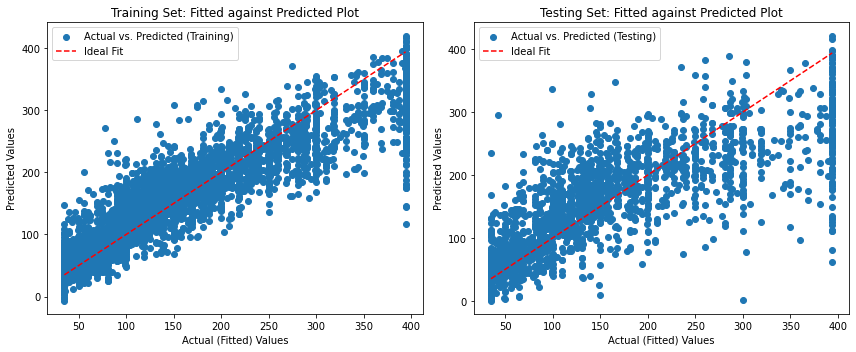

In [150]:
xgb_r4 = XGBRegressor(alpha=800,eta=0.7,reg_lamda=1000,n_estimators=200,subsample=1).fit(X_train,y_train)

model_scores_regression(xgb_r4)
xgb_models.append(xgb_r4)
xgb_names.append('xgb_r4 - higher regularization')

### 2.3.2.3 Optimized Models

In [151]:
scores_table_xgb = []
for model, name in zip(xgb_models, xgb_names):
    train_rsq = model.score(X_train, y_train)
    test_rsq = model.score(X_test, y_test)
    scores_table_xgb.append([name, train_rsq, test_rsq])

df_scores_xgb = pd.DataFrame(scores_table_xgb, columns=["Model", "Train R-squared", "Test R-squared"])

df_scores_xgb

Model  Train R-squared  Test R-squared
0                               base         0.922008        0.600510
1  xgb_r2 - low number of estimators         0.973229        0.611332
2        xgb_r3 - add regularization         0.787585        0.594378
3     xgb_r4 - higher regularization         0.815035        0.573043

### 2.3.3 Model 3 (SVR)

Model : SVR():

R-Square:
0.23880521370567598 (Train R^2 Value)
0.20868242544054627 (Test R^2 Value)

RMSE:
85.11686435952412 (Train RMSE)
90.00247286420945 (Test RMSE)


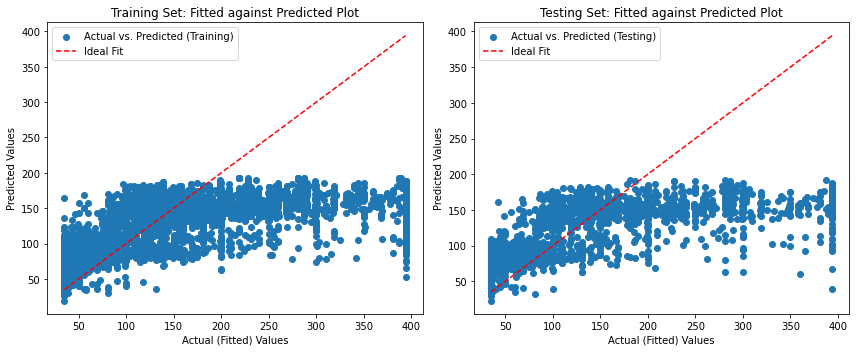

In [152]:
model_scores_regression(svr)

### 2.3.3.1 Hyperparameter Inspection

- <mark>kernel</mark> : type of kernel  
- <mark>gamma</mark> : kernel coefficient for 'rbf','poly' and 'sigmoid'
- <mark>C</mark> : regularization param
- <mark>epsilon</mark> : regularization param
- <mark>max_iter</mark> : iterations within solver

### 2.3.3.1 (a) gamma

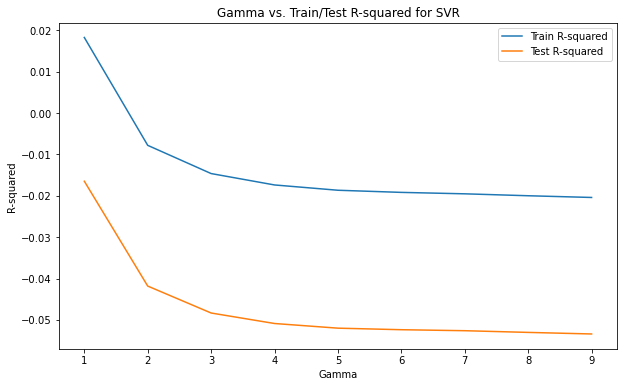

In [153]:
gamma_values = np.arange(1,10,1)

# Lists to store R-squared values
train_scores = []
test_scores = []

# Iterate over gamma values
for gamma in gamma_values:
    # Train SVR model
    svr = SVR(kernel='rbf', gamma=gamma)
    svr.fit(X_train, y_train)

    # Predict on training set
    y_train_pred = svr.predict(X_train)
    train_rsq = r2_score(y_train, y_train_pred)
    train_scores.append(train_rsq)

    # Predict on test set
    y_test_pred = svr.predict(X_test)
    test_rsq = r2_score(y_test, y_test_pred)
    test_scores.append(test_rsq)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(gamma_values, train_scores, label='Train R-squared')
plt.plot(gamma_values, test_scores, label='Test R-squared')
plt.xlabel('Gamma')
plt.ylabel('R-squared')
plt.title('Gamma vs. Train/Test R-squared for SVR')
plt.legend()
plt.show()

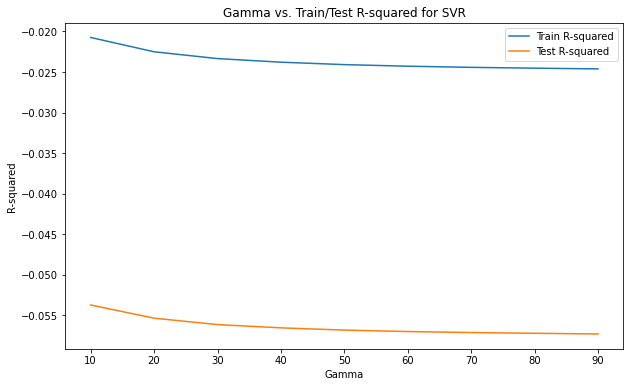

In [154]:
gamma_values = np.arange(10,100,10)

# Lists to store R-squared values
train_scores = []
test_scores = []

# Iterate over gamma values
for gamma in gamma_values:
    # Train SVR model
    svr = SVR(kernel='rbf', gamma=gamma)
    svr.fit(X_train, y_train)

    # Predict on training set
    y_train_pred = svr.predict(X_train)
    train_rsq = r2_score(y_train, y_train_pred)
    train_scores.append(train_rsq)

    # Predict on test set
    y_test_pred = svr.predict(X_test)
    test_rsq = r2_score(y_test, y_test_pred)
    test_scores.append(test_rsq)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(gamma_values, train_scores, label='Train R-squared')
plt.plot(gamma_values, test_scores, label='Test R-squared')# Use a log scale for better visualization
plt.xlabel('Gamma')
plt.ylabel('R-squared')
plt.title('Gamma vs. Train/Test R-squared for SVR')
plt.legend()
plt.show()

### 2.3.3.1 (b) max_iter 

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=500).  Con

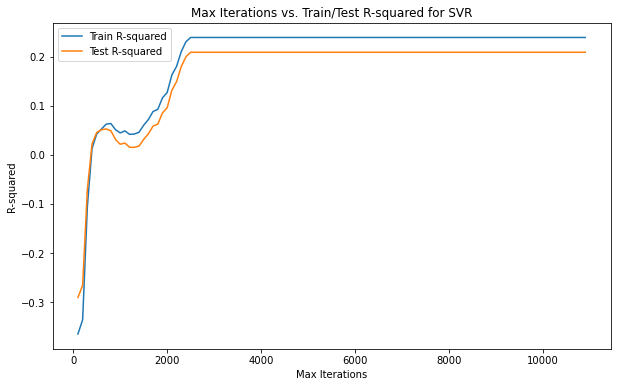

In [155]:
max_iter_values = np.arange(100,11000,100)

# Lists to store R-squared values
train_scores = []
test_scores = []

# Iterate over max_iter values
for max_iter in max_iter_values:
    # Train SVR model
    svr = SVR(max_iter=max_iter)
    svr.fit(X_train, y_train)

    # Predict on training set
    y_train_pred = svr.predict(X_train)
    train_rsq = r2_score(y_train, y_train_pred)
    train_scores.append(train_rsq)

    # Predict on test set
    y_test_pred = svr.predict(X_test)
    test_rsq = r2_score(y_test, y_test_pred)
    test_scores.append(test_rsq)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(max_iter_values, train_scores, label='Train R-squared')
plt.plot(max_iter_values, test_scores, label='Test R-squared')
plt.xlabel('Max Iterations')
plt.ylabel('R-squared')
plt.title('Max Iterations vs. Train/Test R-squared for SVR')
plt.legend()
plt.show()

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


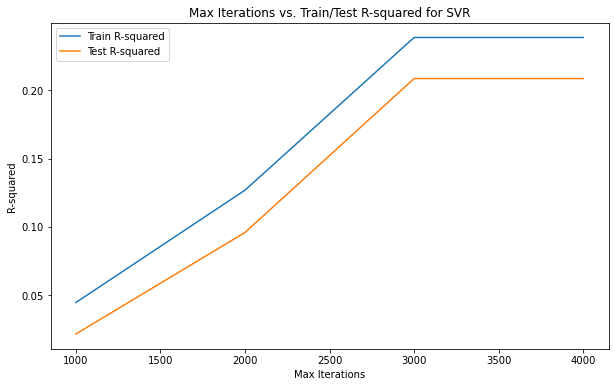

In [156]:
max_iter_values = np.arange(1000,5000,1000)

# Lists to store R-squared values
train_scores = []
test_scores = []

# Iterate over max_iter values
for max_iter in max_iter_values:
    # Train SVR model
    svr = SVR(max_iter=max_iter)
    svr.fit(X_train, y_train)

    # Predict on training set
    y_train_pred = svr.predict(X_train)
    train_rsq = r2_score(y_train, y_train_pred)
    train_scores.append(train_rsq)

    # Predict on test set
    y_test_pred = svr.predict(X_test)
    test_rsq = r2_score(y_test, y_test_pred)
    test_scores.append(test_rsq)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(max_iter_values, train_scores, label='Train R-squared')
plt.plot(max_iter_values, test_scores, label='Test R-squared')
plt.xlabel('Max Iterations')
plt.ylabel('R-squared')
plt.title('Max Iterations vs. Train/Test R-squared for SVR')
plt.legend()
plt.show()

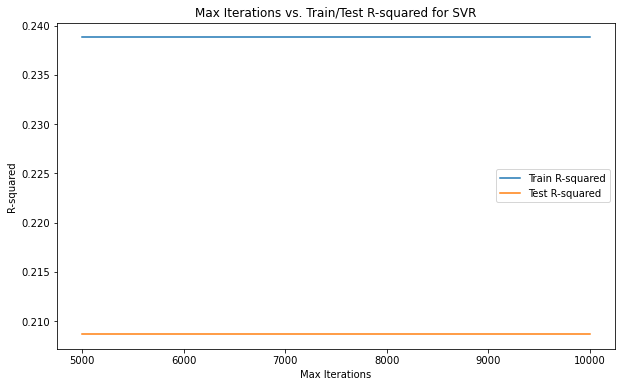

In [157]:
max_iter_values = np.arange(5000,11000,1000)

# Lists to store R-squared values
train_scores = []
test_scores = []

# Iterate over max_iter values
for max_iter in max_iter_values:
    # Train SVR model
    svr = SVR(max_iter=max_iter)
    svr.fit(X_train, y_train)

    # Predict on training set
    y_train_pred = svr.predict(X_train)
    train_rsq = r2_score(y_train, y_train_pred)
    train_scores.append(train_rsq)

    # Predict on test set
    y_test_pred = svr.predict(X_test)
    test_rsq = r2_score(y_test, y_test_pred)
    test_scores.append(test_rsq)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(max_iter_values, train_scores, label='Train R-squared')
plt.plot(max_iter_values, test_scores, label='Test R-squared')
plt.xlabel('Max Iterations')
plt.ylabel('R-squared')
plt.title('Max Iterations vs. Train/Test R-squared for SVR')
plt.legend()
plt.show()

### 2.3.3.1 (c) C

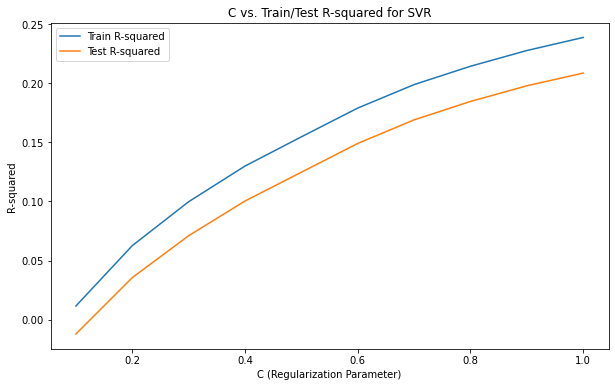

In [158]:
C_values = np.arange(0.1,1.1,0.1)

# Lists to store R-squared values
train_scores = []
test_scores = []

# Iterate over C values
for C in C_values:
    # Train SVR model
    svr = SVR(C=C)
    svr.fit(X_train, y_train)

    # Predict on training set
    y_train_pred = svr.predict(X_train)
    train_rsq = r2_score(y_train, y_train_pred)
    train_scores.append(train_rsq)

    # Predict on test set
    y_test_pred = svr.predict(X_test)
    test_rsq = r2_score(y_test, y_test_pred)
    test_scores.append(test_rsq)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(C_values, train_scores, label='Train R-squared')
plt.plot(C_values, test_scores, label='Test R-squared')
plt.xlabel('C (Regularization Parameter)')
plt.ylabel('R-squared')
plt.title('C vs. Train/Test R-squared for SVR')
plt.legend()
plt.show()

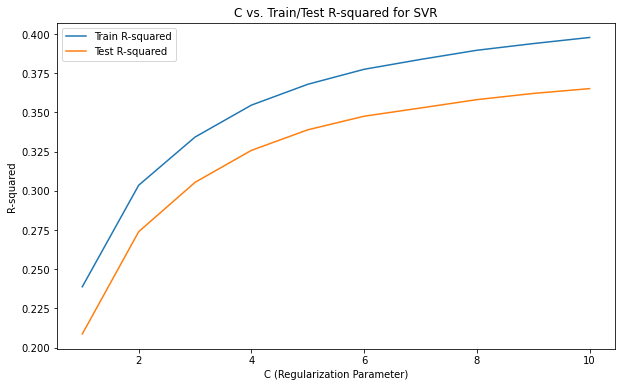

In [159]:
C_values = np.arange(1,11,1)

# Lists to store R-squared values
train_scores = []
test_scores = []

# Iterate over C values
for C in C_values:
    # Train SVR model
    svr = SVR(C=C)
    svr.fit(X_train, y_train)

    # Predict on training set
    y_train_pred = svr.predict(X_train)
    train_rsq = r2_score(y_train, y_train_pred)
    train_scores.append(train_rsq)

    # Predict on test set
    y_test_pred = svr.predict(X_test)
    test_rsq = r2_score(y_test, y_test_pred)
    test_scores.append(test_rsq)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(C_values, train_scores, label='Train R-squared')
plt.plot(C_values, test_scores, label='Test R-squared')
plt.xlabel('C (Regularization Parameter)')
plt.ylabel('R-squared')
plt.title('C vs. Train/Test R-squared for SVR')
plt.legend()
plt.show()

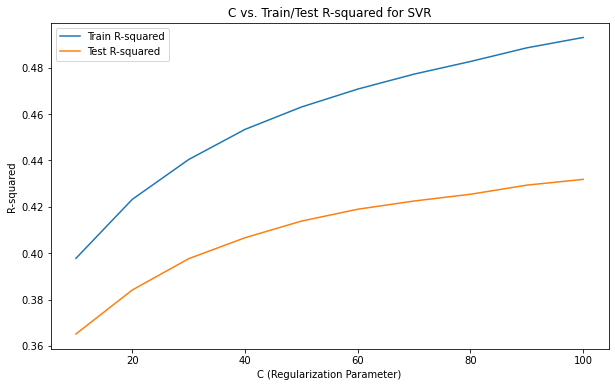

In [160]:
C_values = np.arange(10,110,10)

# Lists to store R-squared values
train_scores = []
test_scores = []

# Iterate over C values
for C in C_values:
    # Train SVR model
    svr = SVR(C=C)
    svr.fit(X_train, y_train)

    # Predict on training set
    y_train_pred = svr.predict(X_train)
    train_rsq = r2_score(y_train, y_train_pred)
    train_scores.append(train_rsq)

    # Predict on test set
    y_test_pred = svr.predict(X_test)
    test_rsq = r2_score(y_test, y_test_pred)
    test_scores.append(test_rsq)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(C_values, train_scores, label='Train R-squared')
plt.plot(C_values, test_scores, label='Test R-squared')
plt.xlabel('C (Regularization Parameter)')
plt.ylabel('R-squared')
plt.title('C vs. Train/Test R-squared for SVR')
plt.legend()
plt.show()

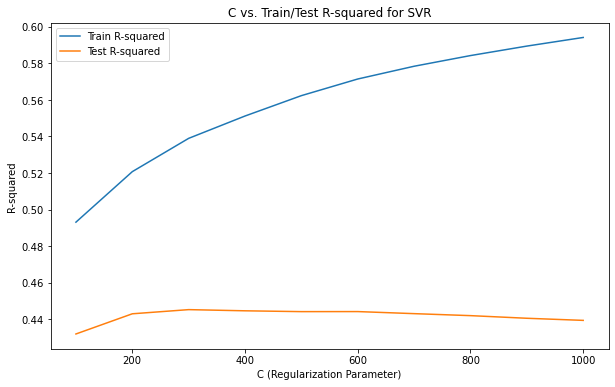

In [161]:
C_values = np.arange(100,1100,100)

# Lists to store R-squared values
train_scores = []
test_scores = []

# Iterate over C values
for C in C_values:
    # Train SVR model
    svr = SVR(C=C)
    svr.fit(X_train, y_train)

    # Predict on training set
    y_train_pred = svr.predict(X_train)
    train_rsq = r2_score(y_train, y_train_pred)
    train_scores.append(train_rsq)

    # Predict on test set
    y_test_pred = svr.predict(X_test)
    test_rsq = r2_score(y_test, y_test_pred)
    test_scores.append(test_rsq)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(C_values, train_scores, label='Train R-squared')
plt.plot(C_values, test_scores, label='Test R-squared')
plt.xlabel('C (Regularization Parameter)')
plt.ylabel('R-squared')
plt.title('C vs. Train/Test R-squared for SVR')
plt.legend()
plt.show()

### 2.3.3.1 (d) epsilon

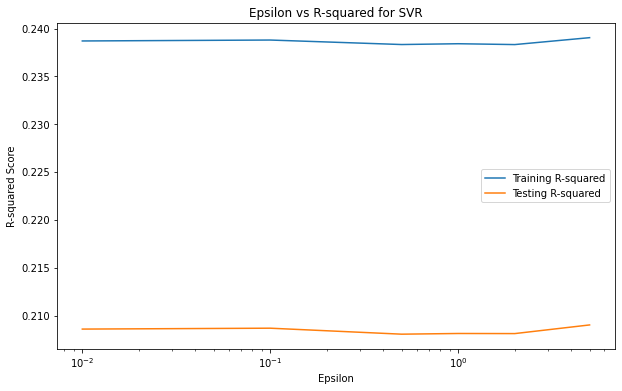

In [162]:
epsilon_values = [0.01, 0.1, 0.5, 1.0, 2.0, 5.0]

# Initialize lists to store R-squared scores
train_r2_scores = []
test_r2_scores = []

# Train SVR models with different epsilon values
for epsilon in epsilon_values:
    # Create and fit the SVR model
    svr_model = SVR(epsilon=epsilon)
    svr_model.fit(X_train, y_train)
    
    # Predict on the training set
    y_train_pred = svr_model.predict(X_train)
    train_r2 = r2_score(y_train, y_train_pred)
    train_r2_scores.append(train_r2)

    # Predict on the testing set
    y_test_pred = svr_model.predict(X_test)
    test_r2 = r2_score(y_test, y_test_pred)
    test_r2_scores.append(test_r2)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(epsilon_values, train_r2_scores, label='Training R-squared')
plt.plot(epsilon_values, test_r2_scores, label='Testing R-squared')
plt.xscale('log')  # Use a logarithmic scale for better visualization
plt.title('Epsilon vs R-squared for SVR')
plt.xlabel('Epsilon')
plt.ylabel('R-squared Score')
plt.legend()
plt.show()

### 2.3.3.2 Hyperparameter Optimization

In [163]:
svr_models = [svr]
svr_names = ['base']

### 2.3.3.2 (a) GridSearchCV 

##### 1st  iteration - based off the information above

In [164]:
param_grid = {'kernel' : ['rbf','sigmoid','poly'],
              'max_iter' :  [2000,3000,4000],
              'C' : [0.1,0.6,1]}

In [165]:
start_time = time.time()

grid = GridSearchCV(estimator=svr, param_grid=param_grid, scoring='r2',verbose = 3,refit=True).fit(X_train,y_train)

end_time = time.time()

elapsed_time = end_time - start_time

Fitting 5 folds for each of 27 candidates, totalling 135 fits


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END ..C=0.1, kernel=rbf, max_iter=2000;, score=0.024 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END .C=0.1, kernel=rbf, max_iter=2000;, score=-0.038 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END ..C=0.1, kernel=rbf, max_iter=2000;, score=0.004 total time=   1.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END .C=0.1, kernel=rbf, max_iter=2000;, score=-0.038 total time=   1.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END .C=0.1, kernel=rbf, max_iter=2000;, score=-0.027 total time=   1.2s
[CV 1/5] END ..C=0.1, kernel=rbf, max_iter=3000;, score=0.031 total time=   1.2s
[CV 2/5] END .C=0.1, kernel=rbf, max_iter=3000;, score=-0.012 total time=   1.2s
[CV 3/5] END ..C=0.1, kernel=rbf, max_iter=3000;, score=0.018 total time=   1.5s
[CV 4/5] END .C=0.1, kernel=rbf, max_iter=3000;, score=-0.021 total time=   1.4s
[CV 5/5] END .C=0.1, kernel=rbf, max_iter=3000;, score=-0.017 total time=   1.5s
[CV 1/5] END ..C=0.1, kernel=rbf, max_iter=4000;, score=0.031 total time=   1.3s
[CV 2/5] END .C=0.1, kernel=rbf, max_iter=4000;, score=-0.012 total time=   1.2s
[CV 3/5] END ..C=0.1, kernel=rbf, max_iter=4000;, score=0.018 total time=   1.2s
[CV 4/5] END .C=0.1, kernel=rbf, max_iter=4000;, score=-0.021 total time=   1.2s
[CV 5/5] END .C=0.1, kernel=rbf, max_iter=4000;, score=-0.017 total time=   1.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=0.1, kernel=sigmoid, max_iter=2000;, score=0.032 total time=   0.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=0.1, kernel=sigmoid, max_iter=2000;, score=-0.051 total time=   0.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=0.1, kernel=sigmoid, max_iter=2000;, score=0.005 total time=   0.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=0.1, kernel=sigmoid, max_iter=2000;, score=-0.043 total time=   0.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=0.1, kernel=sigmoid, max_iter=2000;, score=-0.035 total time=   0.5s
[CV 1/5] END C=0.1, kernel=sigmoid, max_iter=3000;, score=0.085 total time=   0.5s
[CV 2/5] END C=0.1, kernel=sigmoid, max_iter=3000;, score=0.038 total time=   0.5s
[CV 3/5] END C=0.1, kernel=sigmoid, max_iter=3000;, score=0.073 total time=   0.5s
[CV 4/5] END C=0.1, kernel=sigmoid, max_iter=3000;, score=0.027 total time=   0.5s
[CV 5/5] END C=0.1, kernel=sigmoid, max_iter=3000;, score=0.036 total time=   0.5s
[CV 1/5] END C=0.1, kernel=sigmoid, max_iter=4000;, score=0.085 total time=   0.5s
[CV 2/5] END C=0.1, kernel=sigmoid, max_iter=4000;, score=0.038 total time=   0.5s
[CV 3/5] END C=0.1, kernel=sigmoid, max_iter=4000;, score=0.073 total time=   0.5s
[CV 4/5] END C=0.1, kernel=sigmoid, max_iter=4000;, score=0.027 total time=   0.5s
[CV 5/5] END C=0.1, kernel=sigmoid, max_iter=4000;, score=0.036 total time=   0.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END .C=0.1, kernel=poly, max_iter=2000;, score=0.033 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=0.1, kernel=poly, max_iter=2000;, score=-0.039 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=0.1, kernel=poly, max_iter=2000;, score=-0.005 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=0.1, kernel=poly, max_iter=2000;, score=-0.038 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=0.1, kernel=poly, max_iter=2000;, score=-0.017 total time=   0.4s
[CV 1/5] END .C=0.1, kernel=poly, max_iter=3000;, score=0.043 total time=   0.3s
[CV 2/5] END C=0.1, kernel=poly, max_iter=3000;, score=-0.001 total time=   0.4s
[CV 3/5] END .C=0.1, kernel=poly, max_iter=3000;, score=0.035 total time=   0.3s
[CV 4/5] END C=0.1, kernel=poly, max_iter=3000;, score=-0.008 total time=   0.3s
[CV 5/5] END .C=0.1, kernel=poly, max_iter=3000;, score=0.004 total time=   0.3s
[CV 1/5] END .C=0.1, kernel=poly, max_iter=4000;, score=0.043 total time=   0.3s
[CV 2/5] END C=0.1, kernel=poly, max_iter=4000;, score=-0.001 total time=   0.3s
[CV 3/5] END .C=0.1, kernel=poly, max_iter=4000;, score=0.035 total time=   0.3s
[CV 4/5] END C=0.1, kernel=poly, max_iter=4000;, score=-0.008 total time=   0.3s
[CV 5/5] END .C=0.1, kernel=poly, max_iter=4000;, score=0.004 total time=   0.4s
[CV 1/5] END ..C=0.6, kernel=rbf, max_iter=2000;, score=0.188 total time=   1.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END ..C=0.6, kernel=rbf, max_iter=2000;, score=0.134 total time=   1.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END ..C=0.6, kernel=rbf, max_iter=2000;, score=0.167 total time=   1.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END ..C=0.6, kernel=rbf, max_iter=2000;, score=0.119 total time=   1.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END ..C=0.6, kernel=rbf, max_iter=2000;, score=0.130 total time=   1.2s
[CV 1/5] END ..C=0.6, kernel=rbf, max_iter=3000;, score=0.188 total time=   1.2s
[CV 2/5] END ..C=0.6, kernel=rbf, max_iter=3000;, score=0.134 total time=   1.2s
[CV 3/5] END ..C=0.6, kernel=rbf, max_iter=3000;, score=0.167 total time=   1.2s
[CV 4/5] END ..C=0.6, kernel=rbf, max_iter=3000;, score=0.119 total time=   1.2s
[CV 5/5] END ..C=0.6, kernel=rbf, max_iter=3000;, score=0.130 total time=   1.2s
[CV 1/5] END ..C=0.6, kernel=rbf, max_iter=4000;, score=0.188 total time=   1.2s
[CV 2/5] END ..C=0.6, kernel=rbf, max_iter=4000;, score=0.134 total time=   1.2s
[CV 3/5] END ..C=0.6, kernel=rbf, max_iter=4000;, score=0.167 total time=   1.2s
[CV 4/5] END ..C=0.6, kernel=rbf, max_iter=4000;, score=0.119 total time=   1.2s
[CV 5/5] END ..C=0.6, kernel=rbf, max_iter=4000;, score=0.130 total time=   1.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=0.6, kernel=sigmoid, max_iter=2000;, score=0.248 total time=   0.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=0.6, kernel=sigmoid, max_iter=2000;, score=0.206 total time=   0.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=0.6, kernel=sigmoid, max_iter=2000;, score=0.232 total time=   0.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=0.6, kernel=sigmoid, max_iter=2000;, score=0.181 total time=   0.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=0.6, kernel=sigmoid, max_iter=2000;, score=0.206 total time=   0.5s
[CV 1/5] END C=0.6, kernel=sigmoid, max_iter=3000;, score=0.249 total time=   0.5s
[CV 2/5] END C=0.6, kernel=sigmoid, max_iter=3000;, score=0.214 total time=   0.5s
[CV 3/5] END C=0.6, kernel=sigmoid, max_iter=3000;, score=0.238 total time=   0.5s
[CV 4/5] END C=0.6, kernel=sigmoid, max_iter=3000;, score=0.183 total time=   0.5s
[CV 5/5] END C=0.6, kernel=sigmoid, max_iter=3000;, score=0.209 total time=   0.5s
[CV 1/5] END C=0.6, kernel=sigmoid, max_iter=4000;, score=0.249 total time=   0.5s
[CV 2/5] END C=0.6, kernel=sigmoid, max_iter=4000;, score=0.214 total time=   0.5s
[CV 3/5] END C=0.6, kernel=sigmoid, max_iter=4000;, score=0.238 total time=   0.5s
[CV 4/5] END C=0.6, kernel=sigmoid, max_iter=4000;, score=0.183 total time=   0.5s
[CV 5/5] END C=0.6, kernel=sigmoid, max_iter=4000;, score=0.209 total time=   0.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END .C=0.6, kernel=poly, max_iter=2000;, score=0.176 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END .C=0.6, kernel=poly, max_iter=2000;, score=0.127 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END .C=0.6, kernel=poly, max_iter=2000;, score=0.157 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END .C=0.6, kernel=poly, max_iter=2000;, score=0.103 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END .C=0.6, kernel=poly, max_iter=2000;, score=0.136 total time=   0.4s
[CV 1/5] END .C=0.6, kernel=poly, max_iter=3000;, score=0.177 total time=   0.3s
[CV 2/5] END .C=0.6, kernel=poly, max_iter=3000;, score=0.130 total time=   0.3s
[CV 3/5] END .C=0.6, kernel=poly, max_iter=3000;, score=0.159 total time=   0.3s
[CV 4/5] END .C=0.6, kernel=poly, max_iter=3000;, score=0.106 total time=   0.3s
[CV 5/5] END .C=0.6, kernel=poly, max_iter=3000;, score=0.139 total time=   0.3s
[CV 1/5] END .C=0.6, kernel=poly, max_iter=4000;, score=0.177 total time=   0.3s
[CV 2/5] END .C=0.6, kernel=poly, max_iter=4000;, score=0.130 total time=   0.3s
[CV 3/5] END .C=0.6, kernel=poly, max_iter=4000;, score=0.159 total time=   0.3s
[CV 4/5] END .C=0.6, kernel=poly, max_iter=4000;, score=0.106 total time=   0.3s
[CV 5/5] END .C=0.6, kernel=poly, max_iter=4000;, score=0.139 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END ....C=1, kernel=rbf, max_iter=2000;, score=0.245 total time=   1.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END ....C=1, kernel=rbf, max_iter=2000;, score=0.196 total time=   1.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END ....C=1, kernel=rbf, max_iter=2000;, score=0.229 total time=   1.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END ....C=1, kernel=rbf, max_iter=2000;, score=0.179 total time=   1.2s
[CV 5/5] END ....C=1, kernel=rbf, max_iter=2000;, score=0.194 total time=   1.2s
[CV 1/5] END ....C=1, kernel=rbf, max_iter=3000;, score=0.245 total time=   1.2s
[CV 2/5] END ....C=1, kernel=rbf, max_iter=3000;, score=0.196 total time=   1.1s
[CV 3/5] END ....C=1, kernel=rbf, max_iter=3000;, score=0.229 total time=   1.2s
[CV 4/5] END ....C=1, kernel=rbf, max_iter=3000;, score=0.179 total time=   1.2s
[CV 5/5] END ....C=1, kernel=rbf, max_iter=3000;, score=0.194 total time=   1.3s
[CV 1/5] END ....C=1, kernel=rbf, max_iter=4000;, score=0.245 total time=   1.2s
[CV 2/5] END ....C=1, kernel=rbf, max_iter=4000;, score=0.196 total time=   1.2s
[CV 3/5] END ....C=1, kernel=rbf, max_iter=4000;, score=0.229 total time=   1.2s
[CV 4/5] END ....C=1, kernel=rbf, max_iter=4000;, score=0.179 total time=   1.2s
[CV 5/5] END ....C=1, kernel=rbf, max_iter=4000;, score=0.194 total time=   1.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=1, kernel=sigmoid, max_iter=2000;, score=0.281 total time=   0.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=1, kernel=sigmoid, max_iter=2000;, score=0.246 total time=   0.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=1, kernel=sigmoid, max_iter=2000;, score=0.265 total time=   0.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=1, kernel=sigmoid, max_iter=2000;, score=0.222 total time=   0.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=1, kernel=sigmoid, max_iter=2000;, score=0.257 total time=   0.5s
[CV 1/5] END C=1, kernel=sigmoid, max_iter=3000;, score=0.281 total time=   0.5s
[CV 2/5] END C=1, kernel=sigmoid, max_iter=3000;, score=0.252 total time=   0.5s
[CV 3/5] END C=1, kernel=sigmoid, max_iter=3000;, score=0.269 total time=   0.5s
[CV 4/5] END C=1, kernel=sigmoid, max_iter=3000;, score=0.224 total time=   0.5s
[CV 5/5] END C=1, kernel=sigmoid, max_iter=3000;, score=0.260 total time=   0.5s
[CV 1/5] END C=1, kernel=sigmoid, max_iter=4000;, score=0.281 total time=   0.5s
[CV 2/5] END C=1, kernel=sigmoid, max_iter=4000;, score=0.252 total time=   0.5s
[CV 3/5] END C=1, kernel=sigmoid, max_iter=4000;, score=0.269 total time=   0.5s
[CV 4/5] END C=1, kernel=sigmoid, max_iter=4000;, score=0.224 total time=   0.5s
[CV 5/5] END C=1, kernel=sigmoid, max_iter=4000;, score=0.260 total time=   0.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END ...C=1, kernel=poly, max_iter=2000;, score=0.220 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END ...C=1, kernel=poly, max_iter=2000;, score=0.169 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END ...C=1, kernel=poly, max_iter=2000;, score=0.198 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END ...C=1, kernel=poly, max_iter=2000;, score=0.141 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END ...C=1, kernel=poly, max_iter=2000;, score=0.183 total time=   0.3s
[CV 1/5] END ...C=1, kernel=poly, max_iter=3000;, score=0.221 total time=   0.3s
[CV 2/5] END ...C=1, kernel=poly, max_iter=3000;, score=0.172 total time=   0.4s
[CV 3/5] END ...C=1, kernel=poly, max_iter=3000;, score=0.199 total time=   0.3s
[CV 4/5] END ...C=1, kernel=poly, max_iter=3000;, score=0.144 total time=   0.4s
[CV 5/5] END ...C=1, kernel=poly, max_iter=3000;, score=0.184 total time=   0.3s
[CV 1/5] END ...C=1, kernel=poly, max_iter=4000;, score=0.221 total time=   0.3s
[CV 2/5] END ...C=1, kernel=poly, max_iter=4000;, score=0.172 total time=   0.4s
[CV 3/5] END ...C=1, kernel=poly, max_iter=4000;, score=0.199 total time=   0.3s
[CV 4/5] END ...C=1, kernel=poly, max_iter=4000;, score=0.144 total time=   0.3s
[CV 5/5] END ...C=1, kernel=poly, max_iter=4000;, score=0.184 total time=   0.3s


In [166]:
print(grid.best_score_)
print(grid.best_params_)

minutes, seconds = divmod(elapsed_time, 60)
formatted_time = "{:02}:{:02}".format(int(minutes), int(seconds))
print("Elapsed Time: {}".format(formatted_time)) 

0.25699873741805357
{'C': 1, 'kernel': 'sigmoid', 'max_iter': 3000}
Elapsed Time: 01:46


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Model : SVR(C=0.1, kernel='sigmoid', max_iter=2000):

R-Square:
-0.2541548877134494 (Train R^2 Value)
-0.2829901913772712 (Test R^2 Value)

RMSE:
109.25549806426385 (Train RMSE)
114.60160620484311 (Test RMSE)


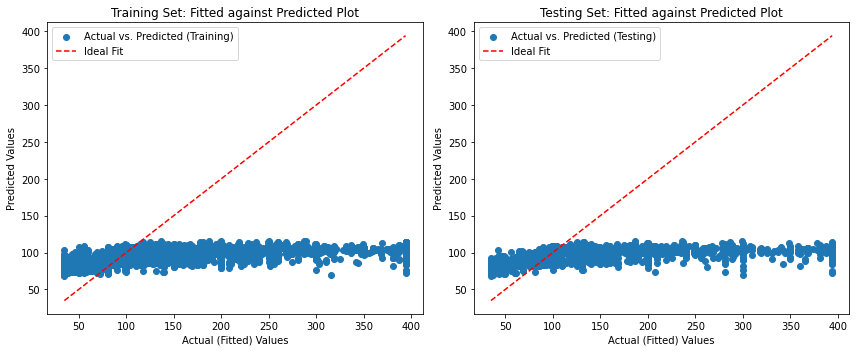

In [167]:
svr2 = SVR(C=0.1,kernel='sigmoid',max_iter=2000).fit(X_train,y_train)

model_scores_regression(svr2)
svr_models.append(svr2)
svr_names.append('svr2')

# no idea why it is so bad from the base model 

##### 2nd iteration - higher regularization strength

In [168]:
param_grid = {'kernel' : ['rbf','sigmoid','poly'],
              'max_iter' :  [2000,3000,4000],
              'C' : [100,200,300]}

In [169]:
start_time = time.time()

grid = GridSearchCV(estimator=svr, param_grid=param_grid, scoring='r2',verbose = 3,refit=True).fit(X_train,y_train)

end_time = time.time()

elapsed_time = end_time - start_time

Fitting 5 folds for each of 27 candidates, totalling 135 fits


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END ..C=100, kernel=rbf, max_iter=2000;, score=0.415 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END ..C=100, kernel=rbf, max_iter=2000;, score=0.408 total time=   0.7s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END ..C=100, kernel=rbf, max_iter=2000;, score=0.424 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END ..C=100, kernel=rbf, max_iter=2000;, score=0.396 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END ..C=100, kernel=rbf, max_iter=2000;, score=0.420 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END ..C=100, kernel=rbf, max_iter=3000;, score=0.419 total time=   0.9s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END ..C=100, kernel=rbf, max_iter=3000;, score=0.415 total time=   0.7s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END ..C=100, kernel=rbf, max_iter=3000;, score=0.426 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END ..C=100, kernel=rbf, max_iter=3000;, score=0.402 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END ..C=100, kernel=rbf, max_iter=3000;, score=0.427 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END ..C=100, kernel=rbf, max_iter=4000;, score=0.419 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END ..C=100, kernel=rbf, max_iter=4000;, score=0.416 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END ..C=100, kernel=rbf, max_iter=4000;, score=0.427 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END ..C=100, kernel=rbf, max_iter=4000;, score=0.405 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END ..C=100, kernel=rbf, max_iter=4000;, score=0.425 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=100, kernel=sigmoid, max_iter=2000;, score=-240.567 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=100, kernel=sigmoid, max_iter=2000;, score=-466.427 total time=   0.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=100, kernel=sigmoid, max_iter=2000;, score=-341.100 total time=   0.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=100, kernel=sigmoid, max_iter=2000;, score=-344.364 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=100, kernel=sigmoid, max_iter=2000;, score=-307.260 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=100, kernel=sigmoid, max_iter=3000;, score=-278.937 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=100, kernel=sigmoid, max_iter=3000;, score=-451.622 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=100, kernel=sigmoid, max_iter=3000;, score=-344.486 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=100, kernel=sigmoid, max_iter=3000;, score=-370.108 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=100, kernel=sigmoid, max_iter=3000;, score=-296.240 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=100, kernel=sigmoid, max_iter=4000;, score=-309.495 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=100, kernel=sigmoid, max_iter=4000;, score=-433.257 total time=   0.6s
[CV 3/5] END C=100, kernel=sigmoid, max_iter=4000;, score=-344.481 total time=   0.6s
[CV 4/5] END C=100, kernel=sigmoid, max_iter=4000;, score=-383.109 total time=   0.6s
[CV 5/5] END C=100, kernel=sigmoid, max_iter=4000;, score=-291.516 total time=   0.8s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END .C=100, kernel=poly, max_iter=2000;, score=0.301 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END .C=100, kernel=poly, max_iter=2000;, score=0.226 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END .C=100, kernel=poly, max_iter=2000;, score=0.283 total time=   0.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END .C=100, kernel=poly, max_iter=2000;, score=0.205 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END .C=100, kernel=poly, max_iter=2000;, score=0.240 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END .C=100, kernel=poly, max_iter=3000;, score=0.346 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END .C=100, kernel=poly, max_iter=3000;, score=0.334 total time=   0.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END .C=100, kernel=poly, max_iter=3000;, score=0.326 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END .C=100, kernel=poly, max_iter=3000;, score=0.306 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END .C=100, kernel=poly, max_iter=3000;, score=0.338 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END .C=100, kernel=poly, max_iter=4000;, score=0.368 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END .C=100, kernel=poly, max_iter=4000;, score=0.356 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END .C=100, kernel=poly, max_iter=4000;, score=0.368 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END .C=100, kernel=poly, max_iter=4000;, score=0.343 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END .C=100, kernel=poly, max_iter=4000;, score=0.360 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END ..C=200, kernel=rbf, max_iter=2000;, score=0.413 total time=   0.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END ..C=200, kernel=rbf, max_iter=2000;, score=0.400 total time=   0.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END ..C=200, kernel=rbf, max_iter=2000;, score=0.405 total time=   0.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END ..C=200, kernel=rbf, max_iter=2000;, score=0.397 total time=   0.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END ..C=200, kernel=rbf, max_iter=2000;, score=0.426 total time=   0.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END ..C=200, kernel=rbf, max_iter=3000;, score=0.419 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END ..C=200, kernel=rbf, max_iter=3000;, score=0.414 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END ..C=200, kernel=rbf, max_iter=3000;, score=0.424 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END ..C=200, kernel=rbf, max_iter=3000;, score=0.410 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END ..C=200, kernel=rbf, max_iter=3000;, score=0.440 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END ..C=200, kernel=rbf, max_iter=4000;, score=0.420 total time=   0.7s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END ..C=200, kernel=rbf, max_iter=4000;, score=0.415 total time=   0.7s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END ..C=200, kernel=rbf, max_iter=4000;, score=0.430 total time=   0.7s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END ..C=200, kernel=rbf, max_iter=4000;, score=0.409 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END ..C=200, kernel=rbf, max_iter=4000;, score=0.437 total time=   0.7s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=200, kernel=sigmoid, max_iter=2000;, score=-1256.644 total time=   0.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=200, kernel=sigmoid, max_iter=2000;, score=-920.516 total time=   0.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=200, kernel=sigmoid, max_iter=2000;, score=-1332.246 total time=   0.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=200, kernel=sigmoid, max_iter=2000;, score=-1153.605 total time=   0.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=200, kernel=sigmoid, max_iter=2000;, score=-1200.972 total time=   0.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=200, kernel=sigmoid, max_iter=3000;, score=-1273.643 total time=   0.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=200, kernel=sigmoid, max_iter=3000;, score=-1455.488 total time=   0.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=200, kernel=sigmoid, max_iter=3000;, score=-1348.660 total time=   0.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=200, kernel=sigmoid, max_iter=3000;, score=-1152.173 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=200, kernel=sigmoid, max_iter=3000;, score=-1181.230 total time=   0.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=200, kernel=sigmoid, max_iter=4000;, score=-1264.514 total time=   0.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=200, kernel=sigmoid, max_iter=4000;, score=-1567.542 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=200, kernel=sigmoid, max_iter=4000;, score=-1355.031 total time=   0.6s
[CV 4/5] END C=200, kernel=sigmoid, max_iter=4000;, score=-1148.999 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=200, kernel=sigmoid, max_iter=4000;, score=-1180.444 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END .C=200, kernel=poly, max_iter=2000;, score=0.131 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END .C=200, kernel=poly, max_iter=2000;, score=0.152 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END .C=200, kernel=poly, max_iter=2000;, score=0.152 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END .C=200, kernel=poly, max_iter=2000;, score=0.200 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END .C=200, kernel=poly, max_iter=2000;, score=0.163 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END .C=200, kernel=poly, max_iter=3000;, score=0.273 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END .C=200, kernel=poly, max_iter=3000;, score=0.310 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END .C=200, kernel=poly, max_iter=3000;, score=0.278 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END .C=200, kernel=poly, max_iter=3000;, score=0.285 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END .C=200, kernel=poly, max_iter=3000;, score=0.295 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END .C=200, kernel=poly, max_iter=4000;, score=0.331 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END .C=200, kernel=poly, max_iter=4000;, score=0.325 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END .C=200, kernel=poly, max_iter=4000;, score=0.329 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END .C=200, kernel=poly, max_iter=4000;, score=0.301 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END .C=200, kernel=poly, max_iter=4000;, score=0.327 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END ..C=300, kernel=rbf, max_iter=2000;, score=0.394 total time=   0.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END ..C=300, kernel=rbf, max_iter=2000;, score=0.403 total time=   0.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END ..C=300, kernel=rbf, max_iter=2000;, score=0.393 total time=   0.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END ..C=300, kernel=rbf, max_iter=2000;, score=0.393 total time=   0.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END ..C=300, kernel=rbf, max_iter=2000;, score=0.430 total time=   0.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END ..C=300, kernel=rbf, max_iter=3000;, score=0.412 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END ..C=300, kernel=rbf, max_iter=3000;, score=0.419 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END ..C=300, kernel=rbf, max_iter=3000;, score=0.426 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END ..C=300, kernel=rbf, max_iter=3000;, score=0.400 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END ..C=300, kernel=rbf, max_iter=3000;, score=0.437 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END ..C=300, kernel=rbf, max_iter=4000;, score=0.416 total time=   0.7s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END ..C=300, kernel=rbf, max_iter=4000;, score=0.422 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END ..C=300, kernel=rbf, max_iter=4000;, score=0.430 total time=   0.7s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END ..C=300, kernel=rbf, max_iter=4000;, score=0.413 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END ..C=300, kernel=rbf, max_iter=4000;, score=0.442 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=300, kernel=sigmoid, max_iter=2000;, score=-2248.758 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=300, kernel=sigmoid, max_iter=2000;, score=-2985.895 total time=   0.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=300, kernel=sigmoid, max_iter=2000;, score=-3175.498 total time=   0.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=300, kernel=sigmoid, max_iter=2000;, score=-1853.097 total time=   0.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=300, kernel=sigmoid, max_iter=2000;, score=-3393.217 total time=   0.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=300, kernel=sigmoid, max_iter=3000;, score=-2423.615 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=300, kernel=sigmoid, max_iter=3000;, score=-3059.728 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=300, kernel=sigmoid, max_iter=3000;, score=-3045.953 total time=   0.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=300, kernel=sigmoid, max_iter=3000;, score=-2131.323 total time=   0.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=300, kernel=sigmoid, max_iter=3000;, score=-3305.119 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=300, kernel=sigmoid, max_iter=4000;, score=-2743.307 total time=   0.6s
[CV 2/5] END C=300, kernel=sigmoid, max_iter=4000;, score=-3048.350 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=300, kernel=sigmoid, max_iter=4000;, score=-3018.166 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=300, kernel=sigmoid, max_iter=4000;, score=-2129.748 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=300, kernel=sigmoid, max_iter=4000;, score=-3320.843 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END .C=300, kernel=poly, max_iter=2000;, score=0.194 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END .C=300, kernel=poly, max_iter=2000;, score=0.112 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END .C=300, kernel=poly, max_iter=2000;, score=0.153 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END .C=300, kernel=poly, max_iter=2000;, score=0.113 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END .C=300, kernel=poly, max_iter=2000;, score=0.098 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END .C=300, kernel=poly, max_iter=3000;, score=0.232 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END .C=300, kernel=poly, max_iter=3000;, score=0.226 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END .C=300, kernel=poly, max_iter=3000;, score=0.233 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END .C=300, kernel=poly, max_iter=3000;, score=0.231 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END .C=300, kernel=poly, max_iter=3000;, score=0.228 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END .C=300, kernel=poly, max_iter=4000;, score=0.304 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END .C=300, kernel=poly, max_iter=4000;, score=0.303 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END .C=300, kernel=poly, max_iter=4000;, score=0.317 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END .C=300, kernel=poly, max_iter=4000;, score=0.293 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END .C=300, kernel=poly, max_iter=4000;, score=0.282 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


In [170]:
print(grid.best_score_)
print(grid.best_params_)

minutes, seconds = divmod(elapsed_time, 60)
formatted_time = "{:02}:{:02}".format(int(minutes), int(seconds))
print("Elapsed Time: {}".format(formatted_time)) 

0.42473799482768876
{'C': 300, 'kernel': 'rbf', 'max_iter': 4000}
Elapsed Time: 01:21


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Model : SVR(C=300, max_iter=4000):

R-Square:
0.5275047187222344 (Train R^2 Value)
0.43585000366703597 (Test R^2 Value)

RMSE:
67.06044816637363 (Train RMSE)
75.99347974026367 (Test RMSE)


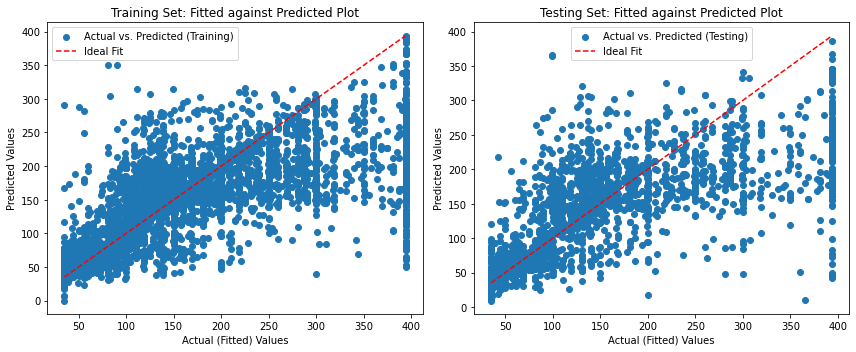

In [171]:
svr3 = SVR(kernel='rbf',max_iter=4000,C=300).fit(X_train,y_train)

model_scores_regression(svr3)
svr_models.append(svr3)
svr_names.append('svr3 - higher regularization strength')

##### 3rd iteration - experiment gamma values


In [172]:
param_grid = {'kernel' : ['rbf','sigmoid','poly'],
              'max_iter' :  [3000,4000,5000],
              'C' : [100,200,300],
              'gamma' : [10,20,30]}

In [173]:
start_time = time.time()

grid = GridSearchCV(estimator=svr, param_grid=param_grid, scoring='r2',verbose = 3,refit=True).fit(X_train,y_train)

end_time = time.time()

elapsed_time = end_time - start_time

Fitting 5 folds for each of 81 candidates, totalling 405 fits


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=100, gamma=10, kernel=rbf, max_iter=3000;, score=0.157 total time=   0.7s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=100, gamma=10, kernel=rbf, max_iter=3000;, score=0.140 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=100, gamma=10, kernel=rbf, max_iter=3000;, score=0.152 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=100, gamma=10, kernel=rbf, max_iter=3000;, score=0.139 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=100, gamma=10, kernel=rbf, max_iter=3000;, score=0.126 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=100, gamma=10, kernel=rbf, max_iter=4000;, score=0.157 total time=   0.7s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=100, gamma=10, kernel=rbf, max_iter=4000;, score=0.140 total time=   0.7s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=100, gamma=10, kernel=rbf, max_iter=4000;, score=0.152 total time=   0.7s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=100, gamma=10, kernel=rbf, max_iter=4000;, score=0.139 total time=   0.7s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=100, gamma=10, kernel=rbf, max_iter=4000;, score=0.126 total time=   0.7s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=100, gamma=10, kernel=rbf, max_iter=5000;, score=0.157 total time=   0.7s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=100, gamma=10, kernel=rbf, max_iter=5000;, score=0.140 total time=   0.7s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=100, gamma=10, kernel=rbf, max_iter=5000;, score=0.152 total time=   0.7s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=100, gamma=10, kernel=rbf, max_iter=5000;, score=0.139 total time=   0.7s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=100, gamma=10, kernel=rbf, max_iter=5000;, score=0.126 total time=   0.7s
[CV 1/5] END C=100, gamma=10, kernel=sigmoid, max_iter=3000;, score=-80564.138 total time=   0.6s
[CV 2/5] END C=100, gamma=10, kernel=sigmoid, max_iter=3000;, score=-58201.645 total time=   0.6s
[CV 3/5] END C=100, gamma=10, kernel=sigmoid, max_iter=3000;, score=-83977.276 total time=   0.6s
[CV 4/5] END C=100, gamma=10, kernel=sigmoid, max_iter=3000;, score=-82304.080 total time=   0.6s
[CV 5/5] END C=100, gamma=10, kernel=sigmoid, max_iter=3000;, score=-81704.256 total time=   0.6s
[CV 1/5] END C=100, gamma=10, kernel=sigmoid, max_iter=4000;, score=-80564.138 total time=   0.6s
[CV 2/5] END C=100, gamma=10, kernel=sigmoid, max_iter=4000;, score=-58201.645 total time=   0.6s
[CV 3/5] END C=100, gamma=10, kernel=sigmoid, max_iter=4000;, score=-83977.276 total time=   0.6s
[CV 4/5] END C=100, gamma=10, kernel=sigmoid, max_iter=4000;, score=-82304.080 total time=   0.6s
[CV 5/5] END C=100, gamma=10,

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=100, gamma=10, kernel=poly, max_iter=3000;, score=-53.229 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=100, gamma=10, kernel=poly, max_iter=3000;, score=-33.675 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=100, gamma=10, kernel=poly, max_iter=3000;, score=-88.180 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=100, gamma=10, kernel=poly, max_iter=3000;, score=-80.847 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=100, gamma=10, kernel=poly, max_iter=3000;, score=-230.153 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=100, gamma=10, kernel=poly, max_iter=4000;, score=-32.188 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=100, gamma=10, kernel=poly, max_iter=4000;, score=-65.206 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=100, gamma=10, kernel=poly, max_iter=4000;, score=-37.856 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=100, gamma=10, kernel=poly, max_iter=4000;, score=-171.445 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=100, gamma=10, kernel=poly, max_iter=4000;, score=-20.128 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=100, gamma=10, kernel=poly, max_iter=5000;, score=-28.307 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=100, gamma=10, kernel=poly, max_iter=5000;, score=-30.408 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=100, gamma=10, kernel=poly, max_iter=5000;, score=-472.132 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=100, gamma=10, kernel=poly, max_iter=5000;, score=-21.554 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=100, gamma=10, kernel=poly, max_iter=5000;, score=-23.567 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=100, gamma=20, kernel=rbf, max_iter=3000;, score=0.127 total time=   0.8s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=100, gamma=20, kernel=rbf, max_iter=3000;, score=0.105 total time=   0.8s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=100, gamma=20, kernel=rbf, max_iter=3000;, score=0.120 total time=   0.8s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=100, gamma=20, kernel=rbf, max_iter=3000;, score=0.116 total time=   0.8s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=100, gamma=20, kernel=rbf, max_iter=3000;, score=0.099 total time=   0.8s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=100, gamma=20, kernel=rbf, max_iter=4000;, score=0.127 total time=   0.9s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=100, gamma=20, kernel=rbf, max_iter=4000;, score=0.105 total time=   0.9s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=100, gamma=20, kernel=rbf, max_iter=4000;, score=0.120 total time=   0.9s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=100, gamma=20, kernel=rbf, max_iter=4000;, score=0.116 total time=   0.9s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=100, gamma=20, kernel=rbf, max_iter=4000;, score=0.099 total time=   0.9s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=100, gamma=20, kernel=rbf, max_iter=5000;, score=0.127 total time=   0.9s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=100, gamma=20, kernel=rbf, max_iter=5000;, score=0.105 total time=   0.9s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=100, gamma=20, kernel=rbf, max_iter=5000;, score=0.120 total time=   0.9s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=100, gamma=20, kernel=rbf, max_iter=5000;, score=0.116 total time=   0.9s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=100, gamma=20, kernel=rbf, max_iter=5000;, score=0.099 total time=   0.9s
[CV 1/5] END C=100, gamma=20, kernel=sigmoid, max_iter=3000;, score=-80636.970 total time=   0.6s
[CV 2/5] END C=100, gamma=20, kernel=sigmoid, max_iter=3000;, score=-58290.214 total time=   0.6s
[CV 3/5] END C=100, gamma=20, kernel=sigmoid, max_iter=3000;, score=-84326.041 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=100, gamma=20, kernel=sigmoid, max_iter=3000;, score=-80853.097 total time=   0.6s
[CV 5/5] END C=100, gamma=20, kernel=sigmoid, max_iter=3000;, score=-81714.587 total time=   0.6s
[CV 1/5] END C=100, gamma=20, kernel=sigmoid, max_iter=4000;, score=-80636.970 total time=   0.6s
[CV 2/5] END C=100, gamma=20, kernel=sigmoid, max_iter=4000;, score=-58290.214 total time=   0.6s
[CV 3/5] END C=100, gamma=20, kernel=sigmoid, max_iter=4000;, score=-84326.041 total time=   0.6s
[CV 4/5] END C=100, gamma=20, kernel=sigmoid, max_iter=4000;, score=-82940.545 total time=   0.6s
[CV 5/5] END C=100, gamma=20, kernel=sigmoid, max_iter=4000;, score=-81714.587 total time=   0.5s
[CV 1/5] END C=100, gamma=20, kernel=sigmoid, max_iter=5000;, score=-80636.970 total time=   0.6s
[CV 2/5] END C=100, gamma=20, kernel=sigmoid, max_iter=5000;, score=-58290.214 total time=   0.6s
[CV 3/5] END C=100, gamma=20, kernel=sigmoid, max_iter=5000;, score=-84326.041 total time=   0.6s
[CV 4/5] END C=100, 

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=100, gamma=20, kernel=poly, max_iter=3000;, score=-28.835 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=100, gamma=20, kernel=poly, max_iter=3000;, score=-26.893 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=100, gamma=20, kernel=poly, max_iter=3000;, score=-52.031 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=100, gamma=20, kernel=poly, max_iter=3000;, score=-21.689 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=100, gamma=20, kernel=poly, max_iter=3000;, score=-20.584 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=100, gamma=20, kernel=poly, max_iter=4000;, score=-19.014 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=100, gamma=20, kernel=poly, max_iter=4000;, score=-165.433 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=100, gamma=20, kernel=poly, max_iter=4000;, score=-28.435 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=100, gamma=20, kernel=poly, max_iter=4000;, score=-81.307 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=100, gamma=20, kernel=poly, max_iter=4000;, score=-37.009 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=100, gamma=20, kernel=poly, max_iter=5000;, score=-32.049 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=100, gamma=20, kernel=poly, max_iter=5000;, score=-19.863 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=100, gamma=20, kernel=poly, max_iter=5000;, score=-930.360 total time=   0.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=100, gamma=20, kernel=poly, max_iter=5000;, score=-22.667 total time=   0.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=100, gamma=20, kernel=poly, max_iter=5000;, score=-20.402 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=100, gamma=30, kernel=rbf, max_iter=3000;, score=0.112 total time=   1.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=100, gamma=30, kernel=rbf, max_iter=3000;, score=0.087 total time=   1.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=100, gamma=30, kernel=rbf, max_iter=3000;, score=0.109 total time=   1.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=100, gamma=30, kernel=rbf, max_iter=3000;, score=0.101 total time=   1.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=100, gamma=30, kernel=rbf, max_iter=3000;, score=0.087 total time=   1.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=100, gamma=30, kernel=rbf, max_iter=4000;, score=0.112 total time=   1.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=100, gamma=30, kernel=rbf, max_iter=4000;, score=0.088 total time=   1.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=100, gamma=30, kernel=rbf, max_iter=4000;, score=0.109 total time=   1.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=100, gamma=30, kernel=rbf, max_iter=4000;, score=0.101 total time=   1.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=100, gamma=30, kernel=rbf, max_iter=4000;, score=0.087 total time=   1.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=100, gamma=30, kernel=rbf, max_iter=5000;, score=0.112 total time=   1.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=100, gamma=30, kernel=rbf, max_iter=5000;, score=0.088 total time=   1.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=100, gamma=30, kernel=rbf, max_iter=5000;, score=0.109 total time=   1.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=100, gamma=30, kernel=rbf, max_iter=5000;, score=0.101 total time=   1.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=100, gamma=30, kernel=rbf, max_iter=5000;, score=0.087 total time=   1.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=100, gamma=30, kernel=sigmoid, max_iter=3000;, score=-72927.259 total time=   0.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=100, gamma=30, kernel=sigmoid, max_iter=3000;, score=-86076.300 total time=   0.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=100, gamma=30, kernel=sigmoid, max_iter=3000;, score=-84467.494 total time=   0.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=100, gamma=30, kernel=sigmoid, max_iter=3000;, score=-82429.083 total time=   0.5s
[CV 5/5] END C=100, gamma=30, kernel=sigmoid, max_iter=3000;, score=-81999.525 total time=   0.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=100, gamma=30, kernel=sigmoid, max_iter=4000;, score=-86562.889 total time=   0.6s
[CV 2/5] END C=100, gamma=30, kernel=sigmoid, max_iter=4000;, score=-85786.380 total time=   0.6s
[CV 3/5] END C=100, gamma=30, kernel=sigmoid, max_iter=4000;, score=-84290.692 total time=   0.5s
[CV 4/5] END C=100, gamma=30, kernel=sigmoid, max_iter=4000;, score=-82722.590 total time=   0.5s
[CV 5/5] END C=100, gamma=30, kernel=sigmoid, max_iter=4000;, score=-81999.525 total time=   0.6s
[CV 1/5] END C=100, gamma=30, kernel=sigmoid, max_iter=5000;, score=-86536.183 total time=   0.6s
[CV 2/5] END C=100, gamma=30, kernel=sigmoid, max_iter=5000;, score=-85786.380 total time=   0.6s
[CV 3/5] END C=100, gamma=30, kernel=sigmoid, max_iter=5000;, score=-84290.692 total time=   0.6s
[CV 4/5] END C=100, gamma=30, kernel=sigmoid, max_iter=5000;, score=-82722.590 total time=   0.6s
[CV 5/5] END C=100, gamma=30, kernel=sigmoid, max_iter=5000;, score=-81999.525 total time=   0.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=100, gamma=30, kernel=poly, max_iter=3000;, score=-20.040 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=100, gamma=30, kernel=poly, max_iter=3000;, score=-48.743 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=100, gamma=30, kernel=poly, max_iter=3000;, score=-67.189 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=100, gamma=30, kernel=poly, max_iter=3000;, score=-29.991 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=100, gamma=30, kernel=poly, max_iter=3000;, score=-32.672 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=100, gamma=30, kernel=poly, max_iter=4000;, score=-42.106 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=100, gamma=30, kernel=poly, max_iter=4000;, score=-54.322 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=100, gamma=30, kernel=poly, max_iter=4000;, score=-39.051 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=100, gamma=30, kernel=poly, max_iter=4000;, score=-27.976 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=100, gamma=30, kernel=poly, max_iter=4000;, score=-15.722 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=100, gamma=30, kernel=poly, max_iter=5000;, score=-21.995 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=100, gamma=30, kernel=poly, max_iter=5000;, score=-83.742 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=100, gamma=30, kernel=poly, max_iter=5000;, score=-27.646 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=100, gamma=30, kernel=poly, max_iter=5000;, score=-35.422 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=100, gamma=30, kernel=poly, max_iter=5000;, score=-39.517 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=200, gamma=10, kernel=rbf, max_iter=3000;, score=0.168 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=200, gamma=10, kernel=rbf, max_iter=3000;, score=0.173 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=200, gamma=10, kernel=rbf, max_iter=3000;, score=0.166 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=200, gamma=10, kernel=rbf, max_iter=3000;, score=0.162 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=200, gamma=10, kernel=rbf, max_iter=3000;, score=0.151 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=200, gamma=10, kernel=rbf, max_iter=4000;, score=0.168 total time=   0.7s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=200, gamma=10, kernel=rbf, max_iter=4000;, score=0.173 total time=   0.7s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=200, gamma=10, kernel=rbf, max_iter=4000;, score=0.165 total time=   0.7s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=200, gamma=10, kernel=rbf, max_iter=4000;, score=0.163 total time=   0.7s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=200, gamma=10, kernel=rbf, max_iter=4000;, score=0.151 total time=   0.7s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=200, gamma=10, kernel=rbf, max_iter=5000;, score=0.168 total time=   0.7s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=200, gamma=10, kernel=rbf, max_iter=5000;, score=0.173 total time=   0.7s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=200, gamma=10, kernel=rbf, max_iter=5000;, score=0.165 total time=   0.7s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=200, gamma=10, kernel=rbf, max_iter=5000;, score=0.163 total time=   0.7s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=200, gamma=10, kernel=rbf, max_iter=5000;, score=0.151 total time=   0.7s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=200, gamma=10, kernel=sigmoid, max_iter=3000;, score=-325910.974 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=200, gamma=10, kernel=sigmoid, max_iter=3000;, score=-343903.642 total time=   0.7s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=200, gamma=10, kernel=sigmoid, max_iter=3000;, score=-334894.316 total time=   0.7s
[CV 4/5] END C=200, gamma=10, kernel=sigmoid, max_iter=3000;, score=-329715.462 total time=   0.6s
[CV 5/5] END C=200, gamma=10, kernel=sigmoid, max_iter=3000;, score=-327659.627 total time=   0.6s
[CV 1/5] END C=200, gamma=10, kernel=sigmoid, max_iter=4000;, score=-326231.584 total time=   0.7s
[CV 2/5] END C=200, gamma=10, kernel=sigmoid, max_iter=4000;, score=-343667.322 total time=   0.7s
[CV 3/5] END C=200, gamma=10, kernel=sigmoid, max_iter=4000;, score=-338490.215 total time=   0.6s
[CV 4/5] END C=200, gamma=10, kernel=sigmoid, max_iter=4000;, score=-329715.462 total time=   0.6s
[CV 5/5] END C=200, gamma=10, kernel=sigmoid, max_iter=4000;, score=-327659.627 total time=   0.6s
[CV 1/5] END C=200, gamma=10, kernel=sigmoid, max_iter=5000;, score=-326231.584 total time=   0.6s
[CV 2/5] END C=200, gamma=10, kernel=sigmoid, max_iter=5000;, score=-343667.322 total time=   0.6s
[CV 3/5] E

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=200, gamma=10, kernel=poly, max_iter=3000;, score=-57.015 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=200, gamma=10, kernel=poly, max_iter=3000;, score=-21.523 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=200, gamma=10, kernel=poly, max_iter=3000;, score=-88.180 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=200, gamma=10, kernel=poly, max_iter=3000;, score=-72.457 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=200, gamma=10, kernel=poly, max_iter=3000;, score=-230.153 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=200, gamma=10, kernel=poly, max_iter=4000;, score=-39.550 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=200, gamma=10, kernel=poly, max_iter=4000;, score=-79.519 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=200, gamma=10, kernel=poly, max_iter=4000;, score=-37.856 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=200, gamma=10, kernel=poly, max_iter=4000;, score=-164.615 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=200, gamma=10, kernel=poly, max_iter=4000;, score=-19.054 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=200, gamma=10, kernel=poly, max_iter=5000;, score=-45.599 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=200, gamma=10, kernel=poly, max_iter=5000;, score=-42.489 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=200, gamma=10, kernel=poly, max_iter=5000;, score=-472.132 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=200, gamma=10, kernel=poly, max_iter=5000;, score=-22.095 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=200, gamma=10, kernel=poly, max_iter=5000;, score=-64.753 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=200, gamma=20, kernel=rbf, max_iter=3000;, score=0.138 total time=   0.8s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=200, gamma=20, kernel=rbf, max_iter=3000;, score=0.135 total time=   0.8s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=200, gamma=20, kernel=rbf, max_iter=3000;, score=0.136 total time=   0.8s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=200, gamma=20, kernel=rbf, max_iter=3000;, score=0.143 total time=   0.8s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=200, gamma=20, kernel=rbf, max_iter=3000;, score=0.135 total time=   0.8s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=200, gamma=20, kernel=rbf, max_iter=4000;, score=0.138 total time=   0.9s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=200, gamma=20, kernel=rbf, max_iter=4000;, score=0.136 total time=   0.9s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=200, gamma=20, kernel=rbf, max_iter=4000;, score=0.136 total time=   0.9s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=200, gamma=20, kernel=rbf, max_iter=4000;, score=0.143 total time=   0.9s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=200, gamma=20, kernel=rbf, max_iter=4000;, score=0.135 total time=   0.9s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=200, gamma=20, kernel=rbf, max_iter=5000;, score=0.138 total time=   0.9s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=200, gamma=20, kernel=rbf, max_iter=5000;, score=0.136 total time=   0.9s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=200, gamma=20, kernel=rbf, max_iter=5000;, score=0.135 total time=   0.9s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=200, gamma=20, kernel=rbf, max_iter=5000;, score=0.143 total time=   0.9s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=200, gamma=20, kernel=rbf, max_iter=5000;, score=0.135 total time=   0.9s
[CV 1/5] END C=200, gamma=20, kernel=sigmoid, max_iter=3000;, score=-337753.509 total time=   0.6s
[CV 2/5] END C=200, gamma=20, kernel=sigmoid, max_iter=3000;, score=-344792.292 total time=   0.6s
[CV 3/5] END C=200, gamma=20, kernel=sigmoid, max_iter=3000;, score=-337319.573 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=200, gamma=20, kernel=sigmoid, max_iter=3000;, score=-319150.167 total time=   0.6s
[CV 5/5] END C=200, gamma=20, kernel=sigmoid, max_iter=3000;, score=-327630.345 total time=   0.6s
[CV 1/5] END C=200, gamma=20, kernel=sigmoid, max_iter=4000;, score=-337753.509 total time=   0.6s
[CV 2/5] END C=200, gamma=20, kernel=sigmoid, max_iter=4000;, score=-344792.292 total time=   0.6s
[CV 3/5] END C=200, gamma=20, kernel=sigmoid, max_iter=4000;, score=-337319.573 total time=   0.6s
[CV 4/5] END C=200, gamma=20, kernel=sigmoid, max_iter=4000;, score=-326350.857 total time=   0.6s
[CV 5/5] END C=200, gamma=20, kernel=sigmoid, max_iter=4000;, score=-327630.345 total time=   0.6s
[CV 1/5] END C=200, gamma=20, kernel=sigmoid, max_iter=5000;, score=-337753.509 total time=   0.6s
[CV 2/5] END C=200, gamma=20, kernel=sigmoid, max_iter=5000;, score=-344792.292 total time=   0.6s
[CV 3/5] END C=200, gamma=20, kernel=sigmoid, max_iter=5000;, score=-337319.573 total time=   0.6s
[CV 4/5] E

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=200, gamma=20, kernel=poly, max_iter=3000;, score=-40.732 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=200, gamma=20, kernel=poly, max_iter=3000;, score=-32.209 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=200, gamma=20, kernel=poly, max_iter=3000;, score=-34.031 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=200, gamma=20, kernel=poly, max_iter=3000;, score=-92.324 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=200, gamma=20, kernel=poly, max_iter=3000;, score=-14.186 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=200, gamma=20, kernel=poly, max_iter=4000;, score=-308.231 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=200, gamma=20, kernel=poly, max_iter=4000;, score=-44.558 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=200, gamma=20, kernel=poly, max_iter=4000;, score=-28.307 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=200, gamma=20, kernel=poly, max_iter=4000;, score=-35.412 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=200, gamma=20, kernel=poly, max_iter=4000;, score=-229.763 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=200, gamma=20, kernel=poly, max_iter=5000;, score=-39.423 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=200, gamma=20, kernel=poly, max_iter=5000;, score=-33.935 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=200, gamma=20, kernel=poly, max_iter=5000;, score=-24.228 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=200, gamma=20, kernel=poly, max_iter=5000;, score=-25.450 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=200, gamma=20, kernel=poly, max_iter=5000;, score=-37.712 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=200, gamma=30, kernel=rbf, max_iter=3000;, score=0.124 total time=   1.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=200, gamma=30, kernel=rbf, max_iter=3000;, score=0.120 total time=   1.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=200, gamma=30, kernel=rbf, max_iter=3000;, score=0.125 total time=   1.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=200, gamma=30, kernel=rbf, max_iter=3000;, score=0.134 total time=   1.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=200, gamma=30, kernel=rbf, max_iter=3000;, score=0.126 total time=   1.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=200, gamma=30, kernel=rbf, max_iter=4000;, score=0.124 total time=   1.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=200, gamma=30, kernel=rbf, max_iter=4000;, score=0.120 total time=   1.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=200, gamma=30, kernel=rbf, max_iter=4000;, score=0.125 total time=   1.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=200, gamma=30, kernel=rbf, max_iter=4000;, score=0.133 total time=   1.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=200, gamma=30, kernel=rbf, max_iter=4000;, score=0.125 total time=   1.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=200, gamma=30, kernel=rbf, max_iter=5000;, score=0.124 total time=   1.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=200, gamma=30, kernel=rbf, max_iter=5000;, score=0.120 total time=   1.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=200, gamma=30, kernel=rbf, max_iter=5000;, score=0.125 total time=   1.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=200, gamma=30, kernel=rbf, max_iter=5000;, score=0.133 total time=   1.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=200, gamma=30, kernel=rbf, max_iter=5000;, score=0.126 total time=   1.1s
[CV 1/5] END C=200, gamma=30, kernel=sigmoid, max_iter=3000;, score=-333034.364 total time=   0.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=200, gamma=30, kernel=sigmoid, max_iter=3000;, score=-345173.536 total time=   0.6s
[CV 3/5] END C=200, gamma=30, kernel=sigmoid, max_iter=3000;, score=-339761.352 total time=   0.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=200, gamma=30, kernel=sigmoid, max_iter=3000;, score=-329994.206 total time=   0.5s
[CV 5/5] END C=200, gamma=30, kernel=sigmoid, max_iter=3000;, score=-327977.970 total time=   0.5s
[CV 1/5] END C=200, gamma=30, kernel=sigmoid, max_iter=4000;, score=-333034.364 total time=   0.5s
[CV 2/5] END C=200, gamma=30, kernel=sigmoid, max_iter=4000;, score=-344070.504 total time=   0.6s
[CV 3/5] END C=200, gamma=30, kernel=sigmoid, max_iter=4000;, score=-339761.352 total time=   0.6s
[CV 4/5] END C=200, gamma=30, kernel=sigmoid, max_iter=4000;, score=-331953.143 total time=   0.6s
[CV 5/5] END C=200, gamma=30, kernel=sigmoid, max_iter=4000;, score=-327977.970 total time=   0.5s
[CV 1/5] END C=200, gamma=30, kernel=sigmoid, max_iter=5000;, score=-333034.364 total time=   0.5s
[CV 2/5] END C=200, gamma=30, kernel=sigmoid, max_iter=5000;, score=-344070.504 total time=   0.6s
[CV 3/5] END C=200, gamma=30, kernel=sigmoid, max_iter=5000;, score=-339761.352 total time=   0.6s
[CV 4/5] E

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=200, gamma=30, kernel=poly, max_iter=3000;, score=-15.216 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=200, gamma=30, kernel=poly, max_iter=3000;, score=-27.324 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=200, gamma=30, kernel=poly, max_iter=3000;, score=-20.371 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=200, gamma=30, kernel=poly, max_iter=3000;, score=-52.203 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=200, gamma=30, kernel=poly, max_iter=3000;, score=-20.152 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=200, gamma=30, kernel=poly, max_iter=4000;, score=-69.998 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=200, gamma=30, kernel=poly, max_iter=4000;, score=-38.104 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=200, gamma=30, kernel=poly, max_iter=4000;, score=-44.115 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=200, gamma=30, kernel=poly, max_iter=4000;, score=-25.675 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=200, gamma=30, kernel=poly, max_iter=4000;, score=-17.593 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=200, gamma=30, kernel=poly, max_iter=5000;, score=-11.776 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=200, gamma=30, kernel=poly, max_iter=5000;, score=-34.567 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=200, gamma=30, kernel=poly, max_iter=5000;, score=-32.887 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=200, gamma=30, kernel=poly, max_iter=5000;, score=-50.807 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=200, gamma=30, kernel=poly, max_iter=5000;, score=-53.538 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=300, gamma=10, kernel=rbf, max_iter=3000;, score=0.167 total time=   0.7s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=300, gamma=10, kernel=rbf, max_iter=3000;, score=0.177 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=300, gamma=10, kernel=rbf, max_iter=3000;, score=0.162 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=300, gamma=10, kernel=rbf, max_iter=3000;, score=0.159 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=300, gamma=10, kernel=rbf, max_iter=3000;, score=0.152 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=300, gamma=10, kernel=rbf, max_iter=4000;, score=0.166 total time=   0.7s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=300, gamma=10, kernel=rbf, max_iter=4000;, score=0.177 total time=   0.7s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=300, gamma=10, kernel=rbf, max_iter=4000;, score=0.161 total time=   0.7s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=300, gamma=10, kernel=rbf, max_iter=4000;, score=0.160 total time=   0.7s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=300, gamma=10, kernel=rbf, max_iter=4000;, score=0.152 total time=   0.7s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=300, gamma=10, kernel=rbf, max_iter=5000;, score=0.166 total time=   0.7s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=300, gamma=10, kernel=rbf, max_iter=5000;, score=0.177 total time=   0.7s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=300, gamma=10, kernel=rbf, max_iter=5000;, score=0.161 total time=   0.7s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=300, gamma=10, kernel=rbf, max_iter=5000;, score=0.160 total time=   0.7s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=300, gamma=10, kernel=rbf, max_iter=5000;, score=0.152 total time=   0.7s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=300, gamma=10, kernel=sigmoid, max_iter=3000;, score=-726500.535 total time=   0.6s
[CV 2/5] END C=300, gamma=10, kernel=sigmoid, max_iter=3000;, score=-519144.748 total time=   0.6s
[CV 3/5] END C=300, gamma=10, kernel=sigmoid, max_iter=3000;, score=-614565.431 total time=   0.6s
[CV 4/5] END C=300, gamma=10, kernel=sigmoid, max_iter=3000;, score=-743270.394 total time=   0.6s
[CV 5/5] END C=300, gamma=10, kernel=sigmoid, max_iter=3000;, score=-739092.908 total time=   0.6s
[CV 1/5] END C=300, gamma=10, kernel=sigmoid, max_iter=4000;, score=-725772.018 total time=   0.6s
[CV 2/5] END C=300, gamma=10, kernel=sigmoid, max_iter=4000;, score=-519144.748 total time=   0.6s
[CV 3/5] END C=300, gamma=10, kernel=sigmoid, max_iter=4000;, score=-614565.431 total time=   0.6s
[CV 4/5] END C=300, gamma=10, kernel=sigmoid, max_iter=4000;, score=-743270.394 total time=   0.6s
[CV 5/5] END C=300, gamma=10, kernel=sigmoid, max_iter=4000;, score=-739092.908 total time=   0.6s
[CV 1/5] E

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=300, gamma=10, kernel=poly, max_iter=3000;, score=-22.260 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=300, gamma=10, kernel=poly, max_iter=3000;, score=-27.515 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=300, gamma=10, kernel=poly, max_iter=3000;, score=-88.180 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=300, gamma=10, kernel=poly, max_iter=3000;, score=-85.517 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=300, gamma=10, kernel=poly, max_iter=3000;, score=-230.153 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=300, gamma=10, kernel=poly, max_iter=4000;, score=-29.908 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=300, gamma=10, kernel=poly, max_iter=4000;, score=-109.777 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=300, gamma=10, kernel=poly, max_iter=4000;, score=-37.856 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=300, gamma=10, kernel=poly, max_iter=4000;, score=-181.660 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=300, gamma=10, kernel=poly, max_iter=4000;, score=-21.220 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=300, gamma=10, kernel=poly, max_iter=5000;, score=-32.405 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=300, gamma=10, kernel=poly, max_iter=5000;, score=-55.949 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=300, gamma=10, kernel=poly, max_iter=5000;, score=-472.132 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=300, gamma=10, kernel=poly, max_iter=5000;, score=-25.995 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=300, gamma=10, kernel=poly, max_iter=5000;, score=-65.548 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=300, gamma=20, kernel=rbf, max_iter=3000;, score=0.136 total time=   0.8s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=300, gamma=20, kernel=rbf, max_iter=3000;, score=0.138 total time=   0.8s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=300, gamma=20, kernel=rbf, max_iter=3000;, score=0.134 total time=   0.8s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=300, gamma=20, kernel=rbf, max_iter=3000;, score=0.142 total time=   0.9s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=300, gamma=20, kernel=rbf, max_iter=3000;, score=0.134 total time=   0.8s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=300, gamma=20, kernel=rbf, max_iter=4000;, score=0.136 total time=   0.9s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=300, gamma=20, kernel=rbf, max_iter=4000;, score=0.138 total time=   0.9s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=300, gamma=20, kernel=rbf, max_iter=4000;, score=0.134 total time=   0.9s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=300, gamma=20, kernel=rbf, max_iter=4000;, score=0.142 total time=   0.9s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=300, gamma=20, kernel=rbf, max_iter=4000;, score=0.134 total time=   0.9s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=300, gamma=20, kernel=rbf, max_iter=5000;, score=0.136 total time=   0.9s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=300, gamma=20, kernel=rbf, max_iter=5000;, score=0.138 total time=   0.9s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=300, gamma=20, kernel=rbf, max_iter=5000;, score=0.134 total time=   0.9s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=300, gamma=20, kernel=rbf, max_iter=5000;, score=0.142 total time=   0.9s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=300, gamma=20, kernel=rbf, max_iter=5000;, score=0.134 total time=   0.9s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=300, gamma=20, kernel=sigmoid, max_iter=3000;, score=-744476.590 total time=   0.6s
[CV 2/5] END C=300, gamma=20, kernel=sigmoid, max_iter=3000;, score=-520305.196 total time=   0.6s
[CV 3/5] END C=300, gamma=20, kernel=sigmoid, max_iter=3000;, score=-758981.521 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=300, gamma=20, kernel=sigmoid, max_iter=3000;, score=-730202.064 total time=   0.6s
[CV 5/5] END C=300, gamma=20, kernel=sigmoid, max_iter=3000;, score=-729102.304 total time=   0.6s
[CV 1/5] END C=300, gamma=20, kernel=sigmoid, max_iter=4000;, score=-747981.162 total time=   0.6s
[CV 2/5] END C=300, gamma=20, kernel=sigmoid, max_iter=4000;, score=-520305.196 total time=   0.6s
[CV 3/5] END C=300, gamma=20, kernel=sigmoid, max_iter=4000;, score=-758981.521 total time=   0.6s
[CV 4/5] END C=300, gamma=20, kernel=sigmoid, max_iter=4000;, score=-746295.526 total time=   0.6s
[CV 5/5] END C=300, gamma=20, kernel=sigmoid, max_iter=4000;, score=-729102.304 total time=   0.6s
[CV 1/5] END C=300, gamma=20, kernel=sigmoid, max_iter=5000;, score=-747981.162 total time=   0.6s
[CV 2/5] END C=300, gamma=20, kernel=sigmoid, max_iter=5000;, score=-520305.196 total time=   0.6s
[CV 3/5] END C=300, gamma=20, kernel=sigmoid, max_iter=5000;, score=-758981.521 total time=   0.6s
[CV 4/5] E

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=300, gamma=20, kernel=poly, max_iter=3000;, score=-34.224 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=300, gamma=20, kernel=poly, max_iter=3000;, score=-52.932 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=300, gamma=20, kernel=poly, max_iter=3000;, score=-25.730 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=300, gamma=20, kernel=poly, max_iter=3000;, score=-24.726 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=300, gamma=20, kernel=poly, max_iter=3000;, score=-14.497 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=300, gamma=20, kernel=poly, max_iter=4000;, score=-27.824 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=300, gamma=20, kernel=poly, max_iter=4000;, score=-35.028 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=300, gamma=20, kernel=poly, max_iter=4000;, score=-32.470 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=300, gamma=20, kernel=poly, max_iter=4000;, score=-29.195 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=300, gamma=20, kernel=poly, max_iter=4000;, score=-13.795 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=300, gamma=20, kernel=poly, max_iter=5000;, score=-29.422 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=300, gamma=20, kernel=poly, max_iter=5000;, score=-66.409 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=300, gamma=20, kernel=poly, max_iter=5000;, score=-26.598 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=300, gamma=20, kernel=poly, max_iter=5000;, score=-21.226 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=300, gamma=20, kernel=poly, max_iter=5000;, score=-30.905 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=300, gamma=30, kernel=rbf, max_iter=3000;, score=0.121 total time=   1.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=300, gamma=30, kernel=rbf, max_iter=3000;, score=0.122 total time=   1.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=300, gamma=30, kernel=rbf, max_iter=3000;, score=0.124 total time=   1.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=300, gamma=30, kernel=rbf, max_iter=3000;, score=0.132 total time=   1.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=300, gamma=30, kernel=rbf, max_iter=3000;, score=0.122 total time=   1.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=300, gamma=30, kernel=rbf, max_iter=4000;, score=0.120 total time=   1.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=300, gamma=30, kernel=rbf, max_iter=4000;, score=0.122 total time=   1.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=300, gamma=30, kernel=rbf, max_iter=4000;, score=0.123 total time=   1.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=300, gamma=30, kernel=rbf, max_iter=4000;, score=0.133 total time=   1.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=300, gamma=30, kernel=rbf, max_iter=4000;, score=0.122 total time=   1.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=300, gamma=30, kernel=rbf, max_iter=5000;, score=0.120 total time=   1.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=300, gamma=30, kernel=rbf, max_iter=5000;, score=0.122 total time=   1.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=300, gamma=30, kernel=rbf, max_iter=5000;, score=0.123 total time=   1.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=300, gamma=30, kernel=rbf, max_iter=5000;, score=0.133 total time=   1.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=300, gamma=30, kernel=rbf, max_iter=5000;, score=0.122 total time=   1.1s
[CV 1/5] END C=300, gamma=30, kernel=sigmoid, max_iter=3000;, score=-744415.289 total time=   0.6s
[CV 2/5] END C=300, gamma=30, kernel=sigmoid, max_iter=3000;, score=-767069.714 total time=   0.5s
[CV 3/5] END C=300, gamma=30, kernel=sigmoid, max_iter=3000;, score=-763415.595 total time=   0.6s
[CV 4/5] END C=300, gamma=30, kernel=sigmoid, max_iter=3000;, score=-730583.851 total time=   0.5s
[CV 5/5] END C=300, gamma=30, kernel=sigmoid, max_iter=3000;, score=-738676.059 total time=   0.5s
[CV 1/5] END C=300, gamma=30, kernel=sigmoid, max_iter=4000;, score=-744415.289 total time=   0.5s
[CV 2/5] END C=300, gamma=30, kernel=sigmoid, max_iter=4000;, score=-767069.714 total time=   0.5s
[CV 3/5] END C=300, gamma=30, kernel=sigmoid, max_iter=4000;, score=-763415.595 total time=   0.5s
[CV 4/5] END C=300, gamma=30, kernel=sigmoid, max_iter=4000;, score=-730583.851 total time=   0.5s
[CV 5/5] END C=300, 

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=300, gamma=30, kernel=poly, max_iter=3000;, score=-32.411 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=300, gamma=30, kernel=poly, max_iter=3000;, score=-55.577 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=300, gamma=30, kernel=poly, max_iter=3000;, score=-25.380 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=300, gamma=30, kernel=poly, max_iter=3000;, score=-60.784 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=300, gamma=30, kernel=poly, max_iter=3000;, score=-28.506 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=300, gamma=30, kernel=poly, max_iter=4000;, score=-187.352 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=300, gamma=30, kernel=poly, max_iter=4000;, score=-33.130 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=300, gamma=30, kernel=poly, max_iter=4000;, score=-31.275 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=300, gamma=30, kernel=poly, max_iter=4000;, score=-27.777 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=300, gamma=30, kernel=poly, max_iter=4000;, score=-20.080 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=300, gamma=30, kernel=poly, max_iter=5000;, score=-27.136 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=300, gamma=30, kernel=poly, max_iter=5000;, score=-35.372 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=300, gamma=30, kernel=poly, max_iter=5000;, score=-37.539 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=300, gamma=30, kernel=poly, max_iter=5000;, score=-17.464 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=300, gamma=30, kernel=poly, max_iter=5000;, score=-23.478 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


In [174]:
print(grid.best_score_)
print(grid.best_params_)

minutes, seconds = divmod(elapsed_time, 60)
formatted_time = "{:02}:{:02}".format(int(minutes), int(seconds))
print("Elapsed Time: {}".format(formatted_time)) 

0.16411595590443362
{'C': 200, 'gamma': 10, 'kernel': 'rbf', 'max_iter': 5000}
Elapsed Time: 04:28


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Model : SVR(C=200, gamma=10, max_iter=5000):

R-Square:
0.9560110918568058 (Train R^2 Value)
0.19951903161470264 (Test R^2 Value)

RMSE:
20.461586544534118 (Train RMSE)
90.52208362733478 (Test RMSE)


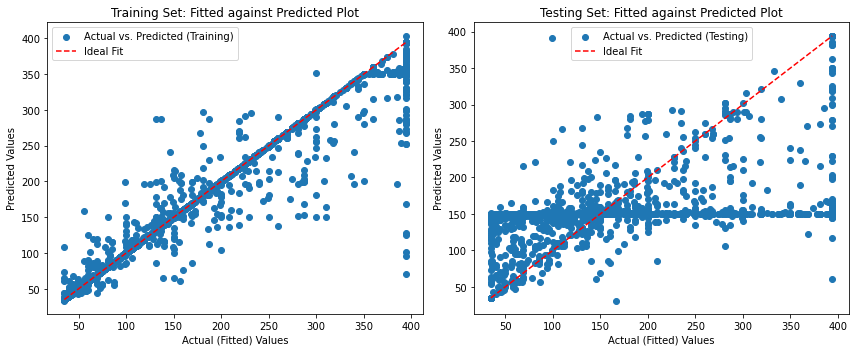

In [175]:
svr4 = SVR(kernel='rbf',max_iter=5000,C=200,gamma=10).fit(X_train,y_train)

model_scores_regression(svr4)
svr_models.append(svr4)
svr_names.append('svr4 - introduced gamma')

# introducing gamma caused the model to overfit like crazy

##### 4th iteration - introduce epsilon param
- remove gamma from grid

In [176]:
param_grid = {'kernel' : ['rbf','sigmoid','poly'],
              'max_iter' :  [3000,4000,5000],
              'C' : [100,200,300],
              'epsilon' : [0.1,0.6,1]}

In [177]:
start_time = time.time()

grid = GridSearchCV(estimator=svr, param_grid=param_grid, scoring='r2',verbose = 3,refit=True).fit(X_train,y_train)

end_time = time.time()

elapsed_time = end_time - start_time

Fitting 5 folds for each of 81 candidates, totalling 405 fits


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=100, epsilon=0.1, kernel=rbf, max_iter=3000;, score=0.419 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=100, epsilon=0.1, kernel=rbf, max_iter=3000;, score=0.415 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=100, epsilon=0.1, kernel=rbf, max_iter=3000;, score=0.426 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=100, epsilon=0.1, kernel=rbf, max_iter=3000;, score=0.402 total time=   0.7s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=100, epsilon=0.1, kernel=rbf, max_iter=3000;, score=0.427 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=100, epsilon=0.1, kernel=rbf, max_iter=4000;, score=0.419 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=100, epsilon=0.1, kernel=rbf, max_iter=4000;, score=0.416 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=100, epsilon=0.1, kernel=rbf, max_iter=4000;, score=0.427 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=100, epsilon=0.1, kernel=rbf, max_iter=4000;, score=0.405 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=100, epsilon=0.1, kernel=rbf, max_iter=4000;, score=0.425 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=100, epsilon=0.1, kernel=rbf, max_iter=5000;, score=0.419 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=100, epsilon=0.1, kernel=rbf, max_iter=5000;, score=0.417 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=100, epsilon=0.1, kernel=rbf, max_iter=5000;, score=0.427 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=100, epsilon=0.1, kernel=rbf, max_iter=5000;, score=0.404 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=100, epsilon=0.1, kernel=rbf, max_iter=5000;, score=0.425 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=100, epsilon=0.1, kernel=sigmoid, max_iter=3000;, score=-278.937 total time=   0.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=100, epsilon=0.1, kernel=sigmoid, max_iter=3000;, score=-451.622 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=100, epsilon=0.1, kernel=sigmoid, max_iter=3000;, score=-344.486 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=100, epsilon=0.1, kernel=sigmoid, max_iter=3000;, score=-370.108 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=100, epsilon=0.1, kernel=sigmoid, max_iter=3000;, score=-296.240 total time=   0.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=100, epsilon=0.1, kernel=sigmoid, max_iter=4000;, score=-309.495 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=100, epsilon=0.1, kernel=sigmoid, max_iter=4000;, score=-433.257 total time=   0.6s
[CV 3/5] END C=100, epsilon=0.1, kernel=sigmoid, max_iter=4000;, score=-344.481 total time=   0.6s
[CV 4/5] END C=100, epsilon=0.1, kernel=sigmoid, max_iter=4000;, score=-383.109 total time=   0.6s
[CV 5/5] END C=100, epsilon=0.1, kernel=sigmoid, max_iter=4000;, score=-291.516 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=100, epsilon=0.1, kernel=sigmoid, max_iter=5000;, score=-319.991 total time=   0.6s
[CV 2/5] END C=100, epsilon=0.1, kernel=sigmoid, max_iter=5000;, score=-432.957 total time=   0.6s
[CV 3/5] END C=100, epsilon=0.1, kernel=sigmoid, max_iter=5000;, score=-344.481 total time=   0.6s
[CV 4/5] END C=100, epsilon=0.1, kernel=sigmoid, max_iter=5000;, score=-383.109 total time=   0.8s
[CV 5/5] END C=100, epsilon=0.1, kernel=sigmoid, max_iter=5000;, score=-291.516 total time=   0.8s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=100, epsilon=0.1, kernel=poly, max_iter=3000;, score=0.346 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=100, epsilon=0.1, kernel=poly, max_iter=3000;, score=0.334 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=100, epsilon=0.1, kernel=poly, max_iter=3000;, score=0.326 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=100, epsilon=0.1, kernel=poly, max_iter=3000;, score=0.306 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=100, epsilon=0.1, kernel=poly, max_iter=3000;, score=0.338 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=100, epsilon=0.1, kernel=poly, max_iter=4000;, score=0.368 total time=   0.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=100, epsilon=0.1, kernel=poly, max_iter=4000;, score=0.356 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=100, epsilon=0.1, kernel=poly, max_iter=4000;, score=0.368 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=100, epsilon=0.1, kernel=poly, max_iter=4000;, score=0.343 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=100, epsilon=0.1, kernel=poly, max_iter=4000;, score=0.360 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=100, epsilon=0.1, kernel=poly, max_iter=5000;, score=0.369 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=100, epsilon=0.1, kernel=poly, max_iter=5000;, score=0.362 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=100, epsilon=0.1, kernel=poly, max_iter=5000;, score=0.371 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=100, epsilon=0.1, kernel=poly, max_iter=5000;, score=0.349 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=100, epsilon=0.1, kernel=poly, max_iter=5000;, score=0.367 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=100, epsilon=0.6, kernel=rbf, max_iter=3000;, score=0.419 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=100, epsilon=0.6, kernel=rbf, max_iter=3000;, score=0.417 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=100, epsilon=0.6, kernel=rbf, max_iter=3000;, score=0.428 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=100, epsilon=0.6, kernel=rbf, max_iter=3000;, score=0.404 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=100, epsilon=0.6, kernel=rbf, max_iter=3000;, score=0.426 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=100, epsilon=0.6, kernel=rbf, max_iter=4000;, score=0.419 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=100, epsilon=0.6, kernel=rbf, max_iter=4000;, score=0.417 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=100, epsilon=0.6, kernel=rbf, max_iter=4000;, score=0.427 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=100, epsilon=0.6, kernel=rbf, max_iter=4000;, score=0.405 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=100, epsilon=0.6, kernel=rbf, max_iter=4000;, score=0.426 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=100, epsilon=0.6, kernel=rbf, max_iter=5000;, score=0.419 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=100, epsilon=0.6, kernel=rbf, max_iter=5000;, score=0.417 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=100, epsilon=0.6, kernel=rbf, max_iter=5000;, score=0.427 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=100, epsilon=0.6, kernel=rbf, max_iter=5000;, score=0.405 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=100, epsilon=0.6, kernel=rbf, max_iter=5000;, score=0.426 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=100, epsilon=0.6, kernel=sigmoid, max_iter=3000;, score=-356.919 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=100, epsilon=0.6, kernel=sigmoid, max_iter=3000;, score=-400.114 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=100, epsilon=0.6, kernel=sigmoid, max_iter=3000;, score=-304.752 total time=   0.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=100, epsilon=0.6, kernel=sigmoid, max_iter=3000;, score=-290.770 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=100, epsilon=0.6, kernel=sigmoid, max_iter=3000;, score=-298.376 total time=   0.6s
[CV 1/5] END C=100, epsilon=0.6, kernel=sigmoid, max_iter=4000;, score=-367.010 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=100, epsilon=0.6, kernel=sigmoid, max_iter=4000;, score=-410.988 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=100, epsilon=0.6, kernel=sigmoid, max_iter=4000;, score=-313.612 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=100, epsilon=0.6, kernel=sigmoid, max_iter=4000;, score=-287.448 total time=   0.6s
[CV 5/5] END C=100, epsilon=0.6, kernel=sigmoid, max_iter=4000;, score=-291.531 total time=   0.6s
[CV 1/5] END C=100, epsilon=0.6, kernel=sigmoid, max_iter=5000;, score=-367.010 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=100, epsilon=0.6, kernel=sigmoid, max_iter=5000;, score=-411.709 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=100, epsilon=0.6, kernel=sigmoid, max_iter=5000;, score=-318.578 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=100, epsilon=0.6, kernel=sigmoid, max_iter=5000;, score=-286.783 total time=   0.6s
[CV 5/5] END C=100, epsilon=0.6, kernel=sigmoid, max_iter=5000;, score=-291.531 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=100, epsilon=0.6, kernel=poly, max_iter=3000;, score=0.343 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=100, epsilon=0.6, kernel=poly, max_iter=3000;, score=0.329 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=100, epsilon=0.6, kernel=poly, max_iter=3000;, score=0.333 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=100, epsilon=0.6, kernel=poly, max_iter=3000;, score=0.306 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=100, epsilon=0.6, kernel=poly, max_iter=3000;, score=0.330 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=100, epsilon=0.6, kernel=poly, max_iter=4000;, score=0.368 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=100, epsilon=0.6, kernel=poly, max_iter=4000;, score=0.359 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=100, epsilon=0.6, kernel=poly, max_iter=4000;, score=0.372 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=100, epsilon=0.6, kernel=poly, max_iter=4000;, score=0.344 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=100, epsilon=0.6, kernel=poly, max_iter=4000;, score=0.360 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=100, epsilon=0.6, kernel=poly, max_iter=5000;, score=0.370 total time=   0.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=100, epsilon=0.6, kernel=poly, max_iter=5000;, score=0.363 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=100, epsilon=0.6, kernel=poly, max_iter=5000;, score=0.376 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=100, epsilon=0.6, kernel=poly, max_iter=5000;, score=0.353 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=100, epsilon=0.6, kernel=poly, max_iter=5000;, score=0.369 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=100, epsilon=1, kernel=rbf, max_iter=3000;, score=0.419 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=100, epsilon=1, kernel=rbf, max_iter=3000;, score=0.416 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=100, epsilon=1, kernel=rbf, max_iter=3000;, score=0.428 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=100, epsilon=1, kernel=rbf, max_iter=3000;, score=0.405 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=100, epsilon=1, kernel=rbf, max_iter=3000;, score=0.428 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=100, epsilon=1, kernel=rbf, max_iter=4000;, score=0.419 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=100, epsilon=1, kernel=rbf, max_iter=4000;, score=0.417 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=100, epsilon=1, kernel=rbf, max_iter=4000;, score=0.427 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=100, epsilon=1, kernel=rbf, max_iter=4000;, score=0.405 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=100, epsilon=1, kernel=rbf, max_iter=4000;, score=0.427 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=100, epsilon=1, kernel=rbf, max_iter=5000;, score=0.419 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=100, epsilon=1, kernel=rbf, max_iter=5000;, score=0.418 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=100, epsilon=1, kernel=rbf, max_iter=5000;, score=0.427 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=100, epsilon=1, kernel=rbf, max_iter=5000;, score=0.405 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=100, epsilon=1, kernel=rbf, max_iter=5000;, score=0.427 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=100, epsilon=1, kernel=sigmoid, max_iter=3000;, score=-300.491 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=100, epsilon=1, kernel=sigmoid, max_iter=3000;, score=-408.603 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=100, epsilon=1, kernel=sigmoid, max_iter=3000;, score=-295.364 total time=   0.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=100, epsilon=1, kernel=sigmoid, max_iter=3000;, score=-368.059 total time=   0.6s
[CV 5/5] END C=100, epsilon=1, kernel=sigmoid, max_iter=3000;, score=-301.680 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=100, epsilon=1, kernel=sigmoid, max_iter=4000;, score=-332.082 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=100, epsilon=1, kernel=sigmoid, max_iter=4000;, score=-408.869 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=100, epsilon=1, kernel=sigmoid, max_iter=4000;, score=-306.201 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=100, epsilon=1, kernel=sigmoid, max_iter=4000;, score=-385.343 total time=   0.6s
[CV 5/5] END C=100, epsilon=1, kernel=sigmoid, max_iter=4000;, score=-301.680 total time=   0.6s
[CV 1/5] END C=100, epsilon=1, kernel=sigmoid, max_iter=5000;, score=-367.438 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=100, epsilon=1, kernel=sigmoid, max_iter=5000;, score=-417.795 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=100, epsilon=1, kernel=sigmoid, max_iter=5000;, score=-330.821 total time=   0.6s
[CV 4/5] END C=100, epsilon=1, kernel=sigmoid, max_iter=5000;, score=-385.343 total time=   0.6s
[CV 5/5] END C=100, epsilon=1, kernel=sigmoid, max_iter=5000;, score=-301.680 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=100, epsilon=1, kernel=poly, max_iter=3000;, score=0.342 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=100, epsilon=1, kernel=poly, max_iter=3000;, score=0.333 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=100, epsilon=1, kernel=poly, max_iter=3000;, score=0.344 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=100, epsilon=1, kernel=poly, max_iter=3000;, score=0.313 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=100, epsilon=1, kernel=poly, max_iter=3000;, score=0.352 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=100, epsilon=1, kernel=poly, max_iter=4000;, score=0.368 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=100, epsilon=1, kernel=poly, max_iter=4000;, score=0.354 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=100, epsilon=1, kernel=poly, max_iter=4000;, score=0.368 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=100, epsilon=1, kernel=poly, max_iter=4000;, score=0.344 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=100, epsilon=1, kernel=poly, max_iter=4000;, score=0.360 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=100, epsilon=1, kernel=poly, max_iter=5000;, score=0.368 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=100, epsilon=1, kernel=poly, max_iter=5000;, score=0.362 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=100, epsilon=1, kernel=poly, max_iter=5000;, score=0.376 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=100, epsilon=1, kernel=poly, max_iter=5000;, score=0.355 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=100, epsilon=1, kernel=poly, max_iter=5000;, score=0.367 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=200, epsilon=0.1, kernel=rbf, max_iter=3000;, score=0.419 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=200, epsilon=0.1, kernel=rbf, max_iter=3000;, score=0.414 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=200, epsilon=0.1, kernel=rbf, max_iter=3000;, score=0.424 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=200, epsilon=0.1, kernel=rbf, max_iter=3000;, score=0.410 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=200, epsilon=0.1, kernel=rbf, max_iter=3000;, score=0.440 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=200, epsilon=0.1, kernel=rbf, max_iter=4000;, score=0.420 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=200, epsilon=0.1, kernel=rbf, max_iter=4000;, score=0.415 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=200, epsilon=0.1, kernel=rbf, max_iter=4000;, score=0.430 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=200, epsilon=0.1, kernel=rbf, max_iter=4000;, score=0.409 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=200, epsilon=0.1, kernel=rbf, max_iter=4000;, score=0.437 total time=   0.7s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=200, epsilon=0.1, kernel=rbf, max_iter=5000;, score=0.420 total time=   0.7s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=200, epsilon=0.1, kernel=rbf, max_iter=5000;, score=0.417 total time=   0.7s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=200, epsilon=0.1, kernel=rbf, max_iter=5000;, score=0.430 total time=   0.7s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=200, epsilon=0.1, kernel=rbf, max_iter=5000;, score=0.412 total time=   0.7s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=200, epsilon=0.1, kernel=rbf, max_iter=5000;, score=0.436 total time=   0.7s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=200, epsilon=0.1, kernel=sigmoid, max_iter=3000;, score=-1273.643 total time=   0.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=200, epsilon=0.1, kernel=sigmoid, max_iter=3000;, score=-1455.488 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=200, epsilon=0.1, kernel=sigmoid, max_iter=3000;, score=-1348.660 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=200, epsilon=0.1, kernel=sigmoid, max_iter=3000;, score=-1152.173 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=200, epsilon=0.1, kernel=sigmoid, max_iter=3000;, score=-1181.230 total time=   0.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=200, epsilon=0.1, kernel=sigmoid, max_iter=4000;, score=-1264.514 total time=   0.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=200, epsilon=0.1, kernel=sigmoid, max_iter=4000;, score=-1567.542 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=200, epsilon=0.1, kernel=sigmoid, max_iter=4000;, score=-1355.031 total time=   0.6s
[CV 4/5] END C=200, epsilon=0.1, kernel=sigmoid, max_iter=4000;, score=-1148.999 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=200, epsilon=0.1, kernel=sigmoid, max_iter=4000;, score=-1180.444 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=200, epsilon=0.1, kernel=sigmoid, max_iter=5000;, score=-1262.436 total time=   0.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=200, epsilon=0.1, kernel=sigmoid, max_iter=5000;, score=-1590.239 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=200, epsilon=0.1, kernel=sigmoid, max_iter=5000;, score=-1372.109 total time=   0.6s
[CV 4/5] END C=200, epsilon=0.1, kernel=sigmoid, max_iter=5000;, score=-1148.999 total time=   0.6s
[CV 5/5] END C=200, epsilon=0.1, kernel=sigmoid, max_iter=5000;, score=-1180.469 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=200, epsilon=0.1, kernel=poly, max_iter=3000;, score=0.273 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=200, epsilon=0.1, kernel=poly, max_iter=3000;, score=0.310 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=200, epsilon=0.1, kernel=poly, max_iter=3000;, score=0.278 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=200, epsilon=0.1, kernel=poly, max_iter=3000;, score=0.285 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=200, epsilon=0.1, kernel=poly, max_iter=3000;, score=0.295 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=200, epsilon=0.1, kernel=poly, max_iter=4000;, score=0.331 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=200, epsilon=0.1, kernel=poly, max_iter=4000;, score=0.325 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=200, epsilon=0.1, kernel=poly, max_iter=4000;, score=0.329 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=200, epsilon=0.1, kernel=poly, max_iter=4000;, score=0.301 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=200, epsilon=0.1, kernel=poly, max_iter=4000;, score=0.327 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=200, epsilon=0.1, kernel=poly, max_iter=5000;, score=0.351 total time=   0.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=200, epsilon=0.1, kernel=poly, max_iter=5000;, score=0.354 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=200, epsilon=0.1, kernel=poly, max_iter=5000;, score=0.361 total time=   0.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=200, epsilon=0.1, kernel=poly, max_iter=5000;, score=0.338 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=200, epsilon=0.1, kernel=poly, max_iter=5000;, score=0.357 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=200, epsilon=0.6, kernel=rbf, max_iter=3000;, score=0.416 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=200, epsilon=0.6, kernel=rbf, max_iter=3000;, score=0.410 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=200, epsilon=0.6, kernel=rbf, max_iter=3000;, score=0.427 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=200, epsilon=0.6, kernel=rbf, max_iter=3000;, score=0.413 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=200, epsilon=0.6, kernel=rbf, max_iter=3000;, score=0.435 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=200, epsilon=0.6, kernel=rbf, max_iter=4000;, score=0.420 total time=   0.7s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=200, epsilon=0.6, kernel=rbf, max_iter=4000;, score=0.417 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=200, epsilon=0.6, kernel=rbf, max_iter=4000;, score=0.429 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=200, epsilon=0.6, kernel=rbf, max_iter=4000;, score=0.411 total time=   0.7s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=200, epsilon=0.6, kernel=rbf, max_iter=4000;, score=0.439 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=200, epsilon=0.6, kernel=rbf, max_iter=5000;, score=0.420 total time=   0.7s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=200, epsilon=0.6, kernel=rbf, max_iter=5000;, score=0.417 total time=   0.7s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=200, epsilon=0.6, kernel=rbf, max_iter=5000;, score=0.430 total time=   0.7s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=200, epsilon=0.6, kernel=rbf, max_iter=5000;, score=0.412 total time=   0.7s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=200, epsilon=0.6, kernel=rbf, max_iter=5000;, score=0.436 total time=   0.7s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=200, epsilon=0.6, kernel=sigmoid, max_iter=3000;, score=-1263.206 total time=   0.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=200, epsilon=0.6, kernel=sigmoid, max_iter=3000;, score=-1483.274 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=200, epsilon=0.6, kernel=sigmoid, max_iter=3000;, score=-1365.783 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=200, epsilon=0.6, kernel=sigmoid, max_iter=3000;, score=-1165.869 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=200, epsilon=0.6, kernel=sigmoid, max_iter=3000;, score=-1178.762 total time=   0.6s
[CV 1/5] END C=200, epsilon=0.6, kernel=sigmoid, max_iter=4000;, score=-1263.206 total time=   0.5s
[CV 2/5] END C=200, epsilon=0.6, kernel=sigmoid, max_iter=4000;, score=-1453.610 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=200, epsilon=0.6, kernel=sigmoid, max_iter=4000;, score=-1367.188 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=200, epsilon=0.6, kernel=sigmoid, max_iter=4000;, score=-1146.374 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=200, epsilon=0.6, kernel=sigmoid, max_iter=4000;, score=-1178.533 total time=   0.6s
[CV 1/5] END C=200, epsilon=0.6, kernel=sigmoid, max_iter=5000;, score=-1263.206 total time=   0.5s
[CV 2/5] END C=200, epsilon=0.6, kernel=sigmoid, max_iter=5000;, score=-1453.610 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=200, epsilon=0.6, kernel=sigmoid, max_iter=5000;, score=-1331.771 total time=   0.6s
[CV 4/5] END C=200, epsilon=0.6, kernel=sigmoid, max_iter=5000;, score=-1146.374 total time=   0.6s
[CV 5/5] END C=200, epsilon=0.6, kernel=sigmoid, max_iter=5000;, score=-1182.302 total time=   0.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=200, epsilon=0.6, kernel=poly, max_iter=3000;, score=0.293 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=200, epsilon=0.6, kernel=poly, max_iter=3000;, score=0.298 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=200, epsilon=0.6, kernel=poly, max_iter=3000;, score=0.274 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=200, epsilon=0.6, kernel=poly, max_iter=3000;, score=0.269 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=200, epsilon=0.6, kernel=poly, max_iter=3000;, score=0.289 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=200, epsilon=0.6, kernel=poly, max_iter=4000;, score=0.342 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=200, epsilon=0.6, kernel=poly, max_iter=4000;, score=0.317 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=200, epsilon=0.6, kernel=poly, max_iter=4000;, score=0.309 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=200, epsilon=0.6, kernel=poly, max_iter=4000;, score=0.314 total time=   0.7s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=200, epsilon=0.6, kernel=poly, max_iter=4000;, score=0.340 total time=   0.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=200, epsilon=0.6, kernel=poly, max_iter=5000;, score=0.349 total time=   0.7s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=200, epsilon=0.6, kernel=poly, max_iter=5000;, score=0.349 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=200, epsilon=0.6, kernel=poly, max_iter=5000;, score=0.362 total time=   0.7s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=200, epsilon=0.6, kernel=poly, max_iter=5000;, score=0.333 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=200, epsilon=0.6, kernel=poly, max_iter=5000;, score=0.356 total time=   0.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=200, epsilon=1, kernel=rbf, max_iter=3000;, score=0.418 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=200, epsilon=1, kernel=rbf, max_iter=3000;, score=0.413 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=200, epsilon=1, kernel=rbf, max_iter=3000;, score=0.427 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=200, epsilon=1, kernel=rbf, max_iter=3000;, score=0.406 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=200, epsilon=1, kernel=rbf, max_iter=3000;, score=0.435 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=200, epsilon=1, kernel=rbf, max_iter=4000;, score=0.419 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=200, epsilon=1, kernel=rbf, max_iter=4000;, score=0.416 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=200, epsilon=1, kernel=rbf, max_iter=4000;, score=0.429 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=200, epsilon=1, kernel=rbf, max_iter=4000;, score=0.413 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=200, epsilon=1, kernel=rbf, max_iter=4000;, score=0.438 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=200, epsilon=1, kernel=rbf, max_iter=5000;, score=0.420 total time=   0.7s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=200, epsilon=1, kernel=rbf, max_iter=5000;, score=0.417 total time=   0.7s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=200, epsilon=1, kernel=rbf, max_iter=5000;, score=0.430 total time=   0.7s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=200, epsilon=1, kernel=rbf, max_iter=5000;, score=0.413 total time=   0.7s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=200, epsilon=1, kernel=rbf, max_iter=5000;, score=0.438 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=200, epsilon=1, kernel=sigmoid, max_iter=3000;, score=-1267.737 total time=   0.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=200, epsilon=1, kernel=sigmoid, max_iter=3000;, score=-1751.611 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=200, epsilon=1, kernel=sigmoid, max_iter=3000;, score=-1345.366 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=200, epsilon=1, kernel=sigmoid, max_iter=3000;, score=-1154.857 total time=   0.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=200, epsilon=1, kernel=sigmoid, max_iter=3000;, score=-1166.091 total time=   0.6s
[CV 1/5] END C=200, epsilon=1, kernel=sigmoid, max_iter=4000;, score=-1267.756 total time=   0.6s
[CV 2/5] END C=200, epsilon=1, kernel=sigmoid, max_iter=4000;, score=-1751.980 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=200, epsilon=1, kernel=sigmoid, max_iter=4000;, score=-1383.428 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=200, epsilon=1, kernel=sigmoid, max_iter=4000;, score=-1153.242 total time=   0.6s
[CV 5/5] END C=200, epsilon=1, kernel=sigmoid, max_iter=4000;, score=-1165.825 total time=   0.6s
[CV 1/5] END C=200, epsilon=1, kernel=sigmoid, max_iter=5000;, score=-1267.756 total time=   0.6s
[CV 2/5] END C=200, epsilon=1, kernel=sigmoid, max_iter=5000;, score=-1751.980 total time=   0.6s
[CV 3/5] END C=200, epsilon=1, kernel=sigmoid, max_iter=5000;, score=-1358.317 total time=   0.6s
[CV 4/5] END C=200, epsilon=1, kernel=sigmoid, max_iter=5000;, score=-1151.102 total time=   0.6s
[CV 5/5] END C=200, epsilon=1, kernel=sigmoid, max_iter=5000;, score=-1165.825 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=200, epsilon=1, kernel=poly, max_iter=3000;, score=0.311 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=200, epsilon=1, kernel=poly, max_iter=3000;, score=0.283 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=200, epsilon=1, kernel=poly, max_iter=3000;, score=0.245 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=200, epsilon=1, kernel=poly, max_iter=3000;, score=0.276 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=200, epsilon=1, kernel=poly, max_iter=3000;, score=0.303 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=200, epsilon=1, kernel=poly, max_iter=4000;, score=0.336 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=200, epsilon=1, kernel=poly, max_iter=4000;, score=0.339 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=200, epsilon=1, kernel=poly, max_iter=4000;, score=0.350 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=200, epsilon=1, kernel=poly, max_iter=4000;, score=0.317 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=200, epsilon=1, kernel=poly, max_iter=4000;, score=0.334 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=200, epsilon=1, kernel=poly, max_iter=5000;, score=0.354 total time=   0.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=200, epsilon=1, kernel=poly, max_iter=5000;, score=0.351 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=200, epsilon=1, kernel=poly, max_iter=5000;, score=0.364 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=200, epsilon=1, kernel=poly, max_iter=5000;, score=0.328 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=200, epsilon=1, kernel=poly, max_iter=5000;, score=0.362 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=300, epsilon=0.1, kernel=rbf, max_iter=3000;, score=0.412 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=300, epsilon=0.1, kernel=rbf, max_iter=3000;, score=0.419 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=300, epsilon=0.1, kernel=rbf, max_iter=3000;, score=0.426 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=300, epsilon=0.1, kernel=rbf, max_iter=3000;, score=0.400 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=300, epsilon=0.1, kernel=rbf, max_iter=3000;, score=0.437 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=300, epsilon=0.1, kernel=rbf, max_iter=4000;, score=0.416 total time=   0.7s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=300, epsilon=0.1, kernel=rbf, max_iter=4000;, score=0.422 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=300, epsilon=0.1, kernel=rbf, max_iter=4000;, score=0.430 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=300, epsilon=0.1, kernel=rbf, max_iter=4000;, score=0.413 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=300, epsilon=0.1, kernel=rbf, max_iter=4000;, score=0.442 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=300, epsilon=0.1, kernel=rbf, max_iter=5000;, score=0.415 total time=   0.7s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=300, epsilon=0.1, kernel=rbf, max_iter=5000;, score=0.422 total time=   0.7s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=300, epsilon=0.1, kernel=rbf, max_iter=5000;, score=0.431 total time=   0.7s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=300, epsilon=0.1, kernel=rbf, max_iter=5000;, score=0.413 total time=   0.7s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=300, epsilon=0.1, kernel=rbf, max_iter=5000;, score=0.442 total time=   0.7s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=300, epsilon=0.1, kernel=sigmoid, max_iter=3000;, score=-2423.615 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=300, epsilon=0.1, kernel=sigmoid, max_iter=3000;, score=-3059.728 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=300, epsilon=0.1, kernel=sigmoid, max_iter=3000;, score=-3045.953 total time=   0.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=300, epsilon=0.1, kernel=sigmoid, max_iter=3000;, score=-2131.323 total time=   0.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=300, epsilon=0.1, kernel=sigmoid, max_iter=3000;, score=-3305.119 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=300, epsilon=0.1, kernel=sigmoid, max_iter=4000;, score=-2743.307 total time=   0.6s
[CV 2/5] END C=300, epsilon=0.1, kernel=sigmoid, max_iter=4000;, score=-3048.350 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=300, epsilon=0.1, kernel=sigmoid, max_iter=4000;, score=-3018.166 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=300, epsilon=0.1, kernel=sigmoid, max_iter=4000;, score=-2129.748 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=300, epsilon=0.1, kernel=sigmoid, max_iter=4000;, score=-3320.843 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=300, epsilon=0.1, kernel=sigmoid, max_iter=5000;, score=-3037.945 total time=   0.6s
[CV 2/5] END C=300, epsilon=0.1, kernel=sigmoid, max_iter=5000;, score=-3048.350 total time=   0.6s
[CV 3/5] END C=300, epsilon=0.1, kernel=sigmoid, max_iter=5000;, score=-3010.212 total time=   0.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=300, epsilon=0.1, kernel=sigmoid, max_iter=5000;, score=-2120.070 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=300, epsilon=0.1, kernel=sigmoid, max_iter=5000;, score=-3761.155 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=300, epsilon=0.1, kernel=poly, max_iter=3000;, score=0.232 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=300, epsilon=0.1, kernel=poly, max_iter=3000;, score=0.226 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=300, epsilon=0.1, kernel=poly, max_iter=3000;, score=0.233 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=300, epsilon=0.1, kernel=poly, max_iter=3000;, score=0.231 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=300, epsilon=0.1, kernel=poly, max_iter=3000;, score=0.228 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=300, epsilon=0.1, kernel=poly, max_iter=4000;, score=0.304 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=300, epsilon=0.1, kernel=poly, max_iter=4000;, score=0.303 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=300, epsilon=0.1, kernel=poly, max_iter=4000;, score=0.317 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=300, epsilon=0.1, kernel=poly, max_iter=4000;, score=0.293 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=300, epsilon=0.1, kernel=poly, max_iter=4000;, score=0.282 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=300, epsilon=0.1, kernel=poly, max_iter=5000;, score=0.315 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=300, epsilon=0.1, kernel=poly, max_iter=5000;, score=0.333 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=300, epsilon=0.1, kernel=poly, max_iter=5000;, score=0.328 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=300, epsilon=0.1, kernel=poly, max_iter=5000;, score=0.320 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=300, epsilon=0.1, kernel=poly, max_iter=5000;, score=0.329 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=300, epsilon=0.6, kernel=rbf, max_iter=3000;, score=0.417 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=300, epsilon=0.6, kernel=rbf, max_iter=3000;, score=0.416 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=300, epsilon=0.6, kernel=rbf, max_iter=3000;, score=0.428 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=300, epsilon=0.6, kernel=rbf, max_iter=3000;, score=0.409 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=300, epsilon=0.6, kernel=rbf, max_iter=3000;, score=0.445 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=300, epsilon=0.6, kernel=rbf, max_iter=4000;, score=0.418 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=300, epsilon=0.6, kernel=rbf, max_iter=4000;, score=0.420 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=300, epsilon=0.6, kernel=rbf, max_iter=4000;, score=0.430 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=300, epsilon=0.6, kernel=rbf, max_iter=4000;, score=0.412 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=300, epsilon=0.6, kernel=rbf, max_iter=4000;, score=0.442 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=300, epsilon=0.6, kernel=rbf, max_iter=5000;, score=0.416 total time=   0.7s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=300, epsilon=0.6, kernel=rbf, max_iter=5000;, score=0.419 total time=   0.7s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=300, epsilon=0.6, kernel=rbf, max_iter=5000;, score=0.432 total time=   0.7s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=300, epsilon=0.6, kernel=rbf, max_iter=5000;, score=0.413 total time=   0.7s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=300, epsilon=0.6, kernel=rbf, max_iter=5000;, score=0.442 total time=   0.7s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=300, epsilon=0.6, kernel=sigmoid, max_iter=3000;, score=-2615.697 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=300, epsilon=0.6, kernel=sigmoid, max_iter=3000;, score=-3042.228 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=300, epsilon=0.6, kernel=sigmoid, max_iter=3000;, score=-3023.660 total time=   0.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=300, epsilon=0.6, kernel=sigmoid, max_iter=3000;, score=-2143.533 total time=   0.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=300, epsilon=0.6, kernel=sigmoid, max_iter=3000;, score=-3347.281 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=300, epsilon=0.6, kernel=sigmoid, max_iter=4000;, score=-2516.217 total time=   0.6s
[CV 2/5] END C=300, epsilon=0.6, kernel=sigmoid, max_iter=4000;, score=-3042.637 total time=   0.6s
[CV 3/5] END C=300, epsilon=0.6, kernel=sigmoid, max_iter=4000;, score=-3023.673 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=300, epsilon=0.6, kernel=sigmoid, max_iter=4000;, score=-2137.479 total time=   0.7s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=300, epsilon=0.6, kernel=sigmoid, max_iter=4000;, score=-3583.312 total time=   0.6s
[CV 1/5] END C=300, epsilon=0.6, kernel=sigmoid, max_iter=5000;, score=-2507.211 total time=   0.6s
[CV 2/5] END C=300, epsilon=0.6, kernel=sigmoid, max_iter=5000;, score=-3042.637 total time=   0.6s
[CV 3/5] END C=300, epsilon=0.6, kernel=sigmoid, max_iter=5000;, score=-3023.673 total time=   0.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=300, epsilon=0.6, kernel=sigmoid, max_iter=5000;, score=-2115.720 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=300, epsilon=0.6, kernel=sigmoid, max_iter=5000;, score=-3707.134 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=300, epsilon=0.6, kernel=poly, max_iter=3000;, score=0.260 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=300, epsilon=0.6, kernel=poly, max_iter=3000;, score=0.202 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=300, epsilon=0.6, kernel=poly, max_iter=3000;, score=0.175 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=300, epsilon=0.6, kernel=poly, max_iter=3000;, score=0.230 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=300, epsilon=0.6, kernel=poly, max_iter=3000;, score=0.271 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=300, epsilon=0.6, kernel=poly, max_iter=4000;, score=0.296 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=300, epsilon=0.6, kernel=poly, max_iter=4000;, score=0.311 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=300, epsilon=0.6, kernel=poly, max_iter=4000;, score=0.301 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=300, epsilon=0.6, kernel=poly, max_iter=4000;, score=0.302 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=300, epsilon=0.6, kernel=poly, max_iter=4000;, score=0.312 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=300, epsilon=0.6, kernel=poly, max_iter=5000;, score=0.325 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=300, epsilon=0.6, kernel=poly, max_iter=5000;, score=0.332 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=300, epsilon=0.6, kernel=poly, max_iter=5000;, score=0.322 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=300, epsilon=0.6, kernel=poly, max_iter=5000;, score=0.326 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=300, epsilon=0.6, kernel=poly, max_iter=5000;, score=0.327 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=300, epsilon=1, kernel=rbf, max_iter=3000;, score=0.417 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=300, epsilon=1, kernel=rbf, max_iter=3000;, score=0.422 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=300, epsilon=1, kernel=rbf, max_iter=3000;, score=0.423 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=300, epsilon=1, kernel=rbf, max_iter=3000;, score=0.417 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=300, epsilon=1, kernel=rbf, max_iter=3000;, score=0.446 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=300, epsilon=1, kernel=rbf, max_iter=4000;, score=0.414 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=300, epsilon=1, kernel=rbf, max_iter=4000;, score=0.421 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=300, epsilon=1, kernel=rbf, max_iter=4000;, score=0.431 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=300, epsilon=1, kernel=rbf, max_iter=4000;, score=0.414 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=300, epsilon=1, kernel=rbf, max_iter=4000;, score=0.444 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=300, epsilon=1, kernel=rbf, max_iter=5000;, score=0.416 total time=   0.7s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=300, epsilon=1, kernel=rbf, max_iter=5000;, score=0.419 total time=   0.7s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=300, epsilon=1, kernel=rbf, max_iter=5000;, score=0.433 total time=   0.7s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=300, epsilon=1, kernel=rbf, max_iter=5000;, score=0.414 total time=   0.7s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=300, epsilon=1, kernel=rbf, max_iter=5000;, score=0.443 total time=   0.7s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=300, epsilon=1, kernel=sigmoid, max_iter=3000;, score=-2582.456 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=300, epsilon=1, kernel=sigmoid, max_iter=3000;, score=-3034.156 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=300, epsilon=1, kernel=sigmoid, max_iter=3000;, score=-3164.858 total time=   0.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=300, epsilon=1, kernel=sigmoid, max_iter=3000;, score=-2590.197 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=300, epsilon=1, kernel=sigmoid, max_iter=3000;, score=-3799.625 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=300, epsilon=1, kernel=sigmoid, max_iter=4000;, score=-2517.511 total time=   0.6s
[CV 2/5] END C=300, epsilon=1, kernel=sigmoid, max_iter=4000;, score=-3034.156 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=300, epsilon=1, kernel=sigmoid, max_iter=4000;, score=-3057.536 total time=   0.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=300, epsilon=1, kernel=sigmoid, max_iter=4000;, score=-2590.177 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=300, epsilon=1, kernel=sigmoid, max_iter=4000;, score=-3787.833 total time=   0.6s
[CV 1/5] END C=300, epsilon=1, kernel=sigmoid, max_iter=5000;, score=-2501.713 total time=   0.6s
[CV 2/5] END C=300, epsilon=1, kernel=sigmoid, max_iter=5000;, score=-3034.156 total time=   0.5s
[CV 3/5] END C=300, epsilon=1, kernel=sigmoid, max_iter=5000;, score=-3061.073 total time=   0.6s
[CV 4/5] END C=300, epsilon=1, kernel=sigmoid, max_iter=5000;, score=-2588.973 total time=   0.6s
[CV 5/5] END C=300, epsilon=1, kernel=sigmoid, max_iter=5000;, score=-3788.351 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=300, epsilon=1, kernel=poly, max_iter=3000;, score=0.210 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=300, epsilon=1, kernel=poly, max_iter=3000;, score=0.259 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=300, epsilon=1, kernel=poly, max_iter=3000;, score=0.206 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=300, epsilon=1, kernel=poly, max_iter=3000;, score=0.220 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=300, epsilon=1, kernel=poly, max_iter=3000;, score=0.244 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=300, epsilon=1, kernel=poly, max_iter=4000;, score=0.302 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=300, epsilon=1, kernel=poly, max_iter=4000;, score=0.316 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=300, epsilon=1, kernel=poly, max_iter=4000;, score=0.302 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=300, epsilon=1, kernel=poly, max_iter=4000;, score=0.288 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=300, epsilon=1, kernel=poly, max_iter=4000;, score=0.301 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=300, epsilon=1, kernel=poly, max_iter=5000;, score=0.323 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=300, epsilon=1, kernel=poly, max_iter=5000;, score=0.329 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=300, epsilon=1, kernel=poly, max_iter=5000;, score=0.347 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=300, epsilon=1, kernel=poly, max_iter=5000;, score=0.320 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=300, epsilon=1, kernel=poly, max_iter=5000;, score=0.321 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


In [178]:
print(grid.best_score_)
print(grid.best_params_)

minutes, seconds = divmod(elapsed_time, 60)
formatted_time = "{:02}:{:02}".format(int(minutes), int(seconds))
print("Elapsed Time: {}".format(formatted_time)) 

0.42521068434238724
{'C': 300, 'epsilon': 1, 'kernel': 'rbf', 'max_iter': 3000}
Elapsed Time: 04:19


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Model : SVR(C=300, epsilon=1, max_iter=5000):

R-Square:
0.5369354710558114 (Train R^2 Value)
0.44448303722263816 (Test R^2 Value)

RMSE:
66.38782968910952 (Train RMSE)
75.40978434965842 (Test RMSE)


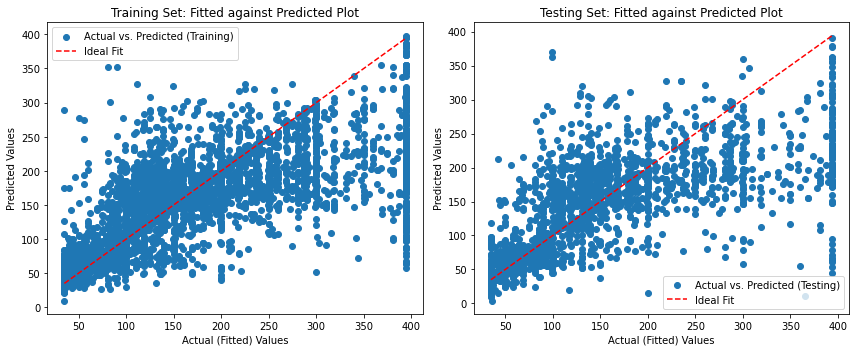

In [179]:
svr5 = SVR(kernel='rbf',max_iter=5000,C=300,epsilon=1).fit(X_train,y_train)

model_scores_regression(svr5)
svr_models.append(svr5)
svr_names.append('svr5 - removed gamma')

##### 5th iteration - higher epsilon

In [180]:
param_grid = {'kernel' : ['rbf','sigmoid','poly','linear'],
              'max_iter' :  [3000,4000,5000],
              'C' : [100,200,300],
              'epsilon' : [1,3,5]}

In [181]:
start_time = time.time()

grid = GridSearchCV(estimator=svr, param_grid=param_grid, scoring='r2',verbose = 3,refit=True).fit(X_train,y_train)

end_time = time.time()

elapsed_time = end_time - start_time

Fitting 5 folds for each of 108 candidates, totalling 540 fits


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=100, epsilon=1, kernel=rbf, max_iter=3000;, score=0.419 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=100, epsilon=1, kernel=rbf, max_iter=3000;, score=0.416 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=100, epsilon=1, kernel=rbf, max_iter=3000;, score=0.428 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=100, epsilon=1, kernel=rbf, max_iter=3000;, score=0.405 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=100, epsilon=1, kernel=rbf, max_iter=3000;, score=0.428 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=100, epsilon=1, kernel=rbf, max_iter=4000;, score=0.419 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=100, epsilon=1, kernel=rbf, max_iter=4000;, score=0.417 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=100, epsilon=1, kernel=rbf, max_iter=4000;, score=0.427 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=100, epsilon=1, kernel=rbf, max_iter=4000;, score=0.405 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=100, epsilon=1, kernel=rbf, max_iter=4000;, score=0.427 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=100, epsilon=1, kernel=rbf, max_iter=5000;, score=0.419 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=100, epsilon=1, kernel=rbf, max_iter=5000;, score=0.418 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=100, epsilon=1, kernel=rbf, max_iter=5000;, score=0.427 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=100, epsilon=1, kernel=rbf, max_iter=5000;, score=0.405 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=100, epsilon=1, kernel=rbf, max_iter=5000;, score=0.427 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=100, epsilon=1, kernel=sigmoid, max_iter=3000;, score=-300.491 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=100, epsilon=1, kernel=sigmoid, max_iter=3000;, score=-408.603 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=100, epsilon=1, kernel=sigmoid, max_iter=3000;, score=-295.364 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=100, epsilon=1, kernel=sigmoid, max_iter=3000;, score=-368.059 total time=   0.6s
[CV 5/5] END C=100, epsilon=1, kernel=sigmoid, max_iter=3000;, score=-301.680 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=100, epsilon=1, kernel=sigmoid, max_iter=4000;, score=-332.082 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=100, epsilon=1, kernel=sigmoid, max_iter=4000;, score=-408.869 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=100, epsilon=1, kernel=sigmoid, max_iter=4000;, score=-306.201 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=100, epsilon=1, kernel=sigmoid, max_iter=4000;, score=-385.343 total time=   0.6s
[CV 5/5] END C=100, epsilon=1, kernel=sigmoid, max_iter=4000;, score=-301.680 total time=   0.6s
[CV 1/5] END C=100, epsilon=1, kernel=sigmoid, max_iter=5000;, score=-367.438 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=100, epsilon=1, kernel=sigmoid, max_iter=5000;, score=-417.795 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=100, epsilon=1, kernel=sigmoid, max_iter=5000;, score=-330.821 total time=   0.6s
[CV 4/5] END C=100, epsilon=1, kernel=sigmoid, max_iter=5000;, score=-385.343 total time=   0.6s
[CV 5/5] END C=100, epsilon=1, kernel=sigmoid, max_iter=5000;, score=-301.680 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=100, epsilon=1, kernel=poly, max_iter=3000;, score=0.342 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=100, epsilon=1, kernel=poly, max_iter=3000;, score=0.333 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=100, epsilon=1, kernel=poly, max_iter=3000;, score=0.344 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=100, epsilon=1, kernel=poly, max_iter=3000;, score=0.313 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=100, epsilon=1, kernel=poly, max_iter=3000;, score=0.352 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=100, epsilon=1, kernel=poly, max_iter=4000;, score=0.368 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=100, epsilon=1, kernel=poly, max_iter=4000;, score=0.354 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=100, epsilon=1, kernel=poly, max_iter=4000;, score=0.368 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=100, epsilon=1, kernel=poly, max_iter=4000;, score=0.344 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=100, epsilon=1, kernel=poly, max_iter=4000;, score=0.360 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=100, epsilon=1, kernel=poly, max_iter=5000;, score=0.368 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=100, epsilon=1, kernel=poly, max_iter=5000;, score=0.362 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=100, epsilon=1, kernel=poly, max_iter=5000;, score=0.376 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=100, epsilon=1, kernel=poly, max_iter=5000;, score=0.355 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=100, epsilon=1, kernel=poly, max_iter=5000;, score=0.367 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=100, epsilon=1, kernel=linear, max_iter=3000;, score=0.119 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=100, epsilon=1, kernel=linear, max_iter=3000;, score=0.063 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=100, epsilon=1, kernel=linear, max_iter=3000;, score=-0.470 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=100, epsilon=1, kernel=linear, max_iter=3000;, score=0.108 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=100, epsilon=1, kernel=linear, max_iter=3000;, score=-0.163 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=100, epsilon=1, kernel=linear, max_iter=4000;, score=0.168 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=100, epsilon=1, kernel=linear, max_iter=4000;, score=0.194 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=100, epsilon=1, kernel=linear, max_iter=4000;, score=0.216 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=100, epsilon=1, kernel=linear, max_iter=4000;, score=0.192 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=100, epsilon=1, kernel=linear, max_iter=4000;, score=0.053 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=100, epsilon=1, kernel=linear, max_iter=5000;, score=0.177 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=100, epsilon=1, kernel=linear, max_iter=5000;, score=0.263 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=100, epsilon=1, kernel=linear, max_iter=5000;, score=0.256 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=100, epsilon=1, kernel=linear, max_iter=5000;, score=0.283 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=100, epsilon=1, kernel=linear, max_iter=5000;, score=0.283 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=100, epsilon=3, kernel=rbf, max_iter=3000;, score=0.420 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=100, epsilon=3, kernel=rbf, max_iter=3000;, score=0.418 total time=   0.7s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=100, epsilon=3, kernel=rbf, max_iter=3000;, score=0.429 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=100, epsilon=3, kernel=rbf, max_iter=3000;, score=0.406 total time=   0.7s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=100, epsilon=3, kernel=rbf, max_iter=3000;, score=0.429 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=100, epsilon=3, kernel=rbf, max_iter=4000;, score=0.420 total time=   0.9s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=100, epsilon=3, kernel=rbf, max_iter=4000;, score=0.418 total time=   0.7s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=100, epsilon=3, kernel=rbf, max_iter=4000;, score=0.429 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=100, epsilon=3, kernel=rbf, max_iter=4000;, score=0.406 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=100, epsilon=3, kernel=rbf, max_iter=4000;, score=0.430 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=100, epsilon=3, kernel=rbf, max_iter=5000;, score=0.420 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=100, epsilon=3, kernel=rbf, max_iter=5000;, score=0.417 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=100, epsilon=3, kernel=rbf, max_iter=5000;, score=0.429 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=100, epsilon=3, kernel=rbf, max_iter=5000;, score=0.406 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=100, epsilon=3, kernel=rbf, max_iter=5000;, score=0.430 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=100, epsilon=3, kernel=sigmoid, max_iter=3000;, score=-270.903 total time=   0.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=100, epsilon=3, kernel=sigmoid, max_iter=3000;, score=-416.710 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=100, epsilon=3, kernel=sigmoid, max_iter=3000;, score=-419.497 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=100, epsilon=3, kernel=sigmoid, max_iter=3000;, score=-287.728 total time=   0.6s
[CV 5/5] END C=100, epsilon=3, kernel=sigmoid, max_iter=3000;, score=-414.048 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=100, epsilon=3, kernel=sigmoid, max_iter=4000;, score=-294.971 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=100, epsilon=3, kernel=sigmoid, max_iter=4000;, score=-436.841 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=100, epsilon=3, kernel=sigmoid, max_iter=4000;, score=-437.760 total time=   0.6s
[CV 4/5] END C=100, epsilon=3, kernel=sigmoid, max_iter=4000;, score=-286.685 total time=   0.6s
[CV 5/5] END C=100, epsilon=3, kernel=sigmoid, max_iter=4000;, score=-414.048 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=100, epsilon=3, kernel=sigmoid, max_iter=5000;, score=-298.930 total time=   0.6s
[CV 2/5] END C=100, epsilon=3, kernel=sigmoid, max_iter=5000;, score=-436.831 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=100, epsilon=3, kernel=sigmoid, max_iter=5000;, score=-430.903 total time=   0.6s
[CV 4/5] END C=100, epsilon=3, kernel=sigmoid, max_iter=5000;, score=-286.685 total time=   0.6s
[CV 5/5] END C=100, epsilon=3, kernel=sigmoid, max_iter=5000;, score=-414.048 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=100, epsilon=3, kernel=poly, max_iter=3000;, score=0.351 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=100, epsilon=3, kernel=poly, max_iter=3000;, score=0.339 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=100, epsilon=3, kernel=poly, max_iter=3000;, score=0.340 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=100, epsilon=3, kernel=poly, max_iter=3000;, score=0.331 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=100, epsilon=3, kernel=poly, max_iter=3000;, score=0.346 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=100, epsilon=3, kernel=poly, max_iter=4000;, score=0.367 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=100, epsilon=3, kernel=poly, max_iter=4000;, score=0.358 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=100, epsilon=3, kernel=poly, max_iter=4000;, score=0.371 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=100, epsilon=3, kernel=poly, max_iter=4000;, score=0.349 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=100, epsilon=3, kernel=poly, max_iter=4000;, score=0.362 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=100, epsilon=3, kernel=poly, max_iter=5000;, score=0.372 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=100, epsilon=3, kernel=poly, max_iter=5000;, score=0.366 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=100, epsilon=3, kernel=poly, max_iter=5000;, score=0.379 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=100, epsilon=3, kernel=poly, max_iter=5000;, score=0.355 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=100, epsilon=3, kernel=poly, max_iter=5000;, score=0.370 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=100, epsilon=3, kernel=linear, max_iter=3000;, score=0.205 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=100, epsilon=3, kernel=linear, max_iter=3000;, score=0.201 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=100, epsilon=3, kernel=linear, max_iter=3000;, score=0.151 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=100, epsilon=3, kernel=linear, max_iter=3000;, score=0.099 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=100, epsilon=3, kernel=linear, max_iter=3000;, score=-0.137 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=100, epsilon=3, kernel=linear, max_iter=4000;, score=0.273 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=100, epsilon=3, kernel=linear, max_iter=4000;, score=0.265 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=100, epsilon=3, kernel=linear, max_iter=4000;, score=0.156 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=100, epsilon=3, kernel=linear, max_iter=4000;, score=0.024 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=100, epsilon=3, kernel=linear, max_iter=4000;, score=0.043 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=100, epsilon=3, kernel=linear, max_iter=5000;, score=0.259 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=100, epsilon=3, kernel=linear, max_iter=5000;, score=0.244 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=100, epsilon=3, kernel=linear, max_iter=5000;, score=0.185 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=100, epsilon=3, kernel=linear, max_iter=5000;, score=0.219 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=100, epsilon=3, kernel=linear, max_iter=5000;, score=0.281 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=100, epsilon=5, kernel=rbf, max_iter=3000;, score=0.422 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=100, epsilon=5, kernel=rbf, max_iter=3000;, score=0.419 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=100, epsilon=5, kernel=rbf, max_iter=3000;, score=0.429 total time=   0.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=100, epsilon=5, kernel=rbf, max_iter=3000;, score=0.405 total time=   0.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=100, epsilon=5, kernel=rbf, max_iter=3000;, score=0.433 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=100, epsilon=5, kernel=rbf, max_iter=4000;, score=0.422 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=100, epsilon=5, kernel=rbf, max_iter=4000;, score=0.419 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=100, epsilon=5, kernel=rbf, max_iter=4000;, score=0.430 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=100, epsilon=5, kernel=rbf, max_iter=4000;, score=0.406 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=100, epsilon=5, kernel=rbf, max_iter=4000;, score=0.432 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=100, epsilon=5, kernel=rbf, max_iter=5000;, score=0.421 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=100, epsilon=5, kernel=rbf, max_iter=5000;, score=0.419 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=100, epsilon=5, kernel=rbf, max_iter=5000;, score=0.430 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=100, epsilon=5, kernel=rbf, max_iter=5000;, score=0.406 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=100, epsilon=5, kernel=rbf, max_iter=5000;, score=0.432 total time=   0.6s
[CV 1/5] END C=100, epsilon=5, kernel=sigmoid, max_iter=3000;, score=-304.734 total time=   0.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=100, epsilon=5, kernel=sigmoid, max_iter=3000;, score=-328.221 total time=   0.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=100, epsilon=5, kernel=sigmoid, max_iter=3000;, score=-321.563 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=100, epsilon=5, kernel=sigmoid, max_iter=3000;, score=-287.662 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=100, epsilon=5, kernel=sigmoid, max_iter=3000;, score=-318.381 total time=   0.6s
[CV 1/5] END C=100, epsilon=5, kernel=sigmoid, max_iter=4000;, score=-304.734 total time=   0.5s
[CV 2/5] END C=100, epsilon=5, kernel=sigmoid, max_iter=4000;, score=-327.918 total time=   0.6s
[CV 3/5] END C=100, epsilon=5, kernel=sigmoid, max_iter=4000;, score=-322.413 total time=   0.6s
[CV 4/5] END C=100, epsilon=5, kernel=sigmoid, max_iter=4000;, score=-286.800 total time=   0.6s
[CV 5/5] END C=100, epsilon=5, kernel=sigmoid, max_iter=4000;, score=-302.277 total time=   0.6s
[CV 1/5] END C=100, epsilon=5, kernel=sigmoid, max_iter=5000;, score=-304.734 total time=   0.6s
[CV 2/5] END C=100, epsilon=5, kernel=sigmoid, max_iter=5000;, score=-327.918 total time=   0.6s
[CV 3/5] END C=100, epsilon=5, kernel=sigmoid, max_iter=5000;, score=-322.413 total time=   0.6s
[CV 4/5] END C=100, epsilon=5, kernel=sigmoid, max_iter=5000;, score=-286.800 total time=   0.6s
[CV 5/5] END C=100, epsilon=5,

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=100, epsilon=5, kernel=poly, max_iter=3000;, score=0.349 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=100, epsilon=5, kernel=poly, max_iter=3000;, score=0.341 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=100, epsilon=5, kernel=poly, max_iter=3000;, score=0.358 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=100, epsilon=5, kernel=poly, max_iter=3000;, score=0.329 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=100, epsilon=5, kernel=poly, max_iter=3000;, score=0.352 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=100, epsilon=5, kernel=poly, max_iter=4000;, score=0.370 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=100, epsilon=5, kernel=poly, max_iter=4000;, score=0.361 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=100, epsilon=5, kernel=poly, max_iter=4000;, score=0.376 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=100, epsilon=5, kernel=poly, max_iter=4000;, score=0.354 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=100, epsilon=5, kernel=poly, max_iter=4000;, score=0.369 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=100, epsilon=5, kernel=poly, max_iter=5000;, score=0.374 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=100, epsilon=5, kernel=poly, max_iter=5000;, score=0.369 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=100, epsilon=5, kernel=poly, max_iter=5000;, score=0.381 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=100, epsilon=5, kernel=poly, max_iter=5000;, score=0.360 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=100, epsilon=5, kernel=poly, max_iter=5000;, score=0.374 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=100, epsilon=5, kernel=linear, max_iter=3000;, score=0.202 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=100, epsilon=5, kernel=linear, max_iter=3000;, score=0.098 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=100, epsilon=5, kernel=linear, max_iter=3000;, score=0.190 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=100, epsilon=5, kernel=linear, max_iter=3000;, score=0.068 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=100, epsilon=5, kernel=linear, max_iter=3000;, score=0.237 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=100, epsilon=5, kernel=linear, max_iter=4000;, score=0.110 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=100, epsilon=5, kernel=linear, max_iter=4000;, score=0.146 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=100, epsilon=5, kernel=linear, max_iter=4000;, score=-0.259 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=100, epsilon=5, kernel=linear, max_iter=4000;, score=0.196 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=100, epsilon=5, kernel=linear, max_iter=4000;, score=0.201 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=100, epsilon=5, kernel=linear, max_iter=5000;, score=0.310 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=100, epsilon=5, kernel=linear, max_iter=5000;, score=0.211 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=100, epsilon=5, kernel=linear, max_iter=5000;, score=0.273 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=100, epsilon=5, kernel=linear, max_iter=5000;, score=0.233 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=100, epsilon=5, kernel=linear, max_iter=5000;, score=0.283 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=200, epsilon=1, kernel=rbf, max_iter=3000;, score=0.418 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=200, epsilon=1, kernel=rbf, max_iter=3000;, score=0.413 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=200, epsilon=1, kernel=rbf, max_iter=3000;, score=0.427 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=200, epsilon=1, kernel=rbf, max_iter=3000;, score=0.406 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=200, epsilon=1, kernel=rbf, max_iter=3000;, score=0.435 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=200, epsilon=1, kernel=rbf, max_iter=4000;, score=0.419 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=200, epsilon=1, kernel=rbf, max_iter=4000;, score=0.416 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=200, epsilon=1, kernel=rbf, max_iter=4000;, score=0.429 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=200, epsilon=1, kernel=rbf, max_iter=4000;, score=0.413 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=200, epsilon=1, kernel=rbf, max_iter=4000;, score=0.438 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=200, epsilon=1, kernel=rbf, max_iter=5000;, score=0.420 total time=   0.7s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=200, epsilon=1, kernel=rbf, max_iter=5000;, score=0.417 total time=   0.7s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=200, epsilon=1, kernel=rbf, max_iter=5000;, score=0.430 total time=   0.7s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=200, epsilon=1, kernel=rbf, max_iter=5000;, score=0.413 total time=   0.7s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=200, epsilon=1, kernel=rbf, max_iter=5000;, score=0.438 total time=   0.8s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=200, epsilon=1, kernel=sigmoid, max_iter=3000;, score=-1267.737 total time=   0.9s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=200, epsilon=1, kernel=sigmoid, max_iter=3000;, score=-1751.611 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=200, epsilon=1, kernel=sigmoid, max_iter=3000;, score=-1345.366 total time=   0.8s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=200, epsilon=1, kernel=sigmoid, max_iter=3000;, score=-1154.857 total time=   0.7s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=200, epsilon=1, kernel=sigmoid, max_iter=3000;, score=-1166.091 total time=   0.6s
[CV 1/5] END C=200, epsilon=1, kernel=sigmoid, max_iter=4000;, score=-1267.756 total time=   0.6s
[CV 2/5] END C=200, epsilon=1, kernel=sigmoid, max_iter=4000;, score=-1751.980 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=200, epsilon=1, kernel=sigmoid, max_iter=4000;, score=-1383.428 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=200, epsilon=1, kernel=sigmoid, max_iter=4000;, score=-1153.242 total time=   0.6s
[CV 5/5] END C=200, epsilon=1, kernel=sigmoid, max_iter=4000;, score=-1165.825 total time=   0.6s
[CV 1/5] END C=200, epsilon=1, kernel=sigmoid, max_iter=5000;, score=-1267.756 total time=   0.6s
[CV 2/5] END C=200, epsilon=1, kernel=sigmoid, max_iter=5000;, score=-1751.980 total time=   0.6s
[CV 3/5] END C=200, epsilon=1, kernel=sigmoid, max_iter=5000;, score=-1358.317 total time=   0.6s
[CV 4/5] END C=200, epsilon=1, kernel=sigmoid, max_iter=5000;, score=-1151.102 total time=   0.6s
[CV 5/5] END C=200, epsilon=1, kernel=sigmoid, max_iter=5000;, score=-1165.825 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=200, epsilon=1, kernel=poly, max_iter=3000;, score=0.311 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=200, epsilon=1, kernel=poly, max_iter=3000;, score=0.283 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=200, epsilon=1, kernel=poly, max_iter=3000;, score=0.245 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=200, epsilon=1, kernel=poly, max_iter=3000;, score=0.276 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=200, epsilon=1, kernel=poly, max_iter=3000;, score=0.303 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=200, epsilon=1, kernel=poly, max_iter=4000;, score=0.336 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=200, epsilon=1, kernel=poly, max_iter=4000;, score=0.339 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=200, epsilon=1, kernel=poly, max_iter=4000;, score=0.350 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=200, epsilon=1, kernel=poly, max_iter=4000;, score=0.317 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=200, epsilon=1, kernel=poly, max_iter=4000;, score=0.334 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=200, epsilon=1, kernel=poly, max_iter=5000;, score=0.354 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=200, epsilon=1, kernel=poly, max_iter=5000;, score=0.351 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=200, epsilon=1, kernel=poly, max_iter=5000;, score=0.364 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=200, epsilon=1, kernel=poly, max_iter=5000;, score=0.328 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=200, epsilon=1, kernel=poly, max_iter=5000;, score=0.362 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=200, epsilon=1, kernel=linear, max_iter=3000;, score=-0.151 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=200, epsilon=1, kernel=linear, max_iter=3000;, score=-0.065 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=200, epsilon=1, kernel=linear, max_iter=3000;, score=-0.176 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=200, epsilon=1, kernel=linear, max_iter=3000;, score=0.085 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=200, epsilon=1, kernel=linear, max_iter=3000;, score=0.020 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=200, epsilon=1, kernel=linear, max_iter=4000;, score=0.209 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=200, epsilon=1, kernel=linear, max_iter=4000;, score=0.206 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=200, epsilon=1, kernel=linear, max_iter=4000;, score=0.008 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=200, epsilon=1, kernel=linear, max_iter=4000;, score=0.041 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=200, epsilon=1, kernel=linear, max_iter=4000;, score=0.041 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=200, epsilon=1, kernel=linear, max_iter=5000;, score=0.165 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=200, epsilon=1, kernel=linear, max_iter=5000;, score=0.113 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=200, epsilon=1, kernel=linear, max_iter=5000;, score=0.160 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=200, epsilon=1, kernel=linear, max_iter=5000;, score=0.210 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=200, epsilon=1, kernel=linear, max_iter=5000;, score=0.134 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=200, epsilon=3, kernel=rbf, max_iter=3000;, score=0.420 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=200, epsilon=3, kernel=rbf, max_iter=3000;, score=0.419 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=200, epsilon=3, kernel=rbf, max_iter=3000;, score=0.427 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=200, epsilon=3, kernel=rbf, max_iter=3000;, score=0.413 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=200, epsilon=3, kernel=rbf, max_iter=3000;, score=0.439 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=200, epsilon=3, kernel=rbf, max_iter=4000;, score=0.421 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=200, epsilon=3, kernel=rbf, max_iter=4000;, score=0.417 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=200, epsilon=3, kernel=rbf, max_iter=4000;, score=0.431 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=200, epsilon=3, kernel=rbf, max_iter=4000;, score=0.414 total time=   0.7s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=200, epsilon=3, kernel=rbf, max_iter=4000;, score=0.438 total time=   0.7s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=200, epsilon=3, kernel=rbf, max_iter=5000;, score=0.421 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=200, epsilon=3, kernel=rbf, max_iter=5000;, score=0.419 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=200, epsilon=3, kernel=rbf, max_iter=5000;, score=0.430 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=200, epsilon=3, kernel=rbf, max_iter=5000;, score=0.414 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=200, epsilon=3, kernel=rbf, max_iter=5000;, score=0.440 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=200, epsilon=3, kernel=sigmoid, max_iter=3000;, score=-1271.303 total time=   0.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=200, epsilon=3, kernel=sigmoid, max_iter=3000;, score=-1364.549 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=200, epsilon=3, kernel=sigmoid, max_iter=3000;, score=-1349.829 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=200, epsilon=3, kernel=sigmoid, max_iter=3000;, score=-1163.782 total time=   0.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=200, epsilon=3, kernel=sigmoid, max_iter=3000;, score=-1176.128 total time=   0.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=200, epsilon=3, kernel=sigmoid, max_iter=4000;, score=-1267.292 total time=   0.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=200, epsilon=3, kernel=sigmoid, max_iter=4000;, score=-1343.925 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=200, epsilon=3, kernel=sigmoid, max_iter=4000;, score=-1384.690 total time=   0.6s
[CV 4/5] END C=200, epsilon=3, kernel=sigmoid, max_iter=4000;, score=-1147.193 total time=   0.6s
[CV 5/5] END C=200, epsilon=3, kernel=sigmoid, max_iter=4000;, score=-1182.337 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=200, epsilon=3, kernel=sigmoid, max_iter=5000;, score=-1265.706 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=200, epsilon=3, kernel=sigmoid, max_iter=5000;, score=-1345.418 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=200, epsilon=3, kernel=sigmoid, max_iter=5000;, score=-1357.504 total time=   0.6s
[CV 4/5] END C=200, epsilon=3, kernel=sigmoid, max_iter=5000;, score=-1147.193 total time=   0.6s
[CV 5/5] END C=200, epsilon=3, kernel=sigmoid, max_iter=5000;, score=-1182.337 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=200, epsilon=3, kernel=poly, max_iter=3000;, score=0.325 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=200, epsilon=3, kernel=poly, max_iter=3000;, score=0.312 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=200, epsilon=3, kernel=poly, max_iter=3000;, score=0.294 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=200, epsilon=3, kernel=poly, max_iter=3000;, score=0.314 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=200, epsilon=3, kernel=poly, max_iter=3000;, score=0.274 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=200, epsilon=3, kernel=poly, max_iter=4000;, score=0.341 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=200, epsilon=3, kernel=poly, max_iter=4000;, score=0.332 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=200, epsilon=3, kernel=poly, max_iter=4000;, score=0.355 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=200, epsilon=3, kernel=poly, max_iter=4000;, score=0.331 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=200, epsilon=3, kernel=poly, max_iter=4000;, score=0.337 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=200, epsilon=3, kernel=poly, max_iter=5000;, score=0.359 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=200, epsilon=3, kernel=poly, max_iter=5000;, score=0.357 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=200, epsilon=3, kernel=poly, max_iter=5000;, score=0.353 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=200, epsilon=3, kernel=poly, max_iter=5000;, score=0.348 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=200, epsilon=3, kernel=poly, max_iter=5000;, score=0.358 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=200, epsilon=3, kernel=linear, max_iter=3000;, score=0.054 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=200, epsilon=3, kernel=linear, max_iter=3000;, score=-0.202 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=200, epsilon=3, kernel=linear, max_iter=3000;, score=-0.126 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=200, epsilon=3, kernel=linear, max_iter=3000;, score=-0.372 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=200, epsilon=3, kernel=linear, max_iter=3000;, score=0.098 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=200, epsilon=3, kernel=linear, max_iter=4000;, score=0.248 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=200, epsilon=3, kernel=linear, max_iter=4000;, score=0.177 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=200, epsilon=3, kernel=linear, max_iter=4000;, score=-0.020 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=200, epsilon=3, kernel=linear, max_iter=4000;, score=-0.026 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=200, epsilon=3, kernel=linear, max_iter=4000;, score=-0.136 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=200, epsilon=3, kernel=linear, max_iter=5000;, score=0.187 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=200, epsilon=3, kernel=linear, max_iter=5000;, score=0.039 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=200, epsilon=3, kernel=linear, max_iter=5000;, score=-0.099 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=200, epsilon=3, kernel=linear, max_iter=5000;, score=0.144 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=200, epsilon=3, kernel=linear, max_iter=5000;, score=0.177 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=200, epsilon=5, kernel=rbf, max_iter=3000;, score=0.421 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=200, epsilon=5, kernel=rbf, max_iter=3000;, score=0.417 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=200, epsilon=5, kernel=rbf, max_iter=3000;, score=0.432 total time=   0.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=200, epsilon=5, kernel=rbf, max_iter=3000;, score=0.410 total time=   0.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=200, epsilon=5, kernel=rbf, max_iter=3000;, score=0.439 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=200, epsilon=5, kernel=rbf, max_iter=4000;, score=0.424 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=200, epsilon=5, kernel=rbf, max_iter=4000;, score=0.420 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=200, epsilon=5, kernel=rbf, max_iter=4000;, score=0.431 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=200, epsilon=5, kernel=rbf, max_iter=4000;, score=0.415 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=200, epsilon=5, kernel=rbf, max_iter=4000;, score=0.442 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=200, epsilon=5, kernel=rbf, max_iter=5000;, score=0.424 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=200, epsilon=5, kernel=rbf, max_iter=5000;, score=0.421 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=200, epsilon=5, kernel=rbf, max_iter=5000;, score=0.433 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=200, epsilon=5, kernel=rbf, max_iter=5000;, score=0.415 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=200, epsilon=5, kernel=rbf, max_iter=5000;, score=0.443 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=200, epsilon=5, kernel=sigmoid, max_iter=3000;, score=-1266.623 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=200, epsilon=5, kernel=sigmoid, max_iter=3000;, score=-1351.318 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=200, epsilon=5, kernel=sigmoid, max_iter=3000;, score=-1391.736 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=200, epsilon=5, kernel=sigmoid, max_iter=3000;, score=-1151.244 total time=   0.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=200, epsilon=5, kernel=sigmoid, max_iter=3000;, score=-1182.196 total time=   0.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=200, epsilon=5, kernel=sigmoid, max_iter=4000;, score=-1259.497 total time=   0.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=200, epsilon=5, kernel=sigmoid, max_iter=4000;, score=-1366.766 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=200, epsilon=5, kernel=sigmoid, max_iter=4000;, score=-1389.011 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=200, epsilon=5, kernel=sigmoid, max_iter=4000;, score=-1172.656 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=200, epsilon=5, kernel=sigmoid, max_iter=4000;, score=-1180.622 total time=   0.6s
[CV 1/5] END C=200, epsilon=5, kernel=sigmoid, max_iter=5000;, score=-1259.497 total time=   0.6s
[CV 2/5] END C=200, epsilon=5, kernel=sigmoid, max_iter=5000;, score=-1372.203 total time=   0.6s
[CV 3/5] END C=200, epsilon=5, kernel=sigmoid, max_iter=5000;, score=-1382.188 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=200, epsilon=5, kernel=sigmoid, max_iter=5000;, score=-1152.156 total time=   0.6s
[CV 5/5] END C=200, epsilon=5, kernel=sigmoid, max_iter=5000;, score=-1182.488 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=200, epsilon=5, kernel=poly, max_iter=3000;, score=0.303 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=200, epsilon=5, kernel=poly, max_iter=3000;, score=0.330 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=200, epsilon=5, kernel=poly, max_iter=3000;, score=0.285 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=200, epsilon=5, kernel=poly, max_iter=3000;, score=0.309 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=200, epsilon=5, kernel=poly, max_iter=3000;, score=0.311 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=200, epsilon=5, kernel=poly, max_iter=4000;, score=0.341 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=200, epsilon=5, kernel=poly, max_iter=4000;, score=0.354 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=200, epsilon=5, kernel=poly, max_iter=4000;, score=0.354 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=200, epsilon=5, kernel=poly, max_iter=4000;, score=0.331 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=200, epsilon=5, kernel=poly, max_iter=4000;, score=0.331 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=200, epsilon=5, kernel=poly, max_iter=5000;, score=0.358 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=200, epsilon=5, kernel=poly, max_iter=5000;, score=0.357 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=200, epsilon=5, kernel=poly, max_iter=5000;, score=0.366 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=200, epsilon=5, kernel=poly, max_iter=5000;, score=0.349 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=200, epsilon=5, kernel=poly, max_iter=5000;, score=0.365 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=200, epsilon=5, kernel=linear, max_iter=3000;, score=0.082 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=200, epsilon=5, kernel=linear, max_iter=3000;, score=0.138 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=200, epsilon=5, kernel=linear, max_iter=3000;, score=0.104 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=200, epsilon=5, kernel=linear, max_iter=3000;, score=0.019 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=200, epsilon=5, kernel=linear, max_iter=3000;, score=0.098 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=200, epsilon=5, kernel=linear, max_iter=4000;, score=-0.094 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=200, epsilon=5, kernel=linear, max_iter=4000;, score=-0.178 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=200, epsilon=5, kernel=linear, max_iter=4000;, score=-1.685 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=200, epsilon=5, kernel=linear, max_iter=4000;, score=-0.547 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=200, epsilon=5, kernel=linear, max_iter=4000;, score=-0.060 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=200, epsilon=5, kernel=linear, max_iter=5000;, score=0.128 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=200, epsilon=5, kernel=linear, max_iter=5000;, score=0.126 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=200, epsilon=5, kernel=linear, max_iter=5000;, score=-0.333 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=200, epsilon=5, kernel=linear, max_iter=5000;, score=0.214 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=200, epsilon=5, kernel=linear, max_iter=5000;, score=0.137 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=300, epsilon=1, kernel=rbf, max_iter=3000;, score=0.417 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=300, epsilon=1, kernel=rbf, max_iter=3000;, score=0.422 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=300, epsilon=1, kernel=rbf, max_iter=3000;, score=0.423 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=300, epsilon=1, kernel=rbf, max_iter=3000;, score=0.417 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=300, epsilon=1, kernel=rbf, max_iter=3000;, score=0.446 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=300, epsilon=1, kernel=rbf, max_iter=4000;, score=0.414 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=300, epsilon=1, kernel=rbf, max_iter=4000;, score=0.421 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=300, epsilon=1, kernel=rbf, max_iter=4000;, score=0.431 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=300, epsilon=1, kernel=rbf, max_iter=4000;, score=0.414 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=300, epsilon=1, kernel=rbf, max_iter=4000;, score=0.444 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=300, epsilon=1, kernel=rbf, max_iter=5000;, score=0.416 total time=   0.7s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=300, epsilon=1, kernel=rbf, max_iter=5000;, score=0.419 total time=   0.7s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=300, epsilon=1, kernel=rbf, max_iter=5000;, score=0.433 total time=   0.7s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=300, epsilon=1, kernel=rbf, max_iter=5000;, score=0.414 total time=   0.7s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=300, epsilon=1, kernel=rbf, max_iter=5000;, score=0.443 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=300, epsilon=1, kernel=sigmoid, max_iter=3000;, score=-2582.456 total time=   0.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=300, epsilon=1, kernel=sigmoid, max_iter=3000;, score=-3034.156 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=300, epsilon=1, kernel=sigmoid, max_iter=3000;, score=-3164.858 total time=   0.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=300, epsilon=1, kernel=sigmoid, max_iter=3000;, score=-2590.197 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=300, epsilon=1, kernel=sigmoid, max_iter=3000;, score=-3799.625 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=300, epsilon=1, kernel=sigmoid, max_iter=4000;, score=-2517.511 total time=   0.6s
[CV 2/5] END C=300, epsilon=1, kernel=sigmoid, max_iter=4000;, score=-3034.156 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=300, epsilon=1, kernel=sigmoid, max_iter=4000;, score=-3057.536 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=300, epsilon=1, kernel=sigmoid, max_iter=4000;, score=-2590.177 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=300, epsilon=1, kernel=sigmoid, max_iter=4000;, score=-3787.833 total time=   0.6s
[CV 1/5] END C=300, epsilon=1, kernel=sigmoid, max_iter=5000;, score=-2501.713 total time=   0.6s
[CV 2/5] END C=300, epsilon=1, kernel=sigmoid, max_iter=5000;, score=-3034.156 total time=   0.6s
[CV 3/5] END C=300, epsilon=1, kernel=sigmoid, max_iter=5000;, score=-3061.073 total time=   0.5s
[CV 4/5] END C=300, epsilon=1, kernel=sigmoid, max_iter=5000;, score=-2588.973 total time=   0.6s
[CV 5/5] END C=300, epsilon=1, kernel=sigmoid, max_iter=5000;, score=-3788.351 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=300, epsilon=1, kernel=poly, max_iter=3000;, score=0.210 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=300, epsilon=1, kernel=poly, max_iter=3000;, score=0.259 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=300, epsilon=1, kernel=poly, max_iter=3000;, score=0.206 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=300, epsilon=1, kernel=poly, max_iter=3000;, score=0.220 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=300, epsilon=1, kernel=poly, max_iter=3000;, score=0.244 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=300, epsilon=1, kernel=poly, max_iter=4000;, score=0.302 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=300, epsilon=1, kernel=poly, max_iter=4000;, score=0.316 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=300, epsilon=1, kernel=poly, max_iter=4000;, score=0.302 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=300, epsilon=1, kernel=poly, max_iter=4000;, score=0.288 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=300, epsilon=1, kernel=poly, max_iter=4000;, score=0.301 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=300, epsilon=1, kernel=poly, max_iter=5000;, score=0.323 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=300, epsilon=1, kernel=poly, max_iter=5000;, score=0.329 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=300, epsilon=1, kernel=poly, max_iter=5000;, score=0.347 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=300, epsilon=1, kernel=poly, max_iter=5000;, score=0.320 total time=   0.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=300, epsilon=1, kernel=poly, max_iter=5000;, score=0.321 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=300, epsilon=1, kernel=linear, max_iter=3000;, score=-1.001 total time=   0.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=300, epsilon=1, kernel=linear, max_iter=3000;, score=-0.398 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=300, epsilon=1, kernel=linear, max_iter=3000;, score=-0.043 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=300, epsilon=1, kernel=linear, max_iter=3000;, score=-0.389 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=300, epsilon=1, kernel=linear, max_iter=3000;, score=-0.047 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=300, epsilon=1, kernel=linear, max_iter=4000;, score=-0.213 total time=   0.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=300, epsilon=1, kernel=linear, max_iter=4000;, score=-0.819 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=300, epsilon=1, kernel=linear, max_iter=4000;, score=0.038 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=300, epsilon=1, kernel=linear, max_iter=4000;, score=-0.103 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=300, epsilon=1, kernel=linear, max_iter=4000;, score=-0.512 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=300, epsilon=1, kernel=linear, max_iter=5000;, score=-0.061 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=300, epsilon=1, kernel=linear, max_iter=5000;, score=-0.245 total time=   0.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=300, epsilon=1, kernel=linear, max_iter=5000;, score=-0.299 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=300, epsilon=1, kernel=linear, max_iter=5000;, score=0.020 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=300, epsilon=1, kernel=linear, max_iter=5000;, score=0.183 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=300, epsilon=3, kernel=rbf, max_iter=3000;, score=0.415 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=300, epsilon=3, kernel=rbf, max_iter=3000;, score=0.427 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=300, epsilon=3, kernel=rbf, max_iter=3000;, score=0.422 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=300, epsilon=3, kernel=rbf, max_iter=3000;, score=0.413 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=300, epsilon=3, kernel=rbf, max_iter=3000;, score=0.447 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=300, epsilon=3, kernel=rbf, max_iter=4000;, score=0.418 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=300, epsilon=3, kernel=rbf, max_iter=4000;, score=0.425 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=300, epsilon=3, kernel=rbf, max_iter=4000;, score=0.431 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=300, epsilon=3, kernel=rbf, max_iter=4000;, score=0.419 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=300, epsilon=3, kernel=rbf, max_iter=4000;, score=0.444 total time=   0.7s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=300, epsilon=3, kernel=rbf, max_iter=5000;, score=0.419 total time=   0.7s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=300, epsilon=3, kernel=rbf, max_iter=5000;, score=0.426 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=300, epsilon=3, kernel=rbf, max_iter=5000;, score=0.434 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=300, epsilon=3, kernel=rbf, max_iter=5000;, score=0.418 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=300, epsilon=3, kernel=rbf, max_iter=5000;, score=0.446 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=300, epsilon=3, kernel=sigmoid, max_iter=3000;, score=-2979.100 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=300, epsilon=3, kernel=sigmoid, max_iter=3000;, score=-2411.952 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=300, epsilon=3, kernel=sigmoid, max_iter=3000;, score=-3476.509 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=300, epsilon=3, kernel=sigmoid, max_iter=3000;, score=-3454.444 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=300, epsilon=3, kernel=sigmoid, max_iter=3000;, score=-3005.582 total time=   0.6s
[CV 1/5] END C=300, epsilon=3, kernel=sigmoid, max_iter=4000;, score=-3025.938 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=300, epsilon=3, kernel=sigmoid, max_iter=4000;, score=-2639.995 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=300, epsilon=3, kernel=sigmoid, max_iter=4000;, score=-3932.128 total time=   0.6s
[CV 4/5] END C=300, epsilon=3, kernel=sigmoid, max_iter=4000;, score=-3454.444 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=300, epsilon=3, kernel=sigmoid, max_iter=4000;, score=-3335.615 total time=   0.6s
[CV 1/5] END C=300, epsilon=3, kernel=sigmoid, max_iter=5000;, score=-3025.938 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=300, epsilon=3, kernel=sigmoid, max_iter=5000;, score=-2798.794 total time=   0.6s
[CV 3/5] END C=300, epsilon=3, kernel=sigmoid, max_iter=5000;, score=-3953.009 total time=   0.7s
[CV 4/5] END C=300, epsilon=3, kernel=sigmoid, max_iter=5000;, score=-3454.444 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=300, epsilon=3, kernel=sigmoid, max_iter=5000;, score=-3391.115 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=300, epsilon=3, kernel=poly, max_iter=3000;, score=0.253 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=300, epsilon=3, kernel=poly, max_iter=3000;, score=0.263 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=300, epsilon=3, kernel=poly, max_iter=3000;, score=0.226 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=300, epsilon=3, kernel=poly, max_iter=3000;, score=0.253 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=300, epsilon=3, kernel=poly, max_iter=3000;, score=0.269 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=300, epsilon=3, kernel=poly, max_iter=4000;, score=0.310 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=300, epsilon=3, kernel=poly, max_iter=4000;, score=0.299 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=300, epsilon=3, kernel=poly, max_iter=4000;, score=0.300 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=300, epsilon=3, kernel=poly, max_iter=4000;, score=0.307 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=300, epsilon=3, kernel=poly, max_iter=4000;, score=0.300 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=300, epsilon=3, kernel=poly, max_iter=5000;, score=0.332 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=300, epsilon=3, kernel=poly, max_iter=5000;, score=0.341 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=300, epsilon=3, kernel=poly, max_iter=5000;, score=0.341 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=300, epsilon=3, kernel=poly, max_iter=5000;, score=0.327 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=300, epsilon=3, kernel=poly, max_iter=5000;, score=0.330 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=300, epsilon=3, kernel=linear, max_iter=3000;, score=-0.052 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=300, epsilon=3, kernel=linear, max_iter=3000;, score=-0.252 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=300, epsilon=3, kernel=linear, max_iter=3000;, score=0.107 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=300, epsilon=3, kernel=linear, max_iter=3000;, score=-1.060 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=300, epsilon=3, kernel=linear, max_iter=3000;, score=0.019 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=300, epsilon=3, kernel=linear, max_iter=4000;, score=-0.099 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=300, epsilon=3, kernel=linear, max_iter=4000;, score=-0.881 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=300, epsilon=3, kernel=linear, max_iter=4000;, score=-0.223 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=300, epsilon=3, kernel=linear, max_iter=4000;, score=-1.199 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=300, epsilon=3, kernel=linear, max_iter=4000;, score=0.047 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=300, epsilon=3, kernel=linear, max_iter=5000;, score=0.117 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=300, epsilon=3, kernel=linear, max_iter=5000;, score=-0.225 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=300, epsilon=3, kernel=linear, max_iter=5000;, score=-0.013 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=300, epsilon=3, kernel=linear, max_iter=5000;, score=0.048 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=300, epsilon=3, kernel=linear, max_iter=5000;, score=0.230 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=300, epsilon=5, kernel=rbf, max_iter=3000;, score=0.419 total time=   0.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=300, epsilon=5, kernel=rbf, max_iter=3000;, score=0.427 total time=   0.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=300, epsilon=5, kernel=rbf, max_iter=3000;, score=0.427 total time=   0.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=300, epsilon=5, kernel=rbf, max_iter=3000;, score=0.413 total time=   0.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=300, epsilon=5, kernel=rbf, max_iter=3000;, score=0.446 total time=   0.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=300, epsilon=5, kernel=rbf, max_iter=4000;, score=0.420 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=300, epsilon=5, kernel=rbf, max_iter=4000;, score=0.431 total time=   0.7s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=300, epsilon=5, kernel=rbf, max_iter=4000;, score=0.431 total time=   0.8s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=300, epsilon=5, kernel=rbf, max_iter=4000;, score=0.421 total time=   0.8s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=300, epsilon=5, kernel=rbf, max_iter=4000;, score=0.446 total time=   0.8s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=300, epsilon=5, kernel=rbf, max_iter=5000;, score=0.423 total time=   0.9s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=300, epsilon=5, kernel=rbf, max_iter=5000;, score=0.429 total time=   0.8s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=300, epsilon=5, kernel=rbf, max_iter=5000;, score=0.434 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=300, epsilon=5, kernel=rbf, max_iter=5000;, score=0.420 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=300, epsilon=5, kernel=rbf, max_iter=5000;, score=0.449 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=300, epsilon=5, kernel=sigmoid, max_iter=3000;, score=-2991.425 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=300, epsilon=5, kernel=sigmoid, max_iter=3000;, score=-2396.865 total time=   0.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=300, epsilon=5, kernel=sigmoid, max_iter=3000;, score=-3845.560 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=300, epsilon=5, kernel=sigmoid, max_iter=3000;, score=-2283.665 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=300, epsilon=5, kernel=sigmoid, max_iter=3000;, score=-3248.847 total time=   0.6s
[CV 1/5] END C=300, epsilon=5, kernel=sigmoid, max_iter=4000;, score=-3025.184 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=300, epsilon=5, kernel=sigmoid, max_iter=4000;, score=-2643.661 total time=   0.6s
[CV 3/5] END C=300, epsilon=5, kernel=sigmoid, max_iter=4000;, score=-3893.279 total time=   0.6s
[CV 4/5] END C=300, epsilon=5, kernel=sigmoid, max_iter=4000;, score=-2292.422 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=300, epsilon=5, kernel=sigmoid, max_iter=4000;, score=-3251.954 total time=   0.6s
[CV 1/5] END C=300, epsilon=5, kernel=sigmoid, max_iter=5000;, score=-3025.184 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=300, epsilon=5, kernel=sigmoid, max_iter=5000;, score=-2874.798 total time=   0.6s
[CV 3/5] END C=300, epsilon=5, kernel=sigmoid, max_iter=5000;, score=-3893.279 total time=   0.6s
[CV 4/5] END C=300, epsilon=5, kernel=sigmoid, max_iter=5000;, score=-2292.422 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=300, epsilon=5, kernel=sigmoid, max_iter=5000;, score=-3824.086 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=300, epsilon=5, kernel=poly, max_iter=3000;, score=0.269 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=300, epsilon=5, kernel=poly, max_iter=3000;, score=0.303 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=300, epsilon=5, kernel=poly, max_iter=3000;, score=0.301 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=300, epsilon=5, kernel=poly, max_iter=3000;, score=0.199 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=300, epsilon=5, kernel=poly, max_iter=3000;, score=0.251 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=300, epsilon=5, kernel=poly, max_iter=4000;, score=0.303 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=300, epsilon=5, kernel=poly, max_iter=4000;, score=0.301 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=300, epsilon=5, kernel=poly, max_iter=4000;, score=0.305 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=300, epsilon=5, kernel=poly, max_iter=4000;, score=0.330 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=300, epsilon=5, kernel=poly, max_iter=4000;, score=0.302 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=300, epsilon=5, kernel=poly, max_iter=5000;, score=0.326 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=300, epsilon=5, kernel=poly, max_iter=5000;, score=0.343 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=300, epsilon=5, kernel=poly, max_iter=5000;, score=0.353 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=300, epsilon=5, kernel=poly, max_iter=5000;, score=0.336 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=300, epsilon=5, kernel=poly, max_iter=5000;, score=0.331 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=300, epsilon=5, kernel=linear, max_iter=3000;, score=-0.162 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=300, epsilon=5, kernel=linear, max_iter=3000;, score=-1.049 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=300, epsilon=5, kernel=linear, max_iter=3000;, score=-0.102 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=300, epsilon=5, kernel=linear, max_iter=3000;, score=-0.418 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=300, epsilon=5, kernel=linear, max_iter=3000;, score=-0.482 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=300, epsilon=5, kernel=linear, max_iter=4000;, score=-0.580 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=300, epsilon=5, kernel=linear, max_iter=4000;, score=0.037 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=300, epsilon=5, kernel=linear, max_iter=4000;, score=-0.581 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=300, epsilon=5, kernel=linear, max_iter=4000;, score=-1.007 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=300, epsilon=5, kernel=linear, max_iter=4000;, score=0.009 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=300, epsilon=5, kernel=linear, max_iter=5000;, score=-0.180 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=300, epsilon=5, kernel=linear, max_iter=5000;, score=-0.245 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=300, epsilon=5, kernel=linear, max_iter=5000;, score=0.162 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=300, epsilon=5, kernel=linear, max_iter=5000;, score=0.183 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=300, epsilon=5, kernel=linear, max_iter=5000;, score=0.174 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


In [182]:
print(grid.best_score_)
print(grid.best_params_)

minutes, seconds = divmod(elapsed_time, 60)
formatted_time = "{:02}:{:02}".format(int(minutes), int(seconds))
print("Elapsed Time: {}".format(formatted_time)) 

0.43118109002991367
{'C': 300, 'epsilon': 5, 'kernel': 'rbf', 'max_iter': 5000}
Elapsed Time: 05:11


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Model : SVR(C=300, epsilon=5, max_iter=5000):

R-Square:
0.5442897652785055 (Train R^2 Value)
0.4490959235814578 (Test R^2 Value)

RMSE:
65.85854093574542 (Train RMSE)
75.09603883547669 (Test RMSE)


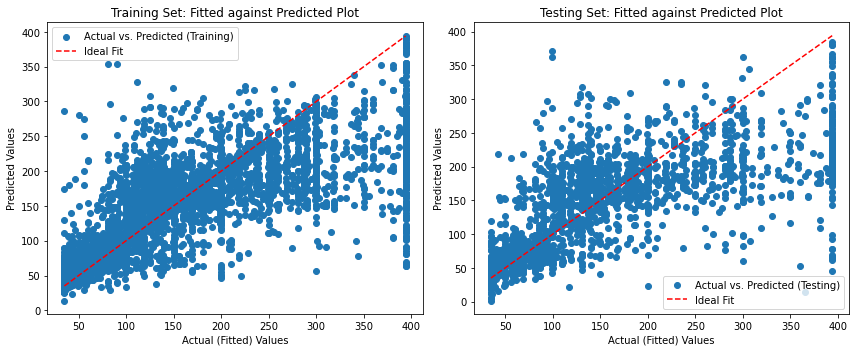

In [183]:
svr6 = SVR(kernel='rbf',max_iter=5000,C=300,epsilon=5).fit(X_train,y_train)

model_scores_regression(svr6)
svr_models.append(svr6)
svr_names.append('svr6 - higher epsilon')

# train score went up 

### 2.3.3.3 Optimized Models

In [184]:
scores_table_svr = []
for model, name in zip(svr_models, svr_names):
    train_rsq = model.score(X_train, y_train)
    test_rsq = model.score(X_test, y_test)
    scores_table_svr.append([name, train_rsq, test_rsq])

df_scores_svr = pd.DataFrame(scores_table_svr, columns=["Model", "Train R-squared", "Test R-squared"])

df_scores_svr

Model  Train R-squared  Test R-squared
0                                   base         0.594222        0.439304
1                                   svr2        -0.254155       -0.282990
2  svr3 - higher regularization strength         0.527505        0.435850
3                svr4 - introduced gamma         0.956011        0.199519
4                   svr5 - removed gamma         0.536935        0.444483
5                  svr6 - higher epsilon         0.544290        0.449096

### 2.3.4 Evaluate 'Best' Models

### 2.3.4.1 R-squared

In [185]:
best_models_rg = [rfr4,xgb_r3,svr6]
best_models_rg_names = ['Random Forest Regressor','XG Boost','SVR']

scores_table = []
for model, name in zip(best_models_rg, best_models_rg_names):
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    scores_table.append([name, train_score, test_score])

df_bestrg = pd.DataFrame(scores_table, columns=["Model", "Train Score", "Test Score"])

df_bestrg

Model  Train Score  Test Score
0  Random Forest Regressor     0.639294    0.543453
1                 XG Boost     0.787585    0.594378
2                      SVR     0.544290    0.449096

### 2.3.4.2 Cross Validation

In [186]:
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")

best_models_rg = [rfr4,xgb_r3,svr6]
best_models_rg_names = ['Random Forest Regressor','XG Boost','SVR']

for model, name in zip(best_models_rg, best_models_rg_names):
    print(f'Model : {name}')
    results  = cross_validate(model, X, y, scoring='r2', cv=5, return_train_score = True)
    print('train_score: ', results['train_score'])
    print('test_score: ', results['test_score'])

    print('cross val training accuracy is:', sum(results['train_score'])/len(results['train_score']))
    print('cross val testing accuracy is:', sum(results['test_score'])/len(results['test_score']))
    print()

Model : Random Forest Regressor
train_score:  [0.70724271 0.69518879 0.69380572 0.69678174 0.68509952]
test_score:  [0.44967085 0.52525189 0.5459062  0.47569227 0.54492462]
cross val training accuracy is: 0.6956236955557016
cross val testing accuracy is: 0.5082891640446158

Model : XG Boost
train_score:  [0.86744584 0.85946089 0.8590039  0.85655287 0.8537355 ]
test_score:  [0.46833788 0.55130924 0.58954268 0.56253301 0.56147625]
cross val training accuracy is: 0.8592397995676005
cross val testing accuracy is: 0.5466398134430968

Model : SVR
train_score:  [-0.01326571 -0.00649337  0.00029647 -0.00877023 -0.02194637]
test_score:  [-0.03092033  0.02738958 -0.10078815 -0.10669734 -0.29054526]
cross val training accuracy is: -0.010035842153666263
cross val testing accuracy is: -0.10031229990996952



In [188]:
import pickle
pickle.dump(xgb_r3, open('XGBRegmodel.pkl', 'wb'))

In [189]:
pickled_model = pickle.load(open('XGBRegmodel.pkl', 'rb'))
pickled_model.predict(X_train)

array([103.556366, 192.7632  , 148.1869  , ..., 292.7946  ,  52.639145,
       181.00836 ], dtype=float32)

In [187]:
notebook_end_time = time.time()

notebook_elapsed_time = notebook_end_time-notebook_start_time

minutes, seconds = divmod(notebook_elapsed_time, 60)
formatted_time = "{:02}:{:02}".format(int(minutes), int(seconds))
print("Elapsed Time: {}".format(formatted_time))

Elapsed Time: 205:27
